In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from feudal_agent import FeudalQLearningTable
from maze_env import Maze

In [2]:
def update():
    for episode in range(10000):
        episode_log = pd.DataFrame(columns=['ACTION', 'REWARD', 'A0','A1','A2','A3','V'])
        step_counter = 1
        episode_reward = 0
        observation = env.reset()
        while True:
            env.render()
            
            actions, level = rl.choose_action(observation)

            observation_, reward, done = env.step(actions[2])
            
            episode_reward += reward

            rl.learn(observation, actions, reward, observation_, done)
            print(str(episode+1)+"-"+str(step_counter),str(observation), actions, str(observation_))
            
            action_values = rl.levels[2].q_table.loc[str(observation), :]
            episode_log.loc[len(episode_log)] = [actions[2], reward, action_values[0], action_values[1], action_values[2], action_values[3], episode_reward]
            
            observation = observation_
            if done:
                break
            step_counter = step_counter + 1
        
        #episode_log = episode_log.set_index('ACTION')
        episode_log.head()
        name = 'frames/log' + str(episode+1) + '.csv'
        episode_log.to_csv(name, encoding='utf-8')
        
        
        log_name = './frames/log' + str(episode+1) + '.csv'
        log_gif = './frames/image' + str(episode+1) + '.gif'
        
        log.loc[len(log)] = [episode+1, step_counter, episode_reward, log_gif, log_name]

    print('Game Over')
    env.destroy()

In [3]:
log = pd.DataFrame(columns=['Episode', 'Length', 'Reward','IMG','LOG'])
env = Maze()
rl = FeudalQLearningTable(actions=list(range(env.n_actions)))
env.after(100, update)
env.mainloop()
log = log.set_index('Episode')
log.to_csv('log.csv', encoding='utf-8')
rl.levels[0].q_table.to_csv('level_0.csv', encoding='utf-8')
rl.levels[1].q_table.to_csv('level_1.csv', encoding='utf-8')
rl.levels[2].q_table.to_csv('level_2.csv', encoding='utf-8')

1-1 (0, 0) [4, 3, 3] (0, 0)
1-2 (0, 0) [4, 0, 1] (0, 1)
1-3 (0, 1) [4, 2, 0] (0, 0)
1-4 (0, 0) [4, 1, 3] (0, 0)
1-5 (0, 0) [4, 2, 0] (0, 0)
1-6 (0, 0) [4, 4, 2] (1, 0)
1-7 (1, 0) [4, 3, 3] (0, 0)
1-8 (0, 0) [4, 1, 3] (0, 0)
1-9 (0, 0) [4, 3, 1] (0, 1)
1-10 (0, 1) [4, 0, 3] (0, 1)
1-11 (0, 1) [4, 4, 2] (1, 1)
1-12 (1, 1) [4, 2, 0] (1, 0)
1-13 (1, 0) [4, 1, 2] (2, 0)
1-14 (2, 0) [4, 4, 3] (1, 0)
1-15 (1, 0) [4, 4, 1] (1, 1)
1-16 (1, 1) [4, 0, 2] (2, 1)
1-17 (2, 1) [4, 3, 2] (3, 1)
1-18 (3, 1) [4, 1, 3] (2, 1)
1-19 (2, 1) [4, 2, 1] (2, 2)
1-20 (2, 2) [4, 1, 3] (1, 2)
1-21 (1, 2) [4, 3, 3] (0, 2)
1-22 (0, 2) [4, 2, 2] (1, 2)
1-23 (1, 2) [4, 0, 2] (2, 2)
1-24 (2, 2) [4, 2, 0] (2, 1)
1-25 (2, 1) [4, 0, 0] (2, 0)
1-26 (2, 0) [4, 0, 0] (2, 0)
1-27 (2, 0) [4, 3, 2] (3, 0)
1-28 (3, 0) [4, 1, 3] (2, 0)
1-29 (2, 0) [4, 2, 1] (2, 1)
1-30 (2, 1) [4, 4, 3] (1, 1)
1-31 (1, 1) [4, 1, 1] (1, 2)
1-32 (1, 2) [4, 4, 3] (0, 2)
1-33 (0, 2) [4, 1, 0] (0, 1)
1-34 (0, 1) [4, 0, 1] (0, 2)
1-35 (0, 2) [4, 3, 2] (

11-28 (0, 1) [4, 2, 2] (1, 1)
11-29 (1, 1) [4, 3, 2] (2, 1)
11-30 (2, 1) [4, 4, 2] (3, 1)
11-31 (3, 1) [4, 1, 0] (3, 0)
11-32 (3, 0) [4, 0, 1] (3, 1)
11-33 (3, 1) [4, 3, 1] (3, 2)
11-34 (3, 2) [4, 4, 3] (2, 2)
11-35 (2, 2) [4, 4, 1] (2, 3)
11-36 (2, 3) [4, 4, 0] (2, 2)
11-37 (2, 2) [4, 4, 3] (1, 2)
11-38 (1, 2) [4, 0, 2] (2, 2)
11-39 (2, 2) [4, 4, 0] (2, 1)
11-40 (2, 1) [4, 2, 1] (2, 2)
11-41 (2, 2) [4, 4, 2] (3, 2)
11-42 (3, 2) [4, 4, 1] (3, 3)
12-1 (0, 0) [4, 4, 1] (0, 1)
12-2 (0, 1) [4, 1, 2] (1, 1)
12-3 (1, 1) [4, 2, 0] (1, 0)
12-4 (1, 0) [4, 3, 1] (1, 1)
12-5 (1, 1) [4, 0, 3] (0, 1)
12-6 (0, 1) [4, 4, 3] (0, 1)
12-7 (0, 1) [4, 1, 0] (0, 0)
12-8 (0, 0) [4, 2, 3] (0, 0)
12-9 (0, 0) [4, 3, 1] (0, 1)
12-10 (0, 1) [4, 0, 2] (1, 1)
12-11 (1, 1) [4, 4, 2] (2, 1)
12-12 (2, 1) [4, 4, 3] (1, 1)
12-13 (1, 1) [4, 1, 1] (1, 2)
12-14 (1, 2) [4, 4, 3] (0, 2)
12-15 (0, 2) [4, 1, 0] (0, 1)
12-16 (0, 1) [4, 2, 1] (0, 2)
12-17 (0, 2) [4, 3, 2] (1, 2)
12-18 (1, 2) [4, 0, 0] (1, 1)
12-19 (1, 1) [4, 3,

21-44 (1, 0) [4, 4, 0] (1, 0)
21-45 (1, 0) [4, 3, 3] (0, 0)
21-46 (0, 0) [4, 2, 3] (0, 0)
21-47 (0, 0) [4, 0, 2] (1, 0)
21-48 (1, 0) [4, 4, 3] (0, 0)
21-49 (0, 0) [4, 3, 0] (0, 0)
21-50 (0, 0) [4, 2, 3] (0, 0)
21-51 (0, 0) [4, 1, 2] (1, 0)
21-52 (1, 0) [4, 0, 1] (1, 1)
21-53 (1, 1) [4, 4, 3] (0, 1)
21-54 (0, 1) [4, 3, 3] (0, 1)
21-55 (0, 1) [4, 2, 3] (0, 1)
21-56 (0, 1) [4, 1, 0] (0, 0)
21-57 (0, 0) [4, 0, 3] (0, 0)
21-58 (0, 0) [4, 4, 1] (0, 1)
21-59 (0, 1) [4, 3, 1] (0, 2)
21-60 (0, 2) [4, 1, 1] (0, 3)
21-61 (0, 3) [4, 3, 0] (0, 2)
21-62 (0, 2) [4, 2, 1] (0, 3)
21-63 (0, 3) [4, 0, 3] (0, 3)
21-64 (0, 3) [4, 4, 1] (0, 3)
21-65 (0, 3) [4, 1, 2] (1, 3)
21-66 (1, 3) [4, 3, 0] (1, 2)
21-67 (1, 2) [4, 2, 3] (0, 2)
21-68 (0, 2) [4, 0, 3] (0, 2)
21-69 (0, 2) [4, 4, 0] (0, 1)
21-70 (0, 1) [4, 2, 3] (0, 1)
21-71 (0, 1) [4, 1, 0] (0, 0)
21-72 (0, 0) [4, 4, 0] (0, 0)
21-73 (0, 0) [4, 0, 0] (0, 0)
21-74 (0, 0) [4, 3, 2] (1, 0)
21-75 (1, 0) [4, 2, 2] (2, 0)
21-76 (2, 0) [4, 2, 0] (2, 0)
21-77 (2, 

31-1 (0, 0) [4, 2, 3] (0, 0)
31-2 (0, 0) [4, 1, 0] (0, 0)
31-3 (0, 0) [4, 0, 2] (1, 0)
31-4 (1, 0) [4, 3, 1] (1, 1)
31-5 (1, 1) [4, 4, 0] (1, 0)
31-6 (1, 0) [4, 2, 0] (1, 0)
31-7 (1, 0) [4, 1, 2] (2, 0)
31-8 (2, 0) [4, 3, 0] (2, 0)
31-9 (2, 0) [4, 1, 1] (2, 1)
31-10 (2, 1) [4, 2, 2] (3, 1)
31-11 (3, 1) [4, 4, 0] (3, 0)
31-12 (3, 0) [4, 1, 1] (3, 1)
31-13 (3, 1) [4, 2, 1] (3, 2)
31-14 (3, 2) [4, 2, 1] (3, 3)
32-1 (0, 0) [4, 3, 1] (0, 1)
32-2 (0, 1) [4, 1, 2] (1, 1)
32-3 (1, 1) [4, 0, 3] (0, 1)
32-4 (0, 1) [4, 4, 0] (0, 0)
32-5 (0, 0) [4, 2, 0] (0, 0)
32-6 (0, 0) [4, 3, 3] (0, 0)
32-7 (0, 0) [4, 0, 3] (0, 0)
32-8 (0, 0) [4, 1, 2] (1, 0)
32-9 (1, 0) [4, 4, 3] (0, 0)
32-10 (0, 0) [4, 2, 1] (0, 1)
32-11 (0, 1) [4, 3, 3] (0, 1)
32-12 (0, 1) [4, 0, 3] (0, 1)
32-13 (0, 1) [4, 1, 1] (0, 2)
32-14 (0, 2) [4, 4, 1] (0, 3)
32-15 (0, 3) [4, 1, 2] (1, 3)
32-16 (1, 3) [4, 2, 3] (0, 3)
32-17 (0, 3) [4, 3, 3] (0, 3)
32-18 (0, 3) [4, 0, 3] (0, 3)
32-19 (0, 3) [4, 4, 1] (0, 3)
32-20 (0, 3) [4, 1, 0] (0, 2

44-18 (3, 0) [4, 3, 0] (3, 0)
44-19 (3, 0) [4, 4, 3] (2, 0)
44-20 (2, 0) [4, 1, 3] (1, 0)
44-21 (1, 0) [4, 3, 1] (1, 1)
44-22 (1, 1) [4, 4, 0] (1, 0)
44-23 (1, 0) [4, 1, 0] (1, 0)
44-24 (1, 0) [4, 2, 2] (2, 0)
44-25 (2, 0) [4, 4, 0] (2, 0)
44-26 (2, 0) [4, 2, 0] (2, 0)
44-27 (2, 0) [4, 3, 1] (2, 1)
44-28 (2, 1) [4, 0, 2] (3, 1)
44-29 (3, 1) [4, 2, 3] (2, 1)
44-30 (2, 1) [4, 0, 1] (2, 2)
44-31 (2, 2) [4, 4, 2] (3, 2)
44-32 (3, 2) [4, 4, 2] (3, 2)
44-33 (3, 2) [4, 4, 1] (3, 3)
45-1 (0, 0) [4, 2, 0] (0, 0)
45-2 (0, 0) [4, 3, 3] (0, 0)
45-3 (0, 0) [4, 0, 3] (0, 0)
45-4 (0, 0) [4, 4, 1] (0, 1)
45-5 (0, 1) [4, 1, 0] (0, 0)
45-6 (0, 0) [4, 2, 2] (1, 0)
45-7 (1, 0) [4, 3, 2] (2, 0)
45-8 (2, 0) [4, 3, 2] (3, 0)
45-9 (3, 0) [4, 1, 1] (3, 1)
45-10 (3, 1) [4, 4, 1] (3, 2)
45-11 (3, 2) [4, 4, 1] (3, 3)
46-1 (0, 0) [4, 0, 2] (1, 0)
46-2 (1, 0) [4, 4, 3] (0, 0)
46-3 (0, 0) [4, 2, 0] (0, 0)
46-4 (0, 0) [4, 1, 0] (0, 0)
46-5 (0, 0) [4, 3, 3] (0, 0)
46-6 (0, 0) [4, 0, 3] (0, 0)
46-7 (0, 0) [4, 4, 1] (0,

58-2 (0, 0) [4, 2, 0] (0, 0)
58-3 (0, 0) [4, 1, 2] (1, 0)
58-4 (1, 0) [4, 4, 2] (2, 0)
58-5 (2, 0) [4, 3, 2] (3, 0)
58-6 (3, 0) [4, 4, 2] (3, 0)
58-7 (3, 0) [4, 0, 0] (3, 0)
58-8 (3, 0) [4, 2, 0] (3, 0)
58-9 (3, 0) [4, 3, 3] (2, 0)
58-10 (2, 0) [4, 4, 1] (2, 1)
58-11 (2, 1) [4, 1, 1] (2, 2)
58-12 (2, 2) [4, 4, 3] (1, 2)
58-13 (1, 2) [4, 4, 0] (1, 1)
58-14 (1, 1) [4, 3, 0] (1, 0)
58-15 (1, 0) [4, 4, 3] (0, 0)
58-16 (0, 0) [4, 0, 1] (0, 1)
58-17 (0, 1) [4, 2, 1] (0, 2)
58-18 (0, 2) [4, 2, 1] (0, 3)
58-19 (0, 3) [4, 3, 0] (0, 2)
58-20 (0, 2) [4, 0, 3] (0, 2)
58-21 (0, 2) [4, 1, 0] (0, 1)
58-22 (0, 1) [4, 1, 3] (0, 1)
58-23 (0, 1) [4, 2, 0] (0, 0)
58-24 (0, 0) [4, 3, 2] (1, 0)
58-25 (1, 0) [4, 4, 0] (1, 0)
58-26 (1, 0) [4, 0, 1] (1, 1)
58-27 (1, 1) [4, 1, 2] (2, 1)
58-28 (2, 1) [4, 0, 1] (2, 2)
58-29 (2, 2) [4, 4, 2] (3, 2)
58-30 (3, 2) [4, 4, 1] (3, 3)
59-1 (0, 0) [4, 2, 2] (1, 0)
59-2 (1, 0) [4, 3, 2] (2, 0)
59-3 (2, 0) [4, 1, 0] (2, 0)
59-4 (2, 0) [4, 2, 3] (1, 0)
59-5 (1, 0) [4, 1, 3] 

70-19 (3, 0) [4, 2, 1] (3, 1)
70-20 (3, 1) [4, 4, 0] (3, 0)
70-21 (3, 0) [4, 0, 3] (2, 0)
70-22 (2, 0) [4, 3, 1] (2, 1)
70-23 (2, 1) [4, 1, 0] (2, 0)
70-24 (2, 0) [4, 2, 3] (1, 0)
70-25 (1, 0) [4, 1, 2] (2, 0)
70-26 (2, 0) [4, 4, 0] (2, 0)
70-27 (2, 0) [4, 4, 2] (3, 0)
70-28 (3, 0) [4, 0, 2] (3, 0)
70-29 (3, 0) [4, 3, 0] (3, 0)
70-30 (3, 0) [4, 1, 1] (3, 1)
70-31 (3, 1) [4, 1, 3] (2, 1)
70-32 (2, 1) [4, 0, 1] (2, 2)
70-33 (2, 2) [4, 4, 1] (2, 3)
70-34 (2, 3) [4, 4, 2] (3, 3)
71-1 (0, 0) [4, 3, 1] (0, 1)
71-2 (0, 1) [4, 2, 0] (0, 0)
71-3 (0, 0) [4, 0, 2] (1, 0)
71-4 (1, 0) [4, 4, 1] (1, 1)
71-5 (1, 1) [4, 1, 0] (1, 0)
71-6 (1, 0) [4, 3, 0] (1, 0)
71-7 (1, 0) [4, 2, 2] (2, 0)
71-8 (2, 0) [4, 0, 1] (2, 1)
71-9 (2, 1) [4, 3, 2] (3, 1)
71-10 (3, 1) [4, 2, 1] (3, 2)
71-11 (3, 2) [4, 4, 1] (3, 3)
72-1 (0, 0) [4, 0, 1] (0, 1)
72-2 (0, 1) [4, 4, 3] (0, 1)
72-3 (0, 1) [4, 1, 1] (0, 2)
72-4 (0, 2) [4, 0, 1] (0, 3)
72-5 (0, 3) [4, 3, 1] (0, 3)
72-6 (0, 3) [4, 1, 3] (0, 3)
72-7 (0, 3) [4, 2, 0] (0,

84-9 (1, 0) [4, 4, 3] (0, 0)
84-10 (0, 0) [4, 0, 2] (1, 0)
84-11 (1, 0) [4, 3, 2] (2, 0)
84-12 (2, 0) [4, 3, 3] (1, 0)
84-13 (1, 0) [4, 3, 1] (1, 1)
84-14 (1, 1) [4, 2, 3] (0, 1)
84-15 (0, 1) [4, 1, 0] (0, 0)
84-16 (0, 0) [4, 4, 0] (0, 0)
84-17 (0, 0) [4, 0, 3] (0, 0)
84-18 (0, 0) [4, 3, 1] (0, 1)
84-19 (0, 1) [4, 2, 2] (1, 1)
84-20 (1, 1) [4, 1, 2] (2, 1)
84-21 (2, 1) [4, 1, 3] (1, 1)
84-22 (1, 1) [4, 4, 1] (1, 2)
84-23 (1, 2) [4, 2, 3] (0, 2)
84-24 (0, 2) [4, 4, 3] (0, 2)
84-25 (0, 2) [4, 0, 1] (0, 3)
84-26 (0, 3) [4, 3, 2] (1, 3)
84-27 (1, 3) [4, 2, 0] (1, 2)
84-28 (1, 2) [4, 4, 2] (2, 2)
84-29 (2, 2) [4, 4, 2] (3, 2)
84-30 (3, 2) [4, 4, 1] (3, 3)
85-1 (0, 0) [4, 0, 2] (1, 0)
85-2 (1, 0) [4, 1, 0] (1, 0)
85-3 (1, 0) [4, 4, 3] (0, 0)
85-4 (0, 0) [4, 3, 0] (0, 0)
85-5 (0, 0) [4, 2, 1] (0, 1)
85-6 (0, 1) [4, 0, 2] (1, 1)
85-7 (1, 1) [4, 1, 0] (1, 0)
85-8 (1, 0) [4, 4, 2] (2, 0)
85-9 (2, 0) [4, 2, 0] (2, 0)
85-10 (2, 0) [4, 4, 3] (1, 0)
85-11 (1, 0) [4, 4, 0] (1, 0)
85-12 (1, 0) [4, 3, 

101-21 (2, 3) [4, 4, 2] (3, 3)
102-1 (0, 0) [4, 1, 1] (0, 1)
102-2 (0, 1) [4, 3, 1] (0, 2)
102-3 (0, 2) [4, 3, 0] (0, 1)
102-4 (0, 1) [4, 3, 3] (0, 1)
102-5 (0, 1) [4, 3, 3] (0, 1)
102-6 (0, 1) [4, 0, 3] (0, 1)
102-7 (0, 1) [4, 2, 1] (0, 2)
102-8 (0, 2) [4, 2, 2] (1, 2)
102-9 (1, 2) [4, 0, 1] (1, 3)
102-10 (1, 3) [4, 2, 2] (2, 3)
102-11 (2, 3) [4, 4, 2] (3, 3)
103-1 (0, 0) [4, 2, 1] (0, 1)
103-2 (0, 1) [4, 1, 2] (1, 1)
103-3 (1, 1) [4, 4, 0] (1, 0)
103-4 (1, 0) [4, 0, 3] (0, 0)
103-5 (0, 0) [4, 2, 0] (0, 0)
103-6 (0, 0) [4, 1, 2] (1, 0)
103-7 (1, 0) [4, 4, 0] (1, 0)
103-8 (1, 0) [4, 3, 1] (1, 1)
103-9 (1, 1) [4, 0, 1] (1, 2)
103-10 (1, 2) [4, 2, 2] (2, 2)
103-11 (2, 2) [4, 4, 1] (2, 3)
103-12 (2, 3) [4, 4, 2] (3, 3)
104-1 (0, 0) [4, 0, 1] (0, 1)
104-2 (0, 1) [4, 2, 3] (0, 1)
104-3 (0, 1) [4, 1, 0] (0, 0)
104-4 (0, 0) [4, 4, 3] (0, 0)
104-5 (0, 0) [4, 3, 2] (1, 0)
104-6 (1, 0) [4, 0, 3] (0, 0)
104-7 (0, 0) [4, 2, 0] (0, 0)
104-8 (0, 0) [4, 1, 1] (0, 1)
104-9 (0, 1) [4, 4, 1] (0, 2)
104-

118-10 (1, 3) [4, 1, 3] (0, 3)
118-11 (0, 3) [4, 4, 0] (0, 2)
118-12 (0, 2) [4, 4, 2] (1, 2)
118-13 (1, 2) [4, 3, 2] (2, 2)
118-14 (2, 2) [4, 4, 1] (2, 3)
118-15 (2, 3) [4, 4, 2] (3, 3)
119-1 (0, 0) [4, 0, 0] (0, 0)
119-2 (0, 0) [4, 2, 1] (0, 1)
119-3 (0, 1) [4, 1, 1] (0, 2)
119-4 (0, 2) [4, 3, 1] (0, 3)
119-5 (0, 3) [4, 2, 2] (1, 3)
119-6 (1, 3) [4, 3, 2] (2, 3)
119-7 (2, 3) [4, 4, 2] (3, 3)
120-1 (0, 0) [4, 1, 0] (0, 0)
120-2 (0, 0) [4, 3, 3] (0, 0)
120-3 (0, 0) [4, 4, 3] (0, 0)
120-4 (0, 0) [4, 0, 2] (1, 0)
120-5 (1, 0) [4, 2, 2] (2, 0)
120-6 (2, 0) [4, 2, 1] (2, 1)
120-7 (2, 1) [4, 3, 2] (3, 1)
120-8 (3, 1) [4, 1, 1] (3, 2)
120-9 (3, 2) [4, 4, 1] (3, 3)
121-1 (0, 0) [4, 2, 1] (0, 1)
121-2 (0, 1) [4, 1, 1] (0, 2)
121-3 (0, 2) [4, 3, 0] (0, 1)
121-4 (0, 1) [4, 1, 1] (0, 2)
121-5 (0, 2) [4, 1, 2] (1, 2)
121-6 (1, 2) [4, 0, 0] (1, 1)
121-7 (1, 1) [4, 1, 1] (1, 2)
121-8 (1, 2) [4, 2, 0] (1, 1)
121-9 (1, 1) [4, 1, 1] (1, 2)
121-10 (1, 2) [4, 1, 1] (1, 3)
121-11 (1, 3) [4, 3, 0] (1, 2)
12

139-5 (2, 1) [4, 1, 3] (1, 1)
139-6 (1, 1) [4, 4, 0] (1, 0)
139-7 (1, 0) [4, 0, 3] (0, 0)
139-8 (0, 0) [4, 2, 0] (0, 0)
139-9 (0, 0) [4, 1, 2] (1, 0)
139-10 (1, 0) [4, 3, 1] (1, 1)
139-11 (1, 1) [4, 4, 0] (1, 0)
139-12 (1, 0) [4, 0, 0] (1, 0)
139-13 (1, 0) [4, 2, 0] (1, 0)
139-14 (1, 0) [4, 1, 2] (2, 0)
139-15 (2, 0) [4, 3, 2] (3, 0)
139-16 (3, 0) [4, 2, 0] (3, 0)
139-17 (3, 0) [4, 0, 2] (3, 0)
139-18 (3, 0) [4, 4, 3] (2, 0)
139-19 (2, 0) [4, 3, 0] (2, 0)
139-20 (2, 0) [4, 2, 3] (1, 0)
139-21 (1, 0) [4, 1, 1] (1, 1)
139-22 (1, 1) [4, 3, 3] (0, 1)
139-23 (0, 1) [4, 4, 0] (0, 0)
139-24 (0, 0) [4, 0, 3] (0, 0)
139-25 (0, 0) [4, 2, 1] (0, 1)
139-26 (0, 1) [4, 1, 3] (0, 1)
139-27 (0, 1) [4, 3, 2] (1, 1)
139-28 (1, 1) [4, 4, 3] (0, 1)
139-29 (0, 1) [4, 0, 1] (0, 2)
139-30 (0, 2) [4, 4, 1] (0, 3)
139-31 (0, 3) [4, 3, 1] (0, 3)
139-32 (0, 3) [4, 0, 3] (0, 3)
139-33 (0, 3) [4, 4, 2] (1, 3)
139-34 (1, 3) [4, 3, 2] (2, 3)
139-35 (2, 3) [4, 4, 2] (3, 3)
140-1 (0, 0) [4, 0, 2] (1, 0)
140-2 (1, 0) [

153-14 (0, 0) [4, 3, 2] (1, 0)
153-15 (1, 0) [4, 2, 2] (2, 0)
153-16 (2, 0) [4, 1, 0] (2, 0)
153-17 (2, 0) [4, 0, 1] (2, 1)
153-18 (2, 1) [4, 4, 3] (1, 1)
153-19 (1, 1) [4, 2, 3] (0, 1)
153-20 (0, 1) [4, 4, 2] (1, 1)
153-21 (1, 1) [4, 0, 2] (2, 1)
153-22 (2, 1) [4, 2, 1] (2, 2)
153-23 (2, 2) [4, 4, 2] (3, 2)
153-24 (3, 2) [4, 4, 1] (3, 3)
154-1 (0, 0) [4, 0, 1] (0, 1)
154-2 (0, 1) [4, 1, 1] (0, 2)
154-3 (0, 2) [4, 1, 0] (0, 1)
154-4 (0, 1) [4, 1, 1] (0, 2)
154-5 (0, 2) [4, 0, 1] (0, 3)
154-6 (0, 3) [4, 4, 1] (0, 3)
154-7 (0, 3) [4, 3, 3] (0, 3)
154-8 (0, 3) [4, 0, 3] (0, 3)
154-9 (0, 3) [4, 4, 0] (0, 2)
154-10 (0, 2) [4, 3, 3] (0, 2)
154-11 (0, 2) [4, 2, 3] (0, 2)
154-12 (0, 2) [4, 1, 2] (1, 2)
154-13 (1, 2) [4, 0, 2] (2, 2)
154-14 (2, 2) [4, 4, 3] (1, 2)
154-15 (1, 2) [4, 0, 0] (1, 1)
154-16 (1, 1) [4, 1, 1] (1, 2)
154-17 (1, 2) [4, 4, 3] (0, 2)
154-18 (0, 2) [4, 3, 1] (0, 3)
154-19 (0, 3) [4, 2, 2] (1, 3)
154-20 (1, 3) [4, 1, 2] (2, 3)
154-21 (2, 3) [4, 4, 2] (3, 3)
155-1 (0, 0) [4, 

173-9 (0, 2) [4, 2, 1] (0, 3)
173-10 (0, 3) [4, 3, 1] (0, 3)
173-11 (0, 3) [4, 2, 2] (1, 3)
173-12 (1, 3) [4, 3, 0] (1, 2)
173-13 (1, 2) [4, 0, 1] (1, 3)
173-14 (1, 3) [4, 4, 2] (2, 3)
173-15 (2, 3) [4, 0, 2] (3, 3)
174-1 (0, 0) [4, 4, 3] (0, 0)
174-2 (0, 0) [4, 1, 0] (0, 0)
174-3 (0, 0) [4, 3, 2] (1, 0)
174-4 (1, 0) [4, 2, 1] (1, 1)
174-5 (1, 1) [4, 0, 3] (0, 1)
174-6 (0, 1) [4, 4, 2] (1, 1)
174-7 (1, 1) [4, 1, 2] (2, 1)
174-8 (2, 1) [4, 0, 1] (2, 2)
174-9 (2, 2) [4, 4, 1] (2, 3)
174-10 (2, 3) [4, 4, 2] (3, 3)
175-1 (0, 0) [4, 1, 3] (0, 0)
175-2 (0, 0) [4, 3, 0] (0, 0)
175-3 (0, 0) [4, 2, 1] (0, 1)
175-4 (0, 1) [4, 0, 3] (0, 1)
175-5 (0, 1) [4, 4, 0] (0, 0)
175-6 (0, 0) [4, 1, 2] (1, 0)
175-7 (1, 0) [4, 3, 0] (1, 0)
175-8 (1, 0) [4, 2, 2] (2, 0)
175-9 (2, 0) [4, 0, 1] (2, 1)
175-10 (2, 1) [4, 2, 2] (3, 1)
175-11 (3, 1) [4, 0, 1] (3, 2)
175-12 (3, 2) [4, 4, 1] (3, 3)
176-1 (0, 0) [4, 2, 1] (0, 1)
176-2 (0, 1) [4, 0, 1] (0, 2)
176-3 (0, 2) [4, 4, 3] (0, 2)
176-4 (0, 2) [4, 1, 2] (1, 2)


194-1 (0, 0) [4, 3, 2] (1, 0)
194-2 (1, 0) [4, 1, 1] (1, 1)
194-3 (1, 1) [4, 2, 2] (2, 1)
194-4 (2, 1) [4, 3, 3] (1, 1)
194-5 (1, 1) [4, 4, 2] (2, 1)
194-6 (2, 1) [4, 2, 3] (1, 1)
194-7 (1, 1) [4, 2, 1] (1, 2)
194-8 (1, 2) [4, 2, 1] (1, 3)
194-9 (1, 3) [4, 2, 2] (2, 3)
194-10 (2, 3) [4, 4, 2] (3, 3)
195-1 (0, 0) [4, 2, 2] (1, 0)
195-2 (1, 0) [4, 4, 1] (1, 1)
195-3 (1, 1) [4, 0, 3] (0, 1)
195-4 (0, 1) [4, 3, 3] (0, 1)
195-5 (0, 1) [4, 2, 3] (0, 1)
195-6 (0, 1) [4, 1, 0] (0, 0)
195-7 (0, 0) [4, 4, 2] (1, 0)
195-8 (1, 0) [4, 0, 0] (1, 0)
195-9 (1, 0) [4, 3, 0] (1, 0)
195-10 (1, 0) [4, 2, 3] (0, 0)
195-11 (0, 0) [4, 1, 3] (0, 0)
195-12 (0, 0) [4, 4, 2] (1, 0)
195-13 (1, 0) [4, 0, 2] (2, 0)
195-14 (2, 0) [4, 4, 1] (2, 1)
195-15 (2, 1) [4, 1, 1] (2, 2)
195-16 (2, 2) [4, 4, 2] (3, 2)
195-17 (3, 2) [4, 4, 1] (3, 3)
196-1 (0, 0) [4, 0, 1] (0, 1)
196-2 (0, 1) [4, 3, 1] (0, 2)
196-3 (0, 2) [4, 2, 1] (0, 3)
196-4 (0, 3) [4, 2, 0] (0, 2)
196-5 (0, 2) [4, 0, 3] (0, 2)
196-6 (0, 2) [4, 2, 0] (0, 1)
1

213-22 (1, 3) [4, 2, 2] (2, 3)
213-23 (2, 3) [4, 4, 2] (3, 3)
214-1 (0, 0) [4, 4, 0] (0, 0)
214-2 (0, 0) [4, 0, 2] (1, 0)
214-3 (1, 0) [4, 1, 0] (1, 0)
214-4 (1, 0) [4, 3, 2] (2, 0)
214-5 (2, 0) [4, 3, 2] (3, 0)
214-6 (3, 0) [4, 0, 1] (3, 1)
214-7 (3, 1) [4, 4, 1] (3, 2)
214-8 (3, 2) [4, 4, 1] (3, 3)
215-1 (0, 0) [4, 3, 2] (1, 0)
215-2 (1, 0) [4, 2, 1] (1, 1)
215-3 (1, 1) [4, 4, 3] (0, 1)
215-4 (0, 1) [4, 3, 2] (1, 1)
215-5 (1, 1) [4, 1, 1] (1, 2)
215-6 (1, 2) [4, 2, 1] (1, 3)
215-7 (1, 3) [4, 4, 2] (2, 3)
215-8 (2, 3) [4, 4, 2] (3, 3)
216-1 (0, 0) [4, 1, 1] (0, 1)
216-2 (0, 1) [4, 2, 3] (0, 1)
216-3 (0, 1) [4, 4, 1] (0, 2)
216-4 (0, 2) [4, 4, 0] (0, 1)
216-5 (0, 1) [4, 4, 2] (1, 1)
216-6 (1, 1) [4, 0, 1] (1, 2)
216-7 (1, 2) [4, 2, 2] (2, 2)
216-8 (2, 2) [4, 4, 0] (2, 1)
216-9 (2, 1) [4, 4, 1] (2, 2)
216-10 (2, 2) [4, 4, 2] (3, 2)
216-11 (3, 2) [4, 4, 1] (3, 3)
217-1 (0, 0) [4, 0, 1] (0, 1)
217-2 (0, 1) [4, 4, 0] (0, 0)
217-3 (0, 0) [4, 1, 3] (0, 0)
217-4 (0, 0) [4, 3, 1] (0, 1)
217-5 

237-1 (0, 0) [4, 2, 2] (1, 0)
237-2 (1, 0) [4, 3, 2] (2, 0)
237-3 (2, 0) [4, 0, 0] (2, 0)
237-4 (2, 0) [4, 3, 0] (2, 0)
237-5 (2, 0) [4, 4, 2] (3, 0)
237-6 (3, 0) [4, 3, 0] (3, 0)
237-7 (3, 0) [4, 2, 2] (3, 0)
237-8 (3, 0) [4, 1, 2] (3, 0)
237-9 (3, 0) [4, 3, 1] (3, 1)
237-10 (3, 1) [4, 2, 1] (3, 2)
237-11 (3, 2) [4, 4, 1] (3, 3)
238-1 (0, 0) [4, 3, 2] (1, 0)
238-2 (1, 0) [4, 0, 1] (1, 1)
238-3 (1, 1) [4, 4, 2] (2, 1)
238-4 (2, 1) [4, 2, 0] (2, 0)
238-5 (2, 0) [4, 2, 1] (2, 1)
238-6 (2, 1) [4, 0, 1] (2, 2)
238-7 (2, 2) [4, 4, 0] (2, 1)
238-8 (2, 1) [4, 0, 2] (3, 1)
238-9 (3, 1) [4, 0, 0] (3, 0)
238-10 (3, 0) [4, 1, 2] (3, 0)
238-11 (3, 0) [4, 0, 3] (2, 0)
238-12 (2, 0) [4, 4, 0] (2, 0)
238-13 (2, 0) [4, 3, 3] (1, 0)
238-14 (1, 0) [4, 4, 2] (2, 0)
238-15 (2, 0) [4, 2, 3] (1, 0)
238-16 (1, 0) [4, 4, 0] (1, 0)
238-17 (1, 0) [4, 2, 1] (1, 1)
238-18 (1, 1) [4, 4, 3] (0, 1)
238-19 (0, 1) [4, 3, 1] (0, 2)
238-20 (0, 2) [4, 1, 3] (0, 2)
238-21 (0, 2) [4, 1, 2] (1, 2)
238-22 (1, 2) [4, 3, 1] (1

257-5 (1, 0) [4, 4, 2] (2, 0)
257-6 (2, 0) [4, 2, 2] (3, 0)
257-7 (3, 0) [4, 4, 0] (3, 0)
257-8 (3, 0) [4, 1, 3] (2, 0)
257-9 (2, 0) [4, 2, 2] (3, 0)
257-10 (3, 0) [4, 3, 2] (3, 0)
257-11 (3, 0) [4, 0, 1] (3, 1)
257-12 (3, 1) [4, 4, 1] (3, 2)
257-13 (3, 2) [4, 4, 1] (3, 3)
258-1 (0, 0) [4, 3, 0] (0, 0)
258-2 (0, 0) [4, 0, 1] (0, 1)
258-3 (0, 1) [4, 4, 2] (1, 1)
258-4 (1, 1) [4, 2, 0] (1, 0)
258-5 (1, 0) [4, 1, 0] (1, 0)
258-6 (1, 0) [4, 3, 1] (1, 1)
258-7 (1, 1) [4, 0, 1] (1, 2)
258-8 (1, 2) [4, 1, 2] (2, 2)
258-9 (2, 2) [4, 4, 2] (3, 2)
258-10 (3, 2) [4, 4, 0] (3, 1)
258-11 (3, 1) [4, 4, 0] (3, 0)
258-12 (3, 0) [4, 1, 0] (3, 0)
258-13 (3, 0) [4, 4, 2] (3, 0)
258-14 (3, 0) [4, 2, 1] (3, 1)
258-15 (3, 1) [4, 3, 2] (3, 1)
258-16 (3, 1) [4, 0, 3] (2, 1)
258-17 (2, 1) [4, 4, 2] (3, 1)
258-18 (3, 1) [4, 1, 1] (3, 2)
258-19 (3, 2) [4, 4, 1] (3, 3)
259-1 (0, 0) [4, 2, 3] (0, 0)
259-2 (0, 0) [4, 0, 2] (1, 0)
259-3 (1, 0) [4, 4, 3] (0, 0)
259-4 (0, 0) [4, 0, 1] (0, 1)
259-5 (0, 1) [4, 1, 3] (0,

276-20 (0, 2) [4, 2, 0] (0, 1)
276-21 (0, 1) [4, 2, 3] (0, 1)
276-22 (0, 1) [4, 0, 0] (0, 0)
276-23 (0, 0) [4, 4, 2] (1, 0)
276-24 (1, 0) [4, 3, 2] (2, 0)
276-25 (2, 0) [4, 1, 1] (2, 1)
276-26 (2, 1) [4, 1, 1] (2, 2)
276-27 (2, 2) [4, 4, 0] (2, 1)
276-28 (2, 1) [4, 1, 1] (2, 2)
276-29 (2, 2) [4, 4, 2] (3, 2)
276-30 (3, 2) [4, 4, 1] (3, 3)
277-1 (0, 0) [4, 3, 3] (0, 0)
277-2 (0, 0) [4, 1, 3] (0, 0)
277-3 (0, 0) [4, 2, 1] (0, 1)
277-4 (0, 1) [4, 3, 2] (1, 1)
277-5 (1, 1) [4, 0, 2] (2, 1)
277-6 (2, 1) [4, 1, 1] (2, 2)
277-7 (2, 2) [4, 4, 1] (2, 3)
277-8 (2, 3) [4, 4, 2] (3, 3)
278-1 (0, 0) [4, 0, 2] (1, 0)
278-2 (1, 0) [4, 4, 1] (1, 1)
278-3 (1, 1) [4, 0, 1] (1, 2)
278-4 (1, 2) [4, 4, 2] (2, 2)
278-5 (2, 2) [4, 4, 2] (3, 2)
278-6 (3, 2) [4, 4, 0] (3, 1)
278-7 (3, 1) [4, 1, 1] (3, 2)
278-8 (3, 2) [4, 4, 1] (3, 3)
279-1 (0, 0) [4, 0, 0] (0, 0)
279-2 (0, 0) [4, 1, 0] (0, 0)
279-3 (0, 0) [4, 2, 1] (0, 1)
279-4 (0, 1) [4, 3, 0] (0, 0)
279-5 (0, 0) [4, 0, 3] (0, 0)
279-6 (0, 0) [4, 4, 2] (1, 0)

300-1 (0, 0) [4, 3, 0] (0, 0)
300-2 (0, 0) [4, 1, 1] (0, 1)
300-3 (0, 1) [4, 0, 2] (1, 1)
300-4 (1, 1) [4, 4, 1] (1, 2)
300-5 (1, 2) [4, 3, 2] (2, 2)
300-6 (2, 2) [4, 4, 2] (3, 2)
300-7 (3, 2) [4, 4, 1] (3, 3)
301-1 (0, 0) [4, 2, 1] (0, 1)
301-2 (0, 1) [4, 4, 3] (0, 1)
301-3 (0, 1) [4, 3, 1] (0, 2)
301-4 (0, 2) [4, 3, 0] (0, 1)
301-5 (0, 1) [4, 2, 2] (1, 1)
301-6 (1, 1) [4, 3, 2] (2, 1)
301-7 (2, 1) [4, 1, 1] (2, 2)
301-8 (2, 2) [4, 4, 2] (3, 2)
301-9 (3, 2) [4, 4, 1] (3, 3)
302-1 (0, 0) [4, 3, 1] (0, 1)
302-2 (0, 1) [4, 3, 2] (1, 1)
302-3 (1, 1) [4, 4, 0] (1, 0)
302-4 (1, 0) [4, 3, 1] (1, 1)
302-5 (1, 1) [4, 1, 1] (1, 2)
302-6 (1, 2) [4, 0, 3] (0, 2)
302-7 (0, 2) [4, 4, 3] (0, 2)
302-8 (0, 2) [4, 4, 2] (1, 2)
302-9 (1, 2) [4, 1, 1] (1, 3)
302-10 (1, 3) [4, 0, 2] (2, 3)
302-11 (2, 3) [4, 4, 1] (2, 3)
302-12 (2, 3) [4, 2, 2] (3, 3)
303-1 (0, 0) [4, 1, 2] (1, 0)
303-2 (1, 0) [4, 0, 3] (0, 0)
303-3 (0, 0) [4, 4, 3] (0, 0)
303-4 (0, 0) [4, 1, 1] (0, 1)
303-5 (0, 1) [4, 3, 1] (0, 2)
303-6 (

332-3 (2, 0) [4, 1, 1] (2, 1)
332-4 (2, 1) [4, 1, 1] (2, 2)
332-5 (2, 2) [4, 2, 2] (3, 2)
332-6 (3, 2) [4, 2, 1] (3, 3)
333-1 (0, 0) [4, 2, 2] (1, 0)
333-2 (1, 0) [4, 2, 2] (2, 0)
333-3 (2, 0) [4, 1, 1] (2, 1)
333-4 (2, 1) [4, 1, 1] (2, 2)
333-5 (2, 2) [4, 2, 2] (3, 2)
333-6 (3, 2) [4, 0, 1] (3, 3)
334-1 (0, 0) [4, 2, 2] (1, 0)
334-2 (1, 0) [4, 3, 2] (2, 0)
334-3 (2, 0) [4, 1, 1] (2, 1)
334-4 (2, 1) [4, 1, 1] (2, 2)
334-5 (2, 2) [4, 2, 2] (3, 2)
334-6 (3, 2) [4, 4, 1] (3, 3)
335-1 (0, 0) [4, 2, 3] (0, 0)
335-2 (0, 0) [4, 3, 2] (1, 0)
335-3 (1, 0) [4, 2, 2] (2, 0)
335-4 (2, 0) [4, 1, 1] (2, 1)
335-5 (2, 1) [4, 1, 1] (2, 2)
335-6 (2, 2) [4, 4, 2] (3, 2)
335-7 (3, 2) [4, 4, 1] (3, 3)
336-1 (0, 0) [4, 2, 3] (0, 0)
336-2 (0, 0) [4, 4, 2] (1, 0)
336-3 (1, 0) [4, 2, 2] (2, 0)
336-4 (2, 0) [4, 1, 1] (2, 1)
336-5 (2, 1) [4, 1, 1] (2, 2)
336-6 (2, 2) [4, 4, 2] (3, 2)
336-7 (3, 2) [4, 4, 1] (3, 3)
337-1 (0, 0) [4, 2, 2] (1, 0)
337-2 (1, 0) [4, 2, 2] (2, 0)
337-3 (2, 0) [4, 1, 1] (2, 1)
337-4 (2, 

375-1 (0, 0) [4, 4, 1] (0, 1)
375-2 (0, 1) [4, 4, 3] (0, 1)
375-3 (0, 1) [4, 0, 2] (1, 1)
375-4 (1, 1) [4, 3, 2] (2, 1)
375-5 (2, 1) [4, 1, 3] (1, 1)
375-6 (1, 1) [4, 3, 0] (1, 0)
375-7 (1, 0) [4, 2, 1] (1, 1)
375-8 (1, 1) [4, 1, 3] (0, 1)
375-9 (0, 1) [4, 3, 1] (0, 2)
375-10 (0, 2) [4, 2, 0] (0, 1)
375-11 (0, 1) [4, 3, 0] (0, 0)
375-12 (0, 0) [4, 0, 2] (1, 0)
375-13 (1, 0) [4, 2, 2] (2, 0)
375-14 (2, 0) [4, 1, 1] (2, 1)
375-15 (2, 1) [4, 1, 1] (2, 2)
375-16 (2, 2) [4, 3, 2] (3, 2)
375-17 (3, 2) [4, 3, 1] (3, 3)
376-1 (0, 0) [4, 2, 1] (0, 1)
376-2 (0, 1) [4, 3, 2] (1, 1)
376-3 (1, 1) [4, 4, 1] (1, 2)
376-4 (1, 2) [4, 2, 1] (1, 3)
376-5 (1, 3) [4, 3, 2] (2, 3)
376-6 (2, 3) [4, 3, 2] (3, 3)
377-1 (0, 0) [4, 4, 2] (1, 0)
377-2 (1, 0) [4, 4, 2] (2, 0)
377-3 (2, 0) [4, 1, 1] (2, 1)
377-4 (2, 1) [4, 0, 1] (2, 2)
377-5 (2, 2) [4, 3, 2] (3, 2)
377-6 (3, 2) [4, 3, 1] (3, 3)
378-1 (0, 0) [4, 4, 1] (0, 1)
378-2 (0, 1) [4, 4, 1] (0, 2)
378-3 (0, 2) [4, 3, 3] (0, 2)
378-4 (0, 2) [4, 3, 3] (0, 2)
37

416-3 (2, 0) [4, 1, 1] (2, 1)
416-4 (2, 1) [4, 1, 1] (2, 2)
416-5 (2, 2) [4, 3, 0] (2, 1)
416-6 (2, 1) [4, 1, 1] (2, 2)
416-7 (2, 2) [4, 2, 1] (2, 3)
416-8 (2, 3) [4, 3, 2] (3, 3)
417-1 (0, 0) [4, 2, 2] (1, 0)
417-2 (1, 0) [4, 1, 2] (2, 0)
417-3 (2, 0) [4, 1, 1] (2, 1)
417-4 (2, 1) [4, 1, 1] (2, 2)
417-5 (2, 2) [4, 1, 2] (3, 2)
417-6 (3, 2) [4, 3, 1] (3, 3)
418-1 (0, 0) [4, 3, 2] (1, 0)
418-2 (1, 0) [4, 1, 2] (2, 0)
418-3 (2, 0) [4, 1, 1] (2, 1)
418-4 (2, 1) [4, 1, 1] (2, 2)
418-5 (2, 2) [4, 3, 3] (1, 2)
418-6 (1, 2) [4, 3, 2] (2, 2)
418-7 (2, 2) [4, 4, 3] (1, 2)
418-8 (1, 2) [4, 3, 2] (2, 2)
418-9 (2, 2) [4, 2, 1] (2, 3)
418-10 (2, 3) [4, 4, 2] (3, 3)
419-1 (0, 0) [4, 1, 2] (1, 0)
419-2 (1, 0) [4, 1, 2] (2, 0)
419-3 (2, 0) [4, 1, 2] (3, 0)
419-4 (3, 0) [4, 1, 1] (3, 1)
419-5 (3, 1) [4, 1, 1] (3, 2)
419-6 (3, 2) [4, 3, 1] (3, 3)
420-1 (0, 0) [4, 1, 2] (1, 0)
420-2 (1, 0) [4, 1, 2] (2, 0)
420-3 (2, 0) [4, 1, 1] (2, 1)
420-4 (2, 1) [4, 1, 1] (2, 2)
420-5 (2, 2) [4, 3, 2] (3, 2)
420-6 (3,

455-9 (1, 0) [4, 1, 0] (1, 0)
455-10 (1, 0) [4, 3, 3] (0, 0)
455-11 (0, 0) [4, 4, 0] (0, 0)
455-12 (0, 0) [4, 0, 1] (0, 1)
455-13 (0, 1) [4, 2, 3] (0, 1)
455-14 (0, 1) [4, 1, 1] (0, 2)
455-15 (0, 2) [4, 1, 2] (1, 2)
455-16 (1, 2) [4, 3, 2] (2, 2)
455-17 (2, 2) [4, 1, 1] (2, 3)
455-18 (2, 3) [4, 1, 2] (3, 3)
456-1 (0, 0) [4, 1, 2] (1, 0)
456-2 (1, 0) [4, 3, 3] (0, 0)
456-3 (0, 0) [4, 1, 1] (0, 1)
456-4 (0, 1) [4, 4, 2] (1, 1)
456-5 (1, 1) [4, 0, 2] (2, 1)
456-6 (2, 1) [4, 3, 1] (2, 2)
456-7 (2, 2) [4, 1, 3] (1, 2)
456-8 (1, 2) [4, 3, 2] (2, 2)
456-9 (2, 2) [4, 0, 1] (2, 3)
456-10 (2, 3) [4, 2, 2] (3, 3)
457-1 (0, 0) [4, 0, 1] (0, 1)
457-2 (0, 1) [4, 2, 1] (0, 2)
457-3 (0, 2) [4, 3, 2] (1, 2)
457-4 (1, 2) [4, 3, 3] (0, 2)
457-5 (0, 2) [4, 3, 1] (0, 3)
457-6 (0, 3) [4, 0, 3] (0, 3)
457-7 (0, 3) [4, 4, 3] (0, 3)
457-8 (0, 3) [4, 1, 0] (0, 2)
457-9 (0, 2) [4, 3, 3] (0, 2)
457-10 (0, 2) [4, 0, 3] (0, 2)
457-11 (0, 2) [4, 4, 1] (0, 3)
457-12 (0, 3) [4, 3, 1] (0, 3)
457-13 (0, 3) [4, 2, 2] (1,

484-1 (0, 0) [4, 3, 2] (1, 0)
484-2 (1, 0) [4, 3, 0] (1, 0)
484-3 (1, 0) [4, 1, 2] (2, 0)
484-4 (2, 0) [4, 1, 1] (2, 1)
484-5 (2, 1) [4, 1, 1] (2, 2)
484-6 (2, 2) [4, 3, 3] (1, 2)
484-7 (1, 2) [4, 4, 2] (2, 2)
484-8 (2, 2) [4, 2, 2] (3, 2)
484-9 (3, 2) [4, 2, 1] (3, 3)
485-1 (0, 0) [4, 3, 2] (1, 0)
485-2 (1, 0) [4, 1, 3] (0, 0)
485-3 (0, 0) [4, 1, 2] (1, 0)
485-4 (1, 0) [4, 4, 1] (1, 1)
485-5 (1, 1) [4, 0, 2] (2, 1)
485-6 (2, 1) [4, 1, 1] (2, 2)
485-7 (2, 2) [4, 2, 2] (3, 2)
485-8 (3, 2) [4, 2, 1] (3, 3)
486-1 (0, 0) [4, 0, 1] (0, 1)
486-2 (0, 1) [4, 1, 2] (1, 1)
486-3 (1, 1) [4, 0, 2] (2, 1)
486-4 (2, 1) [4, 1, 1] (2, 2)
486-5 (2, 2) [4, 2, 1] (2, 3)
486-6 (2, 3) [4, 2, 2] (3, 3)
487-1 (0, 0) [4, 0, 0] (0, 0)
487-2 (0, 0) [4, 0, 3] (0, 0)
487-3 (0, 0) [4, 2, 0] (0, 0)
487-4 (0, 0) [4, 0, 2] (1, 0)
487-5 (1, 0) [4, 4, 0] (1, 0)
487-6 (1, 0) [4, 3, 2] (2, 0)
487-7 (2, 0) [4, 1, 1] (2, 1)
487-8 (2, 1) [4, 1, 1] (2, 2)
487-9 (2, 2) [4, 2, 2] (3, 2)
487-10 (3, 2) [4, 2, 1] (3, 3)
488-1 (0,

518-6 (2, 3) [4, 1, 2] (3, 3)
519-1 (0, 0) [4, 2, 2] (1, 0)
519-2 (1, 0) [4, 2, 2] (2, 0)
519-3 (2, 0) [4, 1, 1] (2, 1)
519-4 (2, 1) [4, 1, 1] (2, 2)
519-5 (2, 2) [4, 1, 1] (2, 3)
519-6 (2, 3) [4, 1, 2] (3, 3)
520-1 (0, 0) [4, 2, 2] (1, 0)
520-2 (1, 0) [4, 2, 2] (2, 0)
520-3 (2, 0) [4, 1, 1] (2, 1)
520-4 (2, 1) [4, 1, 1] (2, 2)
520-5 (2, 2) [4, 1, 1] (2, 3)
520-6 (2, 3) [4, 1, 3] (1, 3)
520-7 (1, 3) [4, 3, 3] (0, 3)
520-8 (0, 3) [4, 3, 0] (0, 2)
520-9 (0, 2) [4, 2, 0] (0, 1)
520-10 (0, 1) [4, 2, 2] (1, 1)
520-11 (1, 1) [4, 2, 2] (2, 1)
520-12 (2, 1) [4, 1, 1] (2, 2)
520-13 (2, 2) [4, 0, 1] (2, 3)
520-14 (2, 3) [4, 2, 2] (3, 3)
521-1 (0, 0) [4, 2, 2] (1, 0)
521-2 (1, 0) [4, 2, 2] (2, 0)
521-3 (2, 0) [4, 1, 1] (2, 1)
521-4 (2, 1) [4, 1, 1] (2, 2)
521-5 (2, 2) [4, 2, 1] (2, 3)
521-6 (2, 3) [4, 2, 2] (3, 3)
522-1 (0, 0) [4, 2, 2] (1, 0)
522-2 (1, 0) [4, 2, 2] (2, 0)
522-3 (2, 0) [4, 1, 1] (2, 1)
522-4 (2, 1) [4, 1, 1] (2, 2)
522-5 (2, 2) [4, 2, 1] (2, 3)
522-6 (2, 3) [4, 2, 2] (3, 3)
523-1

553-11 (2, 0) [4, 3, 2] (3, 0)
553-12 (3, 0) [4, 2, 0] (3, 0)
553-13 (3, 0) [4, 4, 2] (3, 0)
553-14 (3, 0) [4, 0, 1] (3, 1)
553-15 (3, 1) [4, 3, 3] (2, 1)
553-16 (2, 1) [4, 2, 2] (3, 1)
553-17 (3, 1) [4, 4, 2] (3, 1)
553-18 (3, 1) [4, 0, 3] (2, 1)
553-19 (2, 1) [4, 3, 2] (3, 1)
553-20 (3, 1) [4, 2, 1] (3, 2)
553-21 (3, 2) [4, 4, 1] (3, 3)
554-1 (0, 0) [4, 2, 2] (1, 0)
554-2 (1, 0) [4, 2, 2] (2, 0)
554-3 (2, 0) [4, 2, 0] (2, 0)
554-4 (2, 0) [4, 2, 1] (2, 1)
554-5 (2, 1) [4, 1, 2] (3, 1)
554-6 (3, 1) [4, 4, 1] (3, 2)
554-7 (3, 2) [4, 4, 1] (3, 3)
555-1 (0, 0) [4, 1, 1] (0, 1)
555-2 (0, 1) [4, 2, 0] (0, 0)
555-3 (0, 0) [4, 2, 1] (0, 1)
555-4 (0, 1) [4, 2, 2] (1, 1)
555-5 (1, 1) [4, 4, 2] (2, 1)
555-6 (2, 1) [4, 4, 3] (1, 1)
555-7 (1, 1) [4, 3, 2] (2, 1)
555-8 (2, 1) [4, 1, 0] (2, 0)
555-9 (2, 0) [4, 0, 2] (3, 0)
555-10 (3, 0) [4, 3, 0] (3, 0)
555-11 (3, 0) [4, 2, 3] (2, 0)
555-12 (2, 0) [4, 0, 3] (1, 0)
555-13 (1, 0) [4, 3, 2] (2, 0)
555-14 (2, 0) [4, 3, 1] (2, 1)
555-15 (2, 1) [4, 2, 1] 

580-3 (2, 0) [4, 0, 2] (3, 0)
580-4 (3, 0) [4, 2, 0] (3, 0)
580-5 (3, 0) [4, 1, 2] (3, 0)
580-6 (3, 0) [4, 0, 3] (2, 0)
580-7 (2, 0) [4, 4, 1] (2, 1)
580-8 (2, 1) [4, 3, 1] (2, 2)
580-9 (2, 2) [4, 1, 0] (2, 1)
580-10 (2, 1) [4, 3, 2] (3, 1)
580-11 (3, 1) [4, 3, 1] (3, 2)
580-12 (3, 2) [4, 4, 1] (3, 3)
581-1 (0, 0) [4, 2, 3] (0, 0)
581-2 (0, 0) [4, 2, 2] (1, 0)
581-3 (1, 0) [4, 2, 2] (2, 0)
581-4 (2, 0) [4, 3, 3] (1, 0)
581-5 (1, 0) [4, 2, 2] (2, 0)
581-6 (2, 0) [4, 2, 3] (1, 0)
581-7 (1, 0) [4, 3, 2] (2, 0)
581-8 (2, 0) [4, 1, 1] (2, 1)
581-9 (2, 1) [4, 0, 2] (3, 1)
581-10 (3, 1) [4, 3, 3] (2, 1)
581-11 (2, 1) [4, 4, 3] (1, 1)
581-12 (1, 1) [4, 2, 2] (2, 1)
581-13 (2, 1) [4, 1, 1] (2, 2)
581-14 (2, 2) [4, 4, 2] (3, 2)
581-15 (3, 2) [4, 4, 3] (2, 2)
581-16 (2, 2) [4, 2, 1] (2, 3)
581-17 (2, 3) [4, 3, 1] (2, 3)
581-18 (2, 3) [4, 4, 3] (1, 3)
581-19 (1, 3) [4, 4, 2] (2, 3)
581-20 (2, 3) [4, 0, 2] (3, 3)
582-1 (0, 0) [4, 2, 2] (1, 0)
582-2 (1, 0) [4, 2, 2] (2, 0)
582-3 (2, 0) [4, 1, 1] (2,

604-1 (0, 0) [4, 2, 0] (0, 0)
604-2 (0, 0) [4, 2, 2] (1, 0)
604-3 (1, 0) [4, 1, 2] (2, 0)
604-4 (2, 0) [4, 4, 0] (2, 0)
604-5 (2, 0) [4, 4, 1] (2, 1)
604-6 (2, 1) [4, 2, 1] (2, 2)
604-7 (2, 2) [4, 3, 2] (3, 2)
604-8 (3, 2) [4, 0, 1] (3, 3)
605-1 (0, 0) [4, 2, 2] (1, 0)
605-2 (1, 0) [4, 3, 2] (2, 0)
605-3 (2, 0) [4, 2, 2] (3, 0)
605-4 (3, 0) [4, 0, 0] (3, 0)
605-5 (3, 0) [4, 2, 0] (3, 0)
605-6 (3, 0) [4, 4, 2] (3, 0)
605-7 (3, 0) [4, 0, 1] (3, 1)
605-8 (3, 1) [4, 0, 0] (3, 0)
605-9 (3, 0) [4, 2, 3] (2, 0)
605-10 (2, 0) [4, 1, 2] (3, 0)
605-11 (3, 0) [4, 4, 1] (3, 1)
605-12 (3, 1) [4, 3, 0] (3, 0)
605-13 (3, 0) [4, 2, 0] (3, 0)
605-14 (3, 0) [4, 1, 2] (3, 0)
605-15 (3, 0) [4, 4, 3] (2, 0)
605-16 (2, 0) [4, 3, 3] (1, 0)
605-17 (1, 0) [4, 3, 2] (2, 0)
605-18 (2, 0) [4, 0, 3] (1, 0)
605-19 (1, 0) [4, 3, 1] (1, 1)
605-20 (1, 1) [4, 3, 2] (2, 1)
605-21 (2, 1) [4, 2, 0] (2, 0)
605-22 (2, 0) [4, 1, 2] (3, 0)
605-23 (3, 0) [4, 4, 1] (3, 1)
605-24 (3, 1) [4, 2, 3] (2, 1)
605-25 (2, 1) [4, 1, 0] (

622-1 (0, 0) [4, 4, 2] (1, 0)
622-2 (1, 0) [4, 4, 1] (1, 1)
622-3 (1, 1) [4, 2, 2] (2, 1)
622-4 (2, 1) [4, 1, 1] (2, 2)
622-5 (2, 2) [4, 4, 2] (3, 2)
622-6 (3, 2) [4, 4, 1] (3, 3)
623-1 (0, 0) [4, 2, 2] (1, 0)
623-2 (1, 0) [4, 0, 2] (2, 0)
623-3 (2, 0) [4, 1, 1] (2, 1)
623-4 (2, 1) [4, 1, 1] (2, 2)
623-5 (2, 2) [4, 4, 1] (2, 3)
623-6 (2, 3) [4, 4, 2] (3, 3)
624-1 (0, 0) [4, 0, 2] (1, 0)
624-2 (1, 0) [4, 3, 0] (1, 0)
624-3 (1, 0) [4, 1, 1] (1, 1)
624-4 (1, 1) [4, 2, 0] (1, 0)
624-5 (1, 0) [4, 0, 1] (1, 1)
624-6 (1, 1) [4, 4, 2] (2, 1)
624-7 (2, 1) [4, 1, 1] (2, 2)
624-8 (2, 2) [4, 4, 0] (2, 1)
624-9 (2, 1) [4, 1, 1] (2, 2)
624-10 (2, 2) [4, 4, 2] (3, 2)
624-11 (3, 2) [4, 4, 1] (3, 3)
625-1 (0, 0) [4, 4, 2] (1, 0)
625-2 (1, 0) [4, 3, 3] (0, 0)
625-3 (0, 0) [4, 1, 2] (1, 0)
625-4 (1, 0) [4, 1, 3] (0, 0)
625-5 (0, 0) [4, 4, 2] (1, 0)
625-6 (1, 0) [4, 2, 1] (1, 1)
625-7 (1, 1) [4, 0, 1] (1, 2)
625-8 (1, 2) [4, 2, 2] (2, 2)
625-9 (2, 2) [4, 4, 3] (1, 2)
625-10 (1, 2) [4, 4, 2] (2, 2)
625-11 

655-3 (1, 1) [4, 4, 3] (0, 1)
655-4 (0, 1) [4, 3, 2] (1, 1)
655-5 (1, 1) [4, 0, 0] (1, 0)
655-6 (1, 0) [4, 2, 2] (2, 0)
655-7 (2, 0) [4, 1, 1] (2, 1)
655-8 (2, 1) [4, 1, 1] (2, 2)
655-9 (2, 2) [4, 3, 0] (2, 1)
655-10 (2, 1) [4, 1, 1] (2, 2)
655-11 (2, 2) [4, 1, 1] (2, 3)
655-12 (2, 3) [4, 2, 2] (3, 3)
656-1 (0, 0) [4, 2, 2] (1, 0)
656-2 (1, 0) [4, 4, 2] (2, 0)
656-3 (2, 0) [4, 1, 1] (2, 1)
656-4 (2, 1) [4, 1, 0] (2, 0)
656-5 (2, 0) [4, 1, 1] (2, 1)
656-6 (2, 1) [4, 1, 1] (2, 2)
656-7 (2, 2) [4, 0, 1] (2, 3)
656-8 (2, 3) [4, 1, 1] (2, 3)
656-9 (2, 3) [4, 2, 2] (3, 3)
657-1 (0, 0) [4, 4, 1] (0, 1)
657-2 (0, 1) [4, 3, 1] (0, 2)
657-3 (0, 2) [4, 2, 2] (1, 2)
657-4 (1, 2) [4, 2, 2] (2, 2)
657-5 (2, 2) [4, 2, 1] (2, 3)
657-6 (2, 3) [4, 2, 2] (3, 3)
658-1 (0, 0) [4, 3, 2] (1, 0)
658-2 (1, 0) [4, 3, 2] (2, 0)
658-3 (2, 0) [4, 1, 1] (2, 1)
658-4 (2, 1) [4, 1, 1] (2, 2)
658-5 (2, 2) [4, 4, 2] (3, 2)
658-6 (3, 2) [4, 2, 1] (3, 3)
659-1 (0, 0) [4, 3, 2] (1, 0)
659-2 (1, 0) [4, 3, 1] (1, 1)
659-3 (

689-6 (2, 0) [4, 1, 1] (2, 1)
689-7 (2, 1) [4, 1, 1] (2, 2)
689-8 (2, 2) [4, 0, 2] (3, 2)
689-9 (3, 2) [4, 2, 1] (3, 3)
690-1 (0, 0) [4, 0, 3] (0, 0)
690-2 (0, 0) [4, 0, 1] (0, 1)
690-3 (0, 1) [4, 1, 2] (1, 1)
690-4 (1, 1) [4, 4, 3] (0, 1)
690-5 (0, 1) [4, 3, 3] (0, 1)
690-6 (0, 1) [4, 2, 3] (0, 1)
690-7 (0, 1) [4, 1, 2] (1, 1)
690-8 (1, 1) [4, 4, 2] (2, 1)
690-9 (2, 1) [4, 1, 1] (2, 2)
690-10 (2, 2) [4, 0, 1] (2, 3)
690-11 (2, 3) [4, 0, 2] (3, 3)
691-1 (0, 0) [4, 4, 0] (0, 0)
691-2 (0, 0) [4, 4, 2] (1, 0)
691-3 (1, 0) [4, 3, 3] (0, 0)
691-4 (0, 0) [4, 0, 1] (0, 1)
691-5 (0, 1) [4, 2, 0] (0, 0)
691-6 (0, 0) [4, 1, 3] (0, 0)
691-7 (0, 0) [4, 4, 2] (1, 0)
691-8 (1, 0) [4, 3, 1] (1, 1)
691-9 (1, 1) [4, 0, 1] (1, 2)
691-10 (1, 2) [4, 2, 2] (2, 2)
691-11 (2, 2) [4, 0, 1] (2, 3)
691-12 (2, 3) [4, 0, 2] (3, 3)
692-1 (0, 0) [4, 0, 0] (0, 0)
692-2 (0, 0) [4, 0, 0] (0, 0)
692-3 (0, 0) [4, 2, 0] (0, 0)
692-4 (0, 0) [4, 1, 1] (0, 1)
692-5 (0, 1) [4, 4, 1] (0, 2)
692-6 (0, 2) [4, 2, 2] (1, 2)
692-7

722-5 (2, 2) [4, 4, 3] (1, 2)
722-6 (1, 2) [4, 2, 2] (2, 2)
722-7 (2, 2) [4, 4, 1] (2, 3)
722-8 (2, 3) [4, 4, 2] (3, 3)
723-1 (0, 0) [4, 1, 0] (0, 0)
723-2 (0, 0) [4, 1, 1] (0, 1)
723-3 (0, 1) [4, 4, 2] (1, 1)
723-4 (1, 1) [4, 1, 1] (1, 2)
723-5 (1, 2) [4, 2, 2] (2, 2)
723-6 (2, 2) [4, 4, 1] (2, 3)
723-7 (2, 3) [4, 4, 2] (3, 3)
724-1 (0, 0) [4, 1, 1] (0, 1)
724-2 (0, 1) [4, 1, 1] (0, 2)
724-3 (0, 2) [4, 2, 2] (1, 2)
724-4 (1, 2) [4, 2, 2] (2, 2)
724-5 (2, 2) [4, 4, 2] (3, 2)
724-6 (3, 2) [4, 4, 1] (3, 3)
725-1 (0, 0) [4, 1, 1] (0, 1)
725-2 (0, 1) [4, 1, 1] (0, 2)
725-3 (0, 2) [4, 2, 2] (1, 2)
725-4 (1, 2) [4, 2, 2] (2, 2)
725-5 (2, 2) [4, 4, 1] (2, 3)
725-6 (2, 3) [4, 4, 2] (3, 3)
726-1 (0, 0) [4, 1, 1] (0, 1)
726-2 (0, 1) [4, 1, 1] (0, 2)
726-3 (0, 2) [4, 2, 2] (1, 2)
726-4 (1, 2) [4, 2, 2] (2, 2)
726-5 (2, 2) [4, 4, 0] (2, 1)
726-6 (2, 1) [4, 1, 1] (2, 2)
726-7 (2, 2) [4, 4, 2] (3, 2)
726-8 (3, 2) [4, 4, 1] (3, 3)
727-1 (0, 0) [4, 1, 1] (0, 1)
727-2 (0, 1) [4, 2, 1] (0, 2)
727-3 (0, 

762-1 (0, 0) [4, 1, 1] (0, 1)
762-2 (0, 1) [4, 2, 1] (0, 2)
762-3 (0, 2) [4, 0, 1] (0, 3)
762-4 (0, 3) [4, 0, 3] (0, 3)
762-5 (0, 3) [4, 1, 3] (0, 3)
762-6 (0, 3) [4, 2, 2] (1, 3)
762-7 (1, 3) [4, 3, 2] (2, 3)
762-8 (2, 3) [4, 4, 2] (3, 3)
763-1 (0, 0) [4, 1, 1] (0, 1)
763-2 (0, 1) [4, 1, 1] (0, 2)
763-3 (0, 2) [4, 3, 2] (1, 2)
763-4 (1, 2) [4, 3, 1] (1, 3)
763-5 (1, 3) [4, 0, 2] (2, 3)
763-6 (2, 3) [4, 4, 2] (3, 3)
764-1 (0, 0) [4, 1, 0] (0, 0)
764-2 (0, 0) [4, 1, 1] (0, 1)
764-3 (0, 1) [4, 2, 1] (0, 2)
764-4 (0, 2) [4, 0, 0] (0, 1)
764-5 (0, 1) [4, 2, 1] (0, 2)
764-6 (0, 2) [4, 4, 1] (0, 3)
764-7 (0, 3) [4, 1, 2] (1, 3)
764-8 (1, 3) [4, 2, 2] (2, 3)
764-9 (2, 3) [4, 0, 2] (3, 3)
765-1 (0, 0) [4, 2, 1] (0, 1)
765-2 (0, 1) [4, 2, 1] (0, 2)
765-3 (0, 2) [4, 2, 2] (1, 2)
765-4 (1, 2) [4, 2, 3] (0, 2)
765-5 (0, 2) [4, 3, 2] (1, 2)
765-6 (1, 2) [4, 4, 2] (2, 2)
765-7 (2, 2) [4, 4, 2] (3, 2)
765-8 (3, 2) [4, 1, 1] (3, 3)
766-1 (0, 0) [4, 2, 1] (0, 1)
766-2 (0, 1) [4, 2, 1] (0, 2)
766-3 (0, 

794-7 (2, 3) [4, 4, 2] (3, 3)
795-1 (0, 0) [4, 3, 1] (0, 1)
795-2 (0, 1) [4, 3, 1] (0, 2)
795-3 (0, 2) [4, 2, 1] (0, 3)
795-4 (0, 3) [4, 2, 3] (0, 3)
795-5 (0, 3) [4, 0, 1] (0, 3)
795-6 (0, 3) [4, 1, 0] (0, 2)
795-7 (0, 2) [4, 4, 2] (1, 2)
795-8 (1, 2) [4, 2, 2] (2, 2)
795-9 (2, 2) [4, 4, 1] (2, 3)
795-10 (2, 3) [4, 4, 2] (3, 3)
796-1 (0, 0) [4, 3, 1] (0, 1)
796-2 (0, 1) [4, 3, 2] (1, 1)
796-3 (1, 1) [4, 0, 1] (1, 2)
796-4 (1, 2) [4, 2, 2] (2, 2)
796-5 (2, 2) [4, 4, 1] (2, 3)
796-6 (2, 3) [4, 4, 2] (3, 3)
797-1 (0, 0) [4, 0, 0] (0, 0)
797-2 (0, 0) [4, 0, 1] (0, 1)
797-3 (0, 1) [4, 1, 0] (0, 0)
797-4 (0, 0) [4, 1, 1] (0, 1)
797-5 (0, 1) [4, 3, 1] (0, 2)
797-6 (0, 2) [4, 2, 1] (0, 3)
797-7 (0, 3) [4, 2, 2] (1, 3)
797-8 (1, 3) [4, 0, 2] (2, 3)
797-9 (2, 3) [4, 4, 2] (3, 3)
798-1 (0, 0) [4, 3, 1] (0, 1)
798-2 (0, 1) [4, 3, 2] (1, 1)
798-3 (1, 1) [4, 2, 1] (1, 2)
798-4 (1, 2) [4, 1, 2] (2, 2)
798-5 (2, 2) [4, 4, 1] (2, 3)
798-6 (2, 3) [4, 4, 2] (3, 3)
799-1 (0, 0) [4, 2, 1] (0, 1)
799-2 (0,

827-1 (0, 0) [4, 1, 0] (0, 0)
827-2 (0, 0) [4, 1, 1] (0, 1)
827-3 (0, 1) [4, 4, 1] (0, 2)
827-4 (0, 2) [4, 3, 2] (1, 2)
827-5 (1, 2) [4, 3, 3] (0, 2)
827-6 (0, 2) [4, 2, 3] (0, 2)
827-7 (0, 2) [4, 1, 1] (0, 3)
827-8 (0, 3) [4, 3, 2] (1, 3)
827-9 (1, 3) [4, 4, 2] (2, 3)
827-10 (2, 3) [4, 4, 2] (3, 3)
828-1 (0, 0) [4, 4, 1] (0, 1)
828-2 (0, 1) [4, 4, 3] (0, 1)
828-3 (0, 1) [4, 3, 2] (1, 1)
828-4 (1, 1) [4, 0, 2] (2, 1)
828-5 (2, 1) [4, 1, 3] (1, 1)
828-6 (1, 1) [4, 0, 3] (0, 1)
828-7 (0, 1) [4, 0, 1] (0, 2)
828-8 (0, 2) [4, 4, 1] (0, 3)
828-9 (0, 3) [4, 4, 3] (0, 3)
828-10 (0, 3) [4, 2, 1] (0, 3)
828-11 (0, 3) [4, 4, 1] (0, 3)
828-12 (0, 3) [4, 1, 2] (1, 3)
828-13 (1, 3) [4, 2, 2] (2, 3)
828-14 (2, 3) [4, 4, 2] (3, 3)
829-1 (0, 0) [4, 0, 1] (0, 1)
829-2 (0, 1) [4, 3, 1] (0, 2)
829-3 (0, 2) [4, 2, 2] (1, 2)
829-4 (1, 2) [4, 2, 3] (0, 2)
829-5 (0, 2) [4, 0, 2] (1, 2)
829-6 (1, 2) [4, 3, 1] (1, 3)
829-7 (1, 3) [4, 4, 2] (2, 3)
829-8 (2, 3) [4, 4, 2] (3, 3)
830-1 (0, 0) [4, 0, 3] (0, 0)
830-

858-8 (1, 3) [4, 1, 2] (2, 3)
858-9 (2, 3) [4, 4, 2] (3, 3)
859-1 (0, 0) [4, 1, 1] (0, 1)
859-2 (0, 1) [4, 1, 1] (0, 2)
859-3 (0, 2) [4, 1, 1] (0, 3)
859-4 (0, 3) [4, 1, 2] (1, 3)
859-5 (1, 3) [4, 1, 2] (2, 3)
859-6 (2, 3) [4, 4, 2] (3, 3)
860-1 (0, 0) [4, 1, 1] (0, 1)
860-2 (0, 1) [4, 1, 1] (0, 2)
860-3 (0, 2) [4, 1, 1] (0, 3)
860-4 (0, 3) [4, 1, 2] (1, 3)
860-5 (1, 3) [4, 1, 2] (2, 3)
860-6 (2, 3) [4, 4, 2] (3, 3)
861-1 (0, 0) [4, 1, 1] (0, 1)
861-2 (0, 1) [4, 1, 1] (0, 2)
861-3 (0, 2) [4, 1, 1] (0, 3)
861-4 (0, 3) [4, 1, 1] (0, 3)
861-5 (0, 3) [4, 1, 1] (0, 3)
861-6 (0, 3) [4, 3, 1] (0, 3)
861-7 (0, 3) [4, 0, 2] (1, 3)
861-8 (1, 3) [4, 2, 2] (2, 3)
861-9 (2, 3) [4, 4, 2] (3, 3)
862-1 (0, 0) [4, 1, 1] (0, 1)
862-2 (0, 1) [4, 1, 1] (0, 2)
862-3 (0, 2) [4, 2, 1] (0, 3)
862-4 (0, 3) [4, 2, 3] (0, 3)
862-5 (0, 3) [4, 2, 0] (0, 2)
862-6 (0, 2) [4, 4, 1] (0, 3)
862-7 (0, 3) [4, 1, 1] (0, 3)
862-8 (0, 3) [4, 3, 1] (0, 3)
862-9 (0, 3) [4, 0, 2] (1, 3)
862-10 (1, 3) [4, 2, 2] (2, 3)
862-11 (2

891-6 (0, 3) [4, 1, 2] (1, 3)
891-7 (1, 3) [4, 4, 2] (2, 3)
891-8 (2, 3) [4, 4, 2] (3, 3)
892-1 (0, 0) [4, 1, 1] (0, 1)
892-2 (0, 1) [4, 1, 1] (0, 2)
892-3 (0, 2) [4, 4, 0] (0, 1)
892-4 (0, 1) [4, 1, 1] (0, 2)
892-5 (0, 2) [4, 4, 2] (1, 2)
892-6 (1, 2) [4, 1, 1] (1, 3)
892-7 (1, 3) [4, 4, 2] (2, 3)
892-8 (2, 3) [4, 4, 2] (3, 3)
893-1 (0, 0) [4, 1, 1] (0, 1)
893-2 (0, 1) [4, 1, 1] (0, 2)
893-3 (0, 2) [4, 4, 1] (0, 3)
893-4 (0, 3) [4, 4, 0] (0, 2)
893-5 (0, 2) [4, 4, 3] (0, 2)
893-6 (0, 2) [4, 0, 2] (1, 2)
893-7 (1, 2) [4, 3, 1] (1, 3)
893-8 (1, 3) [4, 2, 2] (2, 3)
893-9 (2, 3) [4, 0, 2] (3, 3)
894-1 (0, 0) [4, 1, 1] (0, 1)
894-2 (0, 1) [4, 1, 1] (0, 2)
894-3 (0, 2) [4, 2, 0] (0, 1)
894-4 (0, 1) [4, 1, 1] (0, 2)
894-5 (0, 2) [4, 2, 1] (0, 3)
894-6 (0, 3) [4, 4, 2] (1, 3)
894-7 (1, 3) [4, 1, 2] (2, 3)
894-8 (2, 3) [4, 4, 2] (3, 3)
895-1 (0, 0) [4, 1, 1] (0, 1)
895-2 (0, 1) [4, 1, 1] (0, 2)
895-3 (0, 2) [4, 1, 2] (1, 2)
895-4 (1, 2) [4, 1, 1] (1, 3)
895-5 (1, 3) [4, 0, 2] (2, 3)
895-6 (2, 

928-3 (0, 2) [4, 2, 2] (1, 2)
928-4 (1, 2) [4, 2, 2] (2, 2)
928-5 (2, 2) [4, 4, 1] (2, 3)
928-6 (2, 3) [4, 4, 2] (3, 3)
929-1 (0, 0) [4, 1, 1] (0, 1)
929-2 (0, 1) [4, 1, 1] (0, 2)
929-3 (0, 2) [4, 2, 2] (1, 2)
929-4 (1, 2) [4, 2, 2] (2, 2)
929-5 (2, 2) [4, 4, 1] (2, 3)
929-6 (2, 3) [4, 4, 2] (3, 3)
930-1 (0, 0) [4, 1, 1] (0, 1)
930-2 (0, 1) [4, 1, 1] (0, 2)
930-3 (0, 2) [4, 0, 2] (1, 2)
930-4 (1, 2) [4, 2, 2] (2, 2)
930-5 (2, 2) [4, 4, 1] (2, 3)
930-6 (2, 3) [4, 4, 2] (3, 3)
931-1 (0, 0) [4, 1, 1] (0, 1)
931-2 (0, 1) [4, 1, 1] (0, 2)
931-3 (0, 2) [4, 2, 2] (1, 2)
931-4 (1, 2) [4, 3, 2] (2, 2)
931-5 (2, 2) [4, 4, 2] (3, 2)
931-6 (3, 2) [4, 4, 1] (3, 3)
932-1 (0, 0) [4, 1, 1] (0, 1)
932-2 (0, 1) [4, 1, 1] (0, 2)
932-3 (0, 2) [4, 2, 2] (1, 2)
932-4 (1, 2) [4, 2, 2] (2, 2)
932-5 (2, 2) [4, 4, 1] (2, 3)
932-6 (2, 3) [4, 4, 2] (3, 3)
933-1 (0, 0) [4, 1, 1] (0, 1)
933-2 (0, 1) [4, 1, 1] (0, 2)
933-3 (0, 2) [4, 2, 2] (1, 2)
933-4 (1, 2) [4, 2, 2] (2, 2)
933-5 (2, 2) [4, 4, 1] (2, 3)
933-6 (2, 

970-5 (1, 1) [4, 1, 1] (1, 2)
970-6 (1, 2) [4, 2, 2] (2, 2)
970-7 (2, 2) [4, 4, 1] (2, 3)
970-8 (2, 3) [4, 4, 2] (3, 3)
971-1 (0, 0) [4, 1, 1] (0, 1)
971-2 (0, 1) [4, 1, 0] (0, 0)
971-3 (0, 0) [4, 3, 3] (0, 0)
971-4 (0, 0) [4, 4, 1] (0, 1)
971-5 (0, 1) [4, 2, 1] (0, 2)
971-6 (0, 2) [4, 2, 2] (1, 2)
971-7 (1, 2) [4, 2, 2] (2, 2)
971-8 (2, 2) [4, 4, 1] (2, 3)
971-9 (2, 3) [4, 4, 2] (3, 3)
972-1 (0, 0) [4, 2, 1] (0, 1)
972-2 (0, 1) [4, 2, 2] (1, 1)
972-3 (1, 1) [4, 0, 1] (1, 2)
972-4 (1, 2) [4, 0, 2] (2, 2)
972-5 (2, 2) [4, 4, 1] (2, 3)
972-6 (2, 3) [4, 4, 2] (3, 3)
973-1 (0, 0) [4, 0, 1] (0, 1)
973-2 (0, 1) [4, 0, 2] (1, 1)
973-3 (1, 1) [4, 1, 1] (1, 2)
973-4 (1, 2) [4, 2, 2] (2, 2)
973-5 (2, 2) [4, 4, 1] (2, 3)
973-6 (2, 3) [4, 4, 2] (3, 3)
974-1 (0, 0) [4, 1, 1] (0, 1)
974-2 (0, 1) [4, 1, 2] (1, 1)
974-3 (1, 1) [4, 3, 1] (1, 2)
974-4 (1, 2) [4, 2, 2] (2, 2)
974-5 (2, 2) [4, 4, 1] (2, 3)
974-6 (2, 3) [4, 4, 2] (3, 3)
975-1 (0, 0) [4, 3, 1] (0, 1)
975-2 (0, 1) [4, 3, 0] (0, 0)
975-3 (0, 

1006-4 (1, 2) [4, 2, 2] (2, 2)
1006-5 (2, 2) [4, 4, 1] (2, 3)
1006-6 (2, 3) [4, 4, 2] (3, 3)
1007-1 (0, 0) [4, 0, 1] (0, 1)
1007-2 (0, 1) [4, 1, 1] (0, 2)
1007-3 (0, 2) [4, 2, 2] (1, 2)
1007-4 (1, 2) [4, 0, 2] (2, 2)
1007-5 (2, 2) [4, 4, 1] (2, 3)
1007-6 (2, 3) [4, 4, 2] (3, 3)
1008-1 (0, 0) [4, 0, 1] (0, 1)
1008-2 (0, 1) [4, 0, 1] (0, 2)
1008-3 (0, 2) [4, 2, 2] (1, 2)
1008-4 (1, 2) [4, 2, 2] (2, 2)
1008-5 (2, 2) [4, 4, 1] (2, 3)
1008-6 (2, 3) [4, 4, 2] (3, 3)
1009-1 (0, 0) [4, 0, 1] (0, 1)
1009-2 (0, 1) [4, 3, 1] (0, 2)
1009-3 (0, 2) [4, 2, 2] (1, 2)
1009-4 (1, 2) [4, 2, 2] (2, 2)
1009-5 (2, 2) [4, 4, 1] (2, 3)
1009-6 (2, 3) [4, 4, 2] (3, 3)
1010-1 (0, 0) [4, 2, 1] (0, 1)
1010-2 (0, 1) [4, 2, 2] (1, 1)
1010-3 (1, 1) [4, 2, 1] (1, 2)
1010-4 (1, 2) [4, 2, 2] (2, 2)
1010-5 (2, 2) [4, 4, 1] (2, 3)
1010-6 (2, 3) [4, 4, 2] (3, 3)
1011-1 (0, 0) [4, 1, 1] (0, 1)
1011-2 (0, 1) [4, 0, 2] (1, 1)
1011-3 (1, 1) [4, 0, 1] (1, 2)
1011-4 (1, 2) [4, 1, 2] (2, 2)
1011-5 (2, 2) [4, 4, 1] (2, 3)
1011-6 (

1045-1 (0, 0) [4, 2, 2] (1, 0)
1045-2 (1, 0) [4, 1, 0] (1, 0)
1045-3 (1, 0) [4, 1, 2] (2, 0)
1045-4 (2, 0) [4, 1, 1] (2, 1)
1045-5 (2, 1) [4, 1, 1] (2, 2)
1045-6 (2, 2) [4, 4, 2] (3, 2)
1045-7 (3, 2) [4, 4, 1] (3, 3)
1046-1 (0, 0) [4, 1, 2] (1, 0)
1046-2 (1, 0) [4, 1, 1] (1, 1)
1046-3 (1, 1) [4, 1, 1] (1, 2)
1046-4 (1, 2) [4, 2, 2] (2, 2)
1046-5 (2, 2) [4, 4, 1] (2, 3)
1046-6 (2, 3) [4, 4, 2] (3, 3)
1047-1 (0, 0) [4, 1, 2] (1, 0)
1047-2 (1, 0) [4, 1, 1] (1, 1)
1047-3 (1, 1) [4, 1, 1] (1, 2)
1047-4 (1, 2) [4, 2, 2] (2, 2)
1047-5 (2, 2) [4, 4, 1] (2, 3)
1047-6 (2, 3) [4, 4, 2] (3, 3)
1048-1 (0, 0) [4, 1, 2] (1, 0)
1048-2 (1, 0) [4, 1, 1] (1, 1)
1048-3 (1, 1) [4, 1, 1] (1, 2)
1048-4 (1, 2) [4, 2, 2] (2, 2)
1048-5 (2, 2) [4, 4, 1] (2, 3)
1048-6 (2, 3) [4, 4, 2] (3, 3)
1049-1 (0, 0) [4, 1, 0] (0, 0)
1049-2 (0, 0) [4, 1, 3] (0, 0)
1049-3 (0, 0) [4, 1, 1] (0, 1)
1049-4 (0, 1) [4, 4, 1] (0, 2)
1049-5 (0, 2) [4, 2, 2] (1, 2)
1049-6 (1, 2) [4, 2, 2] (2, 2)
1049-7 (2, 2) [4, 4, 1] (2, 3)
1049-8 (

1087-3 (0, 2) [4, 2, 2] (1, 2)
1087-4 (1, 2) [4, 2, 1] (1, 3)
1087-5 (1, 3) [4, 2, 2] (2, 3)
1087-6 (2, 3) [4, 4, 2] (3, 3)
1088-1 (0, 0) [4, 1, 1] (0, 1)
1088-2 (0, 1) [4, 0, 1] (0, 2)
1088-3 (0, 2) [4, 2, 2] (1, 2)
1088-4 (1, 2) [4, 2, 2] (2, 2)
1088-5 (2, 2) [4, 4, 1] (2, 3)
1088-6 (2, 3) [4, 4, 2] (3, 3)
1089-1 (0, 0) [4, 1, 2] (1, 0)
1089-2 (1, 0) [4, 1, 2] (2, 0)
1089-3 (2, 0) [4, 1, 1] (2, 1)
1089-4 (2, 1) [4, 0, 1] (2, 2)
1089-5 (2, 2) [4, 4, 1] (2, 3)
1089-6 (2, 3) [4, 4, 2] (3, 3)
1090-1 (0, 0) [4, 1, 1] (0, 1)
1090-2 (0, 1) [4, 1, 1] (0, 2)
1090-3 (0, 2) [4, 2, 2] (1, 2)
1090-4 (1, 2) [4, 2, 3] (0, 2)
1090-5 (0, 2) [4, 2, 2] (1, 2)
1090-6 (1, 2) [4, 2, 2] (2, 2)
1090-7 (2, 2) [4, 4, 1] (2, 3)
1090-8 (2, 3) [4, 4, 2] (3, 3)
1091-1 (0, 0) [4, 1, 1] (0, 1)
1091-2 (0, 1) [4, 1, 1] (0, 2)
1091-3 (0, 2) [4, 2, 2] (1, 2)
1091-4 (1, 2) [4, 1, 2] (2, 2)
1091-5 (2, 2) [4, 4, 1] (2, 3)
1091-6 (2, 3) [4, 4, 2] (3, 3)
1092-1 (0, 0) [4, 1, 1] (0, 1)
1092-2 (0, 1) [4, 1, 1] (0, 2)
1092-3 (

1130-1 (0, 0) [4, 1, 1] (0, 1)
1130-2 (0, 1) [4, 1, 1] (0, 2)
1130-3 (0, 2) [4, 1, 2] (1, 2)
1130-4 (1, 2) [4, 2, 2] (2, 2)
1130-5 (2, 2) [4, 4, 1] (2, 3)
1130-6 (2, 3) [4, 4, 2] (3, 3)
1131-1 (0, 0) [4, 1, 1] (0, 1)
1131-2 (0, 1) [4, 1, 1] (0, 2)
1131-3 (0, 2) [4, 2, 2] (1, 2)
1131-4 (1, 2) [4, 2, 3] (0, 2)
1131-5 (0, 2) [4, 2, 2] (1, 2)
1131-6 (1, 2) [4, 2, 2] (2, 2)
1131-7 (2, 2) [4, 3, 1] (2, 3)
1131-8 (2, 3) [4, 4, 2] (3, 3)
1132-1 (0, 0) [4, 1, 1] (0, 1)
1132-2 (0, 1) [4, 1, 2] (1, 1)
1132-3 (1, 1) [4, 1, 3] (0, 1)
1132-4 (0, 1) [4, 1, 1] (0, 2)
1132-5 (0, 2) [4, 2, 2] (1, 2)
1132-6 (1, 2) [4, 4, 2] (2, 2)
1132-7 (2, 2) [4, 4, 1] (2, 3)
1132-8 (2, 3) [4, 4, 2] (3, 3)
1133-1 (0, 0) [4, 1, 1] (0, 1)
1133-2 (0, 1) [4, 1, 1] (0, 2)
1133-3 (0, 2) [4, 2, 2] (1, 2)
1133-4 (1, 2) [4, 2, 2] (2, 2)
1133-5 (2, 2) [4, 4, 1] (2, 3)
1133-6 (2, 3) [4, 4, 2] (3, 3)
1134-1 (0, 0) [4, 1, 1] (0, 1)
1134-2 (0, 1) [4, 1, 1] (0, 2)
1134-3 (0, 2) [4, 2, 2] (1, 2)
1134-4 (1, 2) [4, 2, 2] (2, 2)
1134-5 (

1175-1 (0, 0) [4, 1, 2] (1, 0)
1175-2 (1, 0) [4, 1, 1] (1, 1)
1175-3 (1, 1) [4, 3, 1] (1, 2)
1175-4 (1, 2) [4, 2, 2] (2, 2)
1175-5 (2, 2) [4, 4, 1] (2, 3)
1175-6 (2, 3) [4, 2, 2] (3, 3)
1176-1 (0, 0) [4, 1, 3] (0, 0)
1176-2 (0, 0) [4, 1, 1] (0, 1)
1176-3 (0, 1) [4, 1, 1] (0, 2)
1176-4 (0, 2) [4, 2, 2] (1, 2)
1176-5 (1, 2) [4, 2, 2] (2, 2)
1176-6 (2, 2) [4, 1, 1] (2, 3)
1176-7 (2, 3) [4, 4, 2] (3, 3)
1177-1 (0, 0) [4, 1, 1] (0, 1)
1177-2 (0, 1) [4, 1, 1] (0, 2)
1177-3 (0, 2) [4, 2, 2] (1, 2)
1177-4 (1, 2) [4, 2, 2] (2, 2)
1177-5 (2, 2) [4, 4, 1] (2, 3)
1177-6 (2, 3) [4, 4, 2] (3, 3)
1178-1 (0, 0) [4, 1, 1] (0, 1)
1178-2 (0, 1) [4, 4, 1] (0, 2)
1178-3 (0, 2) [4, 2, 0] (0, 1)
1178-4 (0, 1) [4, 1, 1] (0, 2)
1178-5 (0, 2) [4, 2, 2] (1, 2)
1178-6 (1, 2) [4, 2, 2] (2, 2)
1178-7 (2, 2) [4, 4, 1] (2, 3)
1178-8 (2, 3) [4, 4, 2] (3, 3)
1179-1 (0, 0) [4, 0, 1] (0, 1)
1179-2 (0, 1) [4, 1, 2] (1, 1)
1179-3 (1, 1) [4, 1, 1] (1, 2)
1179-4 (1, 2) [4, 2, 2] (2, 2)
1179-5 (2, 2) [4, 4, 0] (2, 1)
1179-6 (

1216-5 (2, 2) [4, 4, 1] (2, 3)
1216-6 (2, 3) [4, 4, 2] (3, 3)
1217-1 (0, 0) [4, 1, 1] (0, 1)
1217-2 (0, 1) [4, 1, 1] (0, 2)
1217-3 (0, 2) [4, 2, 2] (1, 2)
1217-4 (1, 2) [4, 2, 2] (2, 2)
1217-5 (2, 2) [4, 4, 1] (2, 3)
1217-6 (2, 3) [4, 4, 2] (3, 3)
1218-1 (0, 0) [4, 1, 1] (0, 1)
1218-2 (0, 1) [4, 1, 1] (0, 2)
1218-3 (0, 2) [4, 2, 2] (1, 2)
1218-4 (1, 2) [4, 2, 3] (0, 2)
1218-5 (0, 2) [4, 2, 2] (1, 2)
1218-6 (1, 2) [4, 2, 2] (2, 2)
1218-7 (2, 2) [4, 4, 1] (2, 3)
1218-8 (2, 3) [4, 4, 2] (3, 3)
1219-1 (0, 0) [4, 1, 1] (0, 1)
1219-2 (0, 1) [4, 1, 1] (0, 2)
1219-3 (0, 2) [4, 2, 2] (1, 2)
1219-4 (1, 2) [4, 2, 2] (2, 2)
1219-5 (2, 2) [4, 4, 1] (2, 3)
1219-6 (2, 3) [4, 4, 2] (3, 3)
1220-1 (0, 0) [4, 1, 1] (0, 1)
1220-2 (0, 1) [4, 1, 1] (0, 2)
1220-3 (0, 2) [4, 2, 2] (1, 2)
1220-4 (1, 2) [4, 2, 2] (2, 2)
1220-5 (2, 2) [4, 4, 1] (2, 3)
1220-6 (2, 3) [4, 4, 2] (3, 3)
1221-1 (0, 0) [4, 1, 1] (0, 1)
1221-2 (0, 1) [4, 0, 1] (0, 2)
1221-3 (0, 2) [4, 2, 2] (1, 2)
1221-4 (1, 2) [4, 2, 2] (2, 2)
1221-5 (

1260-5 (2, 2) [4, 4, 1] (2, 3)
1260-6 (2, 3) [4, 4, 2] (3, 3)
1261-1 (0, 0) [4, 1, 1] (0, 1)
1261-2 (0, 1) [4, 1, 1] (0, 2)
1261-3 (0, 2) [4, 2, 3] (0, 2)
1261-4 (0, 2) [4, 2, 2] (1, 2)
1261-5 (1, 2) [4, 2, 2] (2, 2)
1261-6 (2, 2) [4, 4, 1] (2, 3)
1261-7 (2, 3) [4, 4, 2] (3, 3)
1262-1 (0, 0) [4, 1, 1] (0, 1)
1262-2 (0, 1) [4, 1, 1] (0, 2)
1262-3 (0, 2) [4, 2, 2] (1, 2)
1262-4 (1, 2) [4, 2, 2] (2, 2)
1262-5 (2, 2) [4, 4, 1] (2, 3)
1262-6 (2, 3) [4, 4, 2] (3, 3)
1263-1 (0, 0) [4, 1, 1] (0, 1)
1263-2 (0, 1) [4, 1, 1] (0, 2)
1263-3 (0, 2) [4, 2, 2] (1, 2)
1263-4 (1, 2) [4, 2, 2] (2, 2)
1263-5 (2, 2) [4, 4, 1] (2, 3)
1263-6 (2, 3) [4, 4, 2] (3, 3)
1264-1 (0, 0) [4, 1, 2] (1, 0)
1264-2 (1, 0) [4, 1, 1] (1, 1)
1264-3 (1, 1) [4, 1, 1] (1, 2)
1264-4 (1, 2) [4, 2, 2] (2, 2)
1264-5 (2, 2) [4, 0, 1] (2, 3)
1264-6 (2, 3) [4, 4, 2] (3, 3)
1265-1 (0, 0) [4, 1, 1] (0, 1)
1265-2 (0, 1) [4, 1, 1] (0, 2)
1265-3 (0, 2) [4, 2, 2] (1, 2)
1265-4 (1, 2) [4, 2, 0] (1, 1)
1265-5 (1, 1) [4, 1, 1] (1, 2)
1265-6 (

1304-1 (0, 0) [4, 2, 1] (0, 1)
1304-2 (0, 1) [4, 1, 1] (0, 2)
1304-3 (0, 2) [4, 2, 2] (1, 2)
1304-4 (1, 2) [4, 2, 2] (2, 2)
1304-5 (2, 2) [4, 4, 1] (2, 3)
1304-6 (2, 3) [4, 4, 2] (3, 3)
1305-1 (0, 0) [4, 1, 1] (0, 1)
1305-2 (0, 1) [4, 1, 1] (0, 2)
1305-3 (0, 2) [4, 2, 2] (1, 2)
1305-4 (1, 2) [4, 2, 1] (1, 3)
1305-5 (1, 3) [4, 2, 2] (2, 3)
1305-6 (2, 3) [4, 4, 2] (3, 3)
1306-1 (0, 0) [4, 1, 1] (0, 1)
1306-2 (0, 1) [4, 1, 1] (0, 2)
1306-3 (0, 2) [4, 2, 2] (1, 2)
1306-4 (1, 2) [4, 4, 2] (2, 2)
1306-5 (2, 2) [4, 4, 1] (2, 3)
1306-6 (2, 3) [4, 4, 2] (3, 3)
1307-1 (0, 0) [4, 1, 1] (0, 1)
1307-2 (0, 1) [4, 1, 1] (0, 2)
1307-3 (0, 2) [4, 2, 2] (1, 2)
1307-4 (1, 2) [4, 2, 2] (2, 2)
1307-5 (2, 2) [4, 4, 1] (2, 3)
1307-6 (2, 3) [4, 4, 1] (2, 3)
1307-7 (2, 3) [4, 4, 2] (3, 3)
1308-1 (0, 0) [4, 1, 1] (0, 1)
1308-2 (0, 1) [4, 2, 1] (0, 2)
1308-3 (0, 2) [4, 2, 0] (0, 1)
1308-4 (0, 1) [4, 1, 1] (0, 2)
1308-5 (0, 2) [4, 2, 2] (1, 2)
1308-6 (1, 2) [4, 2, 2] (2, 2)
1308-7 (2, 2) [4, 4, 1] (2, 3)
1308-8 (

1347-1 (0, 0) [4, 1, 1] (0, 1)
1347-2 (0, 1) [4, 1, 1] (0, 2)
1347-3 (0, 2) [4, 2, 2] (1, 2)
1347-4 (1, 2) [4, 2, 2] (2, 2)
1347-5 (2, 2) [4, 4, 1] (2, 3)
1347-6 (2, 3) [4, 4, 0] (2, 2)
1347-7 (2, 2) [4, 4, 3] (1, 2)
1347-8 (1, 2) [4, 3, 2] (2, 2)
1347-9 (2, 2) [4, 4, 1] (2, 3)
1347-10 (2, 3) [4, 4, 2] (3, 3)
1348-1 (0, 0) [4, 1, 1] (0, 1)
1348-2 (0, 1) [4, 1, 1] (0, 2)
1348-3 (0, 2) [4, 2, 2] (1, 2)
1348-4 (1, 2) [4, 0, 2] (2, 2)
1348-5 (2, 2) [4, 4, 1] (2, 3)
1348-6 (2, 3) [4, 4, 2] (3, 3)
1349-1 (0, 0) [4, 1, 1] (0, 1)
1349-2 (0, 1) [4, 1, 1] (0, 2)
1349-3 (0, 2) [4, 2, 2] (1, 2)
1349-4 (1, 2) [4, 2, 2] (2, 2)
1349-5 (2, 2) [4, 3, 1] (2, 3)
1349-6 (2, 3) [4, 4, 2] (3, 3)
1350-1 (0, 0) [4, 1, 1] (0, 1)
1350-2 (0, 1) [4, 1, 1] (0, 2)
1350-3 (0, 2) [4, 1, 2] (1, 2)
1350-4 (1, 2) [4, 2, 2] (2, 2)
1350-5 (2, 2) [4, 4, 1] (2, 3)
1350-6 (2, 3) [4, 4, 2] (3, 3)
1351-1 (0, 0) [4, 1, 1] (0, 1)
1351-2 (0, 1) [4, 3, 1] (0, 2)
1351-3 (0, 2) [4, 2, 2] (1, 2)
1351-4 (1, 2) [4, 0, 2] (2, 2)
1351-5 

1389-1 (0, 0) [4, 1, 1] (0, 1)
1389-2 (0, 1) [4, 1, 0] (0, 0)
1389-3 (0, 0) [4, 1, 1] (0, 1)
1389-4 (0, 1) [4, 1, 1] (0, 2)
1389-5 (0, 2) [4, 2, 2] (1, 2)
1389-6 (1, 2) [4, 2, 2] (2, 2)
1389-7 (2, 2) [4, 4, 1] (2, 3)
1389-8 (2, 3) [4, 4, 2] (3, 3)
1390-1 (0, 0) [4, 1, 1] (0, 1)
1390-2 (0, 1) [4, 1, 1] (0, 2)
1390-3 (0, 2) [4, 2, 2] (1, 2)
1390-4 (1, 2) [4, 0, 0] (1, 1)
1390-5 (1, 1) [4, 1, 3] (0, 1)
1390-6 (0, 1) [4, 0, 1] (0, 2)
1390-7 (0, 2) [4, 2, 2] (1, 2)
1390-8 (1, 2) [4, 2, 2] (2, 2)
1390-9 (2, 2) [4, 4, 1] (2, 3)
1390-10 (2, 3) [4, 4, 2] (3, 3)
1391-1 (0, 0) [4, 1, 1] (0, 1)
1391-2 (0, 1) [4, 1, 0] (0, 0)
1391-3 (0, 0) [4, 1, 1] (0, 1)
1391-4 (0, 1) [4, 1, 1] (0, 2)
1391-5 (0, 2) [4, 2, 1] (0, 3)
1391-6 (0, 3) [4, 2, 3] (0, 3)
1391-7 (0, 3) [4, 2, 2] (1, 3)
1391-8 (1, 3) [4, 2, 2] (2, 3)
1391-9 (2, 3) [4, 4, 2] (3, 3)
1392-1 (0, 0) [4, 1, 1] (0, 1)
1392-2 (0, 1) [4, 3, 1] (0, 2)
1392-3 (0, 2) [4, 2, 2] (1, 2)
1392-4 (1, 2) [4, 2, 2] (2, 2)
1392-5 (2, 2) [4, 4, 1] (2, 3)
1392-6 

1428-4 (1, 2) [4, 2, 2] (2, 2)
1428-5 (2, 2) [4, 1, 1] (2, 3)
1428-6 (2, 3) [4, 4, 2] (3, 3)
1429-1 (0, 0) [4, 1, 1] (0, 1)
1429-2 (0, 1) [4, 1, 1] (0, 2)
1429-3 (0, 2) [4, 2, 2] (1, 2)
1429-4 (1, 2) [4, 2, 2] (2, 2)
1429-5 (2, 2) [4, 4, 1] (2, 3)
1429-6 (2, 3) [4, 4, 2] (3, 3)
1430-1 (0, 0) [4, 1, 1] (0, 1)
1430-2 (0, 1) [4, 1, 2] (1, 1)
1430-3 (1, 1) [4, 1, 1] (1, 2)
1430-4 (1, 2) [4, 2, 2] (2, 2)
1430-5 (2, 2) [4, 4, 1] (2, 3)
1430-6 (2, 3) [4, 4, 2] (3, 3)
1431-1 (0, 0) [4, 1, 1] (0, 1)
1431-2 (0, 1) [4, 1, 1] (0, 2)
1431-3 (0, 2) [4, 2, 2] (1, 2)
1431-4 (1, 2) [4, 2, 2] (2, 2)
1431-5 (2, 2) [4, 4, 1] (2, 3)
1431-6 (2, 3) [4, 4, 2] (3, 3)
1432-1 (0, 0) [4, 1, 1] (0, 1)
1432-2 (0, 1) [4, 1, 1] (0, 2)
1432-3 (0, 2) [4, 2, 2] (1, 2)
1432-4 (1, 2) [4, 3, 2] (2, 2)
1432-5 (2, 2) [4, 4, 1] (2, 3)
1432-6 (2, 3) [4, 4, 2] (3, 3)
1433-1 (0, 0) [4, 1, 1] (0, 1)
1433-2 (0, 1) [4, 1, 1] (0, 2)
1433-3 (0, 2) [4, 2, 2] (1, 2)
1433-4 (1, 2) [4, 2, 2] (2, 2)
1433-5 (2, 2) [4, 0, 2] (3, 2)
1433-6 (

1472-1 (0, 0) [4, 1, 1] (0, 1)
1472-2 (0, 1) [4, 1, 1] (0, 2)
1472-3 (0, 2) [4, 2, 2] (1, 2)
1472-4 (1, 2) [4, 2, 2] (2, 2)
1472-5 (2, 2) [4, 4, 1] (2, 3)
1472-6 (2, 3) [4, 1, 2] (3, 3)
1473-1 (0, 0) [4, 3, 1] (0, 1)
1473-2 (0, 1) [4, 1, 1] (0, 2)
1473-3 (0, 2) [4, 2, 2] (1, 2)
1473-4 (1, 2) [4, 2, 0] (1, 1)
1473-5 (1, 1) [4, 1, 1] (1, 2)
1473-6 (1, 2) [4, 2, 2] (2, 2)
1473-7 (2, 2) [4, 1, 1] (2, 3)
1473-8 (2, 3) [4, 3, 2] (3, 3)
1474-1 (0, 0) [4, 1, 1] (0, 1)
1474-2 (0, 1) [4, 1, 1] (0, 2)
1474-3 (0, 2) [4, 2, 2] (1, 2)
1474-4 (1, 2) [4, 2, 2] (2, 2)
1474-5 (2, 2) [4, 4, 1] (2, 3)
1474-6 (2, 3) [4, 4, 2] (3, 3)
1475-1 (0, 0) [4, 1, 1] (0, 1)
1475-2 (0, 1) [4, 1, 1] (0, 2)
1475-3 (0, 2) [4, 2, 2] (1, 2)
1475-4 (1, 2) [4, 2, 2] (2, 2)
1475-5 (2, 2) [4, 4, 1] (2, 3)
1475-6 (2, 3) [4, 4, 2] (3, 3)
1476-1 (0, 0) [4, 1, 1] (0, 1)
1476-2 (0, 1) [4, 1, 1] (0, 2)
1476-3 (0, 2) [4, 2, 2] (1, 2)
1476-4 (1, 2) [4, 3, 2] (2, 2)
1476-5 (2, 2) [4, 4, 1] (2, 3)
1476-6 (2, 3) [4, 0, 2] (3, 3)
1477-1 (

1515-3 (0, 2) [4, 2, 2] (1, 2)
1515-4 (1, 2) [4, 2, 2] (2, 2)
1515-5 (2, 2) [4, 4, 1] (2, 3)
1515-6 (2, 3) [4, 4, 2] (3, 3)
1516-1 (0, 0) [4, 1, 1] (0, 1)
1516-2 (0, 1) [4, 1, 2] (1, 1)
1516-3 (1, 1) [4, 1, 1] (1, 2)
1516-4 (1, 2) [4, 2, 2] (2, 2)
1516-5 (2, 2) [4, 4, 1] (2, 3)
1516-6 (2, 3) [4, 4, 2] (3, 3)
1517-1 (0, 0) [4, 2, 1] (0, 1)
1517-2 (0, 1) [4, 1, 1] (0, 2)
1517-3 (0, 2) [4, 2, 2] (1, 2)
1517-4 (1, 2) [4, 2, 2] (2, 2)
1517-5 (2, 2) [4, 4, 1] (2, 3)
1517-6 (2, 3) [4, 4, 2] (3, 3)
1518-1 (0, 0) [4, 1, 1] (0, 1)
1518-2 (0, 1) [4, 1, 1] (0, 2)
1518-3 (0, 2) [4, 2, 2] (1, 2)
1518-4 (1, 2) [4, 2, 2] (2, 2)
1518-5 (2, 2) [4, 4, 0] (2, 1)
1518-6 (2, 1) [4, 1, 1] (2, 2)
1518-7 (2, 2) [4, 4, 1] (2, 3)
1518-8 (2, 3) [4, 4, 2] (3, 3)
1519-1 (0, 0) [4, 1, 1] (0, 1)
1519-2 (0, 1) [4, 1, 1] (0, 2)
1519-3 (0, 2) [4, 2, 2] (1, 2)
1519-4 (1, 2) [4, 2, 2] (2, 2)
1519-5 (2, 2) [4, 4, 1] (2, 3)
1519-6 (2, 3) [4, 4, 2] (3, 3)
1520-1 (0, 0) [4, 1, 1] (0, 1)
1520-2 (0, 1) [4, 1, 1] (0, 2)
1520-3 (

1559-6 (2, 3) [4, 4, 2] (3, 3)
1560-1 (0, 0) [4, 1, 1] (0, 1)
1560-2 (0, 1) [4, 1, 1] (0, 2)
1560-3 (0, 2) [4, 2, 3] (0, 2)
1560-4 (0, 2) [4, 2, 2] (1, 2)
1560-5 (1, 2) [4, 2, 2] (2, 2)
1560-6 (2, 2) [4, 4, 1] (2, 3)
1560-7 (2, 3) [4, 4, 3] (1, 3)
1560-8 (1, 3) [4, 2, 2] (2, 3)
1560-9 (2, 3) [4, 4, 2] (3, 3)
1561-1 (0, 0) [4, 1, 1] (0, 1)
1561-2 (0, 1) [4, 1, 1] (0, 2)
1561-3 (0, 2) [4, 2, 2] (1, 2)
1561-4 (1, 2) [4, 1, 2] (2, 2)
1561-5 (2, 2) [4, 4, 1] (2, 3)
1561-6 (2, 3) [4, 4, 2] (3, 3)
1562-1 (0, 0) [4, 1, 1] (0, 1)
1562-2 (0, 1) [4, 1, 1] (0, 2)
1562-3 (0, 2) [4, 2, 2] (1, 2)
1562-4 (1, 2) [4, 3, 2] (2, 2)
1562-5 (2, 2) [4, 4, 1] (2, 3)
1562-6 (2, 3) [4, 4, 2] (3, 3)
1563-1 (0, 0) [4, 1, 1] (0, 1)
1563-2 (0, 1) [4, 1, 1] (0, 2)
1563-3 (0, 2) [4, 2, 2] (1, 2)
1563-4 (1, 2) [4, 2, 2] (2, 2)
1563-5 (2, 2) [4, 4, 1] (2, 3)
1563-6 (2, 3) [4, 4, 2] (3, 3)
1564-1 (0, 0) [4, 1, 1] (0, 1)
1564-2 (0, 1) [4, 1, 0] (0, 0)
1564-3 (0, 0) [4, 1, 1] (0, 1)
1564-4 (0, 1) [4, 1, 1] (0, 2)
1564-5 (

1602-1 (0, 0) [4, 1, 1] (0, 1)
1602-2 (0, 1) [4, 1, 1] (0, 2)
1602-3 (0, 2) [4, 2, 2] (1, 2)
1602-4 (1, 2) [4, 2, 2] (2, 2)
1602-5 (2, 2) [4, 1, 3] (1, 2)
1602-6 (1, 2) [4, 4, 2] (2, 2)
1602-7 (2, 2) [4, 1, 1] (2, 3)
1602-8 (2, 3) [4, 1, 2] (3, 3)
1603-1 (0, 0) [4, 1, 1] (0, 1)
1603-2 (0, 1) [4, 1, 1] (0, 2)
1603-3 (0, 2) [4, 2, 2] (1, 2)
1603-4 (1, 2) [4, 2, 0] (1, 1)
1603-5 (1, 1) [4, 1, 1] (1, 2)
1603-6 (1, 2) [4, 2, 2] (2, 2)
1603-7 (2, 2) [4, 1, 1] (2, 3)
1603-8 (2, 3) [4, 1, 2] (3, 3)
1604-1 (0, 0) [4, 1, 1] (0, 1)
1604-2 (0, 1) [4, 1, 1] (0, 2)
1604-3 (0, 2) [4, 2, 2] (1, 2)
1604-4 (1, 2) [4, 1, 2] (2, 2)
1604-5 (2, 2) [4, 1, 1] (2, 3)
1604-6 (2, 3) [4, 1, 2] (3, 3)
1605-1 (0, 0) [4, 1, 1] (0, 1)
1605-2 (0, 1) [4, 1, 1] (0, 2)
1605-3 (0, 2) [4, 2, 2] (1, 2)
1605-4 (1, 2) [4, 1, 2] (2, 2)
1605-5 (2, 2) [4, 1, 1] (2, 3)
1605-6 (2, 3) [4, 1, 2] (3, 3)
1606-1 (0, 0) [4, 1, 1] (0, 1)
1606-2 (0, 1) [4, 1, 1] (0, 2)
1606-3 (0, 2) [4, 2, 2] (1, 2)
1606-4 (1, 2) [4, 2, 2] (2, 2)
1606-5 (

1645-5 (2, 2) [4, 4, 1] (2, 3)
1645-6 (2, 3) [4, 1, 2] (3, 3)
1646-1 (0, 0) [4, 1, 1] (0, 1)
1646-2 (0, 1) [4, 1, 1] (0, 2)
1646-3 (0, 2) [4, 2, 2] (1, 2)
1646-4 (1, 2) [4, 2, 1] (1, 3)
1646-5 (1, 3) [4, 2, 2] (2, 3)
1646-6 (2, 3) [4, 4, 2] (3, 3)
1647-1 (0, 0) [4, 1, 1] (0, 1)
1647-2 (0, 1) [4, 1, 1] (0, 2)
1647-3 (0, 2) [4, 2, 2] (1, 2)
1647-4 (1, 2) [4, 2, 2] (2, 2)
1647-5 (2, 2) [4, 4, 1] (2, 3)
1647-6 (2, 3) [4, 4, 2] (3, 3)
1648-1 (0, 0) [4, 1, 1] (0, 1)
1648-2 (0, 1) [4, 2, 1] (0, 2)
1648-3 (0, 2) [4, 2, 2] (1, 2)
1648-4 (1, 2) [4, 2, 2] (2, 2)
1648-5 (2, 2) [4, 4, 1] (2, 3)
1648-6 (2, 3) [4, 4, 2] (3, 3)
1649-1 (0, 0) [4, 1, 1] (0, 1)
1649-2 (0, 1) [4, 1, 1] (0, 2)
1649-3 (0, 2) [4, 2, 2] (1, 2)
1649-4 (1, 2) [4, 2, 2] (2, 2)
1649-5 (2, 2) [4, 4, 1] (2, 3)
1649-6 (2, 3) [4, 4, 2] (3, 3)
1650-1 (0, 0) [4, 1, 1] (0, 1)
1650-2 (0, 1) [4, 1, 1] (0, 2)
1650-3 (0, 2) [4, 2, 2] (1, 2)
1650-4 (1, 2) [4, 2, 2] (2, 2)
1650-5 (2, 2) [4, 4, 1] (2, 3)
1650-6 (2, 3) [4, 4, 2] (3, 3)
1651-1 (

1687-3 (0, 2) [4, 2, 2] (1, 2)
1687-4 (1, 2) [4, 2, 2] (2, 2)
1687-5 (2, 2) [4, 4, 1] (2, 3)
1687-6 (2, 3) [4, 4, 2] (3, 3)
1688-1 (0, 0) [4, 1, 1] (0, 1)
1688-2 (0, 1) [4, 1, 2] (1, 1)
1688-3 (1, 1) [4, 1, 1] (1, 2)
1688-4 (1, 2) [4, 2, 2] (2, 2)
1688-5 (2, 2) [4, 0, 1] (2, 3)
1688-6 (2, 3) [4, 4, 2] (3, 3)
1689-1 (0, 0) [4, 1, 1] (0, 1)
1689-2 (0, 1) [4, 1, 0] (0, 0)
1689-3 (0, 0) [4, 0, 1] (0, 1)
1689-4 (0, 1) [4, 1, 1] (0, 2)
1689-5 (0, 2) [4, 2, 2] (1, 2)
1689-6 (1, 2) [4, 2, 1] (1, 3)
1689-7 (1, 3) [4, 1, 2] (2, 3)
1689-8 (2, 3) [4, 4, 2] (3, 3)
1690-1 (0, 0) [4, 1, 1] (0, 1)
1690-2 (0, 1) [4, 1, 1] (0, 2)
1690-3 (0, 2) [4, 1, 2] (1, 2)
1690-4 (1, 2) [4, 2, 2] (2, 2)
1690-5 (2, 2) [4, 4, 0] (2, 1)
1690-6 (2, 1) [4, 1, 1] (2, 2)
1690-7 (2, 2) [4, 0, 1] (2, 3)
1690-8 (2, 3) [4, 4, 2] (3, 3)
1691-1 (0, 0) [4, 1, 1] (0, 1)
1691-2 (0, 1) [4, 1, 1] (0, 2)
1691-3 (0, 2) [4, 2, 2] (1, 2)
1691-4 (1, 2) [4, 2, 2] (2, 2)
1691-5 (2, 2) [4, 4, 1] (2, 3)
1691-6 (2, 3) [4, 4, 2] (3, 3)
1692-1 (

1729-5 (2, 2) [4, 4, 1] (2, 3)
1729-6 (2, 3) [4, 4, 2] (3, 3)
1730-1 (0, 0) [4, 1, 1] (0, 1)
1730-2 (0, 1) [4, 1, 1] (0, 2)
1730-3 (0, 2) [4, 2, 2] (1, 2)
1730-4 (1, 2) [4, 2, 2] (2, 2)
1730-5 (2, 2) [4, 4, 1] (2, 3)
1730-6 (2, 3) [4, 4, 2] (3, 3)
1731-1 (0, 0) [4, 1, 1] (0, 1)
1731-2 (0, 1) [4, 1, 1] (0, 2)
1731-3 (0, 2) [4, 2, 2] (1, 2)
1731-4 (1, 2) [4, 2, 2] (2, 2)
1731-5 (2, 2) [4, 4, 1] (2, 3)
1731-6 (2, 3) [4, 4, 2] (3, 3)
1732-1 (0, 0) [4, 1, 1] (0, 1)
1732-2 (0, 1) [4, 0, 1] (0, 2)
1732-3 (0, 2) [4, 2, 2] (1, 2)
1732-4 (1, 2) [4, 2, 3] (0, 2)
1732-5 (0, 2) [4, 0, 2] (1, 2)
1732-6 (1, 2) [4, 2, 2] (2, 2)
1732-7 (2, 2) [4, 4, 1] (2, 3)
1732-8 (2, 3) [4, 4, 2] (3, 3)
1733-1 (0, 0) [4, 1, 1] (0, 1)
1733-2 (0, 1) [4, 1, 1] (0, 2)
1733-3 (0, 2) [4, 2, 2] (1, 2)
1733-4 (1, 2) [4, 3, 2] (2, 2)
1733-5 (2, 2) [4, 4, 1] (2, 3)
1733-6 (2, 3) [4, 4, 2] (3, 3)
1734-1 (0, 0) [4, 1, 1] (0, 1)
1734-2 (0, 1) [4, 1, 1] (0, 2)
1734-3 (0, 2) [4, 2, 2] (1, 2)
1734-4 (1, 2) [4, 2, 2] (2, 2)
1734-5 (

1773-1 (0, 0) [4, 1, 1] (0, 1)
1773-2 (0, 1) [4, 1, 1] (0, 2)
1773-3 (0, 2) [4, 0, 2] (1, 2)
1773-4 (1, 2) [4, 2, 2] (2, 2)
1773-5 (2, 2) [4, 4, 1] (2, 3)
1773-6 (2, 3) [4, 4, 2] (3, 3)
1774-1 (0, 0) [4, 1, 1] (0, 1)
1774-2 (0, 1) [4, 1, 1] (0, 2)
1774-3 (0, 2) [4, 2, 2] (1, 2)
1774-4 (1, 2) [4, 2, 2] (2, 2)
1774-5 (2, 2) [4, 4, 1] (2, 3)
1774-6 (2, 3) [4, 4, 1] (2, 3)
1774-7 (2, 3) [4, 4, 2] (3, 3)
1775-1 (0, 0) [4, 1, 1] (0, 1)
1775-2 (0, 1) [4, 1, 1] (0, 2)
1775-3 (0, 2) [4, 2, 2] (1, 2)
1775-4 (1, 2) [4, 2, 2] (2, 2)
1775-5 (2, 2) [4, 4, 1] (2, 3)
1775-6 (2, 3) [4, 4, 2] (3, 3)
1776-1 (0, 0) [4, 1, 2] (1, 0)
1776-2 (1, 0) [4, 1, 1] (1, 1)
1776-3 (1, 1) [4, 1, 1] (1, 2)
1776-4 (1, 2) [4, 2, 2] (2, 2)
1776-5 (2, 2) [4, 4, 1] (2, 3)
1776-6 (2, 3) [4, 4, 2] (3, 3)
1777-1 (0, 0) [4, 1, 1] (0, 1)
1777-2 (0, 1) [4, 1, 1] (0, 2)
1777-3 (0, 2) [4, 2, 2] (1, 2)
1777-4 (1, 2) [4, 2, 2] (2, 2)
1777-5 (2, 2) [4, 4, 1] (2, 3)
1777-6 (2, 3) [4, 4, 2] (3, 3)
1778-1 (0, 0) [4, 1, 1] (0, 1)
1778-2 (

1815-6 (2, 3) [4, 4, 2] (3, 3)
1816-1 (0, 0) [4, 1, 1] (0, 1)
1816-2 (0, 1) [4, 1, 1] (0, 2)
1816-3 (0, 2) [4, 2, 1] (0, 3)
1816-4 (0, 3) [4, 2, 2] (1, 3)
1816-5 (1, 3) [4, 2, 2] (2, 3)
1816-6 (2, 3) [4, 4, 2] (3, 3)
1817-1 (0, 0) [4, 1, 1] (0, 1)
1817-2 (0, 1) [4, 1, 1] (0, 2)
1817-3 (0, 2) [4, 2, 2] (1, 2)
1817-4 (1, 2) [4, 2, 2] (2, 2)
1817-5 (2, 2) [4, 4, 1] (2, 3)
1817-6 (2, 3) [4, 4, 2] (3, 3)
1818-1 (0, 0) [4, 2, 1] (0, 1)
1818-2 (0, 1) [4, 1, 1] (0, 2)
1818-3 (0, 2) [4, 2, 2] (1, 2)
1818-4 (1, 2) [4, 2, 2] (2, 2)
1818-5 (2, 2) [4, 1, 1] (2, 3)
1818-6 (2, 3) [4, 4, 2] (3, 3)
1819-1 (0, 0) [4, 1, 1] (0, 1)
1819-2 (0, 1) [4, 2, 1] (0, 2)
1819-3 (0, 2) [4, 2, 2] (1, 2)
1819-4 (1, 2) [4, 2, 2] (2, 2)
1819-5 (2, 2) [4, 0, 1] (2, 3)
1819-6 (2, 3) [4, 4, 2] (3, 3)
1820-1 (0, 0) [4, 1, 1] (0, 1)
1820-2 (0, 1) [4, 1, 1] (0, 2)
1820-3 (0, 2) [4, 2, 2] (1, 2)
1820-4 (1, 2) [4, 2, 2] (2, 2)
1820-5 (2, 2) [4, 4, 1] (2, 3)
1820-6 (2, 3) [4, 4, 2] (3, 3)
1821-1 (0, 0) [4, 1, 2] (1, 0)
1821-2 (

1861-2 (0, 1) [4, 1, 1] (0, 2)
1861-3 (0, 2) [4, 2, 2] (1, 2)
1861-4 (1, 2) [4, 2, 2] (2, 2)
1861-5 (2, 2) [4, 4, 1] (2, 3)
1861-6 (2, 3) [4, 4, 2] (3, 3)
1862-1 (0, 0) [4, 1, 1] (0, 1)
1862-2 (0, 1) [4, 1, 1] (0, 2)
1862-3 (0, 2) [4, 2, 2] (1, 2)
1862-4 (1, 2) [4, 2, 2] (2, 2)
1862-5 (2, 2) [4, 4, 1] (2, 3)
1862-6 (2, 3) [4, 4, 2] (3, 3)
1863-1 (0, 0) [4, 1, 1] (0, 1)
1863-2 (0, 1) [4, 1, 1] (0, 2)
1863-3 (0, 2) [4, 2, 2] (1, 2)
1863-4 (1, 2) [4, 2, 2] (2, 2)
1863-5 (2, 2) [4, 4, 1] (2, 3)
1863-6 (2, 3) [4, 3, 2] (3, 3)
1864-1 (0, 0) [4, 1, 1] (0, 1)
1864-2 (0, 1) [4, 1, 1] (0, 2)
1864-3 (0, 2) [4, 2, 0] (0, 1)
1864-4 (0, 1) [4, 1, 1] (0, 2)
1864-5 (0, 2) [4, 2, 2] (1, 2)
1864-6 (1, 2) [4, 2, 2] (2, 2)
1864-7 (2, 2) [4, 4, 0] (2, 1)
1864-8 (2, 1) [4, 1, 1] (2, 2)
1864-9 (2, 2) [4, 4, 1] (2, 3)
1864-10 (2, 3) [4, 4, 2] (3, 3)
1865-1 (0, 0) [4, 1, 1] (0, 1)
1865-2 (0, 1) [4, 1, 1] (0, 2)
1865-3 (0, 2) [4, 2, 2] (1, 2)
1865-4 (1, 2) [4, 2, 2] (2, 2)
1865-5 (2, 2) [4, 4, 1] (2, 3)
1865-6 

1902-7 (2, 2) [4, 2, 1] (2, 3)
1902-8 (2, 3) [4, 4, 2] (3, 3)
1903-1 (0, 0) [4, 1, 1] (0, 1)
1903-2 (0, 1) [4, 1, 1] (0, 2)
1903-3 (0, 2) [4, 2, 2] (1, 2)
1903-4 (1, 2) [4, 2, 2] (2, 2)
1903-5 (2, 2) [4, 0, 1] (2, 3)
1903-6 (2, 3) [4, 4, 2] (3, 3)
1904-1 (0, 0) [4, 1, 1] (0, 1)
1904-2 (0, 1) [4, 1, 1] (0, 2)
1904-3 (0, 2) [4, 2, 2] (1, 2)
1904-4 (1, 2) [4, 2, 2] (2, 2)
1904-5 (2, 2) [4, 4, 1] (2, 3)
1904-6 (2, 3) [4, 4, 2] (3, 3)
1905-1 (0, 0) [4, 1, 1] (0, 1)
1905-2 (0, 1) [4, 2, 1] (0, 2)
1905-3 (0, 2) [4, 2, 2] (1, 2)
1905-4 (1, 2) [4, 2, 2] (2, 2)
1905-5 (2, 2) [4, 4, 0] (2, 1)
1905-6 (2, 1) [4, 1, 1] (2, 2)
1905-7 (2, 2) [4, 4, 1] (2, 3)
1905-8 (2, 3) [4, 4, 2] (3, 3)
1906-1 (0, 0) [4, 1, 1] (0, 1)
1906-2 (0, 1) [4, 1, 1] (0, 2)
1906-3 (0, 2) [4, 2, 2] (1, 2)
1906-4 (1, 2) [4, 2, 2] (2, 2)
1906-5 (2, 2) [4, 4, 1] (2, 3)
1906-6 (2, 3) [4, 4, 2] (3, 3)
1907-1 (0, 0) [4, 1, 1] (0, 1)
1907-2 (0, 1) [4, 1, 1] (0, 2)
1907-3 (0, 2) [4, 2, 2] (1, 2)
1907-4 (1, 2) [4, 2, 2] (2, 2)
1907-5 (

1945-1 (0, 0) [4, 1, 1] (0, 1)
1945-2 (0, 1) [4, 1, 1] (0, 2)
1945-3 (0, 2) [4, 2, 2] (1, 2)
1945-4 (1, 2) [4, 2, 2] (2, 2)
1945-5 (2, 2) [4, 4, 1] (2, 3)
1945-6 (2, 3) [4, 4, 2] (3, 3)
1946-1 (0, 0) [4, 1, 1] (0, 1)
1946-2 (0, 1) [4, 1, 3] (0, 1)
1946-3 (0, 1) [4, 1, 1] (0, 2)
1946-4 (0, 2) [4, 2, 2] (1, 2)
1946-5 (1, 2) [4, 2, 2] (2, 2)
1946-6 (2, 2) [4, 4, 1] (2, 3)
1946-7 (2, 3) [4, 4, 2] (3, 3)
1947-1 (0, 0) [4, 2, 1] (0, 1)
1947-2 (0, 1) [4, 1, 1] (0, 2)
1947-3 (0, 2) [4, 2, 2] (1, 2)
1947-4 (1, 2) [4, 2, 2] (2, 2)
1947-5 (2, 2) [4, 4, 1] (2, 3)
1947-6 (2, 3) [4, 4, 2] (3, 3)
1948-1 (0, 0) [4, 1, 1] (0, 1)
1948-2 (0, 1) [4, 1, 1] (0, 2)
1948-3 (0, 2) [4, 2, 2] (1, 2)
1948-4 (1, 2) [4, 2, 2] (2, 2)
1948-5 (2, 2) [4, 4, 1] (2, 3)
1948-6 (2, 3) [4, 4, 2] (3, 3)
1949-1 (0, 0) [4, 1, 1] (0, 1)
1949-2 (0, 1) [4, 1, 1] (0, 2)
1949-3 (0, 2) [4, 2, 2] (1, 2)
1949-4 (1, 2) [4, 2, 2] (2, 2)
1949-5 (2, 2) [4, 4, 1] (2, 3)
1949-6 (2, 3) [4, 4, 2] (3, 3)
1950-1 (0, 0) [4, 1, 1] (0, 1)
1950-2 (

1989-5 (2, 2) [4, 4, 1] (2, 3)
1989-6 (2, 3) [4, 4, 2] (3, 3)
1990-1 (0, 0) [4, 4, 1] (0, 1)
1990-2 (0, 1) [4, 1, 2] (1, 1)
1990-3 (1, 1) [4, 1, 1] (1, 2)
1990-4 (1, 2) [4, 2, 2] (2, 2)
1990-5 (2, 2) [4, 4, 1] (2, 3)
1990-6 (2, 3) [4, 4, 2] (3, 3)
1991-1 (0, 0) [4, 3, 1] (0, 1)
1991-2 (0, 1) [4, 1, 1] (0, 2)
1991-3 (0, 2) [4, 2, 2] (1, 2)
1991-4 (1, 2) [4, 2, 2] (2, 2)
1991-5 (2, 2) [4, 4, 1] (2, 3)
1991-6 (2, 3) [4, 4, 2] (3, 3)
1992-1 (0, 0) [4, 1, 1] (0, 1)
1992-2 (0, 1) [4, 1, 1] (0, 2)
1992-3 (0, 2) [4, 2, 2] (1, 2)
1992-4 (1, 2) [4, 2, 2] (2, 2)
1992-5 (2, 2) [4, 4, 1] (2, 3)
1992-6 (2, 3) [4, 4, 2] (3, 3)
1993-1 (0, 0) [4, 1, 1] (0, 1)
1993-2 (0, 1) [4, 1, 1] (0, 2)
1993-3 (0, 2) [4, 2, 2] (1, 2)
1993-4 (1, 2) [4, 2, 2] (2, 2)
1993-5 (2, 2) [4, 4, 1] (2, 3)
1993-6 (2, 3) [4, 4, 2] (3, 3)
1994-1 (0, 0) [4, 1, 1] (0, 1)
1994-2 (0, 1) [4, 1, 1] (0, 2)
1994-3 (0, 2) [4, 2, 2] (1, 2)
1994-4 (1, 2) [4, 2, 2] (2, 2)
1994-5 (2, 2) [4, 4, 1] (2, 3)
1994-6 (2, 3) [4, 4, 2] (3, 3)
1995-1 (

2033-6 (2, 3) [4, 4, 2] (3, 3)
2034-1 (0, 0) [4, 1, 1] (0, 1)
2034-2 (0, 1) [4, 4, 1] (0, 2)
2034-3 (0, 2) [4, 2, 2] (1, 2)
2034-4 (1, 2) [4, 2, 2] (2, 2)
2034-5 (2, 2) [4, 4, 1] (2, 3)
2034-6 (2, 3) [4, 4, 2] (3, 3)
2035-1 (0, 0) [4, 1, 1] (0, 1)
2035-2 (0, 1) [4, 1, 1] (0, 2)
2035-3 (0, 2) [4, 2, 2] (1, 2)
2035-4 (1, 2) [4, 2, 2] (2, 2)
2035-5 (2, 2) [4, 4, 1] (2, 3)
2035-6 (2, 3) [4, 4, 2] (3, 3)
2036-1 (0, 0) [4, 1, 1] (0, 1)
2036-2 (0, 1) [4, 1, 1] (0, 2)
2036-3 (0, 2) [4, 2, 0] (0, 1)
2036-4 (0, 1) [4, 4, 1] (0, 2)
2036-5 (0, 2) [4, 2, 2] (1, 2)
2036-6 (1, 2) [4, 2, 2] (2, 2)
2036-7 (2, 2) [4, 4, 1] (2, 3)
2036-8 (2, 3) [4, 4, 2] (3, 3)
2037-1 (0, 0) [4, 1, 3] (0, 0)
2037-2 (0, 0) [4, 1, 1] (0, 1)
2037-3 (0, 1) [4, 1, 3] (0, 1)
2037-4 (0, 1) [4, 1, 1] (0, 2)
2037-5 (0, 2) [4, 2, 2] (1, 2)
2037-6 (1, 2) [4, 2, 2] (2, 2)
2037-7 (2, 2) [4, 4, 1] (2, 3)
2037-8 (2, 3) [4, 4, 2] (3, 3)
2038-1 (0, 0) [4, 1, 1] (0, 1)
2038-2 (0, 1) [4, 1, 1] (0, 2)
2038-3 (0, 2) [4, 2, 2] (1, 2)
2038-4 (

2076-2 (0, 1) [4, 1, 1] (0, 2)
2076-3 (0, 2) [4, 2, 2] (1, 2)
2076-4 (1, 2) [4, 2, 2] (2, 2)
2076-5 (2, 2) [4, 4, 2] (3, 2)
2076-6 (3, 2) [4, 4, 1] (3, 3)
2077-1 (0, 0) [4, 1, 1] (0, 1)
2077-2 (0, 1) [4, 1, 1] (0, 2)
2077-3 (0, 2) [4, 2, 2] (1, 2)
2077-4 (1, 2) [4, 2, 2] (2, 2)
2077-5 (2, 2) [4, 4, 1] (2, 3)
2077-6 (2, 3) [4, 4, 2] (3, 3)
2078-1 (0, 0) [4, 0, 1] (0, 1)
2078-2 (0, 1) [4, 1, 1] (0, 2)
2078-3 (0, 2) [4, 2, 2] (1, 2)
2078-4 (1, 2) [4, 2, 2] (2, 2)
2078-5 (2, 2) [4, 4, 1] (2, 3)
2078-6 (2, 3) [4, 2, 2] (3, 3)
2079-1 (0, 0) [4, 1, 1] (0, 1)
2079-2 (0, 1) [4, 1, 1] (0, 2)
2079-3 (0, 2) [4, 2, 2] (1, 2)
2079-4 (1, 2) [4, 2, 2] (2, 2)
2079-5 (2, 2) [4, 4, 1] (2, 3)
2079-6 (2, 3) [4, 4, 2] (3, 3)
2080-1 (0, 0) [4, 1, 1] (0, 1)
2080-2 (0, 1) [4, 1, 1] (0, 2)
2080-3 (0, 2) [4, 2, 2] (1, 2)
2080-4 (1, 2) [4, 2, 2] (2, 2)
2080-5 (2, 2) [4, 4, 1] (2, 3)
2080-6 (2, 3) [4, 4, 2] (3, 3)
2081-1 (0, 0) [4, 1, 1] (0, 1)
2081-2 (0, 1) [4, 1, 1] (0, 2)
2081-3 (0, 2) [4, 2, 2] (1, 2)
2081-4 (

2118-5 (2, 2) [4, 0, 1] (2, 3)
2118-6 (2, 3) [4, 4, 2] (3, 3)
2119-1 (0, 0) [4, 1, 1] (0, 1)
2119-2 (0, 1) [4, 1, 1] (0, 2)
2119-3 (0, 2) [4, 2, 2] (1, 2)
2119-4 (1, 2) [4, 2, 2] (2, 2)
2119-5 (2, 2) [4, 4, 1] (2, 3)
2119-6 (2, 3) [4, 4, 2] (3, 3)
2120-1 (0, 0) [4, 1, 1] (0, 1)
2120-2 (0, 1) [4, 1, 1] (0, 2)
2120-3 (0, 2) [4, 2, 2] (1, 2)
2120-4 (1, 2) [4, 2, 2] (2, 2)
2120-5 (2, 2) [4, 4, 1] (2, 3)
2120-6 (2, 3) [4, 1, 2] (3, 3)
2121-1 (0, 0) [4, 1, 1] (0, 1)
2121-2 (0, 1) [4, 1, 1] (0, 2)
2121-3 (0, 2) [4, 2, 2] (1, 2)
2121-4 (1, 2) [4, 0, 2] (2, 2)
2121-5 (2, 2) [4, 4, 1] (2, 3)
2121-6 (2, 3) [4, 4, 2] (3, 3)
2122-1 (0, 0) [4, 1, 1] (0, 1)
2122-2 (0, 1) [4, 1, 1] (0, 2)
2122-3 (0, 2) [4, 2, 1] (0, 3)
2122-4 (0, 3) [4, 2, 2] (1, 3)
2122-5 (1, 3) [4, 2, 1] (1, 3)
2122-6 (1, 3) [4, 2, 2] (2, 3)
2122-7 (2, 3) [4, 1, 2] (3, 3)
2123-1 (0, 0) [4, 1, 2] (1, 0)
2123-2 (1, 0) [4, 1, 1] (1, 1)
2123-3 (1, 1) [4, 1, 1] (1, 2)
2123-4 (1, 2) [4, 2, 2] (2, 2)
2123-5 (2, 2) [4, 4, 1] (2, 3)
2123-6 (

2162-3 (0, 2) [4, 0, 2] (1, 2)
2162-4 (1, 2) [4, 4, 2] (2, 2)
2162-5 (2, 2) [4, 4, 1] (2, 3)
2162-6 (2, 3) [4, 4, 2] (3, 3)
2163-1 (0, 0) [4, 1, 1] (0, 1)
2163-2 (0, 1) [4, 1, 1] (0, 2)
2163-3 (0, 2) [4, 2, 2] (1, 2)
2163-4 (1, 2) [4, 2, 2] (2, 2)
2163-5 (2, 2) [4, 4, 1] (2, 3)
2163-6 (2, 3) [4, 4, 2] (3, 3)
2164-1 (0, 0) [4, 1, 1] (0, 1)
2164-2 (0, 1) [4, 1, 1] (0, 2)
2164-3 (0, 2) [4, 2, 2] (1, 2)
2164-4 (1, 2) [4, 2, 2] (2, 2)
2164-5 (2, 2) [4, 4, 1] (2, 3)
2164-6 (2, 3) [4, 4, 2] (3, 3)
2165-1 (0, 0) [4, 1, 1] (0, 1)
2165-2 (0, 1) [4, 1, 1] (0, 2)
2165-3 (0, 2) [4, 2, 2] (1, 2)
2165-4 (1, 2) [4, 2, 2] (2, 2)
2165-5 (2, 2) [4, 4, 1] (2, 3)
2165-6 (2, 3) [4, 4, 2] (3, 3)
2166-1 (0, 0) [4, 1, 1] (0, 1)
2166-2 (0, 1) [4, 1, 1] (0, 2)
2166-3 (0, 2) [4, 2, 2] (1, 2)
2166-4 (1, 2) [4, 2, 2] (2, 2)
2166-5 (2, 2) [4, 2, 1] (2, 3)
2166-6 (2, 3) [4, 4, 2] (3, 3)
2167-1 (0, 0) [4, 1, 1] (0, 1)
2167-2 (0, 1) [4, 1, 1] (0, 2)
2167-3 (0, 2) [4, 2, 2] (1, 2)
2167-4 (1, 2) [4, 2, 2] (2, 2)
2167-5 (

2203-1 (0, 0) [4, 1, 1] (0, 1)
2203-2 (0, 1) [4, 1, 1] (0, 2)
2203-3 (0, 2) [4, 2, 2] (1, 2)
2203-4 (1, 2) [4, 2, 2] (2, 2)
2203-5 (2, 2) [4, 4, 1] (2, 3)
2203-6 (2, 3) [4, 4, 2] (3, 3)
2204-1 (0, 0) [4, 1, 1] (0, 1)
2204-2 (0, 1) [4, 1, 1] (0, 2)
2204-3 (0, 2) [4, 2, 2] (1, 2)
2204-4 (1, 2) [4, 2, 2] (2, 2)
2204-5 (2, 2) [4, 4, 1] (2, 3)
2204-6 (2, 3) [4, 4, 2] (3, 3)
2205-1 (0, 0) [4, 1, 1] (0, 1)
2205-2 (0, 1) [4, 1, 1] (0, 2)
2205-3 (0, 2) [4, 2, 0] (0, 1)
2205-4 (0, 1) [4, 1, 1] (0, 2)
2205-5 (0, 2) [4, 2, 2] (1, 2)
2205-6 (1, 2) [4, 2, 2] (2, 2)
2205-7 (2, 2) [4, 4, 1] (2, 3)
2205-8 (2, 3) [4, 4, 2] (3, 3)
2206-1 (0, 0) [4, 4, 1] (0, 1)
2206-2 (0, 1) [4, 1, 1] (0, 2)
2206-3 (0, 2) [4, 2, 2] (1, 2)
2206-4 (1, 2) [4, 2, 2] (2, 2)
2206-5 (2, 2) [4, 4, 1] (2, 3)
2206-6 (2, 3) [4, 4, 2] (3, 3)
2207-1 (0, 0) [4, 1, 1] (0, 1)
2207-2 (0, 1) [4, 1, 1] (0, 2)
2207-3 (0, 2) [4, 2, 2] (1, 2)
2207-4 (1, 2) [4, 2, 0] (1, 1)
2207-5 (1, 1) [4, 1, 1] (1, 2)
2207-6 (1, 2) [4, 2, 2] (2, 2)
2207-7 (

2243-3 (0, 2) [4, 2, 2] (1, 2)
2243-4 (1, 2) [4, 2, 2] (2, 2)
2243-5 (2, 2) [4, 4, 1] (2, 3)
2243-6 (2, 3) [4, 4, 2] (3, 3)
2244-1 (0, 0) [4, 1, 2] (1, 0)
2244-2 (1, 0) [4, 1, 1] (1, 1)
2244-3 (1, 1) [4, 1, 1] (1, 2)
2244-4 (1, 2) [4, 2, 2] (2, 2)
2244-5 (2, 2) [4, 4, 1] (2, 3)
2244-6 (2, 3) [4, 4, 2] (3, 3)
2245-1 (0, 0) [4, 1, 1] (0, 1)
2245-2 (0, 1) [4, 1, 1] (0, 2)
2245-3 (0, 2) [4, 2, 2] (1, 2)
2245-4 (1, 2) [4, 2, 2] (2, 2)
2245-5 (2, 2) [4, 4, 2] (3, 2)
2245-6 (3, 2) [4, 4, 1] (3, 3)
2246-1 (0, 0) [4, 1, 1] (0, 1)
2246-2 (0, 1) [4, 1, 1] (0, 2)
2246-3 (0, 2) [4, 2, 2] (1, 2)
2246-4 (1, 2) [4, 2, 2] (2, 2)
2246-5 (2, 2) [4, 4, 1] (2, 3)
2246-6 (2, 3) [4, 4, 2] (3, 3)
2247-1 (0, 0) [4, 1, 1] (0, 1)
2247-2 (0, 1) [4, 1, 1] (0, 2)
2247-3 (0, 2) [4, 4, 2] (1, 2)
2247-4 (1, 2) [4, 2, 2] (2, 2)
2247-5 (2, 2) [4, 4, 1] (2, 3)
2247-6 (2, 3) [4, 4, 2] (3, 3)
2248-1 (0, 0) [4, 1, 1] (0, 1)
2248-2 (0, 1) [4, 1, 1] (0, 2)
2248-3 (0, 2) [4, 2, 2] (1, 2)
2248-4 (1, 2) [4, 2, 2] (2, 2)
2248-5 (

2286-3 (0, 2) [4, 2, 2] (1, 2)
2286-4 (1, 2) [4, 2, 2] (2, 2)
2286-5 (2, 2) [4, 4, 3] (1, 2)
2286-6 (1, 2) [4, 2, 2] (2, 2)
2286-7 (2, 2) [4, 4, 1] (2, 3)
2286-8 (2, 3) [4, 4, 2] (3, 3)
2287-1 (0, 0) [4, 1, 1] (0, 1)
2287-2 (0, 1) [4, 1, 1] (0, 2)
2287-3 (0, 2) [4, 2, 3] (0, 2)
2287-4 (0, 2) [4, 2, 2] (1, 2)
2287-5 (1, 2) [4, 2, 2] (2, 2)
2287-6 (2, 2) [4, 4, 1] (2, 3)
2287-7 (2, 3) [4, 4, 2] (3, 3)
2288-1 (0, 0) [4, 1, 1] (0, 1)
2288-2 (0, 1) [4, 2, 1] (0, 2)
2288-3 (0, 2) [4, 2, 2] (1, 2)
2288-4 (1, 2) [4, 2, 2] (2, 2)
2288-5 (2, 2) [4, 4, 1] (2, 3)
2288-6 (2, 3) [4, 4, 2] (3, 3)
2289-1 (0, 0) [4, 1, 0] (0, 0)
2289-2 (0, 0) [4, 1, 1] (0, 1)
2289-3 (0, 1) [4, 1, 1] (0, 2)
2289-4 (0, 2) [4, 2, 2] (1, 2)
2289-5 (1, 2) [4, 2, 2] (2, 2)
2289-6 (2, 2) [4, 4, 1] (2, 3)
2289-7 (2, 3) [4, 4, 2] (3, 3)
2290-1 (0, 0) [4, 4, 1] (0, 1)
2290-2 (0, 1) [4, 1, 0] (0, 0)
2290-3 (0, 0) [4, 1, 1] (0, 1)
2290-4 (0, 1) [4, 1, 1] (0, 2)
2290-5 (0, 2) [4, 2, 2] (1, 2)
2290-6 (1, 2) [4, 2, 2] (2, 2)
2290-7 (

2329-1 (0, 0) [4, 1, 1] (0, 1)
2329-2 (0, 1) [4, 1, 1] (0, 2)
2329-3 (0, 2) [4, 2, 2] (1, 2)
2329-4 (1, 2) [4, 2, 2] (2, 2)
2329-5 (2, 2) [4, 1, 1] (2, 3)
2329-6 (2, 3) [4, 1, 2] (3, 3)
2330-1 (0, 0) [4, 1, 1] (0, 1)
2330-2 (0, 1) [4, 1, 1] (0, 2)
2330-3 (0, 2) [4, 2, 2] (1, 2)
2330-4 (1, 2) [4, 2, 2] (2, 2)
2330-5 (2, 2) [4, 1, 1] (2, 3)
2330-6 (2, 3) [4, 1, 2] (3, 3)
2331-1 (0, 0) [4, 1, 1] (0, 1)
2331-2 (0, 1) [4, 1, 1] (0, 2)
2331-3 (0, 2) [4, 2, 1] (0, 3)
2331-4 (0, 3) [4, 2, 2] (1, 3)
2331-5 (1, 3) [4, 1, 2] (2, 3)
2331-6 (2, 3) [4, 1, 2] (3, 3)
2332-1 (0, 0) [4, 1, 1] (0, 1)
2332-2 (0, 1) [4, 1, 1] (0, 2)
2332-3 (0, 2) [4, 0, 2] (1, 2)
2332-4 (1, 2) [4, 2, 2] (2, 2)
2332-5 (2, 2) [4, 1, 1] (2, 3)
2332-6 (2, 3) [4, 1, 2] (3, 3)
2333-1 (0, 0) [4, 1, 1] (0, 1)
2333-2 (0, 1) [4, 1, 1] (0, 2)
2333-3 (0, 2) [4, 2, 2] (1, 2)
2333-4 (1, 2) [4, 2, 2] (2, 2)
2333-5 (2, 2) [4, 1, 1] (2, 3)
2333-6 (2, 3) [4, 1, 2] (3, 3)
2334-1 (0, 0) [4, 1, 1] (0, 1)
2334-2 (0, 1) [4, 1, 1] (0, 2)
2334-3 (

2374-6 (2, 3) [4, 1, 1] (2, 3)
2374-7 (2, 3) [4, 1, 2] (3, 3)
2375-1 (0, 0) [4, 1, 1] (0, 1)
2375-2 (0, 1) [4, 1, 1] (0, 2)
2375-3 (0, 2) [4, 2, 2] (1, 2)
2375-4 (1, 2) [4, 2, 2] (2, 2)
2375-5 (2, 2) [4, 1, 1] (2, 3)
2375-6 (2, 3) [4, 1, 2] (3, 3)
2376-1 (0, 0) [4, 1, 1] (0, 1)
2376-2 (0, 1) [4, 1, 1] (0, 2)
2376-3 (0, 2) [4, 2, 2] (1, 2)
2376-4 (1, 2) [4, 2, 2] (2, 2)
2376-5 (2, 2) [4, 1, 1] (2, 3)
2376-6 (2, 3) [4, 1, 2] (3, 3)
2377-1 (0, 0) [4, 1, 1] (0, 1)
2377-2 (0, 1) [4, 1, 1] (0, 2)
2377-3 (0, 2) [4, 0, 2] (1, 2)
2377-4 (1, 2) [4, 1, 2] (2, 2)
2377-5 (2, 2) [4, 1, 1] (2, 3)
2377-6 (2, 3) [4, 1, 2] (3, 3)
2378-1 (0, 0) [4, 1, 0] (0, 0)
2378-2 (0, 0) [4, 1, 1] (0, 1)
2378-3 (0, 1) [4, 1, 1] (0, 2)
2378-4 (0, 2) [4, 2, 2] (1, 2)
2378-5 (1, 2) [4, 2, 2] (2, 2)
2378-6 (2, 2) [4, 1, 1] (2, 3)
2378-7 (2, 3) [4, 1, 2] (3, 3)
2379-1 (0, 0) [4, 1, 1] (0, 1)
2379-2 (0, 1) [4, 1, 3] (0, 1)
2379-3 (0, 1) [4, 1, 1] (0, 2)
2379-4 (0, 2) [4, 2, 2] (1, 2)
2379-5 (1, 2) [4, 2, 3] (0, 2)
2379-6 (

2415-5 (0, 2) [4, 2, 2] (1, 2)
2415-6 (1, 2) [4, 2, 2] (2, 2)
2415-7 (2, 2) [4, 1, 1] (2, 3)
2415-8 (2, 3) [4, 1, 2] (3, 3)
2416-1 (0, 0) [4, 1, 1] (0, 1)
2416-2 (0, 1) [4, 2, 1] (0, 2)
2416-3 (0, 2) [4, 2, 2] (1, 2)
2416-4 (1, 2) [4, 2, 2] (2, 2)
2416-5 (2, 2) [4, 1, 1] (2, 3)
2416-6 (2, 3) [4, 1, 2] (3, 3)
2417-1 (0, 0) [4, 1, 1] (0, 1)
2417-2 (0, 1) [4, 1, 1] (0, 2)
2417-3 (0, 2) [4, 2, 2] (1, 2)
2417-4 (1, 2) [4, 2, 2] (2, 2)
2417-5 (2, 2) [4, 1, 1] (2, 3)
2417-6 (2, 3) [4, 1, 1] (2, 3)
2417-7 (2, 3) [4, 1, 1] (2, 3)
2417-8 (2, 3) [4, 1, 1] (2, 3)
2417-9 (2, 3) [4, 3, 1] (2, 3)
2417-10 (2, 3) [4, 1, 3] (1, 3)
2417-11 (1, 3) [4, 2, 2] (2, 3)
2417-12 (2, 3) [4, 4, 2] (3, 3)
2418-1 (0, 0) [4, 1, 1] (0, 1)
2418-2 (0, 1) [4, 1, 1] (0, 2)
2418-3 (0, 2) [4, 2, 2] (1, 2)
2418-4 (1, 2) [4, 2, 2] (2, 2)
2418-5 (2, 2) [4, 4, 1] (2, 3)
2418-6 (2, 3) [4, 4, 2] (3, 3)
2419-1 (0, 0) [4, 1, 0] (0, 0)
2419-2 (0, 0) [4, 2, 1] (0, 1)
2419-3 (0, 1) [4, 3, 0] (0, 0)
2419-4 (0, 0) [4, 1, 1] (0, 1)
2419-

2457-1 (0, 0) [4, 2, 1] (0, 1)
2457-2 (0, 1) [4, 1, 3] (0, 1)
2457-3 (0, 1) [4, 1, 1] (0, 2)
2457-4 (0, 2) [4, 2, 2] (1, 2)
2457-5 (1, 2) [4, 2, 2] (2, 2)
2457-6 (2, 2) [4, 4, 1] (2, 3)
2457-7 (2, 3) [4, 1, 2] (3, 3)
2458-1 (0, 0) [4, 1, 1] (0, 1)
2458-2 (0, 1) [4, 1, 1] (0, 2)
2458-3 (0, 2) [4, 2, 2] (1, 2)
2458-4 (1, 2) [4, 2, 2] (2, 2)
2458-5 (2, 2) [4, 4, 1] (2, 3)
2458-6 (2, 3) [4, 4, 2] (3, 3)
2459-1 (0, 0) [4, 1, 1] (0, 1)
2459-2 (0, 1) [4, 1, 2] (1, 1)
2459-3 (1, 1) [4, 1, 1] (1, 2)
2459-4 (1, 2) [4, 2, 2] (2, 2)
2459-5 (2, 2) [4, 1, 1] (2, 3)
2459-6 (2, 3) [4, 3, 2] (3, 3)
2460-1 (0, 0) [4, 1, 1] (0, 1)
2460-2 (0, 1) [4, 1, 1] (0, 2)
2460-3 (0, 2) [4, 2, 2] (1, 2)
2460-4 (1, 2) [4, 2, 2] (2, 2)
2460-5 (2, 2) [4, 4, 1] (2, 3)
2460-6 (2, 3) [4, 2, 2] (3, 3)
2461-1 (0, 0) [4, 4, 1] (0, 1)
2461-2 (0, 1) [4, 1, 0] (0, 0)
2461-3 (0, 0) [4, 1, 1] (0, 1)
2461-4 (0, 1) [4, 1, 1] (0, 2)
2461-5 (0, 2) [4, 2, 2] (1, 2)
2461-6 (1, 2) [4, 2, 2] (2, 2)
2461-7 (2, 2) [4, 4, 1] (2, 3)
2461-8 (

2502-8 (1, 2) [4, 2, 0] (1, 1)
2502-9 (1, 1) [4, 1, 1] (1, 2)
2502-10 (1, 2) [4, 2, 2] (2, 2)
2502-11 (2, 2) [4, 4, 1] (2, 3)
2502-12 (2, 3) [4, 4, 2] (3, 3)
2503-1 (0, 0) [4, 1, 1] (0, 1)
2503-2 (0, 1) [4, 0, 1] (0, 2)
2503-3 (0, 2) [4, 2, 2] (1, 2)
2503-4 (1, 2) [4, 2, 2] (2, 2)
2503-5 (2, 2) [4, 4, 1] (2, 3)
2503-6 (2, 3) [4, 1, 2] (3, 3)
2504-1 (0, 0) [4, 1, 1] (0, 1)
2504-2 (0, 1) [4, 1, 1] (0, 2)
2504-3 (0, 2) [4, 2, 2] (1, 2)
2504-4 (1, 2) [4, 2, 2] (2, 2)
2504-5 (2, 2) [4, 4, 3] (1, 2)
2504-6 (1, 2) [4, 2, 2] (2, 2)
2504-7 (2, 2) [4, 4, 1] (2, 3)
2504-8 (2, 3) [4, 4, 2] (3, 3)
2505-1 (0, 0) [4, 1, 1] (0, 1)
2505-2 (0, 1) [4, 1, 1] (0, 2)
2505-3 (0, 2) [4, 2, 2] (1, 2)
2505-4 (1, 2) [4, 2, 2] (2, 2)
2505-5 (2, 2) [4, 4, 1] (2, 3)
2505-6 (2, 3) [4, 4, 3] (1, 3)
2505-7 (1, 3) [4, 2, 2] (2, 3)
2505-8 (2, 3) [4, 4, 2] (3, 3)
2506-1 (0, 0) [4, 1, 1] (0, 1)
2506-2 (0, 1) [4, 1, 1] (0, 2)
2506-3 (0, 2) [4, 4, 0] (0, 1)
2506-4 (0, 1) [4, 1, 1] (0, 2)
2506-5 (0, 2) [4, 2, 2] (1, 2)
2506-

2545-2 (0, 1) [4, 1, 1] (0, 2)
2545-3 (0, 2) [4, 2, 2] (1, 2)
2545-4 (1, 2) [4, 2, 2] (2, 2)
2545-5 (2, 2) [4, 3, 1] (2, 3)
2545-6 (2, 3) [4, 3, 2] (3, 3)
2546-1 (0, 0) [4, 1, 1] (0, 1)
2546-2 (0, 1) [4, 1, 1] (0, 2)
2546-3 (0, 2) [4, 2, 2] (1, 2)
2546-4 (1, 2) [4, 2, 2] (2, 2)
2546-5 (2, 2) [4, 3, 1] (2, 3)
2546-6 (2, 3) [4, 0, 2] (3, 3)
2547-1 (0, 0) [4, 1, 1] (0, 1)
2547-2 (0, 1) [4, 1, 1] (0, 2)
2547-3 (0, 2) [4, 2, 2] (1, 2)
2547-4 (1, 2) [4, 2, 2] (2, 2)
2547-5 (2, 2) [4, 3, 1] (2, 3)
2547-6 (2, 3) [4, 3, 2] (3, 3)
2548-1 (0, 0) [4, 1, 1] (0, 1)
2548-2 (0, 1) [4, 0, 1] (0, 2)
2548-3 (0, 2) [4, 2, 1] (0, 3)
2548-4 (0, 3) [4, 2, 2] (1, 3)
2548-5 (1, 3) [4, 2, 2] (2, 3)
2548-6 (2, 3) [4, 3, 2] (3, 3)
2549-1 (0, 0) [4, 1, 1] (0, 1)
2549-2 (0, 1) [4, 1, 1] (0, 2)
2549-3 (0, 2) [4, 0, 3] (0, 2)
2549-4 (0, 2) [4, 2, 2] (1, 2)
2549-5 (1, 2) [4, 2, 2] (2, 2)
2549-6 (2, 2) [4, 3, 1] (2, 3)
2549-7 (2, 3) [4, 4, 2] (3, 3)
2550-1 (0, 0) [4, 1, 1] (0, 1)
2550-2 (0, 1) [4, 1, 1] (0, 2)
2550-3 (

2591-4 (1, 2) [4, 3, 2] (2, 2)
2591-5 (2, 2) [4, 4, 1] (2, 3)
2591-6 (2, 3) [4, 4, 2] (3, 3)
2592-1 (0, 0) [4, 1, 1] (0, 1)
2592-2 (0, 1) [4, 1, 1] (0, 2)
2592-3 (0, 2) [4, 2, 2] (1, 2)
2592-4 (1, 2) [4, 2, 2] (2, 2)
2592-5 (2, 2) [4, 4, 1] (2, 3)
2592-6 (2, 3) [4, 4, 2] (3, 3)
2593-1 (0, 0) [4, 2, 1] (0, 1)
2593-2 (0, 1) [4, 1, 1] (0, 2)
2593-3 (0, 2) [4, 2, 2] (1, 2)
2593-4 (1, 2) [4, 0, 2] (2, 2)
2593-5 (2, 2) [4, 2, 1] (2, 3)
2593-6 (2, 3) [4, 4, 2] (3, 3)
2594-1 (0, 0) [4, 1, 0] (0, 0)
2594-2 (0, 0) [4, 1, 1] (0, 1)
2594-3 (0, 1) [4, 1, 1] (0, 2)
2594-4 (0, 2) [4, 2, 2] (1, 2)
2594-5 (1, 2) [4, 2, 2] (2, 2)
2594-6 (2, 2) [4, 4, 2] (3, 2)
2594-7 (3, 2) [4, 4, 1] (3, 3)
2595-1 (0, 0) [4, 1, 1] (0, 1)
2595-2 (0, 1) [4, 1, 1] (0, 2)
2595-3 (0, 2) [4, 2, 2] (1, 2)
2595-4 (1, 2) [4, 2, 2] (2, 2)
2595-5 (2, 2) [4, 4, 1] (2, 3)
2595-6 (2, 3) [4, 4, 2] (3, 3)
2596-1 (0, 0) [4, 1, 1] (0, 1)
2596-2 (0, 1) [4, 1, 1] (0, 2)
2596-3 (0, 2) [4, 2, 2] (1, 2)
2596-4 (1, 2) [4, 2, 2] (2, 2)
2596-5 (

2636-2 (0, 1) [4, 1, 1] (0, 2)
2636-3 (0, 2) [4, 1, 2] (1, 2)
2636-4 (1, 2) [4, 2, 2] (2, 2)
2636-5 (2, 2) [4, 4, 2] (3, 2)
2636-6 (3, 2) [4, 4, 2] (3, 2)
2636-7 (3, 2) [4, 4, 1] (3, 3)
2637-1 (0, 0) [4, 1, 1] (0, 1)
2637-2 (0, 1) [4, 1, 1] (0, 2)
2637-3 (0, 2) [4, 2, 3] (0, 2)
2637-4 (0, 2) [4, 2, 2] (1, 2)
2637-5 (1, 2) [4, 2, 2] (2, 2)
2637-6 (2, 2) [4, 4, 2] (3, 2)
2637-7 (3, 2) [4, 3, 1] (3, 3)
2638-1 (0, 0) [4, 1, 1] (0, 1)
2638-2 (0, 1) [4, 1, 1] (0, 2)
2638-3 (0, 2) [4, 2, 2] (1, 2)
2638-4 (1, 2) [4, 2, 2] (2, 2)
2638-5 (2, 2) [4, 4, 0] (2, 1)
2638-6 (2, 1) [4, 3, 1] (2, 2)
2638-7 (2, 2) [4, 4, 2] (3, 2)
2638-8 (3, 2) [4, 4, 1] (3, 3)
2639-1 (0, 0) [4, 3, 2] (1, 0)
2639-2 (1, 0) [4, 1, 1] (1, 1)
2639-3 (1, 1) [4, 4, 1] (1, 2)
2639-4 (1, 2) [4, 2, 2] (2, 2)
2639-5 (2, 2) [4, 1, 2] (3, 2)
2639-6 (3, 2) [4, 4, 1] (3, 3)
2640-1 (0, 0) [4, 1, 1] (0, 1)
2640-2 (0, 1) [4, 4, 1] (0, 2)
2640-3 (0, 2) [4, 2, 2] (1, 2)
2640-4 (1, 2) [4, 2, 2] (2, 2)
2640-5 (2, 2) [4, 4, 2] (3, 2)
2640-6 (

2675-1 (0, 0) [4, 1, 1] (0, 1)
2675-2 (0, 1) [4, 1, 1] (0, 2)
2675-3 (0, 2) [4, 2, 2] (1, 2)
2675-4 (1, 2) [4, 2, 2] (2, 2)
2675-5 (2, 2) [4, 3, 2] (3, 2)
2675-6 (3, 2) [4, 3, 1] (3, 3)
2676-1 (0, 0) [4, 1, 1] (0, 1)
2676-2 (0, 1) [4, 1, 1] (0, 2)
2676-3 (0, 2) [4, 2, 2] (1, 2)
2676-4 (1, 2) [4, 2, 2] (2, 2)
2676-5 (2, 2) [4, 3, 2] (3, 2)
2676-6 (3, 2) [4, 3, 1] (3, 3)
2677-1 (0, 0) [4, 1, 1] (0, 1)
2677-2 (0, 1) [4, 1, 1] (0, 2)
2677-3 (0, 2) [4, 2, 2] (1, 2)
2677-4 (1, 2) [4, 4, 2] (2, 2)
2677-5 (2, 2) [4, 3, 2] (3, 2)
2677-6 (3, 2) [4, 3, 0] (3, 1)
2677-7 (3, 1) [4, 1, 1] (3, 2)
2677-8 (3, 2) [4, 3, 1] (3, 3)
2678-1 (0, 0) [4, 1, 0] (0, 0)
2678-2 (0, 0) [4, 1, 1] (0, 1)
2678-3 (0, 1) [4, 1, 1] (0, 2)
2678-4 (0, 2) [4, 3, 2] (1, 2)
2678-5 (1, 2) [4, 2, 2] (2, 2)
2678-6 (2, 2) [4, 1, 2] (3, 2)
2678-7 (3, 2) [4, 3, 1] (3, 3)
2679-1 (0, 0) [4, 1, 1] (0, 1)
2679-2 (0, 1) [4, 1, 1] (0, 2)
2679-3 (0, 2) [4, 2, 2] (1, 2)
2679-4 (1, 2) [4, 2, 2] (2, 2)
2679-5 (2, 2) [4, 3, 2] (3, 2)
2679-6 (

2718-1 (0, 0) [4, 1, 1] (0, 1)
2718-2 (0, 1) [4, 1, 1] (0, 2)
2718-3 (0, 2) [4, 2, 2] (1, 2)
2718-4 (1, 2) [4, 2, 3] (0, 2)
2718-5 (0, 2) [4, 1, 2] (1, 2)
2718-6 (1, 2) [4, 2, 2] (2, 2)
2718-7 (2, 2) [4, 1, 1] (2, 3)
2718-8 (2, 3) [4, 1, 2] (3, 3)
2719-1 (0, 0) [4, 1, 1] (0, 1)
2719-2 (0, 1) [4, 1, 1] (0, 2)
2719-3 (0, 2) [4, 2, 2] (1, 2)
2719-4 (1, 2) [4, 2, 2] (2, 2)
2719-5 (2, 2) [4, 1, 2] (3, 2)
2719-6 (3, 2) [4, 1, 1] (3, 3)
2720-1 (0, 0) [4, 0, 1] (0, 1)
2720-2 (0, 1) [4, 1, 1] (0, 2)
2720-3 (0, 2) [4, 2, 2] (1, 2)
2720-4 (1, 2) [4, 2, 0] (1, 1)
2720-5 (1, 1) [4, 1, 1] (1, 2)
2720-6 (1, 2) [4, 2, 2] (2, 2)
2720-7 (2, 2) [4, 1, 2] (3, 2)
2720-8 (3, 2) [4, 1, 1] (3, 3)
2721-1 (0, 0) [4, 1, 1] (0, 1)
2721-2 (0, 1) [4, 1, 2] (1, 1)
2721-3 (1, 1) [4, 1, 1] (1, 2)
2721-4 (1, 2) [4, 2, 2] (2, 2)
2721-5 (2, 2) [4, 1, 2] (3, 2)
2721-6 (3, 2) [4, 1, 1] (3, 3)
2722-1 (0, 0) [4, 1, 1] (0, 1)
2722-2 (0, 1) [4, 1, 1] (0, 2)
2722-3 (0, 2) [4, 2, 2] (1, 2)
2722-4 (1, 2) [4, 2, 2] (2, 2)
2722-5 (

2760-4 (1, 2) [4, 2, 2] (2, 2)
2760-5 (2, 2) [4, 1, 1] (2, 3)
2760-6 (2, 3) [4, 1, 2] (3, 3)
2761-1 (0, 0) [4, 1, 1] (0, 1)
2761-2 (0, 1) [4, 3, 1] (0, 2)
2761-3 (0, 2) [4, 2, 2] (1, 2)
2761-4 (1, 2) [4, 2, 2] (2, 2)
2761-5 (2, 2) [4, 1, 1] (2, 3)
2761-6 (2, 3) [4, 1, 2] (3, 3)
2762-1 (0, 0) [4, 1, 1] (0, 1)
2762-2 (0, 1) [4, 1, 1] (0, 2)
2762-3 (0, 2) [4, 2, 2] (1, 2)
2762-4 (1, 2) [4, 2, 2] (2, 2)
2762-5 (2, 2) [4, 1, 1] (2, 3)
2762-6 (2, 3) [4, 0, 2] (3, 3)
2763-1 (0, 0) [4, 1, 1] (0, 1)
2763-2 (0, 1) [4, 1, 1] (0, 2)
2763-3 (0, 2) [4, 1, 2] (1, 2)
2763-4 (1, 2) [4, 2, 2] (2, 2)
2763-5 (2, 2) [4, 1, 1] (2, 3)
2763-6 (2, 3) [4, 1, 2] (3, 3)
2764-1 (0, 0) [4, 1, 1] (0, 1)
2764-2 (0, 1) [4, 1, 1] (0, 2)
2764-3 (0, 2) [4, 2, 2] (1, 2)
2764-4 (1, 2) [4, 2, 2] (2, 2)
2764-5 (2, 2) [4, 1, 1] (2, 3)
2764-6 (2, 3) [4, 1, 2] (3, 3)
2765-1 (0, 0) [4, 1, 1] (0, 1)
2765-2 (0, 1) [4, 1, 1] (0, 2)
2765-3 (0, 2) [4, 2, 2] (1, 2)
2765-4 (1, 2) [4, 2, 2] (2, 2)
2765-5 (2, 2) [4, 1, 1] (2, 3)
2765-6 (

2799-6 (2, 3) [4, 4, 2] (3, 3)
2800-1 (0, 0) [4, 1, 1] (0, 1)
2800-2 (0, 1) [4, 1, 1] (0, 2)
2800-3 (0, 2) [4, 2, 2] (1, 2)
2800-4 (1, 2) [4, 2, 1] (1, 3)
2800-5 (1, 3) [4, 4, 1] (1, 3)
2800-6 (1, 3) [4, 3, 2] (2, 3)
2800-7 (2, 3) [4, 4, 2] (3, 3)
2801-1 (0, 0) [4, 1, 1] (0, 1)
2801-2 (0, 1) [4, 1, 1] (0, 2)
2801-3 (0, 2) [4, 2, 2] (1, 2)
2801-4 (1, 2) [4, 4, 2] (2, 2)
2801-5 (2, 2) [4, 4, 1] (2, 3)
2801-6 (2, 3) [4, 4, 2] (3, 3)
2802-1 (0, 0) [4, 1, 1] (0, 1)
2802-2 (0, 1) [4, 1, 1] (0, 2)
2802-3 (0, 2) [4, 2, 2] (1, 2)
2802-4 (1, 2) [4, 2, 2] (2, 2)
2802-5 (2, 2) [4, 4, 1] (2, 3)
2802-6 (2, 3) [4, 4, 2] (3, 3)
2803-1 (0, 0) [4, 1, 1] (0, 1)
2803-2 (0, 1) [4, 1, 1] (0, 2)
2803-3 (0, 2) [4, 2, 2] (1, 2)
2803-4 (1, 2) [4, 2, 2] (2, 2)
2803-5 (2, 2) [4, 4, 1] (2, 3)
2803-6 (2, 3) [4, 4, 2] (3, 3)
2804-1 (0, 0) [4, 1, 1] (0, 1)
2804-2 (0, 1) [4, 1, 1] (0, 2)
2804-3 (0, 2) [4, 2, 2] (1, 2)
2804-4 (1, 2) [4, 2, 2] (2, 2)
2804-5 (2, 2) [4, 4, 1] (2, 3)
2804-6 (2, 3) [4, 4, 2] (3, 3)
2805-1 (

2841-5 (2, 2) [4, 4, 1] (2, 3)
2841-6 (2, 3) [4, 4, 2] (3, 3)
2842-1 (0, 0) [4, 3, 1] (0, 1)
2842-2 (0, 1) [4, 1, 1] (0, 2)
2842-3 (0, 2) [4, 2, 2] (1, 2)
2842-4 (1, 2) [4, 2, 2] (2, 2)
2842-5 (2, 2) [4, 4, 1] (2, 3)
2842-6 (2, 3) [4, 4, 2] (3, 3)
2843-1 (0, 0) [4, 1, 1] (0, 1)
2843-2 (0, 1) [4, 3, 1] (0, 2)
2843-3 (0, 2) [4, 2, 2] (1, 2)
2843-4 (1, 2) [4, 2, 2] (2, 2)
2843-5 (2, 2) [4, 4, 1] (2, 3)
2843-6 (2, 3) [4, 4, 2] (3, 3)
2844-1 (0, 0) [4, 1, 3] (0, 0)
2844-2 (0, 0) [4, 1, 1] (0, 1)
2844-3 (0, 1) [4, 2, 1] (0, 2)
2844-4 (0, 2) [4, 2, 2] (1, 2)
2844-5 (1, 2) [4, 4, 2] (2, 2)
2844-6 (2, 2) [4, 4, 2] (3, 2)
2844-7 (3, 2) [4, 4, 1] (3, 3)
2845-1 (0, 0) [4, 1, 1] (0, 1)
2845-2 (0, 1) [4, 1, 2] (1, 1)
2845-3 (1, 1) [4, 1, 1] (1, 2)
2845-4 (1, 2) [4, 2, 2] (2, 2)
2845-5 (2, 2) [4, 4, 1] (2, 3)
2845-6 (2, 3) [4, 4, 2] (3, 3)
2846-1 (0, 0) [4, 1, 1] (0, 1)
2846-2 (0, 1) [4, 1, 1] (0, 2)
2846-3 (0, 2) [4, 2, 2] (1, 2)
2846-4 (1, 2) [4, 2, 2] (2, 2)
2846-5 (2, 2) [4, 4, 2] (3, 2)
2846-6 (

2884-8 (2, 3) [4, 4, 2] (3, 3)
2885-1 (0, 0) [4, 1, 1] (0, 1)
2885-2 (0, 1) [4, 1, 1] (0, 2)
2885-3 (0, 2) [4, 2, 2] (1, 2)
2885-4 (1, 2) [4, 2, 2] (2, 2)
2885-5 (2, 2) [4, 4, 1] (2, 3)
2885-6 (2, 3) [4, 4, 2] (3, 3)
2886-1 (0, 0) [4, 1, 1] (0, 1)
2886-2 (0, 1) [4, 1, 1] (0, 2)
2886-3 (0, 2) [4, 2, 2] (1, 2)
2886-4 (1, 2) [4, 2, 2] (2, 2)
2886-5 (2, 2) [4, 4, 1] (2, 3)
2886-6 (2, 3) [4, 4, 2] (3, 3)
2887-1 (0, 0) [4, 1, 1] (0, 1)
2887-2 (0, 1) [4, 1, 1] (0, 2)
2887-3 (0, 2) [4, 2, 2] (1, 2)
2887-4 (1, 2) [4, 2, 2] (2, 2)
2887-5 (2, 2) [4, 4, 1] (2, 3)
2887-6 (2, 3) [4, 4, 2] (3, 3)
2888-1 (0, 0) [4, 1, 1] (0, 1)
2888-2 (0, 1) [4, 1, 1] (0, 2)
2888-3 (0, 2) [4, 2, 2] (1, 2)
2888-4 (1, 2) [4, 2, 2] (2, 2)
2888-5 (2, 2) [4, 3, 1] (2, 3)
2888-6 (2, 3) [4, 4, 2] (3, 3)
2889-1 (0, 0) [4, 1, 1] (0, 1)
2889-2 (0, 1) [4, 1, 1] (0, 2)
2889-3 (0, 2) [4, 2, 3] (0, 2)
2889-4 (0, 2) [4, 2, 2] (1, 2)
2889-5 (1, 2) [4, 2, 2] (2, 2)
2889-6 (2, 2) [4, 4, 0] (2, 1)
2889-7 (2, 1) [4, 1, 1] (2, 2)
2889-8 (

2927-3 (0, 2) [4, 4, 2] (1, 2)
2927-4 (1, 2) [4, 4, 2] (2, 2)
2927-5 (2, 2) [4, 4, 0] (2, 1)
2927-6 (2, 1) [4, 1, 1] (2, 2)
2927-7 (2, 2) [4, 4, 1] (2, 3)
2927-8 (2, 3) [4, 4, 2] (3, 3)
2928-1 (0, 0) [4, 1, 1] (0, 1)
2928-2 (0, 1) [4, 1, 1] (0, 2)
2928-3 (0, 2) [4, 2, 2] (1, 2)
2928-4 (1, 2) [4, 2, 2] (2, 2)
2928-5 (2, 2) [4, 4, 1] (2, 3)
2928-6 (2, 3) [4, 4, 2] (3, 3)
2929-1 (0, 0) [4, 1, 1] (0, 1)
2929-2 (0, 1) [4, 1, 1] (0, 2)
2929-3 (0, 2) [4, 2, 2] (1, 2)
2929-4 (1, 2) [4, 2, 2] (2, 2)
2929-5 (2, 2) [4, 4, 1] (2, 3)
2929-6 (2, 3) [4, 4, 2] (3, 3)
2930-1 (0, 0) [4, 4, 1] (0, 1)
2930-2 (0, 1) [4, 1, 1] (0, 2)
2930-3 (0, 2) [4, 2, 2] (1, 2)
2930-4 (1, 2) [4, 2, 2] (2, 2)
2930-5 (2, 2) [4, 2, 1] (2, 3)
2930-6 (2, 3) [4, 4, 0] (2, 2)
2930-7 (2, 2) [4, 4, 1] (2, 3)
2930-8 (2, 3) [4, 4, 3] (1, 3)
2930-9 (1, 3) [4, 2, 2] (2, 3)
2930-10 (2, 3) [4, 4, 2] (3, 3)
2931-1 (0, 0) [4, 0, 1] (0, 1)
2931-2 (0, 1) [4, 1, 1] (0, 2)
2931-3 (0, 2) [4, 2, 2] (1, 2)
2931-4 (1, 2) [4, 2, 2] (2, 2)
2931-5 

2969-1 (0, 0) [4, 1, 1] (0, 1)
2969-2 (0, 1) [4, 1, 1] (0, 2)
2969-3 (0, 2) [4, 2, 2] (1, 2)
2969-4 (1, 2) [4, 2, 2] (2, 2)
2969-5 (2, 2) [4, 4, 1] (2, 3)
2969-6 (2, 3) [4, 4, 2] (3, 3)
2970-1 (0, 0) [4, 1, 1] (0, 1)
2970-2 (0, 1) [4, 1, 1] (0, 2)
2970-3 (0, 2) [4, 2, 2] (1, 2)
2970-4 (1, 2) [4, 2, 2] (2, 2)
2970-5 (2, 2) [4, 4, 1] (2, 3)
2970-6 (2, 3) [4, 4, 2] (3, 3)
2971-1 (0, 0) [4, 0, 1] (0, 1)
2971-2 (0, 1) [4, 1, 1] (0, 2)
2971-3 (0, 2) [4, 2, 2] (1, 2)
2971-4 (1, 2) [4, 2, 2] (2, 2)
2971-5 (2, 2) [4, 4, 1] (2, 3)
2971-6 (2, 3) [4, 4, 2] (3, 3)
2972-1 (0, 0) [4, 1, 1] (0, 1)
2972-2 (0, 1) [4, 1, 1] (0, 2)
2972-3 (0, 2) [4, 0, 2] (1, 2)
2972-4 (1, 2) [4, 2, 2] (2, 2)
2972-5 (2, 2) [4, 4, 1] (2, 3)
2972-6 (2, 3) [4, 4, 2] (3, 3)
2973-1 (0, 0) [4, 1, 1] (0, 1)
2973-2 (0, 1) [4, 1, 1] (0, 2)
2973-3 (0, 2) [4, 2, 2] (1, 2)
2973-4 (1, 2) [4, 2, 2] (2, 2)
2973-5 (2, 2) [4, 4, 1] (2, 3)
2973-6 (2, 3) [4, 4, 3] (1, 3)
2973-7 (1, 3) [4, 2, 2] (2, 3)
2973-8 (2, 3) [4, 4, 2] (3, 3)
2974-1 (

3012-6 (2, 3) [4, 4, 2] (3, 3)
3013-1 (0, 0) [4, 1, 1] (0, 1)
3013-2 (0, 1) [4, 3, 1] (0, 2)
3013-3 (0, 2) [4, 2, 2] (1, 2)
3013-4 (1, 2) [4, 2, 2] (2, 2)
3013-5 (2, 2) [4, 4, 1] (2, 3)
3013-6 (2, 3) [4, 4, 2] (3, 3)
3014-1 (0, 0) [4, 1, 1] (0, 1)
3014-2 (0, 1) [4, 1, 1] (0, 2)
3014-3 (0, 2) [4, 2, 2] (1, 2)
3014-4 (1, 2) [4, 2, 2] (2, 2)
3014-5 (2, 2) [4, 4, 1] (2, 3)
3014-6 (2, 3) [4, 4, 2] (3, 3)
3015-1 (0, 0) [4, 1, 1] (0, 1)
3015-2 (0, 1) [4, 1, 1] (0, 2)
3015-3 (0, 2) [4, 4, 2] (1, 2)
3015-4 (1, 2) [4, 2, 2] (2, 2)
3015-5 (2, 2) [4, 4, 1] (2, 3)
3015-6 (2, 3) [4, 4, 2] (3, 3)
3016-1 (0, 0) [4, 1, 1] (0, 1)
3016-2 (0, 1) [4, 1, 1] (0, 2)
3016-3 (0, 2) [4, 2, 2] (1, 2)
3016-4 (1, 2) [4, 2, 2] (2, 2)
3016-5 (2, 2) [4, 4, 1] (2, 3)
3016-6 (2, 3) [4, 4, 2] (3, 3)
3017-1 (0, 0) [4, 1, 2] (1, 0)
3017-2 (1, 0) [4, 1, 1] (1, 1)
3017-3 (1, 1) [4, 1, 1] (1, 2)
3017-4 (1, 2) [4, 2, 2] (2, 2)
3017-5 (2, 2) [4, 4, 1] (2, 3)
3017-6 (2, 3) [4, 4, 2] (3, 3)
3018-1 (0, 0) [4, 1, 1] (0, 1)
3018-2 (

3055-1 (0, 0) [4, 1, 1] (0, 1)
3055-2 (0, 1) [4, 2, 1] (0, 2)
3055-3 (0, 2) [4, 2, 2] (1, 2)
3055-4 (1, 2) [4, 2, 2] (2, 2)
3055-5 (2, 2) [4, 4, 1] (2, 3)
3055-6 (2, 3) [4, 3, 2] (3, 3)
3056-1 (0, 0) [4, 1, 1] (0, 1)
3056-2 (0, 1) [4, 1, 1] (0, 2)
3056-3 (0, 2) [4, 2, 1] (0, 3)
3056-4 (0, 3) [4, 2, 2] (1, 3)
3056-5 (1, 3) [4, 2, 2] (2, 3)
3056-6 (2, 3) [4, 4, 2] (3, 3)
3057-1 (0, 0) [4, 1, 1] (0, 1)
3057-2 (0, 1) [4, 1, 1] (0, 2)
3057-3 (0, 2) [4, 2, 2] (1, 2)
3057-4 (1, 2) [4, 2, 2] (2, 2)
3057-5 (2, 2) [4, 4, 1] (2, 3)
3057-6 (2, 3) [4, 4, 2] (3, 3)
3058-1 (0, 0) [4, 1, 1] (0, 1)
3058-2 (0, 1) [4, 4, 1] (0, 2)
3058-3 (0, 2) [4, 2, 2] (1, 2)
3058-4 (1, 2) [4, 2, 2] (2, 2)
3058-5 (2, 2) [4, 4, 1] (2, 3)
3058-6 (2, 3) [4, 4, 2] (3, 3)
3059-1 (0, 0) [4, 1, 1] (0, 1)
3059-2 (0, 1) [4, 1, 1] (0, 2)
3059-3 (0, 2) [4, 2, 1] (0, 3)
3059-4 (0, 3) [4, 4, 2] (1, 3)
3059-5 (1, 3) [4, 0, 2] (2, 3)
3059-6 (2, 3) [4, 4, 2] (3, 3)
3060-1 (0, 0) [4, 1, 1] (0, 1)
3060-2 (0, 1) [4, 1, 1] (0, 2)
3060-3 (

3099-5 (1, 1) [4, 1, 1] (1, 2)
3099-6 (1, 2) [4, 2, 2] (2, 2)
3099-7 (2, 2) [4, 4, 1] (2, 3)
3099-8 (2, 3) [4, 4, 2] (3, 3)
3100-1 (0, 0) [4, 1, 3] (0, 0)
3100-2 (0, 0) [4, 1, 1] (0, 1)
3100-3 (0, 1) [4, 1, 1] (0, 2)
3100-4 (0, 2) [4, 2, 2] (1, 2)
3100-5 (1, 2) [4, 2, 2] (2, 2)
3100-6 (2, 2) [4, 4, 1] (2, 3)
3100-7 (2, 3) [4, 4, 2] (3, 3)
3101-1 (0, 0) [4, 1, 3] (0, 0)
3101-2 (0, 0) [4, 1, 1] (0, 1)
3101-3 (0, 1) [4, 1, 1] (0, 2)
3101-4 (0, 2) [4, 2, 2] (1, 2)
3101-5 (1, 2) [4, 2, 0] (1, 1)
3101-6 (1, 1) [4, 1, 1] (1, 2)
3101-7 (1, 2) [4, 3, 3] (0, 2)
3101-8 (0, 2) [4, 2, 2] (1, 2)
3101-9 (1, 2) [4, 2, 2] (2, 2)
3101-10 (2, 2) [4, 4, 1] (2, 3)
3101-11 (2, 3) [4, 4, 2] (3, 3)
3102-1 (0, 0) [4, 1, 1] (0, 1)
3102-2 (0, 1) [4, 1, 1] (0, 2)
3102-3 (0, 2) [4, 2, 2] (1, 2)
3102-4 (1, 2) [4, 2, 2] (2, 2)
3102-5 (2, 2) [4, 4, 1] (2, 3)
3102-6 (2, 3) [4, 0, 2] (3, 3)
3103-1 (0, 0) [4, 1, 1] (0, 1)
3103-2 (0, 1) [4, 1, 3] (0, 1)
3103-3 (0, 1) [4, 1, 1] (0, 2)
3103-4 (0, 2) [4, 2, 2] (1, 2)
3103-5

3144-4 (1, 2) [4, 2, 2] (2, 2)
3144-5 (2, 2) [4, 4, 1] (2, 3)
3144-6 (2, 3) [4, 4, 2] (3, 3)
3145-1 (0, 0) [4, 1, 1] (0, 1)
3145-2 (0, 1) [4, 1, 1] (0, 2)
3145-3 (0, 2) [4, 2, 2] (1, 2)
3145-4 (1, 2) [4, 2, 2] (2, 2)
3145-5 (2, 2) [4, 4, 1] (2, 3)
3145-6 (2, 3) [4, 4, 2] (3, 3)
3146-1 (0, 0) [4, 1, 1] (0, 1)
3146-2 (0, 1) [4, 1, 0] (0, 0)
3146-3 (0, 0) [4, 1, 1] (0, 1)
3146-4 (0, 1) [4, 1, 1] (0, 2)
3146-5 (0, 2) [4, 2, 2] (1, 2)
3146-6 (1, 2) [4, 2, 2] (2, 2)
3146-7 (2, 2) [4, 4, 1] (2, 3)
3146-8 (2, 3) [4, 3, 2] (3, 3)
3147-1 (0, 0) [4, 1, 1] (0, 1)
3147-2 (0, 1) [4, 0, 1] (0, 2)
3147-3 (0, 2) [4, 2, 2] (1, 2)
3147-4 (1, 2) [4, 1, 2] (2, 2)
3147-5 (2, 2) [4, 4, 1] (2, 3)
3147-6 (2, 3) [4, 4, 1] (2, 3)
3147-7 (2, 3) [4, 0, 2] (3, 3)
3148-1 (0, 0) [4, 1, 1] (0, 1)
3148-2 (0, 1) [4, 4, 1] (0, 2)
3148-3 (0, 2) [4, 2, 2] (1, 2)
3148-4 (1, 2) [4, 2, 2] (2, 2)
3148-5 (2, 2) [4, 4, 1] (2, 3)
3148-6 (2, 3) [4, 4, 2] (3, 3)
3149-1 (0, 0) [4, 1, 1] (0, 1)
3149-2 (0, 1) [4, 1, 1] (0, 2)
3149-3 (

3191-5 (2, 2) [4, 0, 1] (2, 3)
3191-6 (2, 3) [4, 4, 3] (1, 3)
3191-7 (1, 3) [4, 2, 2] (2, 3)
3191-8 (2, 3) [4, 4, 2] (3, 3)
3192-1 (0, 0) [4, 1, 1] (0, 1)
3192-2 (0, 1) [4, 1, 1] (0, 2)
3192-3 (0, 2) [4, 2, 2] (1, 2)
3192-4 (1, 2) [4, 2, 2] (2, 2)
3192-5 (2, 2) [4, 4, 1] (2, 3)
3192-6 (2, 3) [4, 4, 2] (3, 3)
3193-1 (0, 0) [4, 1, 1] (0, 1)
3193-2 (0, 1) [4, 1, 1] (0, 2)
3193-3 (0, 2) [4, 2, 2] (1, 2)
3193-4 (1, 2) [4, 2, 2] (2, 2)
3193-5 (2, 2) [4, 4, 1] (2, 3)
3193-6 (2, 3) [4, 4, 0] (2, 2)
3193-7 (2, 2) [4, 4, 1] (2, 3)
3193-8 (2, 3) [4, 4, 2] (3, 3)
3194-1 (0, 0) [4, 3, 1] (0, 1)
3194-2 (0, 1) [4, 1, 1] (0, 2)
3194-3 (0, 2) [4, 2, 3] (0, 2)
3194-4 (0, 2) [4, 2, 2] (1, 2)
3194-5 (1, 2) [4, 2, 2] (2, 2)
3194-6 (2, 2) [4, 0, 1] (2, 3)
3194-7 (2, 3) [4, 4, 2] (3, 3)
3195-1 (0, 0) [4, 1, 1] (0, 1)
3195-2 (0, 1) [4, 1, 1] (0, 2)
3195-3 (0, 2) [4, 2, 2] (1, 2)
3195-4 (1, 2) [4, 2, 2] (2, 2)
3195-5 (2, 2) [4, 4, 0] (2, 1)
3195-6 (2, 1) [4, 1, 1] (2, 2)
3195-7 (2, 2) [4, 4, 1] (2, 3)
3195-8 (

3234-1 (0, 0) [4, 1, 1] (0, 1)
3234-2 (0, 1) [4, 1, 1] (0, 2)
3234-3 (0, 2) [4, 2, 2] (1, 2)
3234-4 (1, 2) [4, 2, 2] (2, 2)
3234-5 (2, 2) [4, 4, 1] (2, 3)
3234-6 (2, 3) [4, 1, 2] (3, 3)
3235-1 (0, 0) [4, 1, 1] (0, 1)
3235-2 (0, 1) [4, 1, 1] (0, 2)
3235-3 (0, 2) [4, 2, 2] (1, 2)
3235-4 (1, 2) [4, 2, 2] (2, 2)
3235-5 (2, 2) [4, 4, 1] (2, 3)
3235-6 (2, 3) [4, 4, 1] (2, 3)
3235-7 (2, 3) [4, 4, 2] (3, 3)
3236-1 (0, 0) [4, 1, 1] (0, 1)
3236-2 (0, 1) [4, 1, 1] (0, 2)
3236-3 (0, 2) [4, 2, 2] (1, 2)
3236-4 (1, 2) [4, 2, 2] (2, 2)
3236-5 (2, 2) [4, 4, 1] (2, 3)
3236-6 (2, 3) [4, 4, 2] (3, 3)
3237-1 (0, 0) [4, 1, 1] (0, 1)
3237-2 (0, 1) [4, 1, 1] (0, 2)
3237-3 (0, 2) [4, 2, 2] (1, 2)
3237-4 (1, 2) [4, 1, 2] (2, 2)
3237-5 (2, 2) [4, 4, 1] (2, 3)
3237-6 (2, 3) [4, 4, 1] (2, 3)
3237-7 (2, 3) [4, 4, 2] (3, 3)
3238-1 (0, 0) [4, 1, 1] (0, 1)
3238-2 (0, 1) [4, 1, 1] (0, 2)
3238-3 (0, 2) [4, 4, 2] (1, 2)
3238-4 (1, 2) [4, 2, 2] (2, 2)
3238-5 (2, 2) [4, 4, 1] (2, 3)
3238-6 (2, 3) [4, 4, 2] (3, 3)
3239-1 (

3279-1 (0, 0) [4, 3, 1] (0, 1)
3279-2 (0, 1) [4, 0, 0] (0, 0)
3279-3 (0, 0) [4, 1, 1] (0, 1)
3279-4 (0, 1) [4, 1, 1] (0, 2)
3279-5 (0, 2) [4, 2, 2] (1, 2)
3279-6 (1, 2) [4, 1, 2] (2, 2)
3279-7 (2, 2) [4, 4, 1] (2, 3)
3279-8 (2, 3) [4, 4, 2] (3, 3)
3280-1 (0, 0) [4, 1, 1] (0, 1)
3280-2 (0, 1) [4, 4, 1] (0, 2)
3280-3 (0, 2) [4, 2, 2] (1, 2)
3280-4 (1, 2) [4, 2, 2] (2, 2)
3280-5 (2, 2) [4, 4, 1] (2, 3)
3280-6 (2, 3) [4, 4, 2] (3, 3)
3281-1 (0, 0) [4, 1, 1] (0, 1)
3281-2 (0, 1) [4, 1, 1] (0, 2)
3281-3 (0, 2) [4, 1, 3] (0, 2)
3281-4 (0, 2) [4, 3, 2] (1, 2)
3281-5 (1, 2) [4, 2, 2] (2, 2)
3281-6 (2, 2) [4, 4, 1] (2, 3)
3281-7 (2, 3) [4, 4, 2] (3, 3)
3282-1 (0, 0) [4, 1, 1] (0, 1)
3282-2 (0, 1) [4, 1, 1] (0, 2)
3282-3 (0, 2) [4, 2, 2] (1, 2)
3282-4 (1, 2) [4, 2, 2] (2, 2)
3282-5 (2, 2) [4, 4, 1] (2, 3)
3282-6 (2, 3) [4, 4, 2] (3, 3)
3283-1 (0, 0) [4, 1, 1] (0, 1)
3283-2 (0, 1) [4, 1, 1] (0, 2)
3283-3 (0, 2) [4, 2, 2] (1, 2)
3283-4 (1, 2) [4, 2, 2] (2, 2)
3283-5 (2, 2) [4, 4, 1] (2, 3)
3283-6 (

3320-6 (2, 3) [4, 4, 2] (3, 3)
3321-1 (0, 0) [4, 1, 1] (0, 1)
3321-2 (0, 1) [4, 1, 1] (0, 2)
3321-3 (0, 2) [4, 2, 2] (1, 2)
3321-4 (1, 2) [4, 4, 2] (2, 2)
3321-5 (2, 2) [4, 4, 1] (2, 3)
3321-6 (2, 3) [4, 4, 2] (3, 3)
3322-1 (0, 0) [4, 1, 1] (0, 1)
3322-2 (0, 1) [4, 1, 1] (0, 2)
3322-3 (0, 2) [4, 2, 2] (1, 2)
3322-4 (1, 2) [4, 2, 1] (1, 3)
3322-5 (1, 3) [4, 2, 2] (2, 3)
3322-6 (2, 3) [4, 4, 2] (3, 3)
3323-1 (0, 0) [4, 1, 3] (0, 0)
3323-2 (0, 0) [4, 1, 1] (0, 1)
3323-3 (0, 1) [4, 1, 1] (0, 2)
3323-4 (0, 2) [4, 2, 2] (1, 2)
3323-5 (1, 2) [4, 2, 2] (2, 2)
3323-6 (2, 2) [4, 4, 0] (2, 1)
3323-7 (2, 1) [4, 1, 0] (2, 0)
3323-8 (2, 0) [4, 1, 1] (2, 1)
3323-9 (2, 1) [4, 1, 1] (2, 2)
3323-10 (2, 2) [4, 4, 1] (2, 3)
3323-11 (2, 3) [4, 4, 2] (3, 3)
3324-1 (0, 0) [4, 1, 1] (0, 1)
3324-2 (0, 1) [4, 1, 1] (0, 2)
3324-3 (0, 2) [4, 2, 2] (1, 2)
3324-4 (1, 2) [4, 2, 2] (2, 2)
3324-5 (2, 2) [4, 4, 1] (2, 3)
3324-6 (2, 3) [4, 4, 2] (3, 3)
3325-1 (0, 0) [4, 1, 1] (0, 1)
3325-2 (0, 1) [4, 1, 1] (0, 2)
3325-3

3366-1 (0, 0) [4, 1, 1] (0, 1)
3366-2 (0, 1) [4, 1, 1] (0, 2)
3366-3 (0, 2) [4, 2, 3] (0, 2)
3366-4 (0, 2) [4, 2, 2] (1, 2)
3366-5 (1, 2) [4, 2, 3] (0, 2)
3366-6 (0, 2) [4, 1, 2] (1, 2)
3366-7 (1, 2) [4, 2, 2] (2, 2)
3366-8 (2, 2) [4, 4, 1] (2, 3)
3366-9 (2, 3) [4, 4, 2] (3, 3)
3367-1 (0, 0) [4, 1, 1] (0, 1)
3367-2 (0, 1) [4, 1, 1] (0, 2)
3367-3 (0, 2) [4, 2, 2] (1, 2)
3367-4 (1, 2) [4, 2, 3] (0, 2)
3367-5 (0, 2) [4, 2, 2] (1, 2)
3367-6 (1, 2) [4, 2, 2] (2, 2)
3367-7 (2, 2) [4, 4, 1] (2, 3)
3367-8 (2, 3) [4, 4, 2] (3, 3)
3368-1 (0, 0) [4, 1, 1] (0, 1)
3368-2 (0, 1) [4, 2, 1] (0, 2)
3368-3 (0, 2) [4, 2, 2] (1, 2)
3368-4 (1, 2) [4, 2, 2] (2, 2)
3368-5 (2, 2) [4, 4, 1] (2, 3)
3368-6 (2, 3) [4, 4, 2] (3, 3)
3369-1 (0, 0) [4, 1, 1] (0, 1)
3369-2 (0, 1) [4, 1, 1] (0, 2)
3369-3 (0, 2) [4, 2, 0] (0, 1)
3369-4 (0, 1) [4, 4, 1] (0, 2)
3369-5 (0, 2) [4, 2, 2] (1, 2)
3369-6 (1, 2) [4, 2, 2] (2, 2)
3369-7 (2, 2) [4, 4, 1] (2, 3)
3369-8 (2, 3) [4, 4, 2] (3, 3)
3370-1 (0, 0) [4, 1, 2] (1, 0)
3370-2 (

3408-1 (0, 0) [4, 1, 1] (0, 1)
3408-2 (0, 1) [4, 1, 3] (0, 1)
3408-3 (0, 1) [4, 1, 1] (0, 2)
3408-4 (0, 2) [4, 2, 2] (1, 2)
3408-5 (1, 2) [4, 2, 2] (2, 2)
3408-6 (2, 2) [4, 4, 1] (2, 3)
3408-7 (2, 3) [4, 4, 2] (3, 3)
3409-1 (0, 0) [4, 1, 3] (0, 0)
3409-2 (0, 0) [4, 1, 1] (0, 1)
3409-3 (0, 1) [4, 1, 1] (0, 2)
3409-4 (0, 2) [4, 2, 2] (1, 2)
3409-5 (1, 2) [4, 2, 2] (2, 2)
3409-6 (2, 2) [4, 4, 0] (2, 1)
3409-7 (2, 1) [4, 1, 1] (2, 2)
3409-8 (2, 2) [4, 4, 1] (2, 3)
3409-9 (2, 3) [4, 4, 2] (3, 3)
3410-1 (0, 0) [4, 1, 1] (0, 1)
3410-2 (0, 1) [4, 1, 1] (0, 2)
3410-3 (0, 2) [4, 2, 2] (1, 2)
3410-4 (1, 2) [4, 2, 2] (2, 2)
3410-5 (2, 2) [4, 4, 1] (2, 3)
3410-6 (2, 3) [4, 4, 2] (3, 3)
3411-1 (0, 0) [4, 1, 1] (0, 1)
3411-2 (0, 1) [4, 1, 1] (0, 2)
3411-3 (0, 2) [4, 2, 2] (1, 2)
3411-4 (1, 2) [4, 4, 2] (2, 2)
3411-5 (2, 2) [4, 4, 0] (2, 1)
3411-6 (2, 1) [4, 1, 1] (2, 2)
3411-7 (2, 2) [4, 4, 1] (2, 3)
3411-8 (2, 3) [4, 4, 2] (3, 3)
3412-1 (0, 0) [4, 1, 1] (0, 1)
3412-2 (0, 1) [4, 1, 1] (0, 2)
3412-3 (

3450-3 (0, 0) [4, 1, 1] (0, 1)
3450-4 (0, 1) [4, 1, 1] (0, 2)
3450-5 (0, 2) [4, 4, 2] (1, 2)
3450-6 (1, 2) [4, 2, 2] (2, 2)
3450-7 (2, 2) [4, 4, 1] (2, 3)
3450-8 (2, 3) [4, 4, 2] (3, 3)
3451-1 (0, 0) [4, 1, 1] (0, 1)
3451-2 (0, 1) [4, 1, 1] (0, 2)
3451-3 (0, 2) [4, 2, 2] (1, 2)
3451-4 (1, 2) [4, 2, 2] (2, 2)
3451-5 (2, 2) [4, 4, 1] (2, 3)
3451-6 (2, 3) [4, 4, 2] (3, 3)
3452-1 (0, 0) [4, 1, 1] (0, 1)
3452-2 (0, 1) [4, 1, 1] (0, 2)
3452-3 (0, 2) [4, 2, 2] (1, 2)
3452-4 (1, 2) [4, 2, 2] (2, 2)
3452-5 (2, 2) [4, 0, 1] (2, 3)
3452-6 (2, 3) [4, 0, 2] (3, 3)
3453-1 (0, 0) [4, 1, 1] (0, 1)
3453-2 (0, 1) [4, 1, 1] (0, 2)
3453-3 (0, 2) [4, 2, 2] (1, 2)
3453-4 (1, 2) [4, 2, 2] (2, 2)
3453-5 (2, 2) [4, 4, 1] (2, 3)
3453-6 (2, 3) [4, 4, 2] (3, 3)
3454-1 (0, 0) [4, 1, 1] (0, 1)
3454-2 (0, 1) [4, 1, 1] (0, 2)
3454-3 (0, 2) [4, 2, 2] (1, 2)
3454-4 (1, 2) [4, 2, 2] (2, 2)
3454-5 (2, 2) [4, 4, 2] (3, 2)
3454-6 (3, 2) [4, 4, 1] (3, 3)
3455-1 (0, 0) [4, 1, 1] (0, 1)
3455-2 (0, 1) [4, 1, 1] (0, 2)
3455-3 (

3495-1 (0, 0) [4, 1, 1] (0, 1)
3495-2 (0, 1) [4, 1, 1] (0, 2)
3495-3 (0, 2) [4, 2, 2] (1, 2)
3495-4 (1, 2) [4, 2, 2] (2, 2)
3495-5 (2, 2) [4, 4, 1] (2, 3)
3495-6 (2, 3) [4, 4, 2] (3, 3)
3496-1 (0, 0) [4, 1, 1] (0, 1)
3496-2 (0, 1) [4, 1, 1] (0, 2)
3496-3 (0, 2) [4, 2, 2] (1, 2)
3496-4 (1, 2) [4, 2, 2] (2, 2)
3496-5 (2, 2) [4, 4, 1] (2, 3)
3496-6 (2, 3) [4, 4, 2] (3, 3)
3497-1 (0, 0) [4, 1, 1] (0, 1)
3497-2 (0, 1) [4, 1, 1] (0, 2)
3497-3 (0, 2) [4, 2, 2] (1, 2)
3497-4 (1, 2) [4, 2, 1] (1, 3)
3497-5 (1, 3) [4, 2, 2] (2, 3)
3497-6 (2, 3) [4, 4, 2] (3, 3)
3498-1 (0, 0) [4, 1, 1] (0, 1)
3498-2 (0, 1) [4, 1, 1] (0, 2)
3498-3 (0, 2) [4, 2, 2] (1, 2)
3498-4 (1, 2) [4, 2, 2] (2, 2)
3498-5 (2, 2) [4, 4, 1] (2, 3)
3498-6 (2, 3) [4, 4, 2] (3, 3)
3499-1 (0, 0) [4, 1, 1] (0, 1)
3499-2 (0, 1) [4, 1, 1] (0, 2)
3499-3 (0, 2) [4, 2, 2] (1, 2)
3499-4 (1, 2) [4, 2, 2] (2, 2)
3499-5 (2, 2) [4, 4, 1] (2, 3)
3499-6 (2, 3) [4, 0, 2] (3, 3)
3500-1 (0, 0) [4, 1, 1] (0, 1)
3500-2 (0, 1) [4, 1, 1] (0, 2)
3500-3 (

3536-2 (0, 1) [4, 3, 1] (0, 2)
3536-3 (0, 2) [4, 2, 2] (1, 2)
3536-4 (1, 2) [4, 2, 2] (2, 2)
3536-5 (2, 2) [4, 4, 1] (2, 3)
3536-6 (2, 3) [4, 4, 2] (3, 3)
3537-1 (0, 0) [4, 1, 1] (0, 1)
3537-2 (0, 1) [4, 1, 1] (0, 2)
3537-3 (0, 2) [4, 2, 2] (1, 2)
3537-4 (1, 2) [4, 2, 2] (2, 2)
3537-5 (2, 2) [4, 4, 1] (2, 3)
3537-6 (2, 3) [4, 4, 0] (2, 2)
3537-7 (2, 2) [4, 4, 1] (2, 3)
3537-8 (2, 3) [4, 4, 2] (3, 3)
3538-1 (0, 0) [4, 1, 1] (0, 1)
3538-2 (0, 1) [4, 1, 1] (0, 2)
3538-3 (0, 2) [4, 2, 2] (1, 2)
3538-4 (1, 2) [4, 2, 2] (2, 2)
3538-5 (2, 2) [4, 4, 1] (2, 3)
3538-6 (2, 3) [4, 4, 2] (3, 3)
3539-1 (0, 0) [4, 0, 1] (0, 1)
3539-2 (0, 1) [4, 1, 1] (0, 2)
3539-3 (0, 2) [4, 2, 2] (1, 2)
3539-4 (1, 2) [4, 2, 2] (2, 2)
3539-5 (2, 2) [4, 4, 1] (2, 3)
3539-6 (2, 3) [4, 3, 2] (3, 3)
3540-1 (0, 0) [4, 3, 1] (0, 1)
3540-2 (0, 1) [4, 1, 1] (0, 2)
3540-3 (0, 2) [4, 2, 2] (1, 2)
3540-4 (1, 2) [4, 2, 2] (2, 2)
3540-5 (2, 2) [4, 4, 1] (2, 3)
3540-6 (2, 3) [4, 4, 2] (3, 3)
3541-1 (0, 0) [4, 1, 1] (0, 1)
3541-2 (

3579-1 (0, 0) [4, 1, 1] (0, 1)
3579-2 (0, 1) [4, 1, 1] (0, 2)
3579-3 (0, 2) [4, 2, 2] (1, 2)
3579-4 (1, 2) [4, 2, 2] (2, 2)
3579-5 (2, 2) [4, 4, 1] (2, 3)
3579-6 (2, 3) [4, 4, 2] (3, 3)
3580-1 (0, 0) [4, 1, 1] (0, 1)
3580-2 (0, 1) [4, 4, 1] (0, 2)
3580-3 (0, 2) [4, 2, 2] (1, 2)
3580-4 (1, 2) [4, 2, 2] (2, 2)
3580-5 (2, 2) [4, 4, 1] (2, 3)
3580-6 (2, 3) [4, 4, 2] (3, 3)
3581-1 (0, 0) [4, 2, 1] (0, 1)
3581-2 (0, 1) [4, 1, 1] (0, 2)
3581-3 (0, 2) [4, 2, 2] (1, 2)
3581-4 (1, 2) [4, 2, 2] (2, 2)
3581-5 (2, 2) [4, 4, 1] (2, 3)
3581-6 (2, 3) [4, 4, 0] (2, 2)
3581-7 (2, 2) [4, 4, 1] (2, 3)
3581-8 (2, 3) [4, 4, 2] (3, 3)
3582-1 (0, 0) [4, 1, 1] (0, 1)
3582-2 (0, 1) [4, 1, 1] (0, 2)
3582-3 (0, 2) [4, 2, 2] (1, 2)
3582-4 (1, 2) [4, 2, 2] (2, 2)
3582-5 (2, 2) [4, 1, 1] (2, 3)
3582-6 (2, 3) [4, 3, 2] (3, 3)
3583-1 (0, 0) [4, 1, 1] (0, 1)
3583-2 (0, 1) [4, 1, 1] (0, 2)
3583-3 (0, 2) [4, 2, 2] (1, 2)
3583-4 (1, 2) [4, 2, 2] (2, 2)
3583-5 (2, 2) [4, 4, 1] (2, 3)
3583-6 (2, 3) [4, 4, 3] (1, 3)
3583-7 (

3623-1 (0, 0) [4, 4, 1] (0, 1)
3623-2 (0, 1) [4, 1, 1] (0, 2)
3623-3 (0, 2) [4, 2, 2] (1, 2)
3623-4 (1, 2) [4, 2, 3] (0, 2)
3623-5 (0, 2) [4, 2, 2] (1, 2)
3623-6 (1, 2) [4, 2, 2] (2, 2)
3623-7 (2, 2) [4, 4, 1] (2, 3)
3623-8 (2, 3) [4, 4, 2] (3, 3)
3624-1 (0, 0) [4, 1, 1] (0, 1)
3624-2 (0, 1) [4, 1, 1] (0, 2)
3624-3 (0, 2) [4, 1, 2] (1, 2)
3624-4 (1, 2) [4, 2, 2] (2, 2)
3624-5 (2, 2) [4, 2, 1] (2, 3)
3624-6 (2, 3) [4, 4, 2] (3, 3)
3625-1 (0, 0) [4, 1, 1] (0, 1)
3625-2 (0, 1) [4, 1, 1] (0, 2)
3625-3 (0, 2) [4, 2, 2] (1, 2)
3625-4 (1, 2) [4, 2, 2] (2, 2)
3625-5 (2, 2) [4, 4, 1] (2, 3)
3625-6 (2, 3) [4, 4, 2] (3, 3)
3626-1 (0, 0) [4, 1, 1] (0, 1)
3626-2 (0, 1) [4, 1, 1] (0, 2)
3626-3 (0, 2) [4, 2, 2] (1, 2)
3626-4 (1, 2) [4, 2, 2] (2, 2)
3626-5 (2, 2) [4, 4, 1] (2, 3)
3626-6 (2, 3) [4, 4, 2] (3, 3)
3627-1 (0, 0) [4, 1, 1] (0, 1)
3627-2 (0, 1) [4, 1, 1] (0, 2)
3627-3 (0, 2) [4, 2, 2] (1, 2)
3627-4 (1, 2) [4, 2, 3] (0, 2)
3627-5 (0, 2) [4, 2, 2] (1, 2)
3627-6 (1, 2) [4, 2, 2] (2, 2)
3627-7 (

3666-5 (2, 2) [4, 4, 2] (3, 2)
3666-6 (3, 2) [4, 4, 1] (3, 3)
3667-1 (0, 0) [4, 1, 2] (1, 0)
3667-2 (1, 0) [4, 1, 1] (1, 1)
3667-3 (1, 1) [4, 1, 1] (1, 2)
3667-4 (1, 2) [4, 2, 2] (2, 2)
3667-5 (2, 2) [4, 4, 3] (1, 2)
3667-6 (1, 2) [4, 2, 2] (2, 2)
3667-7 (2, 2) [4, 4, 1] (2, 3)
3667-8 (2, 3) [4, 1, 2] (3, 3)
3668-1 (0, 0) [4, 1, 1] (0, 1)
3668-2 (0, 1) [4, 1, 1] (0, 2)
3668-3 (0, 2) [4, 2, 2] (1, 2)
3668-4 (1, 2) [4, 2, 2] (2, 2)
3668-5 (2, 2) [4, 4, 1] (2, 3)
3668-6 (2, 3) [4, 4, 2] (3, 3)
3669-1 (0, 0) [4, 1, 1] (0, 1)
3669-2 (0, 1) [4, 1, 1] (0, 2)
3669-3 (0, 2) [4, 0, 2] (1, 2)
3669-4 (1, 2) [4, 1, 2] (2, 2)
3669-5 (2, 2) [4, 4, 1] (2, 3)
3669-6 (2, 3) [4, 4, 2] (3, 3)
3670-1 (0, 0) [4, 4, 1] (0, 1)
3670-2 (0, 1) [4, 1, 1] (0, 2)
3670-3 (0, 2) [4, 2, 2] (1, 2)
3670-4 (1, 2) [4, 2, 2] (2, 2)
3670-5 (2, 2) [4, 4, 1] (2, 3)
3670-6 (2, 3) [4, 4, 2] (3, 3)
3671-1 (0, 0) [4, 1, 1] (0, 1)
3671-2 (0, 1) [4, 1, 1] (0, 2)
3671-3 (0, 2) [4, 2, 1] (0, 3)
3671-4 (0, 3) [4, 2, 2] (1, 3)
3671-5 (

3710-3 (0, 2) [4, 2, 0] (0, 1)
3710-4 (0, 1) [4, 1, 1] (0, 2)
3710-5 (0, 2) [4, 2, 2] (1, 2)
3710-6 (1, 2) [4, 2, 2] (2, 2)
3710-7 (2, 2) [4, 4, 1] (2, 3)
3710-8 (2, 3) [4, 0, 2] (3, 3)
3711-1 (0, 0) [4, 1, 1] (0, 1)
3711-2 (0, 1) [4, 1, 1] (0, 2)
3711-3 (0, 2) [4, 2, 2] (1, 2)
3711-4 (1, 2) [4, 2, 2] (2, 2)
3711-5 (2, 2) [4, 4, 1] (2, 3)
3711-6 (2, 3) [4, 4, 2] (3, 3)
3712-1 (0, 0) [4, 0, 3] (0, 0)
3712-2 (0, 0) [4, 1, 1] (0, 1)
3712-3 (0, 1) [4, 1, 1] (0, 2)
3712-4 (0, 2) [4, 2, 2] (1, 2)
3712-5 (1, 2) [4, 2, 2] (2, 2)
3712-6 (2, 2) [4, 4, 1] (2, 3)
3712-7 (2, 3) [4, 4, 0] (2, 2)
3712-8 (2, 2) [4, 4, 3] (1, 2)
3712-9 (1, 2) [4, 1, 2] (2, 2)
3712-10 (2, 2) [4, 4, 1] (2, 3)
3712-11 (2, 3) [4, 4, 2] (3, 3)
3713-1 (0, 0) [4, 1, 1] (0, 1)
3713-2 (0, 1) [4, 1, 1] (0, 2)
3713-3 (0, 2) [4, 2, 2] (1, 2)
3713-4 (1, 2) [4, 2, 2] (2, 2)
3713-5 (2, 2) [4, 4, 1] (2, 3)
3713-6 (2, 3) [4, 4, 2] (3, 3)
3714-1 (0, 0) [4, 1, 1] (0, 1)
3714-2 (0, 1) [4, 1, 1] (0, 2)
3714-3 (0, 2) [4, 2, 2] (1, 2)
3714-4

3754-5 (2, 2) [4, 4, 2] (3, 2)
3754-6 (3, 2) [4, 4, 1] (3, 3)
3755-1 (0, 0) [4, 1, 1] (0, 1)
3755-2 (0, 1) [4, 1, 1] (0, 2)
3755-3 (0, 2) [4, 2, 2] (1, 2)
3755-4 (1, 2) [4, 2, 2] (2, 2)
3755-5 (2, 2) [4, 4, 1] (2, 3)
3755-6 (2, 3) [4, 4, 1] (2, 3)
3755-7 (2, 3) [4, 4, 2] (3, 3)
3756-1 (0, 0) [4, 1, 1] (0, 1)
3756-2 (0, 1) [4, 1, 1] (0, 2)
3756-3 (0, 2) [4, 2, 2] (1, 2)
3756-4 (1, 2) [4, 2, 2] (2, 2)
3756-5 (2, 2) [4, 4, 1] (2, 3)
3756-6 (2, 3) [4, 4, 2] (3, 3)
3757-1 (0, 0) [4, 1, 1] (0, 1)
3757-2 (0, 1) [4, 1, 1] (0, 2)
3757-3 (0, 2) [4, 2, 2] (1, 2)
3757-4 (1, 2) [4, 2, 2] (2, 2)
3757-5 (2, 2) [4, 4, 1] (2, 3)
3757-6 (2, 3) [4, 1, 2] (3, 3)
3758-1 (0, 0) [4, 1, 1] (0, 1)
3758-2 (0, 1) [4, 3, 1] (0, 2)
3758-3 (0, 2) [4, 2, 2] (1, 2)
3758-4 (1, 2) [4, 2, 2] (2, 2)
3758-5 (2, 2) [4, 4, 1] (2, 3)
3758-6 (2, 3) [4, 4, 2] (3, 3)
3759-1 (0, 0) [4, 1, 1] (0, 1)
3759-2 (0, 1) [4, 1, 1] (0, 2)
3759-3 (0, 2) [4, 2, 2] (1, 2)
3759-4 (1, 2) [4, 2, 2] (2, 2)
3759-5 (2, 2) [4, 4, 1] (2, 3)
3759-6 (

3799-1 (0, 0) [4, 4, 1] (0, 1)
3799-2 (0, 1) [4, 1, 1] (0, 2)
3799-3 (0, 2) [4, 2, 2] (1, 2)
3799-4 (1, 2) [4, 2, 2] (2, 2)
3799-5 (2, 2) [4, 2, 1] (2, 3)
3799-6 (2, 3) [4, 2, 2] (3, 3)
3800-1 (0, 0) [4, 2, 1] (0, 1)
3800-2 (0, 1) [4, 1, 1] (0, 2)
3800-3 (0, 2) [4, 2, 2] (1, 2)
3800-4 (1, 2) [4, 2, 2] (2, 2)
3800-5 (2, 2) [4, 2, 3] (1, 2)
3800-6 (1, 2) [4, 2, 2] (2, 2)
3800-7 (2, 2) [4, 2, 1] (2, 3)
3800-8 (2, 3) [4, 2, 2] (3, 3)
3801-1 (0, 0) [4, 1, 3] (0, 0)
3801-2 (0, 0) [4, 1, 1] (0, 1)
3801-3 (0, 1) [4, 1, 1] (0, 2)
3801-4 (0, 2) [4, 2, 2] (1, 2)
3801-5 (1, 2) [4, 2, 2] (2, 2)
3801-6 (2, 2) [4, 2, 1] (2, 3)
3801-7 (2, 3) [4, 2, 2] (3, 3)
3802-1 (0, 0) [4, 1, 1] (0, 1)
3802-2 (0, 1) [4, 1, 0] (0, 0)
3802-3 (0, 0) [4, 1, 1] (0, 1)
3802-4 (0, 1) [4, 1, 1] (0, 2)
3802-5 (0, 2) [4, 2, 2] (1, 2)
3802-6 (1, 2) [4, 2, 2] (2, 2)
3802-7 (2, 2) [4, 2, 1] (2, 3)
3802-8 (2, 3) [4, 2, 2] (3, 3)
3803-1 (0, 0) [4, 1, 1] (0, 1)
3803-2 (0, 1) [4, 1, 1] (0, 2)
3803-3 (0, 2) [4, 2, 2] (1, 2)
3803-4 (

3841-6 (2, 1) [4, 1, 1] (2, 2)
3841-7 (2, 2) [4, 0, 1] (2, 3)
3841-8 (2, 3) [4, 0, 2] (3, 3)
3842-1 (0, 0) [4, 1, 1] (0, 1)
3842-2 (0, 1) [4, 1, 1] (0, 2)
3842-3 (0, 2) [4, 3, 2] (1, 2)
3842-4 (1, 2) [4, 3, 2] (2, 2)
3842-5 (2, 2) [4, 0, 1] (2, 3)
3842-6 (2, 3) [4, 0, 2] (3, 3)
3843-1 (0, 0) [4, 1, 0] (0, 0)
3843-2 (0, 0) [4, 1, 1] (0, 1)
3843-3 (0, 1) [4, 1, 1] (0, 2)
3843-4 (0, 2) [4, 3, 2] (1, 2)
3843-5 (1, 2) [4, 3, 2] (2, 2)
3843-6 (2, 2) [4, 3, 1] (2, 3)
3843-7 (2, 3) [4, 0, 0] (2, 2)
3843-8 (2, 2) [4, 0, 1] (2, 3)
3843-9 (2, 3) [4, 0, 0] (2, 2)
3843-10 (2, 2) [4, 0, 1] (2, 3)
3843-11 (2, 3) [4, 4, 3] (1, 3)
3843-12 (1, 3) [4, 3, 2] (2, 3)
3843-13 (2, 3) [4, 0, 2] (3, 3)
3844-1 (0, 0) [4, 1, 1] (0, 1)
3844-2 (0, 1) [4, 1, 1] (0, 2)
3844-3 (0, 2) [4, 3, 2] (1, 2)
3844-4 (1, 2) [4, 3, 2] (2, 2)
3844-5 (2, 2) [4, 0, 1] (2, 3)
3844-6 (2, 3) [4, 0, 2] (3, 3)
3845-1 (0, 0) [4, 1, 1] (0, 1)
3845-2 (0, 1) [4, 1, 1] (0, 2)
3845-3 (0, 2) [4, 3, 2] (1, 2)
3845-4 (1, 2) [4, 3, 2] (2, 2)
3845

3885-1 (0, 0) [4, 2, 1] (0, 1)
3885-2 (0, 1) [4, 2, 1] (0, 2)
3885-3 (0, 2) [4, 3, 0] (0, 1)
3885-4 (0, 1) [4, 2, 1] (0, 2)
3885-5 (0, 2) [4, 3, 2] (1, 2)
3885-6 (1, 2) [4, 3, 2] (2, 2)
3885-7 (2, 2) [4, 2, 1] (2, 3)
3885-8 (2, 3) [4, 2, 2] (3, 3)
3886-1 (0, 0) [4, 2, 1] (0, 1)
3886-2 (0, 1) [4, 2, 3] (0, 1)
3886-3 (0, 1) [4, 2, 1] (0, 2)
3886-4 (0, 2) [4, 3, 2] (1, 2)
3886-5 (1, 2) [4, 0, 1] (1, 3)
3886-6 (1, 3) [4, 3, 2] (2, 3)
3886-7 (2, 3) [4, 2, 2] (3, 3)
3887-1 (0, 0) [4, 2, 1] (0, 1)
3887-2 (0, 1) [4, 2, 1] (0, 2)
3887-3 (0, 2) [4, 3, 2] (1, 2)
3887-4 (1, 2) [4, 3, 2] (2, 2)
3887-5 (2, 2) [4, 0, 1] (2, 3)
3887-6 (2, 3) [4, 2, 2] (3, 3)
3888-1 (0, 0) [4, 2, 1] (0, 1)
3888-2 (0, 1) [4, 3, 1] (0, 2)
3888-3 (0, 2) [4, 3, 2] (1, 2)
3888-4 (1, 2) [4, 3, 2] (2, 2)
3888-5 (2, 2) [4, 2, 1] (2, 3)
3888-6 (2, 3) [4, 0, 2] (3, 3)
3889-1 (0, 0) [4, 2, 1] (0, 1)
3889-2 (0, 1) [4, 2, 1] (0, 2)
3889-3 (0, 2) [4, 3, 2] (1, 2)
3889-4 (1, 2) [4, 3, 2] (2, 2)
3889-5 (2, 2) [4, 2, 1] (2, 3)
3889-6 (

3926-2 (0, 1) [4, 2, 1] (0, 2)
3926-3 (0, 2) [4, 4, 2] (1, 2)
3926-4 (1, 2) [4, 4, 1] (1, 3)
3926-5 (1, 3) [4, 2, 2] (2, 3)
3926-6 (2, 3) [4, 2, 2] (3, 3)
3927-1 (0, 0) [4, 2, 2] (1, 0)
3927-2 (1, 0) [4, 2, 0] (1, 0)
3927-3 (1, 0) [4, 2, 1] (1, 1)
3927-4 (1, 1) [4, 2, 1] (1, 2)
3927-5 (1, 2) [4, 2, 1] (1, 3)
3927-6 (1, 3) [4, 2, 2] (2, 3)
3927-7 (2, 3) [4, 2, 2] (3, 3)
3928-1 (0, 0) [4, 2, 1] (0, 1)
3928-2 (0, 1) [4, 2, 1] (0, 2)
3928-3 (0, 2) [4, 4, 2] (1, 2)
3928-4 (1, 2) [4, 2, 1] (1, 3)
3928-5 (1, 3) [4, 2, 2] (2, 3)
3928-6 (2, 3) [4, 2, 2] (3, 3)
3929-1 (0, 0) [4, 2, 3] (0, 0)
3929-2 (0, 0) [4, 2, 1] (0, 1)
3929-3 (0, 1) [4, 2, 1] (0, 2)
3929-4 (0, 2) [4, 2, 2] (1, 2)
3929-5 (1, 2) [4, 2, 1] (1, 3)
3929-6 (1, 3) [4, 4, 2] (2, 3)
3929-7 (2, 3) [4, 2, 2] (3, 3)
3930-1 (0, 0) [4, 2, 1] (0, 1)
3930-2 (0, 1) [4, 2, 1] (0, 2)
3930-3 (0, 2) [4, 2, 2] (1, 2)
3930-4 (1, 2) [4, 4, 1] (1, 3)
3930-5 (1, 3) [4, 2, 2] (2, 3)
3930-6 (2, 3) [4, 2, 2] (3, 3)
3931-1 (0, 0) [4, 2, 1] (0, 1)
3931-2 (

3966-7 (2, 2) [4, 2, 3] (1, 2)
3966-8 (1, 2) [4, 2, 2] (2, 2)
3966-9 (2, 2) [4, 2, 1] (2, 3)
3966-10 (2, 3) [4, 2, 3] (1, 3)
3966-11 (1, 3) [4, 2, 2] (2, 3)
3966-12 (2, 3) [4, 3, 2] (3, 3)
3967-1 (0, 0) [4, 1, 3] (0, 0)
3967-2 (0, 0) [4, 1, 1] (0, 1)
3967-3 (0, 1) [4, 1, 1] (0, 2)
3967-4 (0, 2) [4, 2, 2] (1, 2)
3967-5 (1, 2) [4, 2, 1] (1, 3)
3967-6 (1, 3) [4, 2, 2] (2, 3)
3967-7 (2, 3) [4, 2, 2] (3, 3)
3968-1 (0, 0) [4, 1, 1] (0, 1)
3968-2 (0, 1) [4, 1, 1] (0, 2)
3968-3 (0, 2) [4, 2, 2] (1, 2)
3968-4 (1, 2) [4, 2, 2] (2, 2)
3968-5 (2, 2) [4, 2, 1] (2, 3)
3968-6 (2, 3) [4, 2, 2] (3, 3)
3969-1 (0, 0) [4, 1, 1] (0, 1)
3969-2 (0, 1) [4, 1, 1] (0, 2)
3969-3 (0, 2) [4, 2, 2] (1, 2)
3969-4 (1, 2) [4, 2, 2] (2, 2)
3969-5 (2, 2) [4, 2, 1] (2, 3)
3969-6 (2, 3) [4, 2, 1] (2, 3)
3969-7 (2, 3) [4, 2, 2] (3, 3)
3970-1 (0, 0) [4, 1, 1] (0, 1)
3970-2 (0, 1) [4, 1, 2] (1, 1)
3970-3 (1, 1) [4, 1, 0] (1, 0)
3970-4 (1, 0) [4, 1, 1] (1, 1)
3970-5 (1, 1) [4, 2, 1] (1, 2)
3970-6 (1, 2) [4, 2, 2] (2, 2)
3970-

4009-6 (2, 3) [4, 2, 2] (3, 3)
4010-1 (0, 0) [4, 2, 1] (0, 1)
4010-2 (0, 1) [4, 2, 1] (0, 2)
4010-3 (0, 2) [4, 2, 2] (1, 2)
4010-4 (1, 2) [4, 2, 2] (2, 2)
4010-5 (2, 2) [4, 2, 2] (3, 2)
4010-6 (3, 2) [4, 2, 1] (3, 3)
4011-1 (0, 0) [4, 2, 2] (1, 0)
4011-2 (1, 0) [4, 2, 1] (1, 1)
4011-3 (1, 1) [4, 2, 1] (1, 2)
4011-4 (1, 2) [4, 2, 2] (2, 2)
4011-5 (2, 2) [4, 2, 2] (3, 2)
4011-6 (3, 2) [4, 2, 1] (3, 3)
4012-1 (0, 0) [4, 2, 1] (0, 1)
4012-2 (0, 1) [4, 2, 1] (0, 2)
4012-3 (0, 2) [4, 2, 2] (1, 2)
4012-4 (1, 2) [4, 2, 2] (2, 2)
4012-5 (2, 2) [4, 2, 2] (3, 2)
4012-6 (3, 2) [4, 2, 1] (3, 3)
4013-1 (0, 0) [4, 2, 1] (0, 1)
4013-2 (0, 1) [4, 2, 1] (0, 2)
4013-3 (0, 2) [4, 2, 0] (0, 1)
4013-4 (0, 1) [4, 2, 1] (0, 2)
4013-5 (0, 2) [4, 2, 2] (1, 2)
4013-6 (1, 2) [4, 2, 2] (2, 2)
4013-7 (2, 2) [4, 2, 2] (3, 2)
4013-8 (3, 2) [4, 2, 1] (3, 3)
4014-1 (0, 0) [4, 2, 1] (0, 1)
4014-2 (0, 1) [4, 2, 1] (0, 2)
4014-3 (0, 2) [4, 2, 2] (1, 2)
4014-4 (1, 2) [4, 2, 2] (2, 2)
4014-5 (2, 2) [4, 2, 2] (3, 2)
4014-6 (

4052-9 (2, 2) [4, 2, 2] (3, 2)
4052-10 (3, 2) [4, 2, 2] (3, 2)
4052-11 (3, 2) [4, 1, 1] (3, 3)
4053-1 (0, 0) [4, 1, 0] (0, 0)
4053-2 (0, 0) [4, 0, 1] (0, 1)
4053-3 (0, 1) [4, 1, 1] (0, 2)
4053-4 (0, 2) [4, 2, 2] (1, 2)
4053-5 (1, 2) [4, 2, 2] (2, 2)
4053-6 (2, 2) [4, 4, 2] (3, 2)
4053-7 (3, 2) [4, 2, 1] (3, 3)
4054-1 (0, 0) [4, 1, 3] (0, 0)
4054-2 (0, 0) [4, 1, 0] (0, 0)
4054-3 (0, 0) [4, 1, 1] (0, 1)
4054-4 (0, 1) [4, 2, 1] (0, 2)
4054-5 (0, 2) [4, 2, 2] (1, 2)
4054-6 (1, 2) [4, 2, 2] (2, 2)
4054-7 (2, 2) [4, 2, 0] (2, 1)
4054-8 (2, 1) [4, 1, 1] (2, 2)
4054-9 (2, 2) [4, 2, 2] (3, 2)
4054-10 (3, 2) [4, 2, 1] (3, 3)
4055-1 (0, 0) [4, 2, 1] (0, 1)
4055-2 (0, 1) [4, 2, 1] (0, 2)
4055-3 (0, 2) [4, 2, 1] (0, 3)
4055-4 (0, 3) [4, 2, 2] (1, 3)
4055-5 (1, 3) [4, 2, 2] (2, 3)
4055-6 (2, 3) [4, 2, 2] (3, 3)
4056-1 (0, 0) [4, 2, 2] (1, 0)
4056-2 (1, 0) [4, 2, 1] (1, 1)
4056-3 (1, 1) [4, 2, 1] (1, 2)
4056-4 (1, 2) [4, 2, 2] (2, 2)
4056-5 (2, 2) [4, 2, 3] (1, 2)
4056-6 (1, 2) [4, 2, 2] (2, 2)
4056-

4087-2 (0, 0) [4, 1, 3] (0, 0)
4087-3 (0, 0) [4, 1, 1] (0, 1)
4087-4 (0, 1) [4, 1, 1] (0, 2)
4087-5 (0, 2) [4, 2, 2] (1, 2)
4087-6 (1, 2) [4, 2, 0] (1, 1)
4087-7 (1, 1) [4, 1, 1] (1, 2)
4087-8 (1, 2) [4, 2, 2] (2, 2)
4087-9 (2, 2) [4, 4, 3] (1, 2)
4087-10 (1, 2) [4, 2, 2] (2, 2)
4087-11 (2, 2) [4, 4, 2] (3, 2)
4087-12 (3, 2) [4, 2, 1] (3, 3)
4088-1 (0, 0) [4, 1, 1] (0, 1)
4088-2 (0, 1) [4, 1, 1] (0, 2)
4088-3 (0, 2) [4, 2, 2] (1, 2)
4088-4 (1, 2) [4, 2, 2] (2, 2)
4088-5 (2, 2) [4, 2, 2] (3, 2)
4088-6 (3, 2) [4, 2, 1] (3, 3)
4089-1 (0, 0) [4, 1, 1] (0, 1)
4089-2 (0, 1) [4, 1, 1] (0, 2)
4089-3 (0, 2) [4, 4, 2] (1, 2)
4089-4 (1, 2) [4, 2, 2] (2, 2)
4089-5 (2, 2) [4, 2, 2] (3, 2)
4089-6 (3, 2) [4, 2, 1] (3, 3)
4090-1 (0, 0) [4, 1, 1] (0, 1)
4090-2 (0, 1) [4, 1, 1] (0, 2)
4090-3 (0, 2) [4, 2, 2] (1, 2)
4090-4 (1, 2) [4, 2, 2] (2, 2)
4090-5 (2, 2) [4, 2, 2] (3, 2)
4090-6 (3, 2) [4, 2, 2] (3, 2)
4090-7 (3, 2) [4, 2, 0] (3, 1)
4090-8 (3, 1) [4, 1, 1] (3, 2)
4090-9 (3, 2) [4, 4, 1] (3, 3)
4091-

4126-2 (0, 1) [4, 3, 1] (0, 2)
4126-3 (0, 2) [4, 0, 2] (1, 2)
4126-4 (1, 2) [4, 2, 2] (2, 2)
4126-5 (2, 2) [4, 4, 1] (2, 3)
4126-6 (2, 3) [4, 4, 2] (3, 3)
4127-1 (0, 0) [4, 3, 3] (0, 0)
4127-2 (0, 0) [4, 3, 3] (0, 0)
4127-3 (0, 0) [4, 4, 3] (0, 0)
4127-4 (0, 0) [4, 3, 0] (0, 0)
4127-5 (0, 0) [4, 2, 1] (0, 1)
4127-6 (0, 1) [4, 1, 1] (0, 2)
4127-7 (0, 2) [4, 2, 2] (1, 2)
4127-8 (1, 2) [4, 2, 2] (2, 2)
4127-9 (2, 2) [4, 4, 1] (2, 3)
4127-10 (2, 3) [4, 4, 2] (3, 3)
4128-1 (0, 0) [4, 1, 3] (0, 0)
4128-2 (0, 0) [4, 1, 1] (0, 1)
4128-3 (0, 1) [4, 1, 0] (0, 0)
4128-4 (0, 0) [4, 4, 3] (0, 0)
4128-5 (0, 0) [4, 3, 1] (0, 1)
4128-6 (0, 1) [4, 3, 1] (0, 2)
4128-7 (0, 2) [4, 2, 2] (1, 2)
4128-8 (1, 2) [4, 2, 2] (2, 2)
4128-9 (2, 2) [4, 4, 2] (3, 2)
4128-10 (3, 2) [4, 4, 1] (3, 3)
4129-1 (0, 0) [4, 3, 1] (0, 1)
4129-2 (0, 1) [4, 3, 1] (0, 2)
4129-3 (0, 2) [4, 2, 2] (1, 2)
4129-4 (1, 2) [4, 2, 2] (2, 2)
4129-5 (2, 2) [4, 4, 1] (2, 3)
4129-6 (2, 3) [4, 4, 2] (3, 3)
4130-1 (0, 0) [4, 3, 0] (0, 0)
4130-2

4167-6 (1, 2) [4, 0, 2] (2, 2)
4167-7 (2, 2) [4, 4, 1] (2, 3)
4167-8 (2, 3) [4, 4, 2] (3, 3)
4168-1 (0, 0) [4, 0, 2] (1, 0)
4168-2 (1, 0) [4, 0, 1] (1, 1)
4168-3 (1, 1) [4, 0, 1] (1, 2)
4168-4 (1, 2) [4, 1, 3] (0, 2)
4168-5 (0, 2) [4, 2, 2] (1, 2)
4168-6 (1, 2) [4, 2, 2] (2, 2)
4168-7 (2, 2) [4, 4, 1] (2, 3)
4168-8 (2, 3) [4, 4, 2] (3, 3)
4169-1 (0, 0) [4, 0, 2] (1, 0)
4169-2 (1, 0) [4, 0, 1] (1, 1)
4169-3 (1, 1) [4, 0, 1] (1, 2)
4169-4 (1, 2) [4, 2, 2] (2, 2)
4169-5 (2, 2) [4, 4, 1] (2, 3)
4169-6 (2, 3) [4, 4, 2] (3, 3)
4170-1 (0, 0) [4, 0, 2] (1, 0)
4170-2 (1, 0) [4, 0, 1] (1, 1)
4170-3 (1, 1) [4, 2, 1] (1, 2)
4170-4 (1, 2) [4, 2, 2] (2, 2)
4170-5 (2, 2) [4, 4, 1] (2, 3)
4170-6 (2, 3) [4, 4, 2] (3, 3)
4171-1 (0, 0) [4, 2, 2] (1, 0)
4171-2 (1, 0) [4, 2, 1] (1, 1)
4171-3 (1, 1) [4, 1, 1] (1, 2)
4171-4 (1, 2) [4, 4, 2] (2, 2)
4171-5 (2, 2) [4, 4, 1] (2, 3)
4171-6 (2, 3) [4, 4, 2] (3, 3)
4172-1 (0, 0) [4, 1, 2] (1, 0)
4172-2 (1, 0) [4, 1, 1] (1, 1)
4172-3 (1, 1) [4, 3, 1] (1, 2)
4172-4 (

4209-6 (2, 3) [4, 0, 2] (3, 3)
4210-1 (0, 0) [4, 2, 2] (1, 0)
4210-2 (1, 0) [4, 2, 1] (1, 1)
4210-3 (1, 1) [4, 2, 1] (1, 2)
4210-4 (1, 2) [4, 2, 2] (2, 2)
4210-5 (2, 2) [4, 4, 1] (2, 3)
4210-6 (2, 3) [4, 4, 2] (3, 3)
4211-1 (0, 0) [4, 2, 2] (1, 0)
4211-2 (1, 0) [4, 2, 1] (1, 1)
4211-3 (1, 1) [4, 0, 1] (1, 2)
4211-4 (1, 2) [4, 2, 2] (2, 2)
4211-5 (2, 2) [4, 2, 1] (2, 3)
4211-6 (2, 3) [4, 4, 2] (3, 3)
4212-1 (0, 0) [4, 2, 1] (0, 1)
4212-2 (0, 1) [4, 2, 1] (0, 2)
4212-3 (0, 2) [4, 2, 2] (1, 2)
4212-4 (1, 2) [4, 2, 2] (2, 2)
4212-5 (2, 2) [4, 4, 1] (2, 3)
4212-6 (2, 3) [4, 4, 2] (3, 3)
4213-1 (0, 0) [4, 2, 2] (1, 0)
4213-2 (1, 0) [4, 2, 1] (1, 1)
4213-3 (1, 1) [4, 3, 1] (1, 2)
4213-4 (1, 2) [4, 2, 2] (2, 2)
4213-5 (2, 2) [4, 4, 1] (2, 3)
4213-6 (2, 3) [4, 4, 2] (3, 3)
4214-1 (0, 0) [4, 0, 2] (1, 0)
4214-2 (1, 0) [4, 2, 1] (1, 1)
4214-3 (1, 1) [4, 2, 1] (1, 2)
4214-4 (1, 2) [4, 4, 2] (2, 2)
4214-5 (2, 2) [4, 4, 1] (2, 3)
4214-6 (2, 3) [4, 4, 2] (3, 3)
4215-1 (0, 0) [4, 2, 2] (1, 0)
4215-2 (

4253-1 (0, 0) [4, 2, 3] (0, 0)
4253-2 (0, 0) [4, 2, 2] (1, 0)
4253-3 (1, 0) [4, 2, 0] (1, 0)
4253-4 (1, 0) [4, 2, 2] (2, 0)
4253-5 (2, 0) [4, 1, 1] (2, 1)
4253-6 (2, 1) [4, 1, 1] (2, 2)
4253-7 (2, 2) [4, 3, 1] (2, 3)
4253-8 (2, 3) [4, 3, 2] (3, 3)
4254-1 (0, 0) [4, 2, 2] (1, 0)
4254-2 (1, 0) [4, 1, 2] (2, 0)
4254-3 (2, 0) [4, 1, 1] (2, 1)
4254-4 (2, 1) [4, 1, 1] (2, 2)
4254-5 (2, 2) [4, 3, 1] (2, 3)
4254-6 (2, 3) [4, 0, 2] (3, 3)
4255-1 (0, 0) [4, 2, 2] (1, 0)
4255-2 (1, 0) [4, 2, 2] (2, 0)
4255-3 (2, 0) [4, 1, 1] (2, 1)
4255-4 (2, 1) [4, 1, 1] (2, 2)
4255-5 (2, 2) [4, 3, 1] (2, 3)
4255-6 (2, 3) [4, 3, 1] (2, 3)
4255-7 (2, 3) [4, 3, 2] (3, 3)
4256-1 (0, 0) [4, 2, 2] (1, 0)
4256-2 (1, 0) [4, 2, 2] (2, 0)
4256-3 (2, 0) [4, 1, 1] (2, 1)
4256-4 (2, 1) [4, 1, 1] (2, 2)
4256-5 (2, 2) [4, 3, 1] (2, 3)
4256-6 (2, 3) [4, 3, 2] (3, 3)
4257-1 (0, 0) [4, 2, 2] (1, 0)
4257-2 (1, 0) [4, 0, 2] (2, 0)
4257-3 (2, 0) [4, 1, 1] (2, 1)
4257-4 (2, 1) [4, 1, 1] (2, 2)
4257-5 (2, 2) [4, 4, 1] (2, 3)
4257-6 (

4297-4 (2, 1) [4, 1, 3] (1, 1)
4297-5 (1, 1) [4, 2, 1] (1, 2)
4297-6 (1, 2) [4, 2, 2] (2, 2)
4297-7 (2, 2) [4, 2, 1] (2, 3)
4297-8 (2, 3) [4, 3, 2] (3, 3)
4298-1 (0, 0) [4, 2, 2] (1, 0)
4298-2 (1, 0) [4, 2, 2] (2, 0)
4298-3 (2, 0) [4, 4, 1] (2, 1)
4298-4 (2, 1) [4, 1, 1] (2, 2)
4298-5 (2, 2) [4, 3, 1] (2, 3)
4298-6 (2, 3) [4, 3, 2] (3, 3)
4299-1 (0, 0) [4, 2, 2] (1, 0)
4299-2 (1, 0) [4, 2, 2] (2, 0)
4299-3 (2, 0) [4, 1, 1] (2, 1)
4299-4 (2, 1) [4, 1, 1] (2, 2)
4299-5 (2, 2) [4, 3, 1] (2, 3)
4299-6 (2, 3) [4, 3, 2] (3, 3)
4300-1 (0, 0) [4, 2, 2] (1, 0)
4300-2 (1, 0) [4, 2, 3] (0, 0)
4300-3 (0, 0) [4, 2, 2] (1, 0)
4300-4 (1, 0) [4, 2, 2] (2, 0)
4300-5 (2, 0) [4, 3, 1] (2, 1)
4300-6 (2, 1) [4, 3, 1] (2, 2)
4300-7 (2, 2) [4, 0, 2] (3, 2)
4300-8 (3, 2) [4, 4, 1] (3, 3)
4301-1 (0, 0) [4, 2, 2] (1, 0)
4301-2 (1, 0) [4, 2, 2] (2, 0)
4301-3 (2, 0) [4, 1, 1] (2, 1)
4301-4 (2, 1) [4, 1, 1] (2, 2)
4301-5 (2, 2) [4, 3, 1] (2, 3)
4301-6 (2, 3) [4, 3, 2] (3, 3)
4302-1 (0, 0) [4, 2, 2] (1, 0)
4302-2 (

4340-1 (0, 0) [4, 1, 2] (1, 0)
4340-2 (1, 0) [4, 2, 2] (2, 0)
4340-3 (2, 0) [4, 1, 1] (2, 1)
4340-4 (2, 1) [4, 1, 1] (2, 2)
4340-5 (2, 2) [4, 3, 2] (3, 2)
4340-6 (3, 2) [4, 2, 1] (3, 3)
4341-1 (0, 0) [4, 2, 0] (0, 0)
4341-2 (0, 0) [4, 2, 2] (1, 0)
4341-3 (1, 0) [4, 2, 0] (1, 0)
4341-4 (1, 0) [4, 2, 2] (2, 0)
4341-5 (2, 0) [4, 1, 1] (2, 1)
4341-6 (2, 1) [4, 1, 1] (2, 2)
4341-7 (2, 2) [4, 3, 1] (2, 3)
4341-8 (2, 3) [4, 3, 2] (3, 3)
4342-1 (0, 0) [4, 1, 2] (1, 0)
4342-2 (1, 0) [4, 2, 2] (2, 0)
4342-3 (2, 0) [4, 1, 1] (2, 1)
4342-4 (2, 1) [4, 1, 1] (2, 2)
4342-5 (2, 2) [4, 3, 2] (3, 2)
4342-6 (3, 2) [4, 1, 1] (3, 3)
4343-1 (0, 0) [4, 2, 2] (1, 0)
4343-2 (1, 0) [4, 0, 2] (2, 0)
4343-3 (2, 0) [4, 0, 1] (2, 1)
4343-4 (2, 1) [4, 1, 1] (2, 2)
4343-5 (2, 2) [4, 3, 1] (2, 3)
4343-6 (2, 3) [4, 3, 2] (3, 3)
4344-1 (0, 0) [4, 4, 3] (0, 0)
4344-2 (0, 0) [4, 2, 2] (1, 0)
4344-3 (1, 0) [4, 2, 2] (2, 0)
4344-4 (2, 0) [4, 1, 3] (1, 0)
4344-5 (1, 0) [4, 2, 2] (2, 0)
4344-6 (2, 0) [4, 1, 1] (2, 1)
4344-7 (

4382-2 (1, 0) [4, 2, 2] (2, 0)
4382-3 (2, 0) [4, 1, 1] (2, 1)
4382-4 (2, 1) [4, 1, 1] (2, 2)
4382-5 (2, 2) [4, 3, 2] (3, 2)
4382-6 (3, 2) [4, 1, 3] (2, 2)
4382-7 (2, 2) [4, 2, 1] (2, 3)
4382-8 (2, 3) [4, 3, 1] (2, 3)
4382-9 (2, 3) [4, 1, 2] (3, 3)
4383-1 (0, 0) [4, 2, 2] (1, 0)
4383-2 (1, 0) [4, 2, 2] (2, 0)
4383-3 (2, 0) [4, 1, 1] (2, 1)
4383-4 (2, 1) [4, 1, 1] (2, 2)
4383-5 (2, 2) [4, 3, 3] (1, 2)
4383-6 (1, 2) [4, 2, 2] (2, 2)
4383-7 (2, 2) [4, 4, 2] (3, 2)
4383-8 (3, 2) [4, 3, 0] (3, 1)
4383-9 (3, 1) [4, 1, 1] (3, 2)
4383-10 (3, 2) [4, 4, 1] (3, 3)
4384-1 (0, 0) [4, 2, 2] (1, 0)
4384-2 (1, 0) [4, 2, 2] (2, 0)
4384-3 (2, 0) [4, 1, 1] (2, 1)
4384-4 (2, 1) [4, 1, 1] (2, 2)
4384-5 (2, 2) [4, 4, 1] (2, 3)
4384-6 (2, 3) [4, 4, 2] (3, 3)
4385-1 (0, 0) [4, 2, 2] (1, 0)
4385-2 (1, 0) [4, 2, 2] (2, 0)
4385-3 (2, 0) [4, 1, 1] (2, 1)
4385-4 (2, 1) [4, 1, 1] (2, 2)
4385-5 (2, 2) [4, 4, 1] (2, 3)
4385-6 (2, 3) [4, 4, 2] (3, 3)
4386-1 (0, 0) [4, 2, 2] (1, 0)
4386-2 (1, 0) [4, 2, 2] (2, 0)
4386-3 

4423-1 (0, 0) [4, 2, 2] (1, 0)
4423-2 (1, 0) [4, 2, 2] (2, 0)
4423-3 (2, 0) [4, 1, 1] (2, 1)
4423-4 (2, 1) [4, 3, 1] (2, 2)
4423-5 (2, 2) [4, 4, 3] (1, 2)
4423-6 (1, 2) [4, 2, 2] (2, 2)
4423-7 (2, 2) [4, 4, 2] (3, 2)
4423-8 (3, 2) [4, 4, 1] (3, 3)
4424-1 (0, 0) [4, 2, 2] (1, 0)
4424-2 (1, 0) [4, 2, 2] (2, 0)
4424-3 (2, 0) [4, 1, 1] (2, 1)
4424-4 (2, 1) [4, 1, 2] (3, 1)
4424-5 (3, 1) [4, 1, 1] (3, 2)
4424-6 (3, 2) [4, 4, 1] (3, 3)
4425-1 (0, 0) [4, 2, 2] (1, 0)
4425-2 (1, 0) [4, 2, 2] (2, 0)
4425-3 (2, 0) [4, 1, 1] (2, 1)
4425-4 (2, 1) [4, 1, 1] (2, 2)
4425-5 (2, 2) [4, 4, 2] (3, 2)
4425-6 (3, 2) [4, 4, 1] (3, 3)
4426-1 (0, 0) [4, 2, 2] (1, 0)
4426-2 (1, 0) [4, 2, 2] (2, 0)
4426-3 (2, 0) [4, 1, 1] (2, 1)
4426-4 (2, 1) [4, 1, 1] (2, 2)
4426-5 (2, 2) [4, 4, 2] (3, 2)
4426-6 (3, 2) [4, 4, 1] (3, 3)
4427-1 (0, 0) [4, 2, 2] (1, 0)
4427-2 (1, 0) [4, 2, 2] (2, 0)
4427-3 (2, 0) [4, 4, 1] (2, 1)
4427-4 (2, 1) [4, 1, 1] (2, 2)
4427-5 (2, 2) [4, 4, 2] (3, 2)
4427-6 (3, 2) [4, 4, 1] (3, 3)
4428-1 (

4467-2 (1, 0) [4, 2, 2] (2, 0)
4467-3 (2, 0) [4, 1, 1] (2, 1)
4467-4 (2, 1) [4, 1, 2] (3, 1)
4467-5 (3, 1) [4, 1, 1] (3, 2)
4467-6 (3, 2) [4, 3, 1] (3, 3)
4468-1 (0, 0) [4, 2, 2] (1, 0)
4468-2 (1, 0) [4, 3, 2] (2, 0)
4468-3 (2, 0) [4, 1, 1] (2, 1)
4468-4 (2, 1) [4, 1, 1] (2, 2)
4468-5 (2, 2) [4, 3, 1] (2, 3)
4468-6 (2, 3) [4, 3, 2] (3, 3)
4469-1 (0, 0) [4, 2, 2] (1, 0)
4469-2 (1, 0) [4, 2, 2] (2, 0)
4469-3 (2, 0) [4, 1, 1] (2, 1)
4469-4 (2, 1) [4, 1, 1] (2, 2)
4469-5 (2, 2) [4, 3, 1] (2, 3)
4469-6 (2, 3) [4, 3, 2] (3, 3)
4470-1 (0, 0) [4, 2, 2] (1, 0)
4470-2 (1, 0) [4, 2, 2] (2, 0)
4470-3 (2, 0) [4, 1, 3] (1, 0)
4470-4 (1, 0) [4, 2, 2] (2, 0)
4470-5 (2, 0) [4, 1, 1] (2, 1)
4470-6 (2, 1) [4, 1, 1] (2, 2)
4470-7 (2, 2) [4, 3, 2] (3, 2)
4470-8 (3, 2) [4, 3, 1] (3, 3)
4471-1 (0, 0) [4, 2, 2] (1, 0)
4471-2 (1, 0) [4, 2, 2] (2, 0)
4471-3 (2, 0) [4, 1, 1] (2, 1)
4471-4 (2, 1) [4, 1, 1] (2, 2)
4471-5 (2, 2) [4, 3, 1] (2, 3)
4471-6 (2, 3) [4, 3, 2] (3, 3)
4472-1 (0, 0) [4, 2, 2] (1, 0)
4472-2 (

4511-3 (2, 0) [4, 1, 1] (2, 1)
4511-4 (2, 1) [4, 1, 1] (2, 2)
4511-5 (2, 2) [4, 3, 2] (3, 2)
4511-6 (3, 2) [4, 3, 1] (3, 3)
4512-1 (0, 0) [4, 2, 2] (1, 0)
4512-2 (1, 0) [4, 2, 2] (2, 0)
4512-3 (2, 0) [4, 1, 1] (2, 1)
4512-4 (2, 1) [4, 1, 1] (2, 2)
4512-5 (2, 2) [4, 3, 1] (2, 3)
4512-6 (2, 3) [4, 3, 2] (3, 3)
4513-1 (0, 0) [4, 2, 2] (1, 0)
4513-2 (1, 0) [4, 4, 2] (2, 0)
4513-3 (2, 0) [4, 1, 1] (2, 1)
4513-4 (2, 1) [4, 1, 1] (2, 2)
4513-5 (2, 2) [4, 3, 2] (3, 2)
4513-6 (3, 2) [4, 3, 1] (3, 3)
4514-1 (0, 0) [4, 2, 2] (1, 0)
4514-2 (1, 0) [4, 2, 2] (2, 0)
4514-3 (2, 0) [4, 1, 1] (2, 1)
4514-4 (2, 1) [4, 1, 1] (2, 2)
4514-5 (2, 2) [4, 3, 1] (2, 3)
4514-6 (2, 3) [4, 3, 2] (3, 3)
4515-1 (0, 0) [4, 2, 2] (1, 0)
4515-2 (1, 0) [4, 2, 2] (2, 0)
4515-3 (2, 0) [4, 1, 1] (2, 1)
4515-4 (2, 1) [4, 1, 0] (2, 0)
4515-5 (2, 0) [4, 1, 0] (2, 0)
4515-6 (2, 0) [4, 1, 1] (2, 1)
4515-7 (2, 1) [4, 1, 1] (2, 2)
4515-8 (2, 2) [4, 3, 2] (3, 2)
4515-9 (3, 2) [4, 3, 3] (2, 2)
4515-10 (2, 2) [4, 3, 1] (2, 3)
4515-11

4550-2 (1, 0) [4, 2, 2] (2, 0)
4550-3 (2, 0) [4, 2, 1] (2, 1)
4550-4 (2, 1) [4, 2, 2] (3, 1)
4550-5 (3, 1) [4, 2, 1] (3, 2)
4550-6 (3, 2) [4, 4, 1] (3, 3)
4551-1 (0, 0) [4, 2, 2] (1, 0)
4551-2 (1, 0) [4, 2, 2] (2, 0)
4551-3 (2, 0) [4, 2, 1] (2, 1)
4551-4 (2, 1) [4, 2, 2] (3, 1)
4551-5 (3, 1) [4, 2, 1] (3, 2)
4551-6 (3, 2) [4, 4, 3] (2, 2)
4551-7 (2, 2) [4, 4, 1] (2, 3)
4551-8 (2, 3) [4, 4, 2] (3, 3)
4552-1 (0, 0) [4, 2, 2] (1, 0)
4552-2 (1, 0) [4, 2, 2] (2, 0)
4552-3 (2, 0) [4, 2, 1] (2, 1)
4552-4 (2, 1) [4, 2, 2] (3, 1)
4552-5 (3, 1) [4, 2, 1] (3, 2)
4552-6 (3, 2) [4, 4, 1] (3, 3)
4553-1 (0, 0) [4, 2, 2] (1, 0)
4553-2 (1, 0) [4, 2, 2] (2, 0)
4553-3 (2, 0) [4, 4, 1] (2, 1)
4553-4 (2, 1) [4, 2, 3] (1, 1)
4553-5 (1, 1) [4, 2, 2] (2, 1)
4553-6 (2, 1) [4, 3, 2] (3, 1)
4553-7 (3, 1) [4, 1, 1] (3, 2)
4553-8 (3, 2) [4, 4, 1] (3, 3)
4554-1 (0, 0) [4, 2, 2] (1, 0)
4554-2 (1, 0) [4, 2, 2] (2, 0)
4554-3 (2, 0) [4, 1, 1] (2, 1)
4554-4 (2, 1) [4, 1, 2] (3, 1)
4554-5 (3, 1) [4, 2, 1] (3, 2)
4554-6 (

4580-8 (2, 0) [4, 0, 2] (3, 0)
4580-9 (3, 0) [4, 2, 2] (3, 0)
4580-10 (3, 0) [4, 1, 0] (3, 0)
4580-11 (3, 0) [4, 4, 2] (3, 0)
4580-12 (3, 0) [4, 3, 3] (2, 0)
4580-13 (2, 0) [4, 0, 1] (2, 1)
4580-14 (2, 1) [4, 2, 2] (3, 1)
4580-15 (3, 1) [4, 4, 1] (3, 2)
4580-16 (3, 2) [4, 4, 2] (3, 2)
4580-17 (3, 2) [4, 4, 1] (3, 3)
4581-1 (0, 0) [4, 0, 2] (1, 0)
4581-2 (1, 0) [4, 0, 2] (2, 0)
4581-3 (2, 0) [4, 4, 3] (1, 0)
4581-4 (1, 0) [4, 0, 2] (2, 0)
4581-5 (2, 0) [4, 3, 0] (2, 0)
4581-6 (2, 0) [4, 0, 2] (3, 0)
4581-7 (3, 0) [4, 4, 1] (3, 1)
4581-8 (3, 1) [4, 2, 3] (2, 1)
4581-9 (2, 1) [4, 3, 2] (3, 1)
4581-10 (3, 1) [4, 0, 2] (3, 1)
4581-11 (3, 1) [4, 4, 0] (3, 0)
4581-12 (3, 0) [4, 1, 3] (2, 0)
4581-13 (2, 0) [4, 2, 1] (2, 1)
4581-14 (2, 1) [4, 3, 2] (3, 1)
4581-15 (3, 1) [4, 0, 2] (3, 1)
4581-16 (3, 1) [4, 4, 2] (3, 1)
4581-17 (3, 1) [4, 1, 1] (3, 2)
4581-18 (3, 2) [4, 4, 1] (3, 3)
4582-1 (0, 0) [4, 0, 2] (1, 0)
4582-2 (1, 0) [4, 0, 2] (2, 0)
4582-3 (2, 0) [4, 1, 3] (1, 0)
4582-4 (1, 0) [4, 0, 2

4602-7 (3, 2) [4, 4, 1] (3, 3)
4603-1 (0, 0) [4, 2, 2] (1, 0)
4603-2 (1, 0) [4, 2, 2] (2, 0)
4603-3 (2, 0) [4, 2, 2] (3, 0)
4603-4 (3, 0) [4, 2, 2] (3, 0)
4603-5 (3, 0) [4, 2, 2] (3, 0)
4603-6 (3, 0) [4, 2, 2] (3, 0)
4603-7 (3, 0) [4, 4, 2] (3, 0)
4603-8 (3, 0) [4, 1, 0] (3, 0)
4603-9 (3, 0) [4, 3, 1] (3, 1)
4603-10 (3, 1) [4, 2, 1] (3, 2)
4603-11 (3, 2) [4, 4, 1] (3, 3)
4604-1 (0, 0) [4, 2, 2] (1, 0)
4604-2 (1, 0) [4, 0, 2] (2, 0)
4604-3 (2, 0) [4, 3, 2] (3, 0)
4604-4 (3, 0) [4, 2, 2] (3, 0)
4604-5 (3, 0) [4, 2, 2] (3, 0)
4604-6 (3, 0) [4, 2, 3] (2, 0)
4604-7 (2, 0) [4, 4, 2] (3, 0)
4604-8 (3, 0) [4, 0, 2] (3, 0)
4604-9 (3, 0) [4, 2, 1] (3, 1)
4604-10 (3, 1) [4, 1, 1] (3, 2)
4604-11 (3, 2) [4, 4, 1] (3, 3)
4605-1 (0, 0) [4, 0, 2] (1, 0)
4605-2 (1, 0) [4, 2, 2] (2, 0)
4605-3 (2, 0) [4, 1, 0] (2, 0)
4605-4 (2, 0) [4, 1, 2] (3, 0)
4605-5 (3, 0) [4, 1, 0] (3, 0)
4605-6 (3, 0) [4, 4, 2] (3, 0)
4605-7 (3, 0) [4, 4, 1] (3, 1)
4605-8 (3, 1) [4, 0, 1] (3, 2)
4605-9 (3, 2) [4, 4, 1] (3, 3)
4606

4635-1 (0, 0) [4, 0, 2] (1, 0)
4635-2 (1, 0) [4, 0, 2] (2, 0)
4635-3 (2, 0) [4, 3, 0] (2, 0)
4635-4 (2, 0) [4, 2, 1] (2, 1)
4635-5 (2, 1) [4, 3, 2] (3, 1)
4635-6 (3, 1) [4, 3, 1] (3, 2)
4635-7 (3, 2) [4, 4, 1] (3, 3)
4636-1 (0, 0) [4, 0, 2] (1, 0)
4636-2 (1, 0) [4, 0, 1] (1, 1)
4636-3 (1, 1) [4, 0, 1] (1, 2)
4636-4 (1, 2) [4, 2, 2] (2, 2)
4636-5 (2, 2) [4, 4, 2] (3, 2)
4636-6 (3, 2) [4, 4, 1] (3, 3)
4637-1 (0, 0) [4, 0, 2] (1, 0)
4637-2 (1, 0) [4, 0, 2] (2, 0)
4637-3 (2, 0) [4, 3, 2] (3, 0)
4637-4 (3, 0) [4, 3, 0] (3, 0)
4637-5 (3, 0) [4, 3, 1] (3, 1)
4637-6 (3, 1) [4, 3, 1] (3, 2)
4637-7 (3, 2) [4, 3, 1] (3, 3)
4638-1 (0, 0) [4, 0, 2] (1, 0)
4638-2 (1, 0) [4, 0, 1] (1, 1)
4638-3 (1, 1) [4, 0, 2] (2, 1)
4638-4 (2, 1) [4, 3, 1] (2, 2)
4638-5 (2, 2) [4, 4, 2] (3, 2)
4638-6 (3, 2) [4, 4, 1] (3, 3)
4639-1 (0, 0) [4, 0, 2] (1, 0)
4639-2 (1, 0) [4, 2, 3] (0, 0)
4639-3 (0, 0) [4, 4, 2] (1, 0)
4639-4 (1, 0) [4, 0, 2] (2, 0)
4639-5 (2, 0) [4, 3, 3] (1, 0)
4639-6 (1, 0) [4, 0, 1] (1, 1)
4639-7 (

4671-1 (0, 0) [4, 4, 2] (1, 0)
4671-2 (1, 0) [4, 4, 1] (1, 1)
4671-3 (1, 1) [4, 2, 3] (0, 1)
4671-4 (0, 1) [4, 1, 1] (0, 2)
4671-5 (0, 2) [4, 2, 2] (1, 2)
4671-6 (1, 2) [4, 2, 2] (2, 2)
4671-7 (2, 2) [4, 4, 2] (3, 2)
4671-8 (3, 2) [4, 4, 1] (3, 3)
4672-1 (0, 0) [4, 1, 2] (1, 0)
4672-2 (1, 0) [4, 1, 3] (0, 0)
4672-3 (0, 0) [4, 1, 2] (1, 0)
4672-4 (1, 0) [4, 4, 0] (1, 0)
4672-5 (1, 0) [4, 1, 2] (2, 0)
4672-6 (2, 0) [4, 0, 1] (2, 1)
4672-7 (2, 1) [4, 0, 2] (3, 1)
4672-8 (3, 1) [4, 0, 2] (3, 1)
4672-9 (3, 1) [4, 0, 1] (3, 2)
4672-10 (3, 2) [4, 4, 0] (3, 1)
4672-11 (3, 1) [4, 0, 1] (3, 2)
4672-12 (3, 2) [4, 4, 1] (3, 3)
4673-1 (0, 0) [4, 1, 2] (1, 0)
4673-2 (1, 0) [4, 0, 1] (1, 1)
4673-3 (1, 1) [4, 2, 2] (2, 1)
4673-4 (2, 1) [4, 0, 3] (1, 1)
4673-5 (1, 1) [4, 2, 2] (2, 1)
4673-6 (2, 1) [4, 0, 1] (2, 2)
4673-7 (2, 2) [4, 4, 2] (3, 2)
4673-8 (3, 2) [4, 4, 1] (3, 3)
4674-1 (0, 0) [4, 2, 2] (1, 0)
4674-2 (1, 0) [4, 2, 3] (0, 0)
4674-3 (0, 0) [4, 1, 3] (0, 0)
4674-4 (0, 0) [4, 3, 2] (1, 0)
4674-

4704-1 (0, 0) [4, 0, 2] (1, 0)
4704-2 (1, 0) [4, 2, 3] (0, 0)
4704-3 (0, 0) [4, 1, 2] (1, 0)
4704-4 (1, 0) [4, 1, 1] (1, 1)
4704-5 (1, 1) [4, 3, 2] (2, 1)
4704-6 (2, 1) [4, 1, 1] (2, 2)
4704-7 (2, 2) [4, 4, 2] (3, 2)
4704-8 (3, 2) [4, 2, 0] (3, 1)
4704-9 (3, 1) [4, 1, 1] (3, 2)
4704-10 (3, 2) [4, 4, 1] (3, 3)
4705-1 (0, 0) [4, 3, 2] (1, 0)
4705-2 (1, 0) [4, 4, 1] (1, 1)
4705-3 (1, 1) [4, 3, 1] (1, 2)
4705-4 (1, 2) [4, 2, 2] (2, 2)
4705-5 (2, 2) [4, 1, 2] (3, 2)
4705-6 (3, 2) [4, 4, 1] (3, 3)
4706-1 (0, 0) [4, 3, 2] (1, 0)
4706-2 (1, 0) [4, 3, 1] (1, 1)
4706-3 (1, 1) [4, 3, 2] (2, 1)
4706-4 (2, 1) [4, 0, 1] (2, 2)
4706-5 (2, 2) [4, 1, 2] (3, 2)
4706-6 (3, 2) [4, 4, 1] (3, 3)
4707-1 (0, 0) [4, 3, 2] (1, 0)
4707-2 (1, 0) [4, 3, 2] (2, 0)
4707-3 (2, 0) [4, 1, 1] (2, 1)
4707-4 (2, 1) [4, 1, 1] (2, 2)
4707-5 (2, 2) [4, 4, 2] (3, 2)
4707-6 (3, 2) [4, 4, 1] (3, 3)
4708-1 (0, 0) [4, 3, 2] (1, 0)
4708-2 (1, 0) [4, 4, 2] (2, 0)
4708-3 (2, 0) [4, 1, 1] (2, 1)
4708-4 (2, 1) [4, 1, 1] (2, 2)
4708-5 

4743-10 (2, 1) [4, 1, 1] (2, 2)
4743-11 (2, 2) [4, 4, 2] (3, 2)
4743-12 (3, 2) [4, 4, 1] (3, 3)
4744-1 (0, 0) [4, 1, 1] (0, 1)
4744-2 (0, 1) [4, 1, 1] (0, 2)
4744-3 (0, 2) [4, 2, 2] (1, 2)
4744-4 (1, 2) [4, 2, 2] (2, 2)
4744-5 (2, 2) [4, 4, 2] (3, 2)
4744-6 (3, 2) [4, 4, 1] (3, 3)
4745-1 (0, 0) [4, 1, 1] (0, 1)
4745-2 (0, 1) [4, 1, 1] (0, 2)
4745-3 (0, 2) [4, 2, 2] (1, 2)
4745-4 (1, 2) [4, 2, 2] (2, 2)
4745-5 (2, 2) [4, 4, 2] (3, 2)
4745-6 (3, 2) [4, 4, 1] (3, 3)
4746-1 (0, 0) [4, 1, 1] (0, 1)
4746-2 (0, 1) [4, 1, 1] (0, 2)
4746-3 (0, 2) [4, 2, 2] (1, 2)
4746-4 (1, 2) [4, 2, 2] (2, 2)
4746-5 (2, 2) [4, 4, 2] (3, 2)
4746-6 (3, 2) [4, 4, 1] (3, 3)
4747-1 (0, 0) [4, 1, 1] (0, 1)
4747-2 (0, 1) [4, 1, 1] (0, 2)
4747-3 (0, 2) [4, 2, 2] (1, 2)
4747-4 (1, 2) [4, 4, 2] (2, 2)
4747-5 (2, 2) [4, 4, 2] (3, 2)
4747-6 (3, 2) [4, 4, 1] (3, 3)
4748-1 (0, 0) [4, 1, 1] (0, 1)
4748-2 (0, 1) [4, 1, 1] (0, 2)
4748-3 (0, 2) [4, 2, 2] (1, 2)
4748-4 (1, 2) [4, 2, 2] (2, 2)
4748-5 (2, 2) [4, 4, 2] (3, 2)
4748-

4786-4 (1, 2) [4, 2, 2] (2, 2)
4786-5 (2, 2) [4, 4, 2] (3, 2)
4786-6 (3, 2) [4, 4, 0] (3, 1)
4786-7 (3, 1) [4, 1, 1] (3, 2)
4786-8 (3, 2) [4, 4, 1] (3, 3)
4787-1 (0, 0) [4, 1, 1] (0, 1)
4787-2 (0, 1) [4, 1, 1] (0, 2)
4787-3 (0, 2) [4, 2, 0] (0, 1)
4787-4 (0, 1) [4, 1, 1] (0, 2)
4787-5 (0, 2) [4, 2, 2] (1, 2)
4787-6 (1, 2) [4, 2, 2] (2, 2)
4787-7 (2, 2) [4, 4, 2] (3, 2)
4787-8 (3, 2) [4, 3, 1] (3, 3)
4788-1 (0, 0) [4, 1, 1] (0, 1)
4788-2 (0, 1) [4, 1, 1] (0, 2)
4788-3 (0, 2) [4, 2, 1] (0, 3)
4788-4 (0, 3) [4, 2, 2] (1, 3)
4788-5 (1, 3) [4, 2, 1] (1, 3)
4788-6 (1, 3) [4, 2, 2] (2, 3)
4788-7 (2, 3) [4, 4, 2] (3, 3)
4789-1 (0, 0) [4, 1, 1] (0, 1)
4789-2 (0, 1) [4, 1, 1] (0, 2)
4789-3 (0, 2) [4, 2, 2] (1, 2)
4789-4 (1, 2) [4, 2, 2] (2, 2)
4789-5 (2, 2) [4, 4, 2] (3, 2)
4789-6 (3, 2) [4, 4, 1] (3, 3)
4790-1 (0, 0) [4, 1, 1] (0, 1)
4790-2 (0, 1) [4, 1, 2] (1, 1)
4790-3 (1, 1) [4, 3, 1] (1, 2)
4790-4 (1, 2) [4, 2, 2] (2, 2)
4790-5 (2, 2) [4, 4, 0] (2, 1)
4790-6 (2, 1) [4, 1, 1] (2, 2)
4790-7 (

4830-1 (0, 0) [4, 1, 1] (0, 1)
4830-2 (0, 1) [4, 1, 1] (0, 2)
4830-3 (0, 2) [4, 2, 2] (1, 2)
4830-4 (1, 2) [4, 2, 2] (2, 2)
4830-5 (2, 2) [4, 4, 2] (3, 2)
4830-6 (3, 2) [4, 4, 1] (3, 3)
4831-1 (0, 0) [4, 1, 1] (0, 1)
4831-2 (0, 1) [4, 1, 1] (0, 2)
4831-3 (0, 2) [4, 2, 2] (1, 2)
4831-4 (1, 2) [4, 2, 2] (2, 2)
4831-5 (2, 2) [4, 4, 2] (3, 2)
4831-6 (3, 2) [4, 4, 1] (3, 3)
4832-1 (0, 0) [4, 1, 1] (0, 1)
4832-2 (0, 1) [4, 1, 3] (0, 1)
4832-3 (0, 1) [4, 1, 1] (0, 2)
4832-4 (0, 2) [4, 2, 2] (1, 2)
4832-5 (1, 2) [4, 2, 2] (2, 2)
4832-6 (2, 2) [4, 4, 2] (3, 2)
4832-7 (3, 2) [4, 4, 1] (3, 3)
4833-1 (0, 0) [4, 1, 1] (0, 1)
4833-2 (0, 1) [4, 1, 1] (0, 2)
4833-3 (0, 2) [4, 2, 0] (0, 1)
4833-4 (0, 1) [4, 1, 1] (0, 2)
4833-5 (0, 2) [4, 2, 2] (1, 2)
4833-6 (1, 2) [4, 2, 2] (2, 2)
4833-7 (2, 2) [4, 4, 2] (3, 2)
4833-8 (3, 2) [4, 4, 1] (3, 3)
4834-1 (0, 0) [4, 1, 1] (0, 1)
4834-2 (0, 1) [4, 1, 3] (0, 1)
4834-3 (0, 1) [4, 1, 0] (0, 0)
4834-4 (0, 0) [4, 1, 1] (0, 1)
4834-5 (0, 1) [4, 1, 1] (0, 2)
4834-6 (

4874-2 (0, 1) [4, 1, 1] (0, 2)
4874-3 (0, 2) [4, 2, 2] (1, 2)
4874-4 (1, 2) [4, 2, 1] (1, 3)
4874-5 (1, 3) [4, 2, 2] (2, 3)
4874-6 (2, 3) [4, 4, 2] (3, 3)
4875-1 (0, 0) [4, 1, 1] (0, 1)
4875-2 (0, 1) [4, 1, 3] (0, 1)
4875-3 (0, 1) [4, 1, 1] (0, 2)
4875-4 (0, 2) [4, 2, 2] (1, 2)
4875-5 (1, 2) [4, 2, 2] (2, 2)
4875-6 (2, 2) [4, 4, 2] (3, 2)
4875-7 (3, 2) [4, 4, 1] (3, 3)
4876-1 (0, 0) [4, 1, 1] (0, 1)
4876-2 (0, 1) [4, 1, 1] (0, 2)
4876-3 (0, 2) [4, 2, 2] (1, 2)
4876-4 (1, 2) [4, 2, 2] (2, 2)
4876-5 (2, 2) [4, 4, 2] (3, 2)
4876-6 (3, 2) [4, 4, 1] (3, 3)
4877-1 (0, 0) [4, 1, 1] (0, 1)
4877-2 (0, 1) [4, 1, 1] (0, 2)
4877-3 (0, 2) [4, 2, 2] (1, 2)
4877-4 (1, 2) [4, 2, 2] (2, 2)
4877-5 (2, 2) [4, 4, 2] (3, 2)
4877-6 (3, 2) [4, 4, 1] (3, 3)
4878-1 (0, 0) [4, 1, 1] (0, 1)
4878-2 (0, 1) [4, 1, 1] (0, 2)
4878-3 (0, 2) [4, 2, 2] (1, 2)
4878-4 (1, 2) [4, 2, 0] (1, 1)
4878-5 (1, 1) [4, 1, 1] (1, 2)
4878-6 (1, 2) [4, 0, 2] (2, 2)
4878-7 (2, 2) [4, 4, 0] (2, 1)
4878-8 (2, 1) [4, 1, 1] (2, 2)
4878-9 (

4915-5 (2, 2) [4, 3, 2] (3, 2)
4915-6 (3, 2) [4, 4, 1] (3, 3)
4916-1 (0, 0) [4, 1, 1] (0, 1)
4916-2 (0, 1) [4, 1, 1] (0, 2)
4916-3 (0, 2) [4, 2, 2] (1, 2)
4916-4 (1, 2) [4, 2, 2] (2, 2)
4916-5 (2, 2) [4, 3, 2] (3, 2)
4916-6 (3, 2) [4, 3, 1] (3, 3)
4917-1 (0, 0) [4, 1, 2] (1, 0)
4917-2 (1, 0) [4, 1, 1] (1, 1)
4917-3 (1, 1) [4, 2, 1] (1, 2)
4917-4 (1, 2) [4, 2, 2] (2, 2)
4917-5 (2, 2) [4, 3, 2] (3, 2)
4917-6 (3, 2) [4, 3, 1] (3, 3)
4918-1 (0, 0) [4, 1, 1] (0, 1)
4918-2 (0, 1) [4, 1, 1] (0, 2)
4918-3 (0, 2) [4, 2, 2] (1, 2)
4918-4 (1, 2) [4, 2, 2] (2, 2)
4918-5 (2, 2) [4, 3, 2] (3, 2)
4918-6 (3, 2) [4, 3, 1] (3, 3)
4919-1 (0, 0) [4, 1, 1] (0, 1)
4919-2 (0, 1) [4, 1, 0] (0, 0)
4919-3 (0, 0) [4, 1, 1] (0, 1)
4919-4 (0, 1) [4, 1, 3] (0, 1)
4919-5 (0, 1) [4, 1, 1] (0, 2)
4919-6 (0, 2) [4, 2, 2] (1, 2)
4919-7 (1, 2) [4, 2, 2] (2, 2)
4919-8 (2, 2) [4, 3, 2] (3, 2)
4919-9 (3, 2) [4, 3, 1] (3, 3)
4920-1 (0, 0) [4, 1, 1] (0, 1)
4920-2 (0, 1) [4, 1, 3] (0, 1)
4920-3 (0, 1) [4, 1, 1] (0, 2)
4920-4 (

4958-6 (3, 2) [4, 3, 1] (3, 3)
4959-1 (0, 0) [4, 1, 1] (0, 1)
4959-2 (0, 1) [4, 1, 1] (0, 2)
4959-3 (0, 2) [4, 4, 2] (1, 2)
4959-4 (1, 2) [4, 4, 2] (2, 2)
4959-5 (2, 2) [4, 3, 1] (2, 3)
4959-6 (2, 3) [4, 3, 2] (3, 3)
4960-1 (0, 0) [4, 1, 1] (0, 1)
4960-2 (0, 1) [4, 1, 1] (0, 2)
4960-3 (0, 2) [4, 4, 2] (1, 2)
4960-4 (1, 2) [4, 4, 2] (2, 2)
4960-5 (2, 2) [4, 3, 2] (3, 2)
4960-6 (3, 2) [4, 3, 1] (3, 3)
4961-1 (0, 0) [4, 1, 1] (0, 1)
4961-2 (0, 1) [4, 1, 0] (0, 0)
4961-3 (0, 0) [4, 1, 1] (0, 1)
4961-4 (0, 1) [4, 1, 1] (0, 2)
4961-5 (0, 2) [4, 4, 2] (1, 2)
4961-6 (1, 2) [4, 3, 2] (2, 2)
4961-7 (2, 2) [4, 3, 2] (3, 2)
4961-8 (3, 2) [4, 3, 1] (3, 3)
4962-1 (0, 0) [4, 1, 1] (0, 1)
4962-2 (0, 1) [4, 1, 1] (0, 2)
4962-3 (0, 2) [4, 4, 2] (1, 2)
4962-4 (1, 2) [4, 4, 2] (2, 2)
4962-5 (2, 2) [4, 3, 2] (3, 2)
4962-6 (3, 2) [4, 3, 1] (3, 3)
4963-1 (0, 0) [4, 1, 1] (0, 1)
4963-2 (0, 1) [4, 1, 1] (0, 2)
4963-3 (0, 2) [4, 4, 2] (1, 2)
4963-4 (1, 2) [4, 4, 2] (2, 2)
4963-5 (2, 2) [4, 3, 2] (3, 2)
4963-6 (

5002-7 (2, 3) [4, 3, 2] (3, 3)
5003-1 (0, 0) [4, 1, 1] (0, 1)
5003-2 (0, 1) [4, 1, 1] (0, 2)
5003-3 (0, 2) [4, 3, 2] (1, 2)
5003-4 (1, 2) [4, 2, 2] (2, 2)
5003-5 (2, 2) [4, 3, 2] (3, 2)
5003-6 (3, 2) [4, 3, 1] (3, 3)
5004-1 (0, 0) [4, 1, 1] (0, 1)
5004-2 (0, 1) [4, 1, 3] (0, 1)
5004-3 (0, 1) [4, 1, 1] (0, 2)
5004-4 (0, 2) [4, 2, 2] (1, 2)
5004-5 (1, 2) [4, 2, 2] (2, 2)
5004-6 (2, 2) [4, 3, 2] (3, 2)
5004-7 (3, 2) [4, 2, 1] (3, 3)
5005-1 (0, 0) [4, 1, 0] (0, 0)
5005-2 (0, 0) [4, 1, 1] (0, 1)
5005-3 (0, 1) [4, 1, 1] (0, 2)
5005-4 (0, 2) [4, 2, 2] (1, 2)
5005-5 (1, 2) [4, 2, 0] (1, 1)
5005-6 (1, 1) [4, 1, 1] (1, 2)
5005-7 (1, 2) [4, 3, 2] (2, 2)
5005-8 (2, 2) [4, 3, 2] (3, 2)
5005-9 (3, 2) [4, 3, 1] (3, 3)
5006-1 (0, 0) [4, 1, 1] (0, 1)
5006-2 (0, 1) [4, 1, 1] (0, 2)
5006-3 (0, 2) [4, 3, 2] (1, 2)
5006-4 (1, 2) [4, 3, 2] (2, 2)
5006-5 (2, 2) [4, 3, 2] (3, 2)
5006-6 (3, 2) [4, 3, 1] (3, 3)
5007-1 (0, 0) [4, 1, 1] (0, 1)
5007-2 (0, 1) [4, 1, 2] (1, 1)
5007-3 (1, 1) [4, 1, 1] (1, 2)
5007-4 (

5045-5 (1, 1) [4, 1, 1] (1, 2)
5045-6 (1, 2) [4, 2, 2] (2, 2)
5045-7 (2, 2) [4, 3, 2] (3, 2)
5045-8 (3, 2) [4, 3, 0] (3, 1)
5045-9 (3, 1) [4, 2, 1] (3, 2)
5045-10 (3, 2) [4, 3, 1] (3, 3)
5046-1 (0, 0) [4, 1, 1] (0, 1)
5046-2 (0, 1) [4, 1, 1] (0, 2)
5046-3 (0, 2) [4, 2, 2] (1, 2)
5046-4 (1, 2) [4, 2, 2] (2, 2)
5046-5 (2, 2) [4, 3, 2] (3, 2)
5046-6 (3, 2) [4, 3, 1] (3, 3)
5047-1 (0, 0) [4, 1, 1] (0, 1)
5047-2 (0, 1) [4, 1, 1] (0, 2)
5047-3 (0, 2) [4, 2, 2] (1, 2)
5047-4 (1, 2) [4, 2, 2] (2, 2)
5047-5 (2, 2) [4, 3, 2] (3, 2)
5047-6 (3, 2) [4, 3, 1] (3, 3)
5048-1 (0, 0) [4, 1, 1] (0, 1)
5048-2 (0, 1) [4, 1, 1] (0, 2)
5048-3 (0, 2) [4, 2, 2] (1, 2)
5048-4 (1, 2) [4, 2, 2] (2, 2)
5048-5 (2, 2) [4, 3, 2] (3, 2)
5048-6 (3, 2) [4, 3, 1] (3, 3)
5049-1 (0, 0) [4, 1, 1] (0, 1)
5049-2 (0, 1) [4, 1, 1] (0, 2)
5049-3 (0, 2) [4, 2, 2] (1, 2)
5049-4 (1, 2) [4, 2, 2] (2, 2)
5049-5 (2, 2) [4, 4, 3] (1, 2)
5049-6 (1, 2) [4, 2, 2] (2, 2)
5049-7 (2, 2) [4, 3, 2] (3, 2)
5049-8 (3, 2) [4, 3, 1] (3, 3)
5050-1 

5087-4 (1, 2) [4, 2, 2] (2, 2)
5087-5 (2, 2) [4, 3, 2] (3, 2)
5087-6 (3, 2) [4, 3, 1] (3, 3)
5088-1 (0, 0) [4, 1, 3] (0, 0)
5088-2 (0, 0) [4, 1, 1] (0, 1)
5088-3 (0, 1) [4, 1, 1] (0, 2)
5088-4 (0, 2) [4, 2, 2] (1, 2)
5088-5 (1, 2) [4, 2, 2] (2, 2)
5088-6 (2, 2) [4, 3, 2] (3, 2)
5088-7 (3, 2) [4, 3, 1] (3, 3)
5089-1 (0, 0) [4, 1, 0] (0, 0)
5089-2 (0, 0) [4, 1, 1] (0, 1)
5089-3 (0, 1) [4, 0, 1] (0, 2)
5089-4 (0, 2) [4, 2, 2] (1, 2)
5089-5 (1, 2) [4, 2, 2] (2, 2)
5089-6 (2, 2) [4, 3, 2] (3, 2)
5089-7 (3, 2) [4, 3, 1] (3, 3)
5090-1 (0, 0) [4, 1, 1] (0, 1)
5090-2 (0, 1) [4, 1, 1] (0, 2)
5090-3 (0, 2) [4, 2, 2] (1, 2)
5090-4 (1, 2) [4, 2, 2] (2, 2)
5090-5 (2, 2) [4, 3, 2] (3, 2)
5090-6 (3, 2) [4, 2, 1] (3, 3)
5091-1 (0, 0) [4, 1, 1] (0, 1)
5091-2 (0, 1) [4, 1, 0] (0, 0)
5091-3 (0, 0) [4, 1, 1] (0, 1)
5091-4 (0, 1) [4, 1, 1] (0, 2)
5091-5 (0, 2) [4, 2, 2] (1, 2)
5091-6 (1, 2) [4, 2, 2] (2, 2)
5091-7 (2, 2) [4, 3, 2] (3, 2)
5091-8 (3, 2) [4, 3, 1] (3, 3)
5092-1 (0, 0) [4, 1, 1] (0, 1)
5092-2 (

5126-2 (0, 1) [4, 1, 1] (0, 2)
5126-3 (0, 2) [4, 2, 2] (1, 2)
5126-4 (1, 2) [4, 2, 3] (0, 2)
5126-5 (0, 2) [4, 2, 2] (1, 2)
5126-6 (1, 2) [4, 2, 2] (2, 2)
5126-7 (2, 2) [4, 1, 2] (3, 2)
5126-8 (3, 2) [4, 1, 2] (3, 2)
5126-9 (3, 2) [4, 1, 1] (3, 3)
5127-1 (0, 0) [4, 1, 1] (0, 1)
5127-2 (0, 1) [4, 1, 1] (0, 2)
5127-3 (0, 2) [4, 2, 2] (1, 2)
5127-4 (1, 2) [4, 2, 2] (2, 2)
5127-5 (2, 2) [4, 1, 2] (3, 2)
5127-6 (3, 2) [4, 1, 1] (3, 3)
5128-1 (0, 0) [4, 1, 1] (0, 1)
5128-2 (0, 1) [4, 1, 1] (0, 2)
5128-3 (0, 2) [4, 2, 2] (1, 2)
5128-4 (1, 2) [4, 2, 2] (2, 2)
5128-5 (2, 2) [4, 1, 2] (3, 2)
5128-6 (3, 2) [4, 1, 1] (3, 3)
5129-1 (0, 0) [4, 1, 1] (0, 1)
5129-2 (0, 1) [4, 1, 1] (0, 2)
5129-3 (0, 2) [4, 2, 2] (1, 2)
5129-4 (1, 2) [4, 4, 2] (2, 2)
5129-5 (2, 2) [4, 1, 2] (3, 2)
5129-6 (3, 2) [4, 1, 1] (3, 3)
5130-1 (0, 0) [4, 1, 1] (0, 1)
5130-2 (0, 1) [4, 3, 1] (0, 2)
5130-3 (0, 2) [4, 2, 0] (0, 1)
5130-4 (0, 1) [4, 1, 1] (0, 2)
5130-5 (0, 2) [4, 3, 2] (1, 2)
5130-6 (1, 2) [4, 2, 2] (2, 2)
5130-7 (

5164-8 (3, 2) [4, 1, 1] (3, 3)
5165-1 (0, 0) [4, 1, 1] (0, 1)
5165-2 (0, 1) [4, 1, 1] (0, 2)
5165-3 (0, 2) [4, 0, 2] (1, 2)
5165-4 (1, 2) [4, 0, 1] (1, 3)
5165-5 (1, 3) [4, 3, 0] (1, 2)
5165-6 (1, 2) [4, 3, 1] (1, 3)
5165-7 (1, 3) [4, 4, 2] (2, 3)
5165-8 (2, 3) [4, 1, 2] (3, 3)
5166-1 (0, 0) [4, 1, 1] (0, 1)
5166-2 (0, 1) [4, 1, 1] (0, 2)
5166-3 (0, 2) [4, 4, 2] (1, 2)
5166-4 (1, 2) [4, 4, 3] (0, 2)
5166-5 (0, 2) [4, 2, 3] (0, 2)
5166-6 (0, 2) [4, 1, 2] (1, 2)
5166-7 (1, 2) [4, 0, 2] (2, 2)
5166-8 (2, 2) [4, 1, 2] (3, 2)
5166-9 (3, 2) [4, 1, 1] (3, 3)
5167-1 (0, 0) [4, 1, 1] (0, 1)
5167-2 (0, 1) [4, 1, 1] (0, 2)
5167-3 (0, 2) [4, 3, 2] (1, 2)
5167-4 (1, 2) [4, 0, 1] (1, 3)
5167-5 (1, 3) [4, 0, 2] (2, 3)
5167-6 (2, 3) [4, 0, 2] (3, 3)
5168-1 (0, 0) [4, 1, 1] (0, 1)
5168-2 (0, 1) [4, 1, 1] (0, 2)
5168-3 (0, 2) [4, 0, 2] (1, 2)
5168-4 (1, 2) [4, 1, 1] (1, 3)
5168-5 (1, 3) [4, 0, 2] (2, 3)
5168-6 (2, 3) [4, 1, 1] (2, 3)
5168-7 (2, 3) [4, 1, 1] (2, 3)
5168-8 (2, 3) [4, 1, 1] (2, 3)
5168-9 (

5197-1 (0, 0) [4, 1, 1] (0, 1)
5197-2 (0, 1) [4, 1, 1] (0, 2)
5197-3 (0, 2) [4, 0, 2] (1, 2)
5197-4 (1, 2) [4, 0, 2] (2, 2)
5197-5 (2, 2) [4, 4, 3] (1, 2)
5197-6 (1, 2) [4, 0, 0] (1, 1)
5197-7 (1, 1) [4, 1, 1] (1, 2)
5197-8 (1, 2) [4, 0, 1] (1, 3)
5197-9 (1, 3) [4, 4, 0] (1, 2)
5197-10 (1, 2) [4, 2, 1] (1, 3)
5197-11 (1, 3) [4, 1, 2] (2, 3)
5197-12 (2, 3) [4, 2, 2] (3, 3)
5198-1 (0, 0) [4, 1, 1] (0, 1)
5198-2 (0, 1) [4, 1, 1] (0, 2)
5198-3 (0, 2) [4, 1, 2] (1, 2)
5198-4 (1, 2) [4, 1, 2] (2, 2)
5198-5 (2, 2) [4, 4, 2] (3, 2)
5198-6 (3, 2) [4, 4, 1] (3, 3)
5199-1 (0, 0) [4, 1, 1] (0, 1)
5199-2 (0, 1) [4, 1, 1] (0, 2)
5199-3 (0, 2) [4, 1, 2] (1, 2)
5199-4 (1, 2) [4, 1, 1] (1, 3)
5199-5 (1, 3) [4, 1, 1] (1, 3)
5199-6 (1, 3) [4, 0, 1] (1, 3)
5199-7 (1, 3) [4, 4, 3] (0, 3)
5199-8 (0, 3) [4, 3, 2] (1, 3)
5199-9 (1, 3) [4, 0, 3] (0, 3)
5199-10 (0, 3) [4, 2, 2] (1, 3)
5199-11 (1, 3) [4, 1, 1] (1, 3)
5199-12 (1, 3) [4, 4, 1] (1, 3)
5199-13 (1, 3) [4, 3, 1] (1, 3)
5199-14 (1, 3) [4, 2, 2] (2, 3)


5234-6 (2, 2) [4, 4, 1] (2, 3)
5234-7 (2, 3) [4, 4, 1] (2, 3)
5234-8 (2, 3) [4, 4, 2] (3, 3)
5235-1 (0, 0) [4, 1, 3] (0, 0)
5235-2 (0, 0) [4, 1, 1] (0, 1)
5235-3 (0, 1) [4, 3, 1] (0, 2)
5235-4 (0, 2) [4, 2, 2] (1, 2)
5235-5 (1, 2) [4, 2, 2] (2, 2)
5235-6 (2, 2) [4, 4, 1] (2, 3)
5235-7 (2, 3) [4, 4, 2] (3, 3)
5236-1 (0, 0) [4, 1, 1] (0, 1)
5236-2 (0, 1) [4, 1, 1] (0, 2)
5236-3 (0, 2) [4, 2, 2] (1, 2)
5236-4 (1, 2) [4, 2, 2] (2, 2)
5236-5 (2, 2) [4, 4, 1] (2, 3)
5236-6 (2, 3) [4, 4, 2] (3, 3)
5237-1 (0, 0) [4, 1, 1] (0, 1)
5237-2 (0, 1) [4, 1, 1] (0, 2)
5237-3 (0, 2) [4, 2, 2] (1, 2)
5237-4 (1, 2) [4, 2, 2] (2, 2)
5237-5 (2, 2) [4, 4, 1] (2, 3)
5237-6 (2, 3) [4, 4, 2] (3, 3)
5238-1 (0, 0) [4, 1, 1] (0, 1)
5238-2 (0, 1) [4, 1, 1] (0, 2)
5238-3 (0, 2) [4, 2, 2] (1, 2)
5238-4 (1, 2) [4, 2, 2] (2, 2)
5238-5 (2, 2) [4, 4, 1] (2, 3)
5238-6 (2, 3) [4, 4, 2] (3, 3)
5239-1 (0, 0) [4, 1, 1] (0, 1)
5239-2 (0, 1) [4, 4, 1] (0, 2)
5239-3 (0, 2) [4, 2, 2] (1, 2)
5239-4 (1, 2) [4, 2, 2] (2, 2)
5239-5 (

5277-1 (0, 0) [4, 1, 1] (0, 1)
5277-2 (0, 1) [4, 1, 1] (0, 2)
5277-3 (0, 2) [4, 2, 2] (1, 2)
5277-4 (1, 2) [4, 2, 3] (0, 2)
5277-5 (0, 2) [4, 2, 2] (1, 2)
5277-6 (1, 2) [4, 2, 2] (2, 2)
5277-7 (2, 2) [4, 4, 1] (2, 3)
5277-8 (2, 3) [4, 4, 2] (3, 3)
5278-1 (0, 0) [4, 1, 1] (0, 1)
5278-2 (0, 1) [4, 1, 1] (0, 2)
5278-3 (0, 2) [4, 2, 2] (1, 2)
5278-4 (1, 2) [4, 2, 2] (2, 2)
5278-5 (2, 2) [4, 4, 1] (2, 3)
5278-6 (2, 3) [4, 4, 2] (3, 3)
5279-1 (0, 0) [4, 1, 1] (0, 1)
5279-2 (0, 1) [4, 1, 1] (0, 2)
5279-3 (0, 2) [4, 2, 2] (1, 2)
5279-4 (1, 2) [4, 2, 2] (2, 2)
5279-5 (2, 2) [4, 4, 1] (2, 3)
5279-6 (2, 3) [4, 1, 2] (3, 3)
5280-1 (0, 0) [4, 1, 1] (0, 1)
5280-2 (0, 1) [4, 1, 1] (0, 2)
5280-3 (0, 2) [4, 2, 2] (1, 2)
5280-4 (1, 2) [4, 2, 2] (2, 2)
5280-5 (2, 2) [4, 4, 1] (2, 3)
5280-6 (2, 3) [4, 4, 2] (3, 3)
5281-1 (0, 0) [4, 1, 1] (0, 1)
5281-2 (0, 1) [4, 1, 1] (0, 2)
5281-3 (0, 2) [4, 2, 2] (1, 2)
5281-4 (1, 2) [4, 2, 2] (2, 2)
5281-5 (2, 2) [4, 4, 1] (2, 3)
5281-6 (2, 3) [4, 4, 2] (3, 3)
5282-1 (

5319-1 (0, 0) [4, 4, 1] (0, 1)
5319-2 (0, 1) [4, 4, 1] (0, 2)
5319-3 (0, 2) [4, 2, 2] (1, 2)
5319-4 (1, 2) [4, 2, 2] (2, 2)
5319-5 (2, 2) [4, 4, 1] (2, 3)
5319-6 (2, 3) [4, 4, 1] (2, 3)
5319-7 (2, 3) [4, 4, 2] (3, 3)
5320-1 (0, 0) [4, 4, 2] (1, 0)
5320-2 (1, 0) [4, 4, 1] (1, 1)
5320-3 (1, 1) [4, 4, 1] (1, 2)
5320-4 (1, 2) [4, 2, 2] (2, 2)
5320-5 (2, 2) [4, 4, 1] (2, 3)
5320-6 (2, 3) [4, 4, 2] (3, 3)
5321-1 (0, 0) [4, 4, 1] (0, 1)
5321-2 (0, 1) [4, 4, 1] (0, 2)
5321-3 (0, 2) [4, 2, 2] (1, 2)
5321-4 (1, 2) [4, 3, 2] (2, 2)
5321-5 (2, 2) [4, 4, 0] (2, 1)
5321-6 (2, 1) [4, 1, 0] (2, 0)
5321-7 (2, 0) [4, 1, 1] (2, 1)
5321-8 (2, 1) [4, 1, 1] (2, 2)
5321-9 (2, 2) [4, 4, 1] (2, 3)
5321-10 (2, 3) [4, 4, 2] (3, 3)
5322-1 (0, 0) [4, 4, 1] (0, 1)
5322-2 (0, 1) [4, 2, 1] (0, 2)
5322-3 (0, 2) [4, 2, 2] (1, 2)
5322-4 (1, 2) [4, 2, 2] (2, 2)
5322-5 (2, 2) [4, 4, 1] (2, 3)
5322-6 (2, 3) [4, 4, 2] (3, 3)
5323-1 (0, 0) [4, 4, 1] (0, 1)
5323-2 (0, 1) [4, 4, 1] (0, 2)
5323-3 (0, 2) [4, 2, 2] (1, 2)
5323-4 

5364-6 (1, 2) [4, 2, 2] (2, 2)
5364-7 (2, 2) [4, 4, 2] (3, 2)
5364-8 (3, 2) [4, 4, 1] (3, 3)
5365-1 (0, 0) [4, 4, 1] (0, 1)
5365-2 (0, 1) [4, 4, 1] (0, 2)
5365-3 (0, 2) [4, 2, 2] (1, 2)
5365-4 (1, 2) [4, 2, 2] (2, 2)
5365-5 (2, 2) [4, 4, 1] (2, 3)
5365-6 (2, 3) [4, 4, 2] (3, 3)
5366-1 (0, 0) [4, 4, 1] (0, 1)
5366-2 (0, 1) [4, 4, 1] (0, 2)
5366-3 (0, 2) [4, 2, 2] (1, 2)
5366-4 (1, 2) [4, 2, 2] (2, 2)
5366-5 (2, 2) [4, 4, 1] (2, 3)
5366-6 (2, 3) [4, 4, 2] (3, 3)
5367-1 (0, 0) [4, 4, 1] (0, 1)
5367-2 (0, 1) [4, 4, 2] (1, 1)
5367-3 (1, 1) [4, 4, 1] (1, 2)
5367-4 (1, 2) [4, 2, 2] (2, 2)
5367-5 (2, 2) [4, 4, 1] (2, 3)
5367-6 (2, 3) [4, 4, 2] (3, 3)
5368-1 (0, 0) [4, 4, 1] (0, 1)
5368-2 (0, 1) [4, 4, 0] (0, 0)
5368-3 (0, 0) [4, 4, 1] (0, 1)
5368-4 (0, 1) [4, 4, 1] (0, 2)
5368-5 (0, 2) [4, 2, 2] (1, 2)
5368-6 (1, 2) [4, 2, 2] (2, 2)
5368-7 (2, 2) [4, 4, 1] (2, 3)
5368-8 (2, 3) [4, 4, 2] (3, 3)
5369-1 (0, 0) [4, 4, 1] (0, 1)
5369-2 (0, 1) [4, 4, 1] (0, 2)
5369-3 (0, 2) [4, 2, 0] (0, 1)
5369-4 (

5407-1 (0, 0) [4, 4, 1] (0, 1)
5407-2 (0, 1) [4, 4, 3] (0, 1)
5407-3 (0, 1) [4, 4, 1] (0, 2)
5407-4 (0, 2) [4, 2, 2] (1, 2)
5407-5 (1, 2) [4, 2, 2] (2, 2)
5407-6 (2, 2) [4, 4, 1] (2, 3)
5407-7 (2, 3) [4, 4, 2] (3, 3)
5408-1 (0, 0) [4, 4, 1] (0, 1)
5408-2 (0, 1) [4, 0, 2] (1, 1)
5408-3 (1, 1) [4, 4, 1] (1, 2)
5408-4 (1, 2) [4, 2, 2] (2, 2)
5408-5 (2, 2) [4, 4, 1] (2, 3)
5408-6 (2, 3) [4, 4, 2] (3, 3)
5409-1 (0, 0) [4, 4, 2] (1, 0)
5409-2 (1, 0) [4, 4, 1] (1, 1)
5409-3 (1, 1) [4, 4, 1] (1, 2)
5409-4 (1, 2) [4, 2, 2] (2, 2)
5409-5 (2, 2) [4, 4, 1] (2, 3)
5409-6 (2, 3) [4, 4, 2] (3, 3)
5410-1 (0, 0) [4, 4, 1] (0, 1)
5410-2 (0, 1) [4, 4, 1] (0, 2)
5410-3 (0, 2) [4, 2, 2] (1, 2)
5410-4 (1, 2) [4, 2, 2] (2, 2)
5410-5 (2, 2) [4, 4, 1] (2, 3)
5410-6 (2, 3) [4, 4, 2] (3, 3)
5411-1 (0, 0) [4, 4, 1] (0, 1)
5411-2 (0, 1) [4, 4, 1] (0, 2)
5411-3 (0, 2) [4, 2, 2] (1, 2)
5411-4 (1, 2) [4, 2, 2] (2, 2)
5411-5 (2, 2) [4, 4, 1] (2, 3)
5411-6 (2, 3) [4, 4, 2] (3, 3)
5412-1 (0, 0) [4, 0, 1] (0, 1)
5412-2 (

5449-5 (0, 2) [4, 2, 2] (1, 2)
5449-6 (1, 2) [4, 2, 2] (2, 2)
5449-7 (2, 2) [4, 4, 1] (2, 3)
5449-8 (2, 3) [4, 3, 2] (3, 3)
5450-1 (0, 0) [4, 1, 1] (0, 1)
5450-2 (0, 1) [4, 1, 1] (0, 2)
5450-3 (0, 2) [4, 2, 2] (1, 2)
5450-4 (1, 2) [4, 2, 2] (2, 2)
5450-5 (2, 2) [4, 4, 1] (2, 3)
5450-6 (2, 3) [4, 4, 2] (3, 3)
5451-1 (0, 0) [4, 1, 1] (0, 1)
5451-2 (0, 1) [4, 1, 1] (0, 2)
5451-3 (0, 2) [4, 2, 2] (1, 2)
5451-4 (1, 2) [4, 2, 2] (2, 2)
5451-5 (2, 2) [4, 4, 1] (2, 3)
5451-6 (2, 3) [4, 4, 2] (3, 3)
5452-1 (0, 0) [4, 1, 2] (1, 0)
5452-2 (1, 0) [4, 1, 1] (1, 1)
5452-3 (1, 1) [4, 1, 1] (1, 2)
5452-4 (1, 2) [4, 2, 2] (2, 2)
5452-5 (2, 2) [4, 4, 1] (2, 3)
5452-6 (2, 3) [4, 4, 2] (3, 3)
5453-1 (0, 0) [4, 1, 1] (0, 1)
5453-2 (0, 1) [4, 1, 1] (0, 2)
5453-3 (0, 2) [4, 2, 2] (1, 2)
5453-4 (1, 2) [4, 2, 2] (2, 2)
5453-5 (2, 2) [4, 4, 1] (2, 3)
5453-6 (2, 3) [4, 4, 2] (3, 3)
5454-1 (0, 0) [4, 1, 1] (0, 1)
5454-2 (0, 1) [4, 1, 1] (0, 2)
5454-3 (0, 2) [4, 2, 2] (1, 2)
5454-4 (1, 2) [4, 2, 2] (2, 2)
5454-5 (

5494-6 (2, 3) [4, 4, 2] (3, 3)
5495-1 (0, 0) [4, 1, 1] (0, 1)
5495-2 (0, 1) [4, 2, 1] (0, 2)
5495-3 (0, 2) [4, 2, 2] (1, 2)
5495-4 (1, 2) [4, 2, 2] (2, 2)
5495-5 (2, 2) [4, 4, 1] (2, 3)
5495-6 (2, 3) [4, 4, 2] (3, 3)
5496-1 (0, 0) [4, 1, 1] (0, 1)
5496-2 (0, 1) [4, 1, 1] (0, 2)
5496-3 (0, 2) [4, 2, 2] (1, 2)
5496-4 (1, 2) [4, 2, 2] (2, 2)
5496-5 (2, 2) [4, 4, 1] (2, 3)
5496-6 (2, 3) [4, 4, 2] (3, 3)
5497-1 (0, 0) [4, 1, 1] (0, 1)
5497-2 (0, 1) [4, 1, 1] (0, 2)
5497-3 (0, 2) [4, 2, 2] (1, 2)
5497-4 (1, 2) [4, 2, 1] (1, 3)
5497-5 (1, 3) [4, 2, 2] (2, 3)
5497-6 (2, 3) [4, 4, 2] (3, 3)
5498-1 (0, 0) [4, 1, 1] (0, 1)
5498-2 (0, 1) [4, 1, 1] (0, 2)
5498-3 (0, 2) [4, 2, 2] (1, 2)
5498-4 (1, 2) [4, 2, 2] (2, 2)
5498-5 (2, 2) [4, 4, 1] (2, 3)
5498-6 (2, 3) [4, 0, 2] (3, 3)
5499-1 (0, 0) [4, 1, 1] (0, 1)
5499-2 (0, 1) [4, 1, 1] (0, 2)
5499-3 (0, 2) [4, 2, 2] (1, 2)
5499-4 (1, 2) [4, 2, 2] (2, 2)
5499-5 (2, 2) [4, 4, 1] (2, 3)
5499-6 (2, 3) [4, 4, 2] (3, 3)
5500-1 (0, 0) [4, 4, 1] (0, 1)
5500-2 (

5537-1 (0, 0) [4, 3, 1] (0, 1)
5537-2 (0, 1) [4, 1, 1] (0, 2)
5537-3 (0, 2) [4, 2, 2] (1, 2)
5537-4 (1, 2) [4, 2, 2] (2, 2)
5537-5 (2, 2) [4, 4, 1] (2, 3)
5537-6 (2, 3) [4, 4, 2] (3, 3)
5538-1 (0, 0) [4, 1, 1] (0, 1)
5538-2 (0, 1) [4, 1, 1] (0, 2)
5538-3 (0, 2) [4, 2, 2] (1, 2)
5538-4 (1, 2) [4, 2, 2] (2, 2)
5538-5 (2, 2) [4, 4, 1] (2, 3)
5538-6 (2, 3) [4, 2, 2] (3, 3)
5539-1 (0, 0) [4, 1, 1] (0, 1)
5539-2 (0, 1) [4, 1, 1] (0, 2)
5539-3 (0, 2) [4, 2, 2] (1, 2)
5539-4 (1, 2) [4, 2, 2] (2, 2)
5539-5 (2, 2) [4, 4, 1] (2, 3)
5539-6 (2, 3) [4, 4, 2] (3, 3)
5540-1 (0, 0) [4, 1, 1] (0, 1)
5540-2 (0, 1) [4, 1, 1] (0, 2)
5540-3 (0, 2) [4, 2, 0] (0, 1)
5540-4 (0, 1) [4, 1, 1] (0, 2)
5540-5 (0, 2) [4, 3, 2] (1, 2)
5540-6 (1, 2) [4, 2, 2] (2, 2)
5540-7 (2, 2) [4, 4, 1] (2, 3)
5540-8 (2, 3) [4, 3, 2] (3, 3)
5541-1 (0, 0) [4, 1, 1] (0, 1)
5541-2 (0, 1) [4, 1, 1] (0, 2)
5541-3 (0, 2) [4, 2, 2] (1, 2)
5541-4 (1, 2) [4, 4, 2] (2, 2)
5541-5 (2, 2) [4, 4, 1] (2, 3)
5541-6 (2, 3) [4, 4, 2] (3, 3)
5542-1 (

5580-3 (0, 1) [4, 1, 1] (0, 2)
5580-4 (0, 2) [4, 2, 2] (1, 2)
5580-5 (1, 2) [4, 2, 2] (2, 2)
5580-6 (2, 2) [4, 4, 1] (2, 3)
5580-7 (2, 3) [4, 4, 2] (3, 3)
5581-1 (0, 0) [4, 1, 0] (0, 0)
5581-2 (0, 0) [4, 1, 1] (0, 1)
5581-3 (0, 1) [4, 1, 1] (0, 2)
5581-4 (0, 2) [4, 2, 2] (1, 2)
5581-5 (1, 2) [4, 2, 2] (2, 2)
5581-6 (2, 2) [4, 1, 3] (1, 2)
5581-7 (1, 2) [4, 2, 2] (2, 2)
5581-8 (2, 2) [4, 4, 3] (1, 2)
5581-9 (1, 2) [4, 2, 2] (2, 2)
5581-10 (2, 2) [4, 4, 1] (2, 3)
5581-11 (2, 3) [4, 2, 2] (3, 3)
5582-1 (0, 0) [4, 1, 1] (0, 1)
5582-2 (0, 1) [4, 1, 1] (0, 2)
5582-3 (0, 2) [4, 2, 2] (1, 2)
5582-4 (1, 2) [4, 2, 2] (2, 2)
5582-5 (2, 2) [4, 4, 1] (2, 3)
5582-6 (2, 3) [4, 4, 2] (3, 3)
5583-1 (0, 0) [4, 1, 2] (1, 0)
5583-2 (1, 0) [4, 1, 1] (1, 1)
5583-3 (1, 1) [4, 1, 1] (1, 2)
5583-4 (1, 2) [4, 2, 2] (2, 2)
5583-5 (2, 2) [4, 4, 1] (2, 3)
5583-6 (2, 3) [4, 4, 2] (3, 3)
5584-1 (0, 0) [4, 1, 1] (0, 1)
5584-2 (0, 1) [4, 1, 2] (1, 1)
5584-3 (1, 1) [4, 1, 1] (1, 2)
5584-4 (1, 2) [4, 2, 2] (2, 2)
5584-5

5623-5 (2, 2) [4, 4, 1] (2, 3)
5623-6 (2, 3) [4, 4, 2] (3, 3)
5624-1 (0, 0) [4, 1, 1] (0, 1)
5624-2 (0, 1) [4, 1, 1] (0, 2)
5624-3 (0, 2) [4, 2, 2] (1, 2)
5624-4 (1, 2) [4, 2, 2] (2, 2)
5624-5 (2, 2) [4, 4, 1] (2, 3)
5624-6 (2, 3) [4, 4, 2] (3, 3)
5625-1 (0, 0) [4, 1, 1] (0, 1)
5625-2 (0, 1) [4, 1, 1] (0, 2)
5625-3 (0, 2) [4, 2, 2] (1, 2)
5625-4 (1, 2) [4, 2, 2] (2, 2)
5625-5 (2, 2) [4, 4, 1] (2, 3)
5625-6 (2, 3) [4, 4, 2] (3, 3)
5626-1 (0, 0) [4, 1, 1] (0, 1)
5626-2 (0, 1) [4, 1, 2] (1, 1)
5626-3 (1, 1) [4, 1, 1] (1, 2)
5626-4 (1, 2) [4, 2, 0] (1, 1)
5626-5 (1, 1) [4, 1, 1] (1, 2)
5626-6 (1, 2) [4, 2, 2] (2, 2)
5626-7 (2, 2) [4, 4, 1] (2, 3)
5626-8 (2, 3) [4, 4, 2] (3, 3)
5627-1 (0, 0) [4, 1, 1] (0, 1)
5627-2 (0, 1) [4, 1, 1] (0, 2)
5627-3 (0, 2) [4, 2, 2] (1, 2)
5627-4 (1, 2) [4, 2, 1] (1, 3)
5627-5 (1, 3) [4, 1, 2] (2, 3)
5627-6 (2, 3) [4, 4, 2] (3, 3)
5628-1 (0, 0) [4, 1, 1] (0, 1)
5628-2 (0, 1) [4, 1, 1] (0, 2)
5628-3 (0, 2) [4, 2, 2] (1, 2)
5628-4 (1, 2) [4, 4, 2] (2, 2)
5628-5 (

5665-8 (1, 2) [4, 2, 2] (2, 2)
5665-9 (2, 2) [4, 4, 3] (1, 2)
5665-10 (1, 2) [4, 2, 2] (2, 2)
5665-11 (2, 2) [4, 4, 1] (2, 3)
5665-12 (2, 3) [4, 4, 2] (3, 3)
5666-1 (0, 0) [4, 1, 1] (0, 1)
5666-2 (0, 1) [4, 1, 1] (0, 2)
5666-3 (0, 2) [4, 2, 2] (1, 2)
5666-4 (1, 2) [4, 2, 2] (2, 2)
5666-5 (2, 2) [4, 4, 3] (1, 2)
5666-6 (1, 2) [4, 4, 2] (2, 2)
5666-7 (2, 2) [4, 4, 1] (2, 3)
5666-8 (2, 3) [4, 3, 2] (3, 3)
5667-1 (0, 0) [4, 1, 1] (0, 1)
5667-2 (0, 1) [4, 1, 1] (0, 2)
5667-3 (0, 2) [4, 2, 2] (1, 2)
5667-4 (1, 2) [4, 2, 2] (2, 2)
5667-5 (2, 2) [4, 3, 1] (2, 3)
5667-6 (2, 3) [4, 3, 2] (3, 3)
5668-1 (0, 0) [4, 1, 1] (0, 1)
5668-2 (0, 1) [4, 1, 1] (0, 2)
5668-3 (0, 2) [4, 2, 2] (1, 2)
5668-4 (1, 2) [4, 2, 2] (2, 2)
5668-5 (2, 2) [4, 3, 1] (2, 3)
5668-6 (2, 3) [4, 3, 2] (3, 3)
5669-1 (0, 0) [4, 1, 1] (0, 1)
5669-2 (0, 1) [4, 1, 1] (0, 2)
5669-3 (0, 2) [4, 2, 2] (1, 2)
5669-4 (1, 2) [4, 2, 2] (2, 2)
5669-5 (2, 2) [4, 3, 1] (2, 3)
5669-6 (2, 3) [4, 3, 2] (3, 3)
5670-1 (0, 0) [4, 1, 1] (0, 1)
5670-

5709-1 (0, 0) [4, 1, 1] (0, 1)
5709-2 (0, 1) [4, 1, 1] (0, 2)
5709-3 (0, 2) [4, 2, 2] (1, 2)
5709-4 (1, 2) [4, 2, 2] (2, 2)
5709-5 (2, 2) [4, 1, 1] (2, 3)
5709-6 (2, 3) [4, 4, 2] (3, 3)
5710-1 (0, 0) [4, 1, 1] (0, 1)
5710-2 (0, 1) [4, 2, 1] (0, 2)
5710-3 (0, 2) [4, 2, 2] (1, 2)
5710-4 (1, 2) [4, 2, 2] (2, 2)
5710-5 (2, 2) [4, 4, 1] (2, 3)
5710-6 (2, 3) [4, 1, 2] (3, 3)
5711-1 (0, 0) [4, 1, 3] (0, 0)
5711-2 (0, 0) [4, 1, 1] (0, 1)
5711-3 (0, 1) [4, 1, 1] (0, 2)
5711-4 (0, 2) [4, 2, 2] (1, 2)
5711-5 (1, 2) [4, 2, 2] (2, 2)
5711-6 (2, 2) [4, 4, 3] (1, 2)
5711-7 (1, 2) [4, 2, 2] (2, 2)
5711-8 (2, 2) [4, 4, 1] (2, 3)
5711-9 (2, 3) [4, 4, 2] (3, 3)
5712-1 (0, 0) [4, 1, 1] (0, 1)
5712-2 (0, 1) [4, 1, 1] (0, 2)
5712-3 (0, 2) [4, 2, 2] (1, 2)
5712-4 (1, 2) [4, 2, 2] (2, 2)
5712-5 (2, 2) [4, 4, 3] (1, 2)
5712-6 (1, 2) [4, 2, 1] (1, 3)
5712-7 (1, 3) [4, 2, 2] (2, 3)
5712-8 (2, 3) [4, 4, 2] (3, 3)
5713-1 (0, 0) [4, 1, 1] (0, 1)
5713-2 (0, 1) [4, 1, 1] (0, 2)
5713-3 (0, 2) [4, 0, 2] (1, 2)
5713-4 (

5750-2 (0, 1) [4, 1, 1] (0, 2)
5750-3 (0, 2) [4, 2, 2] (1, 2)
5750-4 (1, 2) [4, 2, 2] (2, 2)
5750-5 (2, 2) [4, 4, 1] (2, 3)
5750-6 (2, 3) [4, 4, 2] (3, 3)
5751-1 (0, 0) [4, 1, 1] (0, 1)
5751-2 (0, 1) [4, 1, 1] (0, 2)
5751-3 (0, 2) [4, 2, 2] (1, 2)
5751-4 (1, 2) [4, 2, 2] (2, 2)
5751-5 (2, 2) [4, 4, 1] (2, 3)
5751-6 (2, 3) [4, 4, 2] (3, 3)
5752-1 (0, 0) [4, 1, 1] (0, 1)
5752-2 (0, 1) [4, 0, 1] (0, 2)
5752-3 (0, 2) [4, 2, 2] (1, 2)
5752-4 (1, 2) [4, 2, 2] (2, 2)
5752-5 (2, 2) [4, 4, 2] (3, 2)
5752-6 (3, 2) [4, 4, 1] (3, 3)
5753-1 (0, 0) [4, 3, 1] (0, 1)
5753-2 (0, 1) [4, 0, 1] (0, 2)
5753-3 (0, 2) [4, 2, 2] (1, 2)
5753-4 (1, 2) [4, 2, 1] (1, 3)
5753-5 (1, 3) [4, 2, 2] (2, 3)
5753-6 (2, 3) [4, 2, 2] (3, 3)
5754-1 (0, 0) [4, 4, 1] (0, 1)
5754-2 (0, 1) [4, 1, 1] (0, 2)
5754-3 (0, 2) [4, 2, 2] (1, 2)
5754-4 (1, 2) [4, 2, 2] (2, 2)
5754-5 (2, 2) [4, 4, 1] (2, 3)
5754-6 (2, 3) [4, 4, 2] (3, 3)
5755-1 (0, 0) [4, 1, 1] (0, 1)
5755-2 (0, 1) [4, 1, 1] (0, 2)
5755-3 (0, 2) [4, 2, 2] (1, 2)
5755-4 (

5790-6 (2, 2) [4, 0, 1] (2, 3)
5790-7 (2, 3) [4, 0, 2] (3, 3)
5791-1 (0, 0) [4, 1, 1] (0, 1)
5791-2 (0, 1) [4, 1, 1] (0, 2)
5791-3 (0, 2) [4, 2, 2] (1, 2)
5791-4 (1, 2) [4, 2, 2] (2, 2)
5791-5 (2, 2) [4, 0, 1] (2, 3)
5791-6 (2, 3) [4, 0, 3] (1, 3)
5791-7 (1, 3) [4, 2, 2] (2, 3)
5791-8 (2, 3) [4, 0, 2] (3, 3)
5792-1 (0, 0) [4, 1, 1] (0, 1)
5792-2 (0, 1) [4, 1, 1] (0, 2)
5792-3 (0, 2) [4, 2, 2] (1, 2)
5792-4 (1, 2) [4, 2, 2] (2, 2)
5792-5 (2, 2) [4, 0, 1] (2, 3)
5792-6 (2, 3) [4, 0, 2] (3, 3)
5793-1 (0, 0) [4, 1, 1] (0, 1)
5793-2 (0, 1) [4, 2, 1] (0, 2)
5793-3 (0, 2) [4, 2, 0] (0, 1)
5793-4 (0, 1) [4, 1, 1] (0, 2)
5793-5 (0, 2) [4, 2, 2] (1, 2)
5793-6 (1, 2) [4, 2, 2] (2, 2)
5793-7 (2, 2) [4, 0, 1] (2, 3)
5793-8 (2, 3) [4, 0, 2] (3, 3)
5794-1 (0, 0) [4, 1, 1] (0, 1)
5794-2 (0, 1) [4, 1, 1] (0, 2)
5794-3 (0, 2) [4, 0, 2] (1, 2)
5794-4 (1, 2) [4, 2, 2] (2, 2)
5794-5 (2, 2) [4, 0, 1] (2, 3)
5794-6 (2, 3) [4, 0, 2] (3, 3)
5795-1 (0, 0) [4, 1, 1] (0, 1)
5795-2 (0, 1) [4, 1, 1] (0, 2)
5795-3 (

5833-3 (0, 2) [4, 2, 2] (1, 2)
5833-4 (1, 2) [4, 0, 2] (2, 2)
5833-5 (2, 2) [4, 4, 1] (2, 3)
5833-6 (2, 3) [4, 0, 2] (3, 3)
5834-1 (0, 0) [4, 1, 1] (0, 1)
5834-2 (0, 1) [4, 1, 0] (0, 0)
5834-3 (0, 0) [4, 1, 1] (0, 1)
5834-4 (0, 1) [4, 1, 1] (0, 2)
5834-5 (0, 2) [4, 2, 2] (1, 2)
5834-6 (1, 2) [4, 1, 2] (2, 2)
5834-7 (2, 2) [4, 0, 1] (2, 3)
5834-8 (2, 3) [4, 0, 2] (3, 3)
5835-1 (0, 0) [4, 1, 1] (0, 1)
5835-2 (0, 1) [4, 1, 1] (0, 2)
5835-3 (0, 2) [4, 2, 2] (1, 2)
5835-4 (1, 2) [4, 0, 2] (2, 2)
5835-5 (2, 2) [4, 0, 1] (2, 3)
5835-6 (2, 3) [4, 0, 2] (3, 3)
5836-1 (0, 0) [4, 1, 1] (0, 1)
5836-2 (0, 1) [4, 1, 1] (0, 2)
5836-3 (0, 2) [4, 2, 2] (1, 2)
5836-4 (1, 2) [4, 2, 2] (2, 2)
5836-5 (2, 2) [4, 0, 1] (2, 3)
5836-6 (2, 3) [4, 0, 2] (3, 3)
5837-1 (0, 0) [4, 1, 2] (1, 0)
5837-2 (1, 0) [4, 1, 1] (1, 1)
5837-3 (1, 1) [4, 1, 1] (1, 2)
5837-4 (1, 2) [4, 2, 2] (2, 2)
5837-5 (2, 2) [4, 0, 1] (2, 3)
5837-6 (2, 3) [4, 2, 2] (3, 3)
5838-1 (0, 0) [4, 0, 1] (0, 1)
5838-2 (0, 1) [4, 1, 1] (0, 2)
5838-3 (

5872-7 (1, 2) [4, 2, 2] (2, 2)
5872-8 (2, 2) [4, 0, 1] (2, 3)
5872-9 (2, 3) [4, 0, 2] (3, 3)
5873-1 (0, 0) [4, 1, 1] (0, 1)
5873-2 (0, 1) [4, 1, 1] (0, 2)
5873-3 (0, 2) [4, 2, 2] (1, 2)
5873-4 (1, 2) [4, 2, 2] (2, 2)
5873-5 (2, 2) [4, 0, 1] (2, 3)
5873-6 (2, 3) [4, 0, 2] (3, 3)
5874-1 (0, 0) [4, 1, 1] (0, 1)
5874-2 (0, 1) [4, 1, 1] (0, 2)
5874-3 (0, 2) [4, 2, 2] (1, 2)
5874-4 (1, 2) [4, 2, 2] (2, 2)
5874-5 (2, 2) [4, 0, 1] (2, 3)
5874-6 (2, 3) [4, 0, 0] (2, 2)
5874-7 (2, 2) [4, 0, 1] (2, 3)
5874-8 (2, 3) [4, 1, 2] (3, 3)
5875-1 (0, 0) [4, 1, 1] (0, 1)
5875-2 (0, 1) [4, 1, 1] (0, 2)
5875-3 (0, 2) [4, 2, 2] (1, 2)
5875-4 (1, 2) [4, 1, 2] (2, 2)
5875-5 (2, 2) [4, 1, 1] (2, 3)
5875-6 (2, 3) [4, 1, 2] (3, 3)
5876-1 (0, 0) [4, 1, 1] (0, 1)
5876-2 (0, 1) [4, 1, 1] (0, 2)
5876-3 (0, 2) [4, 2, 2] (1, 2)
5876-4 (1, 2) [4, 2, 2] (2, 2)
5876-5 (2, 2) [4, 1, 1] (2, 3)
5876-6 (2, 3) [4, 1, 1] (2, 3)
5876-7 (2, 3) [4, 0, 2] (3, 3)
5877-1 (0, 0) [4, 1, 1] (0, 1)
5877-2 (0, 1) [4, 1, 1] (0, 2)
5877-3 (

5914-1 (0, 0) [4, 1, 1] (0, 1)
5914-2 (0, 1) [4, 1, 1] (0, 2)
5914-3 (0, 2) [4, 2, 2] (1, 2)
5914-4 (1, 2) [4, 1, 2] (2, 2)
5914-5 (2, 2) [4, 2, 1] (2, 3)
5914-6 (2, 3) [4, 0, 2] (3, 3)
5915-1 (0, 0) [4, 1, 1] (0, 1)
5915-2 (0, 1) [4, 1, 1] (0, 2)
5915-3 (0, 2) [4, 2, 2] (1, 2)
5915-4 (1, 2) [4, 2, 2] (2, 2)
5915-5 (2, 2) [4, 0, 1] (2, 3)
5915-6 (2, 3) [4, 0, 2] (3, 3)
5916-1 (0, 0) [4, 1, 1] (0, 1)
5916-2 (0, 1) [4, 1, 1] (0, 2)
5916-3 (0, 2) [4, 2, 2] (1, 2)
5916-4 (1, 2) [4, 2, 2] (2, 2)
5916-5 (2, 2) [4, 0, 1] (2, 3)
5916-6 (2, 3) [4, 0, 2] (3, 3)
5917-1 (0, 0) [4, 1, 1] (0, 1)
5917-2 (0, 1) [4, 1, 1] (0, 2)
5917-3 (0, 2) [4, 2, 2] (1, 2)
5917-4 (1, 2) [4, 2, 2] (2, 2)
5917-5 (2, 2) [4, 0, 1] (2, 3)
5917-6 (2, 3) [4, 0, 2] (3, 3)
5918-1 (0, 0) [4, 1, 1] (0, 1)
5918-2 (0, 1) [4, 1, 1] (0, 2)
5918-3 (0, 2) [4, 2, 2] (1, 2)
5918-4 (1, 2) [4, 2, 2] (2, 2)
5918-5 (2, 2) [4, 0, 0] (2, 1)
5918-6 (2, 1) [4, 1, 1] (2, 2)
5918-7 (2, 2) [4, 0, 1] (2, 3)
5918-8 (2, 3) [4, 0, 2] (3, 3)
5919-1 (

5957-3 (0, 2) [4, 2, 2] (1, 2)
5957-4 (1, 2) [4, 2, 2] (2, 2)
5957-5 (2, 2) [4, 0, 1] (2, 3)
5957-6 (2, 3) [4, 0, 1] (2, 3)
5957-7 (2, 3) [4, 4, 2] (3, 3)
5958-1 (0, 0) [4, 1, 1] (0, 1)
5958-2 (0, 1) [4, 1, 1] (0, 2)
5958-3 (0, 2) [4, 2, 2] (1, 2)
5958-4 (1, 2) [4, 2, 2] (2, 2)
5958-5 (2, 2) [4, 0, 1] (2, 3)
5958-6 (2, 3) [4, 1, 2] (3, 3)
5959-1 (0, 0) [4, 0, 3] (0, 0)
5959-2 (0, 0) [4, 1, 1] (0, 1)
5959-3 (0, 1) [4, 1, 1] (0, 2)
5959-4 (0, 2) [4, 2, 2] (1, 2)
5959-5 (1, 2) [4, 2, 2] (2, 2)
5959-6 (2, 2) [4, 0, 1] (2, 3)
5959-7 (2, 3) [4, 0, 2] (3, 3)
5960-1 (0, 0) [4, 1, 1] (0, 1)
5960-2 (0, 1) [4, 1, 1] (0, 2)
5960-3 (0, 2) [4, 2, 2] (1, 2)
5960-4 (1, 2) [4, 2, 2] (2, 2)
5960-5 (2, 2) [4, 0, 1] (2, 3)
5960-6 (2, 3) [4, 0, 2] (3, 3)
5961-1 (0, 0) [4, 1, 1] (0, 1)
5961-2 (0, 1) [4, 1, 1] (0, 2)
5961-3 (0, 2) [4, 2, 2] (1, 2)
5961-4 (1, 2) [4, 2, 2] (2, 2)
5961-5 (2, 2) [4, 0, 1] (2, 3)
5961-6 (2, 3) [4, 0, 2] (3, 3)
5962-1 (0, 0) [4, 1, 3] (0, 0)
5962-2 (0, 0) [4, 1, 1] (0, 1)
5962-3 (

6000-2 (0, 1) [4, 1, 1] (0, 2)
6000-3 (0, 2) [4, 2, 2] (1, 2)
6000-4 (1, 2) [4, 2, 2] (2, 2)
6000-5 (2, 2) [4, 0, 2] (3, 2)
6000-6 (3, 2) [4, 0, 1] (3, 3)
6001-1 (0, 0) [4, 1, 1] (0, 1)
6001-2 (0, 1) [4, 1, 1] (0, 2)
6001-3 (0, 2) [4, 2, 2] (1, 2)
6001-4 (1, 2) [4, 2, 2] (2, 2)
6001-5 (2, 2) [4, 0, 2] (3, 2)
6001-6 (3, 2) [4, 0, 1] (3, 3)
6002-1 (0, 0) [4, 1, 1] (0, 1)
6002-2 (0, 1) [4, 1, 1] (0, 2)
6002-3 (0, 2) [4, 2, 2] (1, 2)
6002-4 (1, 2) [4, 0, 2] (2, 2)
6002-5 (2, 2) [4, 0, 2] (3, 2)
6002-6 (3, 2) [4, 0, 1] (3, 3)
6003-1 (0, 0) [4, 1, 1] (0, 1)
6003-2 (0, 1) [4, 1, 1] (0, 2)
6003-3 (0, 2) [4, 2, 2] (1, 2)
6003-4 (1, 2) [4, 2, 2] (2, 2)
6003-5 (2, 2) [4, 0, 2] (3, 2)
6003-6 (3, 2) [4, 0, 2] (3, 2)
6003-7 (3, 2) [4, 0, 1] (3, 3)
6004-1 (0, 0) [4, 1, 1] (0, 1)
6004-2 (0, 1) [4, 1, 1] (0, 2)
6004-3 (0, 2) [4, 2, 2] (1, 2)
6004-4 (1, 2) [4, 2, 2] (2, 2)
6004-5 (2, 2) [4, 0, 2] (3, 2)
6004-6 (3, 2) [4, 0, 1] (3, 3)
6005-1 (0, 0) [4, 1, 1] (0, 1)
6005-2 (0, 1) [4, 1, 1] (0, 2)
6005-3 (

6043-4 (1, 2) [4, 2, 2] (2, 2)
6043-5 (2, 2) [4, 0, 2] (3, 2)
6043-6 (3, 2) [4, 0, 1] (3, 3)
6044-1 (0, 0) [4, 1, 1] (0, 1)
6044-2 (0, 1) [4, 1, 1] (0, 2)
6044-3 (0, 2) [4, 4, 2] (1, 2)
6044-4 (1, 2) [4, 2, 1] (1, 3)
6044-5 (1, 3) [4, 2, 2] (2, 3)
6044-6 (2, 3) [4, 0, 3] (1, 3)
6044-7 (1, 3) [4, 2, 2] (2, 3)
6044-8 (2, 3) [4, 0, 2] (3, 3)
6045-1 (0, 0) [4, 1, 1] (0, 1)
6045-2 (0, 1) [4, 1, 1] (0, 2)
6045-3 (0, 2) [4, 2, 2] (1, 2)
6045-4 (1, 2) [4, 2, 2] (2, 2)
6045-5 (2, 2) [4, 0, 2] (3, 2)
6045-6 (3, 2) [4, 0, 1] (3, 3)
6046-1 (0, 0) [4, 1, 1] (0, 1)
6046-2 (0, 1) [4, 1, 1] (0, 2)
6046-3 (0, 2) [4, 2, 2] (1, 2)
6046-4 (1, 2) [4, 2, 2] (2, 2)
6046-5 (2, 2) [4, 0, 2] (3, 2)
6046-6 (3, 2) [4, 0, 1] (3, 3)
6047-1 (0, 0) [4, 1, 1] (0, 1)
6047-2 (0, 1) [4, 1, 1] (0, 2)
6047-3 (0, 2) [4, 2, 2] (1, 2)
6047-4 (1, 2) [4, 2, 2] (2, 2)
6047-5 (2, 2) [4, 0, 1] (2, 3)
6047-6 (2, 3) [4, 0, 1] (2, 3)
6047-7 (2, 3) [4, 0, 2] (3, 3)
6048-1 (0, 0) [4, 3, 2] (1, 0)
6048-2 (1, 0) [4, 1, 1] (1, 1)
6048-3 (

6085-4 (1, 2) [4, 3, 2] (2, 2)
6085-5 (2, 2) [4, 4, 2] (3, 2)
6085-6 (3, 2) [4, 4, 1] (3, 3)
6086-1 (0, 0) [4, 1, 1] (0, 1)
6086-2 (0, 1) [4, 1, 1] (0, 2)
6086-3 (0, 2) [4, 2, 2] (1, 2)
6086-4 (1, 2) [4, 2, 2] (2, 2)
6086-5 (2, 2) [4, 4, 2] (3, 2)
6086-6 (3, 2) [4, 4, 1] (3, 3)
6087-1 (0, 0) [4, 1, 1] (0, 1)
6087-2 (0, 1) [4, 1, 1] (0, 2)
6087-3 (0, 2) [4, 2, 2] (1, 2)
6087-4 (1, 2) [4, 2, 2] (2, 2)
6087-5 (2, 2) [4, 4, 2] (3, 2)
6087-6 (3, 2) [4, 4, 1] (3, 3)
6088-1 (0, 0) [4, 1, 1] (0, 1)
6088-2 (0, 1) [4, 0, 1] (0, 2)
6088-3 (0, 2) [4, 2, 2] (1, 2)
6088-4 (1, 2) [4, 2, 2] (2, 2)
6088-5 (2, 2) [4, 4, 2] (3, 2)
6088-6 (3, 2) [4, 4, 1] (3, 3)
6089-1 (0, 0) [4, 1, 1] (0, 1)
6089-2 (0, 1) [4, 1, 1] (0, 2)
6089-3 (0, 2) [4, 2, 2] (1, 2)
6089-4 (1, 2) [4, 2, 0] (1, 1)
6089-5 (1, 1) [4, 1, 1] (1, 2)
6089-6 (1, 2) [4, 2, 2] (2, 2)
6089-7 (2, 2) [4, 4, 2] (3, 2)
6089-8 (3, 2) [4, 0, 1] (3, 3)
6090-1 (0, 0) [4, 1, 1] (0, 1)
6090-2 (0, 1) [4, 1, 1] (0, 2)
6090-3 (0, 2) [4, 2, 2] (1, 2)
6090-4 (

6127-4 (0, 2) [4, 2, 2] (1, 2)
6127-5 (1, 2) [4, 2, 2] (2, 2)
6127-6 (2, 2) [4, 4, 2] (3, 2)
6127-7 (3, 2) [4, 4, 1] (3, 3)
6128-1 (0, 0) [4, 1, 1] (0, 1)
6128-2 (0, 1) [4, 1, 1] (0, 2)
6128-3 (0, 2) [4, 2, 2] (1, 2)
6128-4 (1, 2) [4, 2, 2] (2, 2)
6128-5 (2, 2) [4, 4, 2] (3, 2)
6128-6 (3, 2) [4, 4, 3] (2, 2)
6128-7 (2, 2) [4, 4, 2] (3, 2)
6128-8 (3, 2) [4, 4, 1] (3, 3)
6129-1 (0, 0) [4, 0, 1] (0, 1)
6129-2 (0, 1) [4, 1, 1] (0, 2)
6129-3 (0, 2) [4, 2, 2] (1, 2)
6129-4 (1, 2) [4, 2, 2] (2, 2)
6129-5 (2, 2) [4, 4, 2] (3, 2)
6129-6 (3, 2) [4, 4, 1] (3, 3)
6130-1 (0, 0) [4, 1, 1] (0, 1)
6130-2 (0, 1) [4, 1, 1] (0, 2)
6130-3 (0, 2) [4, 2, 2] (1, 2)
6130-4 (1, 2) [4, 2, 2] (2, 2)
6130-5 (2, 2) [4, 4, 2] (3, 2)
6130-6 (3, 2) [4, 4, 1] (3, 3)
6131-1 (0, 0) [4, 1, 1] (0, 1)
6131-2 (0, 1) [4, 1, 1] (0, 2)
6131-3 (0, 2) [4, 1, 3] (0, 2)
6131-4 (0, 2) [4, 2, 2] (1, 2)
6131-5 (1, 2) [4, 2, 3] (0, 2)
6131-6 (0, 2) [4, 2, 2] (1, 2)
6131-7 (1, 2) [4, 4, 2] (2, 2)
6131-8 (2, 2) [4, 4, 2] (3, 2)
6131-9 (

6168-4 (1, 2) [4, 2, 2] (2, 2)
6168-5 (2, 2) [4, 4, 2] (3, 2)
6168-6 (3, 2) [4, 4, 1] (3, 3)
6169-1 (0, 0) [4, 1, 1] (0, 1)
6169-2 (0, 1) [4, 1, 1] (0, 2)
6169-3 (0, 2) [4, 2, 2] (1, 2)
6169-4 (1, 2) [4, 2, 2] (2, 2)
6169-5 (2, 2) [4, 4, 2] (3, 2)
6169-6 (3, 2) [4, 4, 1] (3, 3)
6170-1 (0, 0) [4, 1, 1] (0, 1)
6170-2 (0, 1) [4, 2, 1] (0, 2)
6170-3 (0, 2) [4, 2, 2] (1, 2)
6170-4 (1, 2) [4, 1, 2] (2, 2)
6170-5 (2, 2) [4, 0, 2] (3, 2)
6170-6 (3, 2) [4, 2, 1] (3, 3)
6171-1 (0, 0) [4, 1, 1] (0, 1)
6171-2 (0, 1) [4, 1, 2] (1, 1)
6171-3 (1, 1) [4, 1, 1] (1, 2)
6171-4 (1, 2) [4, 2, 2] (2, 2)
6171-5 (2, 2) [4, 4, 2] (3, 2)
6171-6 (3, 2) [4, 4, 1] (3, 3)
6172-1 (0, 0) [4, 1, 1] (0, 1)
6172-2 (0, 1) [4, 1, 1] (0, 2)
6172-3 (0, 2) [4, 2, 2] (1, 2)
6172-4 (1, 2) [4, 2, 2] (2, 2)
6172-5 (2, 2) [4, 2, 2] (3, 2)
6172-6 (3, 2) [4, 4, 1] (3, 3)
6173-1 (0, 0) [4, 1, 1] (0, 1)
6173-2 (0, 1) [4, 1, 1] (0, 2)
6173-3 (0, 2) [4, 2, 2] (1, 2)
6173-4 (1, 2) [4, 2, 2] (2, 2)
6173-5 (2, 2) [4, 3, 2] (3, 2)
6173-6 (

6209-3 (0, 2) [4, 2, 2] (1, 2)
6209-4 (1, 2) [4, 1, 3] (0, 2)
6209-5 (0, 2) [4, 2, 2] (1, 2)
6209-6 (1, 2) [4, 2, 2] (2, 2)
6209-7 (2, 2) [4, 4, 2] (3, 2)
6209-8 (3, 2) [4, 4, 1] (3, 3)
6210-1 (0, 0) [4, 1, 1] (0, 1)
6210-2 (0, 1) [4, 1, 1] (0, 2)
6210-3 (0, 2) [4, 2, 2] (1, 2)
6210-4 (1, 2) [4, 2, 2] (2, 2)
6210-5 (2, 2) [4, 4, 2] (3, 2)
6210-6 (3, 2) [4, 4, 1] (3, 3)
6211-1 (0, 0) [4, 1, 1] (0, 1)
6211-2 (0, 1) [4, 1, 1] (0, 2)
6211-3 (0, 2) [4, 2, 2] (1, 2)
6211-4 (1, 2) [4, 2, 2] (2, 2)
6211-5 (2, 2) [4, 4, 2] (3, 2)
6211-6 (3, 2) [4, 1, 1] (3, 3)
6212-1 (0, 0) [4, 1, 1] (0, 1)
6212-2 (0, 1) [4, 2, 1] (0, 2)
6212-3 (0, 2) [4, 2, 2] (1, 2)
6212-4 (1, 2) [4, 2, 2] (2, 2)
6212-5 (2, 2) [4, 4, 2] (3, 2)
6212-6 (3, 2) [4, 4, 1] (3, 3)
6213-1 (0, 0) [4, 1, 1] (0, 1)
6213-2 (0, 1) [4, 1, 1] (0, 2)
6213-3 (0, 2) [4, 2, 2] (1, 2)
6213-4 (1, 2) [4, 2, 2] (2, 2)
6213-5 (2, 2) [4, 4, 2] (3, 2)
6213-6 (3, 2) [4, 4, 1] (3, 3)
6214-1 (0, 0) [4, 1, 1] (0, 1)
6214-2 (0, 1) [4, 1, 1] (0, 2)
6214-3 (

6251-1 (0, 0) [4, 1, 1] (0, 1)
6251-2 (0, 1) [4, 1, 1] (0, 2)
6251-3 (0, 2) [4, 2, 2] (1, 2)
6251-4 (1, 2) [4, 2, 2] (2, 2)
6251-5 (2, 2) [4, 4, 2] (3, 2)
6251-6 (3, 2) [4, 4, 2] (3, 2)
6251-7 (3, 2) [4, 4, 1] (3, 3)
6252-1 (0, 0) [4, 1, 1] (0, 1)
6252-2 (0, 1) [4, 1, 1] (0, 2)
6252-3 (0, 2) [4, 2, 2] (1, 2)
6252-4 (1, 2) [4, 2, 2] (2, 2)
6252-5 (2, 2) [4, 1, 2] (3, 2)
6252-6 (3, 2) [4, 4, 1] (3, 3)
6253-1 (0, 0) [4, 1, 1] (0, 1)
6253-2 (0, 1) [4, 1, 1] (0, 2)
6253-3 (0, 2) [4, 2, 2] (1, 2)
6253-4 (1, 2) [4, 2, 3] (0, 2)
6253-5 (0, 2) [4, 2, 2] (1, 2)
6253-6 (1, 2) [4, 2, 2] (2, 2)
6253-7 (2, 2) [4, 4, 2] (3, 2)
6253-8 (3, 2) [4, 4, 1] (3, 3)
6254-1 (0, 0) [4, 2, 1] (0, 1)
6254-2 (0, 1) [4, 1, 1] (0, 2)
6254-3 (0, 2) [4, 2, 1] (0, 3)
6254-4 (0, 3) [4, 1, 2] (1, 3)
6254-5 (1, 3) [4, 2, 2] (2, 3)
6254-6 (2, 3) [4, 4, 2] (3, 3)
6255-1 (0, 0) [4, 1, 1] (0, 1)
6255-2 (0, 1) [4, 1, 1] (0, 2)
6255-3 (0, 2) [4, 2, 2] (1, 2)
6255-4 (1, 2) [4, 2, 2] (2, 2)
6255-5 (2, 2) [4, 4, 3] (1, 2)
6255-6 (

6291-5 (2, 2) [4, 4, 2] (3, 2)
6291-6 (3, 2) [4, 0, 2] (3, 2)
6291-7 (3, 2) [4, 4, 1] (3, 3)
6292-1 (0, 0) [4, 1, 1] (0, 1)
6292-2 (0, 1) [4, 1, 1] (0, 2)
6292-3 (0, 2) [4, 2, 2] (1, 2)
6292-4 (1, 2) [4, 2, 2] (2, 2)
6292-5 (2, 2) [4, 4, 2] (3, 2)
6292-6 (3, 2) [4, 4, 1] (3, 3)
6293-1 (0, 0) [4, 1, 1] (0, 1)
6293-2 (0, 1) [4, 1, 1] (0, 2)
6293-3 (0, 2) [4, 2, 2] (1, 2)
6293-4 (1, 2) [4, 2, 2] (2, 2)
6293-5 (2, 2) [4, 4, 2] (3, 2)
6293-6 (3, 2) [4, 4, 1] (3, 3)
6294-1 (0, 0) [4, 1, 1] (0, 1)
6294-2 (0, 1) [4, 1, 1] (0, 2)
6294-3 (0, 2) [4, 2, 2] (1, 2)
6294-4 (1, 2) [4, 2, 2] (2, 2)
6294-5 (2, 2) [4, 4, 3] (1, 2)
6294-6 (1, 2) [4, 2, 2] (2, 2)
6294-7 (2, 2) [4, 4, 2] (3, 2)
6294-8 (3, 2) [4, 4, 1] (3, 3)
6295-1 (0, 0) [4, 1, 1] (0, 1)
6295-2 (0, 1) [4, 1, 1] (0, 2)
6295-3 (0, 2) [4, 2, 2] (1, 2)
6295-4 (1, 2) [4, 2, 2] (2, 2)
6295-5 (2, 2) [4, 4, 2] (3, 2)
6295-6 (3, 2) [4, 4, 1] (3, 3)
6296-1 (0, 0) [4, 1, 1] (0, 1)
6296-2 (0, 1) [4, 0, 1] (0, 2)
6296-3 (0, 2) [4, 2, 2] (1, 2)
6296-4 (

6335-1 (0, 0) [4, 1, 1] (0, 1)
6335-2 (0, 1) [4, 1, 1] (0, 2)
6335-3 (0, 2) [4, 2, 2] (1, 2)
6335-4 (1, 2) [4, 2, 2] (2, 2)
6335-5 (2, 2) [4, 4, 2] (3, 2)
6335-6 (3, 2) [4, 4, 1] (3, 3)
6336-1 (0, 0) [4, 1, 1] (0, 1)
6336-2 (0, 1) [4, 1, 1] (0, 2)
6336-3 (0, 2) [4, 2, 0] (0, 1)
6336-4 (0, 1) [4, 1, 1] (0, 2)
6336-5 (0, 2) [4, 2, 2] (1, 2)
6336-6 (1, 2) [4, 2, 0] (1, 1)
6336-7 (1, 1) [4, 1, 1] (1, 2)
6336-8 (1, 2) [4, 2, 2] (2, 2)
6336-9 (2, 2) [4, 4, 1] (2, 3)
6336-10 (2, 3) [4, 4, 2] (3, 3)
6337-1 (0, 0) [4, 1, 1] (0, 1)
6337-2 (0, 1) [4, 1, 1] (0, 2)
6337-3 (0, 2) [4, 2, 2] (1, 2)
6337-4 (1, 2) [4, 2, 2] (2, 2)
6337-5 (2, 2) [4, 4, 2] (3, 2)
6337-6 (3, 2) [4, 4, 1] (3, 3)
6338-1 (0, 0) [4, 1, 1] (0, 1)
6338-2 (0, 1) [4, 1, 1] (0, 2)
6338-3 (0, 2) [4, 2, 1] (0, 3)
6338-4 (0, 3) [4, 2, 2] (1, 3)
6338-5 (1, 3) [4, 2, 2] (2, 3)
6338-6 (2, 3) [4, 4, 2] (3, 3)
6339-1 (0, 0) [4, 1, 1] (0, 1)
6339-2 (0, 1) [4, 1, 1] (0, 2)
6339-3 (0, 2) [4, 2, 2] (1, 2)
6339-4 (1, 2) [4, 1, 2] (2, 2)
6339-5 

6377-1 (0, 0) [4, 1, 1] (0, 1)
6377-2 (0, 1) [4, 1, 1] (0, 2)
6377-3 (0, 2) [4, 2, 2] (1, 2)
6377-4 (1, 2) [4, 2, 2] (2, 2)
6377-5 (2, 2) [4, 0, 2] (3, 2)
6377-6 (3, 2) [4, 4, 1] (3, 3)
6378-1 (0, 0) [4, 0, 1] (0, 1)
6378-2 (0, 1) [4, 1, 1] (0, 2)
6378-3 (0, 2) [4, 2, 2] (1, 2)
6378-4 (1, 2) [4, 2, 2] (2, 2)
6378-5 (2, 2) [4, 4, 2] (3, 2)
6378-6 (3, 2) [4, 2, 3] (2, 2)
6378-7 (2, 2) [4, 4, 2] (3, 2)
6378-8 (3, 2) [4, 4, 1] (3, 3)
6379-1 (0, 0) [4, 1, 1] (0, 1)
6379-2 (0, 1) [4, 1, 1] (0, 2)
6379-3 (0, 2) [4, 2, 2] (1, 2)
6379-4 (1, 2) [4, 2, 2] (2, 2)
6379-5 (2, 2) [4, 4, 2] (3, 2)
6379-6 (3, 2) [4, 4, 1] (3, 3)
6380-1 (0, 0) [4, 1, 1] (0, 1)
6380-2 (0, 1) [4, 1, 1] (0, 2)
6380-3 (0, 2) [4, 4, 2] (1, 2)
6380-4 (1, 2) [4, 2, 2] (2, 2)
6380-5 (2, 2) [4, 4, 2] (3, 2)
6380-6 (3, 2) [4, 4, 1] (3, 3)
6381-1 (0, 0) [4, 1, 1] (0, 1)
6381-2 (0, 1) [4, 2, 1] (0, 2)
6381-3 (0, 2) [4, 2, 2] (1, 2)
6381-4 (1, 2) [4, 2, 3] (0, 2)
6381-5 (0, 2) [4, 3, 2] (1, 2)
6381-6 (1, 2) [4, 2, 2] (2, 2)
6381-7 (

6420-1 (0, 0) [4, 1, 1] (0, 1)
6420-2 (0, 1) [4, 1, 1] (0, 2)
6420-3 (0, 2) [4, 2, 2] (1, 2)
6420-4 (1, 2) [4, 2, 2] (2, 2)
6420-5 (2, 2) [4, 4, 2] (3, 2)
6420-6 (3, 2) [4, 4, 1] (3, 3)
6421-1 (0, 0) [4, 1, 1] (0, 1)
6421-2 (0, 1) [4, 1, 1] (0, 2)
6421-3 (0, 2) [4, 2, 2] (1, 2)
6421-4 (1, 2) [4, 2, 2] (2, 2)
6421-5 (2, 2) [4, 4, 2] (3, 2)
6421-6 (3, 2) [4, 4, 0] (3, 1)
6421-7 (3, 1) [4, 1, 1] (3, 2)
6421-8 (3, 2) [4, 4, 1] (3, 3)
6422-1 (0, 0) [4, 1, 1] (0, 1)
6422-2 (0, 1) [4, 1, 1] (0, 2)
6422-3 (0, 2) [4, 2, 2] (1, 2)
6422-4 (1, 2) [4, 2, 2] (2, 2)
6422-5 (2, 2) [4, 4, 2] (3, 2)
6422-6 (3, 2) [4, 4, 1] (3, 3)
6423-1 (0, 0) [4, 1, 1] (0, 1)
6423-2 (0, 1) [4, 1, 1] (0, 2)
6423-3 (0, 2) [4, 2, 2] (1, 2)
6423-4 (1, 2) [4, 2, 2] (2, 2)
6423-5 (2, 2) [4, 4, 2] (3, 2)
6423-6 (3, 2) [4, 4, 1] (3, 3)
6424-1 (0, 0) [4, 1, 1] (0, 1)
6424-2 (0, 1) [4, 1, 1] (0, 2)
6424-3 (0, 2) [4, 2, 2] (1, 2)
6424-4 (1, 2) [4, 0, 2] (2, 2)
6424-5 (2, 2) [4, 4, 2] (3, 2)
6424-6 (3, 2) [4, 4, 1] (3, 3)
6425-1 (

6464-1 (0, 0) [4, 1, 1] (0, 1)
6464-2 (0, 1) [4, 1, 1] (0, 2)
6464-3 (0, 2) [4, 2, 2] (1, 2)
6464-4 (1, 2) [4, 2, 2] (2, 2)
6464-5 (2, 2) [4, 4, 2] (3, 2)
6464-6 (3, 2) [4, 4, 1] (3, 3)
6465-1 (0, 0) [4, 1, 1] (0, 1)
6465-2 (0, 1) [4, 1, 2] (1, 1)
6465-3 (1, 1) [4, 1, 1] (1, 2)
6465-4 (1, 2) [4, 2, 2] (2, 2)
6465-5 (2, 2) [4, 4, 2] (3, 2)
6465-6 (3, 2) [4, 4, 1] (3, 3)
6466-1 (0, 0) [4, 1, 1] (0, 1)
6466-2 (0, 1) [4, 1, 1] (0, 2)
6466-3 (0, 2) [4, 2, 2] (1, 2)
6466-4 (1, 2) [4, 2, 3] (0, 2)
6466-5 (0, 2) [4, 2, 2] (1, 2)
6466-6 (1, 2) [4, 2, 2] (2, 2)
6466-7 (2, 2) [4, 4, 3] (1, 2)
6466-8 (1, 2) [4, 2, 2] (2, 2)
6466-9 (2, 2) [4, 0, 2] (3, 2)
6466-10 (3, 2) [4, 1, 1] (3, 3)
6467-1 (0, 0) [4, 1, 1] (0, 1)
6467-2 (0, 1) [4, 1, 1] (0, 2)
6467-3 (0, 2) [4, 2, 2] (1, 2)
6467-4 (1, 2) [4, 2, 2] (2, 2)
6467-5 (2, 2) [4, 4, 2] (3, 2)
6467-6 (3, 2) [4, 4, 1] (3, 3)
6468-1 (0, 0) [4, 1, 1] (0, 1)
6468-2 (0, 1) [4, 1, 1] (0, 2)
6468-3 (0, 2) [4, 2, 2] (1, 2)
6468-4 (1, 2) [4, 2, 2] (2, 2)
6468-5 

6508-1 (0, 0) [4, 1, 1] (0, 1)
6508-2 (0, 1) [4, 1, 1] (0, 2)
6508-3 (0, 2) [4, 2, 2] (1, 2)
6508-4 (1, 2) [4, 2, 2] (2, 2)
6508-5 (2, 2) [4, 4, 2] (3, 2)
6508-6 (3, 2) [4, 4, 1] (3, 3)
6509-1 (0, 0) [4, 1, 1] (0, 1)
6509-2 (0, 1) [4, 1, 1] (0, 2)
6509-3 (0, 2) [4, 2, 2] (1, 2)
6509-4 (1, 2) [4, 4, 2] (2, 2)
6509-5 (2, 2) [4, 4, 2] (3, 2)
6509-6 (3, 2) [4, 4, 1] (3, 3)
6510-1 (0, 0) [4, 1, 1] (0, 1)
6510-2 (0, 1) [4, 1, 1] (0, 2)
6510-3 (0, 2) [4, 2, 3] (0, 2)
6510-4 (0, 2) [4, 3, 2] (1, 2)
6510-5 (1, 2) [4, 2, 2] (2, 2)
6510-6 (2, 2) [4, 4, 1] (2, 3)
6510-7 (2, 3) [4, 4, 1] (2, 3)
6510-8 (2, 3) [4, 1, 1] (2, 3)
6510-9 (2, 3) [4, 4, 2] (3, 3)
6511-1 (0, 0) [4, 1, 1] (0, 1)
6511-2 (0, 1) [4, 1, 1] (0, 2)
6511-3 (0, 2) [4, 2, 2] (1, 2)
6511-4 (1, 2) [4, 4, 2] (2, 2)
6511-5 (2, 2) [4, 1, 2] (3, 2)
6511-6 (3, 2) [4, 4, 1] (3, 3)
6512-1 (0, 0) [4, 4, 1] (0, 1)
6512-2 (0, 1) [4, 1, 1] (0, 2)
6512-3 (0, 2) [4, 2, 2] (1, 2)
6512-4 (1, 2) [4, 2, 2] (2, 2)
6512-5 (2, 2) [4, 4, 2] (3, 2)
6512-6 (

6548-6 (1, 2) [4, 2, 2] (2, 2)
6548-7 (2, 2) [4, 4, 0] (2, 1)
6548-8 (2, 1) [4, 1, 1] (2, 2)
6548-9 (2, 2) [4, 4, 2] (3, 2)
6548-10 (3, 2) [4, 4, 1] (3, 3)
6549-1 (0, 0) [4, 1, 1] (0, 1)
6549-2 (0, 1) [4, 1, 1] (0, 2)
6549-3 (0, 2) [4, 2, 2] (1, 2)
6549-4 (1, 2) [4, 2, 2] (2, 2)
6549-5 (2, 2) [4, 4, 2] (3, 2)
6549-6 (3, 2) [4, 4, 1] (3, 3)
6550-1 (0, 0) [4, 1, 1] (0, 1)
6550-2 (0, 1) [4, 1, 1] (0, 2)
6550-3 (0, 2) [4, 2, 2] (1, 2)
6550-4 (1, 2) [4, 2, 2] (2, 2)
6550-5 (2, 2) [4, 4, 2] (3, 2)
6550-6 (3, 2) [4, 4, 1] (3, 3)
6551-1 (0, 0) [4, 1, 1] (0, 1)
6551-2 (0, 1) [4, 1, 1] (0, 2)
6551-3 (0, 2) [4, 2, 2] (1, 2)
6551-4 (1, 2) [4, 2, 2] (2, 2)
6551-5 (2, 2) [4, 4, 2] (3, 2)
6551-6 (3, 2) [4, 4, 2] (3, 2)
6551-7 (3, 2) [4, 4, 1] (3, 3)
6552-1 (0, 0) [4, 1, 1] (0, 1)
6552-2 (0, 1) [4, 1, 1] (0, 2)
6552-3 (0, 2) [4, 2, 2] (1, 2)
6552-4 (1, 2) [4, 2, 2] (2, 2)
6552-5 (2, 2) [4, 4, 2] (3, 2)
6552-6 (3, 2) [4, 4, 1] (3, 3)
6553-1 (0, 0) [4, 1, 1] (0, 1)
6553-2 (0, 1) [4, 1, 1] (0, 2)
6553-3 

6592-3 (0, 2) [4, 2, 2] (1, 2)
6592-4 (1, 2) [4, 2, 2] (2, 2)
6592-5 (2, 2) [4, 4, 2] (3, 2)
6592-6 (3, 2) [4, 4, 1] (3, 3)
6593-1 (0, 0) [4, 1, 1] (0, 1)
6593-2 (0, 1) [4, 1, 2] (1, 1)
6593-3 (1, 1) [4, 1, 1] (1, 2)
6593-4 (1, 2) [4, 2, 2] (2, 2)
6593-5 (2, 2) [4, 4, 2] (3, 2)
6593-6 (3, 2) [4, 4, 1] (3, 3)
6594-1 (0, 0) [4, 1, 1] (0, 1)
6594-2 (0, 1) [4, 1, 1] (0, 2)
6594-3 (0, 2) [4, 2, 2] (1, 2)
6594-4 (1, 2) [4, 2, 2] (2, 2)
6594-5 (2, 2) [4, 4, 2] (3, 2)
6594-6 (3, 2) [4, 4, 1] (3, 3)
6595-1 (0, 0) [4, 1, 1] (0, 1)
6595-2 (0, 1) [4, 1, 1] (0, 2)
6595-3 (0, 2) [4, 2, 2] (1, 2)
6595-4 (1, 2) [4, 2, 2] (2, 2)
6595-5 (2, 2) [4, 3, 2] (3, 2)
6595-6 (3, 2) [4, 4, 1] (3, 3)
6596-1 (0, 0) [4, 1, 1] (0, 1)
6596-2 (0, 1) [4, 1, 1] (0, 2)
6596-3 (0, 2) [4, 3, 2] (1, 2)
6596-4 (1, 2) [4, 2, 2] (2, 2)
6596-5 (2, 2) [4, 4, 2] (3, 2)
6596-6 (3, 2) [4, 4, 1] (3, 3)
6597-1 (0, 0) [4, 0, 0] (0, 0)
6597-2 (0, 0) [4, 1, 1] (0, 1)
6597-3 (0, 1) [4, 4, 1] (0, 2)
6597-4 (0, 2) [4, 2, 2] (1, 2)
6597-5 (

6634-6 (1, 2) [4, 2, 2] (2, 2)
6634-7 (2, 2) [4, 4, 2] (3, 2)
6634-8 (3, 2) [4, 4, 1] (3, 3)
6635-1 (0, 0) [4, 1, 1] (0, 1)
6635-2 (0, 1) [4, 1, 1] (0, 2)
6635-3 (0, 2) [4, 2, 2] (1, 2)
6635-4 (1, 2) [4, 2, 2] (2, 2)
6635-5 (2, 2) [4, 4, 2] (3, 2)
6635-6 (3, 2) [4, 4, 1] (3, 3)
6636-1 (0, 0) [4, 1, 1] (0, 1)
6636-2 (0, 1) [4, 1, 1] (0, 2)
6636-3 (0, 2) [4, 2, 2] (1, 2)
6636-4 (1, 2) [4, 2, 2] (2, 2)
6636-5 (2, 2) [4, 4, 2] (3, 2)
6636-6 (3, 2) [4, 4, 1] (3, 3)
6637-1 (0, 0) [4, 1, 1] (0, 1)
6637-2 (0, 1) [4, 1, 1] (0, 2)
6637-3 (0, 2) [4, 4, 2] (1, 2)
6637-4 (1, 2) [4, 1, 2] (2, 2)
6637-5 (2, 2) [4, 4, 2] (3, 2)
6637-6 (3, 2) [4, 4, 1] (3, 3)
6638-1 (0, 0) [4, 1, 1] (0, 1)
6638-2 (0, 1) [4, 1, 1] (0, 2)
6638-3 (0, 2) [4, 2, 2] (1, 2)
6638-4 (1, 2) [4, 2, 2] (2, 2)
6638-5 (2, 2) [4, 4, 2] (3, 2)
6638-6 (3, 2) [4, 4, 1] (3, 3)
6639-1 (0, 0) [4, 1, 1] (0, 1)
6639-2 (0, 1) [4, 1, 1] (0, 2)
6639-3 (0, 2) [4, 2, 2] (1, 2)
6639-4 (1, 2) [4, 2, 0] (1, 1)
6639-5 (1, 1) [4, 1, 1] (1, 2)
6639-6 (

6680-7 (2, 2) [4, 4, 2] (3, 2)
6680-8 (3, 2) [4, 4, 1] (3, 3)
6681-1 (0, 0) [4, 1, 1] (0, 1)
6681-2 (0, 1) [4, 1, 1] (0, 2)
6681-3 (0, 2) [4, 2, 2] (1, 2)
6681-4 (1, 2) [4, 2, 2] (2, 2)
6681-5 (2, 2) [4, 4, 2] (3, 2)
6681-6 (3, 2) [4, 4, 1] (3, 3)
6682-1 (0, 0) [4, 3, 1] (0, 1)
6682-2 (0, 1) [4, 1, 1] (0, 2)
6682-3 (0, 2) [4, 2, 2] (1, 2)
6682-4 (1, 2) [4, 3, 2] (2, 2)
6682-5 (2, 2) [4, 4, 2] (3, 2)
6682-6 (3, 2) [4, 4, 1] (3, 3)
6683-1 (0, 0) [4, 1, 1] (0, 1)
6683-2 (0, 1) [4, 1, 1] (0, 2)
6683-3 (0, 2) [4, 2, 2] (1, 2)
6683-4 (1, 2) [4, 2, 2] (2, 2)
6683-5 (2, 2) [4, 4, 2] (3, 2)
6683-6 (3, 2) [4, 4, 1] (3, 3)
6684-1 (0, 0) [4, 1, 1] (0, 1)
6684-2 (0, 1) [4, 0, 1] (0, 2)
6684-3 (0, 2) [4, 2, 2] (1, 2)
6684-4 (1, 2) [4, 2, 2] (2, 2)
6684-5 (2, 2) [4, 4, 2] (3, 2)
6684-6 (3, 2) [4, 4, 1] (3, 3)
6685-1 (0, 0) [4, 1, 1] (0, 1)
6685-2 (0, 1) [4, 3, 1] (0, 2)
6685-3 (0, 2) [4, 2, 2] (1, 2)
6685-4 (1, 2) [4, 2, 2] (2, 2)
6685-5 (2, 2) [4, 4, 2] (3, 2)
6685-6 (3, 2) [4, 4, 1] (3, 3)
6686-1 (

6721-1 (0, 0) [4, 1, 1] (0, 1)
6721-2 (0, 1) [4, 1, 1] (0, 2)
6721-3 (0, 2) [4, 2, 2] (1, 2)
6721-4 (1, 2) [4, 2, 2] (2, 2)
6721-5 (2, 2) [4, 2, 2] (3, 2)
6721-6 (3, 2) [4, 2, 1] (3, 3)
6722-1 (0, 0) [4, 1, 1] (0, 1)
6722-2 (0, 1) [4, 1, 1] (0, 2)
6722-3 (0, 2) [4, 2, 2] (1, 2)
6722-4 (1, 2) [4, 2, 2] (2, 2)
6722-5 (2, 2) [4, 4, 2] (3, 2)
6722-6 (3, 2) [4, 2, 1] (3, 3)
6723-1 (0, 0) [4, 2, 1] (0, 1)
6723-2 (0, 1) [4, 1, 1] (0, 2)
6723-3 (0, 2) [4, 2, 2] (1, 2)
6723-4 (1, 2) [4, 2, 2] (2, 2)
6723-5 (2, 2) [4, 4, 2] (3, 2)
6723-6 (3, 2) [4, 4, 1] (3, 3)
6724-1 (0, 0) [4, 4, 1] (0, 1)
6724-2 (0, 1) [4, 1, 1] (0, 2)
6724-3 (0, 2) [4, 1, 2] (1, 2)
6724-4 (1, 2) [4, 2, 2] (2, 2)
6724-5 (2, 2) [4, 3, 2] (3, 2)
6724-6 (3, 2) [4, 4, 1] (3, 3)
6725-1 (0, 0) [4, 1, 1] (0, 1)
6725-2 (0, 1) [4, 1, 2] (1, 1)
6725-3 (1, 1) [4, 1, 1] (1, 2)
6725-4 (1, 2) [4, 2, 2] (2, 2)
6725-5 (2, 2) [4, 4, 1] (2, 3)
6725-6 (2, 3) [4, 4, 2] (3, 3)
6726-1 (0, 0) [4, 1, 1] (0, 1)
6726-2 (0, 1) [4, 1, 1] (0, 2)
6726-3 (

6762-1 (0, 0) [4, 1, 1] (0, 1)
6762-2 (0, 1) [4, 1, 1] (0, 2)
6762-3 (0, 2) [4, 2, 1] (0, 3)
6762-4 (0, 3) [4, 2, 2] (1, 3)
6762-5 (1, 3) [4, 2, 2] (2, 3)
6762-6 (2, 3) [4, 2, 0] (2, 2)
6762-7 (2, 2) [4, 1, 2] (3, 2)
6762-8 (3, 2) [4, 0, 1] (3, 3)
6763-1 (0, 0) [4, 1, 1] (0, 1)
6763-2 (0, 1) [4, 1, 1] (0, 2)
6763-3 (0, 2) [4, 2, 2] (1, 2)
6763-4 (1, 2) [4, 2, 2] (2, 2)
6763-5 (2, 2) [4, 2, 2] (3, 2)
6763-6 (3, 2) [4, 2, 1] (3, 3)
6764-1 (0, 0) [4, 1, 1] (0, 1)
6764-2 (0, 1) [4, 1, 1] (0, 2)
6764-3 (0, 2) [4, 2, 2] (1, 2)
6764-4 (1, 2) [4, 2, 2] (2, 2)
6764-5 (2, 2) [4, 2, 2] (3, 2)
6764-6 (3, 2) [4, 2, 1] (3, 3)
6765-1 (0, 0) [4, 1, 1] (0, 1)
6765-2 (0, 1) [4, 1, 1] (0, 2)
6765-3 (0, 2) [4, 2, 2] (1, 2)
6765-4 (1, 2) [4, 1, 2] (2, 2)
6765-5 (2, 2) [4, 2, 2] (3, 2)
6765-6 (3, 2) [4, 2, 1] (3, 3)
6766-1 (0, 0) [4, 1, 1] (0, 1)
6766-2 (0, 1) [4, 1, 1] (0, 2)
6766-3 (0, 2) [4, 2, 2] (1, 2)
6766-4 (1, 2) [4, 2, 2] (2, 2)
6766-5 (2, 2) [4, 3, 2] (3, 2)
6766-6 (3, 2) [4, 2, 1] (3, 3)
6767-1 (

6803-1 (0, 0) [4, 1, 1] (0, 1)
6803-2 (0, 1) [4, 1, 1] (0, 2)
6803-3 (0, 2) [4, 2, 2] (1, 2)
6803-4 (1, 2) [4, 2, 2] (2, 2)
6803-5 (2, 2) [4, 2, 2] (3, 2)
6803-6 (3, 2) [4, 2, 1] (3, 3)
6804-1 (0, 0) [4, 1, 1] (0, 1)
6804-2 (0, 1) [4, 2, 1] (0, 2)
6804-3 (0, 2) [4, 2, 2] (1, 2)
6804-4 (1, 2) [4, 2, 2] (2, 2)
6804-5 (2, 2) [4, 2, 1] (2, 3)
6804-6 (2, 3) [4, 2, 2] (3, 3)
6805-1 (0, 0) [4, 1, 1] (0, 1)
6805-2 (0, 1) [4, 1, 1] (0, 2)
6805-3 (0, 2) [4, 2, 2] (1, 2)
6805-4 (1, 2) [4, 2, 2] (2, 2)
6805-5 (2, 2) [4, 2, 2] (3, 2)
6805-6 (3, 2) [4, 2, 1] (3, 3)
6806-1 (0, 0) [4, 1, 1] (0, 1)
6806-2 (0, 1) [4, 1, 1] (0, 2)
6806-3 (0, 2) [4, 2, 2] (1, 2)
6806-4 (1, 2) [4, 2, 2] (2, 2)
6806-5 (2, 2) [4, 2, 2] (3, 2)
6806-6 (3, 2) [4, 2, 1] (3, 3)
6807-1 (0, 0) [4, 1, 1] (0, 1)
6807-2 (0, 1) [4, 1, 1] (0, 2)
6807-3 (0, 2) [4, 2, 2] (1, 2)
6807-4 (1, 2) [4, 2, 2] (2, 2)
6807-5 (2, 2) [4, 2, 2] (3, 2)
6807-6 (3, 2) [4, 2, 1] (3, 3)
6808-1 (0, 0) [4, 1, 1] (0, 1)
6808-2 (0, 1) [4, 1, 1] (0, 2)
6808-3 (

6844-1 (0, 0) [4, 1, 1] (0, 1)
6844-2 (0, 1) [4, 1, 1] (0, 2)
6844-3 (0, 2) [4, 2, 2] (1, 2)
6844-4 (1, 2) [4, 2, 2] (2, 2)
6844-5 (2, 2) [4, 2, 1] (2, 3)
6844-6 (2, 3) [4, 2, 2] (3, 3)
6845-1 (0, 0) [4, 1, 1] (0, 1)
6845-2 (0, 1) [4, 1, 1] (0, 2)
6845-3 (0, 2) [4, 1, 2] (1, 2)
6845-4 (1, 2) [4, 2, 2] (2, 2)
6845-5 (2, 2) [4, 2, 2] (3, 2)
6845-6 (3, 2) [4, 2, 1] (3, 3)
6846-1 (0, 0) [4, 1, 1] (0, 1)
6846-2 (0, 1) [4, 1, 1] (0, 2)
6846-3 (0, 2) [4, 1, 2] (1, 2)
6846-4 (1, 2) [4, 2, 2] (2, 2)
6846-5 (2, 2) [4, 2, 2] (3, 2)
6846-6 (3, 2) [4, 2, 1] (3, 3)
6847-1 (0, 0) [4, 1, 1] (0, 1)
6847-2 (0, 1) [4, 1, 1] (0, 2)
6847-3 (0, 2) [4, 2, 2] (1, 2)
6847-4 (1, 2) [4, 2, 2] (2, 2)
6847-5 (2, 2) [4, 2, 1] (2, 3)
6847-6 (2, 3) [4, 2, 2] (3, 3)
6848-1 (0, 0) [4, 1, 1] (0, 1)
6848-2 (0, 1) [4, 1, 1] (0, 2)
6848-3 (0, 2) [4, 2, 2] (1, 2)
6848-4 (1, 2) [4, 2, 2] (2, 2)
6848-5 (2, 2) [4, 2, 2] (3, 2)
6848-6 (3, 2) [4, 2, 0] (3, 1)
6848-7 (3, 1) [4, 1, 3] (2, 1)
6848-8 (2, 1) [4, 4, 0] (2, 0)
6848-9 (

6887-1 (0, 0) [4, 0, 1] (0, 1)
6887-2 (0, 1) [4, 0, 1] (0, 2)
6887-3 (0, 2) [4, 2, 2] (1, 2)
6887-4 (1, 2) [4, 2, 2] (2, 2)
6887-5 (2, 2) [4, 2, 2] (3, 2)
6887-6 (3, 2) [4, 2, 0] (3, 1)
6887-7 (3, 1) [4, 1, 1] (3, 2)
6887-8 (3, 2) [4, 2, 1] (3, 3)
6888-1 (0, 0) [4, 0, 1] (0, 1)
6888-2 (0, 1) [4, 0, 1] (0, 2)
6888-3 (0, 2) [4, 2, 2] (1, 2)
6888-4 (1, 2) [4, 2, 2] (2, 2)
6888-5 (2, 2) [4, 2, 2] (3, 2)
6888-6 (3, 2) [4, 2, 1] (3, 3)
6889-1 (0, 0) [4, 0, 1] (0, 1)
6889-2 (0, 1) [4, 0, 1] (0, 2)
6889-3 (0, 2) [4, 2, 2] (1, 2)
6889-4 (1, 2) [4, 2, 2] (2, 2)
6889-5 (2, 2) [4, 2, 3] (1, 2)
6889-6 (1, 2) [4, 2, 1] (1, 3)
6889-7 (1, 3) [4, 1, 2] (2, 3)
6889-8 (2, 3) [4, 3, 2] (3, 3)
6890-1 (0, 0) [4, 0, 3] (0, 0)
6890-2 (0, 0) [4, 3, 1] (0, 1)
6890-3 (0, 1) [4, 0, 1] (0, 2)
6890-4 (0, 2) [4, 2, 2] (1, 2)
6890-5 (1, 2) [4, 2, 2] (2, 2)
6890-6 (2, 2) [4, 2, 2] (3, 2)
6890-7 (3, 2) [4, 2, 0] (3, 1)
6890-8 (3, 1) [4, 1, 1] (3, 2)
6890-9 (3, 2) [4, 2, 1] (3, 3)
6891-1 (0, 0) [4, 0, 1] (0, 1)
6891-2 (

6928-2 (0, 1) [4, 0, 1] (0, 2)
6928-3 (0, 2) [4, 2, 2] (1, 2)
6928-4 (1, 2) [4, 2, 2] (2, 2)
6928-5 (2, 2) [4, 4, 2] (3, 2)
6928-6 (3, 2) [4, 4, 1] (3, 3)
6929-1 (0, 0) [4, 0, 1] (0, 1)
6929-2 (0, 1) [4, 0, 0] (0, 0)
6929-3 (0, 0) [4, 0, 1] (0, 1)
6929-4 (0, 1) [4, 1, 1] (0, 2)
6929-5 (0, 2) [4, 2, 2] (1, 2)
6929-6 (1, 2) [4, 2, 2] (2, 2)
6929-7 (2, 2) [4, 4, 2] (3, 2)
6929-8 (3, 2) [4, 4, 1] (3, 3)
6930-1 (0, 0) [4, 1, 1] (0, 1)
6930-2 (0, 1) [4, 0, 1] (0, 2)
6930-3 (0, 2) [4, 2, 2] (1, 2)
6930-4 (1, 2) [4, 2, 2] (2, 2)
6930-5 (2, 2) [4, 4, 2] (3, 2)
6930-6 (3, 2) [4, 2, 1] (3, 3)
6931-1 (0, 0) [4, 0, 1] (0, 1)
6931-2 (0, 1) [4, 0, 1] (0, 2)
6931-3 (0, 2) [4, 2, 2] (1, 2)
6931-4 (1, 2) [4, 2, 2] (2, 2)
6931-5 (2, 2) [4, 4, 2] (3, 2)
6931-6 (3, 2) [4, 4, 1] (3, 3)
6932-1 (0, 0) [4, 0, 1] (0, 1)
6932-2 (0, 1) [4, 0, 1] (0, 2)
6932-3 (0, 2) [4, 2, 2] (1, 2)
6932-4 (1, 2) [4, 2, 0] (1, 1)
6932-5 (1, 1) [4, 0, 1] (1, 2)
6932-6 (1, 2) [4, 2, 2] (2, 2)
6932-7 (2, 2) [4, 4, 2] (3, 2)
6932-8 (

6972-1 (0, 0) [4, 0, 1] (0, 1)
6972-2 (0, 1) [4, 0, 1] (0, 2)
6972-3 (0, 2) [4, 2, 2] (1, 2)
6972-4 (1, 2) [4, 2, 2] (2, 2)
6972-5 (2, 2) [4, 4, 2] (3, 2)
6972-6 (3, 2) [4, 4, 1] (3, 3)
6973-1 (0, 0) [4, 2, 1] (0, 1)
6973-2 (0, 1) [4, 0, 1] (0, 2)
6973-3 (0, 2) [4, 2, 2] (1, 2)
6973-4 (1, 2) [4, 2, 2] (2, 2)
6973-5 (2, 2) [4, 4, 2] (3, 2)
6973-6 (3, 2) [4, 4, 1] (3, 3)
6974-1 (0, 0) [4, 0, 1] (0, 1)
6974-2 (0, 1) [4, 0, 3] (0, 1)
6974-3 (0, 1) [4, 0, 1] (0, 2)
6974-4 (0, 2) [4, 2, 2] (1, 2)
6974-5 (1, 2) [4, 2, 2] (2, 2)
6974-6 (2, 2) [4, 4, 2] (3, 2)
6974-7 (3, 2) [4, 4, 1] (3, 3)
6975-1 (0, 0) [4, 0, 1] (0, 1)
6975-2 (0, 1) [4, 3, 1] (0, 2)
6975-3 (0, 2) [4, 2, 2] (1, 2)
6975-4 (1, 2) [4, 2, 2] (2, 2)
6975-5 (2, 2) [4, 4, 3] (1, 2)
6975-6 (1, 2) [4, 2, 2] (2, 2)
6975-7 (2, 2) [4, 4, 1] (2, 3)
6975-8 (2, 3) [4, 4, 2] (3, 3)
6976-1 (0, 0) [4, 0, 1] (0, 1)
6976-2 (0, 1) [4, 0, 1] (0, 2)
6976-3 (0, 2) [4, 2, 2] (1, 2)
6976-4 (1, 2) [4, 2, 2] (2, 2)
6976-5 (2, 2) [4, 4, 2] (3, 2)
6976-6 (

7013-2 (0, 1) [4, 0, 1] (0, 2)
7013-3 (0, 2) [4, 2, 2] (1, 2)
7013-4 (1, 2) [4, 2, 2] (2, 2)
7013-5 (2, 2) [4, 4, 2] (3, 2)
7013-6 (3, 2) [4, 4, 1] (3, 3)
7014-1 (0, 0) [4, 4, 1] (0, 1)
7014-2 (0, 1) [4, 0, 1] (0, 2)
7014-3 (0, 2) [4, 2, 2] (1, 2)
7014-4 (1, 2) [4, 2, 2] (2, 2)
7014-5 (2, 2) [4, 4, 2] (3, 2)
7014-6 (3, 2) [4, 4, 1] (3, 3)
7015-1 (0, 0) [4, 0, 1] (0, 1)
7015-2 (0, 1) [4, 0, 1] (0, 2)
7015-3 (0, 2) [4, 3, 2] (1, 2)
7015-4 (1, 2) [4, 2, 2] (2, 2)
7015-5 (2, 2) [4, 4, 2] (3, 2)
7015-6 (3, 2) [4, 4, 1] (3, 3)
7016-1 (0, 0) [4, 0, 1] (0, 1)
7016-2 (0, 1) [4, 0, 1] (0, 2)
7016-3 (0, 2) [4, 2, 2] (1, 2)
7016-4 (1, 2) [4, 2, 2] (2, 2)
7016-5 (2, 2) [4, 4, 2] (3, 2)
7016-6 (3, 2) [4, 4, 1] (3, 3)
7017-1 (0, 0) [4, 3, 1] (0, 1)
7017-2 (0, 1) [4, 0, 3] (0, 1)
7017-3 (0, 1) [4, 0, 1] (0, 2)
7017-4 (0, 2) [4, 2, 2] (1, 2)
7017-5 (1, 2) [4, 2, 1] (1, 3)
7017-6 (1, 3) [4, 2, 2] (2, 3)
7017-7 (2, 3) [4, 4, 2] (3, 3)
7018-1 (0, 0) [4, 0, 2] (1, 0)
7018-2 (1, 0) [4, 0, 1] (1, 1)
7018-3 (

7054-8 (3, 2) [4, 4, 1] (3, 3)
7055-1 (0, 0) [4, 0, 1] (0, 1)
7055-2 (0, 1) [4, 0, 1] (0, 2)
7055-3 (0, 2) [4, 2, 2] (1, 2)
7055-4 (1, 2) [4, 0, 2] (2, 2)
7055-5 (2, 2) [4, 4, 2] (3, 2)
7055-6 (3, 2) [4, 4, 1] (3, 3)
7056-1 (0, 0) [4, 0, 1] (0, 1)
7056-2 (0, 1) [4, 0, 1] (0, 2)
7056-3 (0, 2) [4, 2, 2] (1, 2)
7056-4 (1, 2) [4, 2, 2] (2, 2)
7056-5 (2, 2) [4, 3, 2] (3, 2)
7056-6 (3, 2) [4, 4, 1] (3, 3)
7057-1 (0, 0) [4, 0, 1] (0, 1)
7057-2 (0, 1) [4, 0, 1] (0, 2)
7057-3 (0, 2) [4, 2, 2] (1, 2)
7057-4 (1, 2) [4, 2, 2] (2, 2)
7057-5 (2, 2) [4, 4, 2] (3, 2)
7057-6 (3, 2) [4, 4, 1] (3, 3)
7058-1 (0, 0) [4, 0, 1] (0, 1)
7058-2 (0, 1) [4, 0, 3] (0, 1)
7058-3 (0, 1) [4, 0, 1] (0, 2)
7058-4 (0, 2) [4, 2, 2] (1, 2)
7058-5 (1, 2) [4, 2, 2] (2, 2)
7058-6 (2, 2) [4, 4, 2] (3, 2)
7058-7 (3, 2) [4, 4, 1] (3, 3)
7059-1 (0, 0) [4, 0, 1] (0, 1)
7059-2 (0, 1) [4, 0, 1] (0, 2)
7059-3 (0, 2) [4, 0, 2] (1, 2)
7059-4 (1, 2) [4, 1, 2] (2, 2)
7059-5 (2, 2) [4, 4, 2] (3, 2)
7059-6 (3, 2) [4, 4, 1] (3, 3)
7060-1 (

7096-1 (0, 0) [4, 0, 1] (0, 1)
7096-2 (0, 1) [4, 0, 1] (0, 2)
7096-3 (0, 2) [4, 2, 2] (1, 2)
7096-4 (1, 2) [4, 2, 2] (2, 2)
7096-5 (2, 2) [4, 4, 2] (3, 2)
7096-6 (3, 2) [4, 4, 1] (3, 3)
7097-1 (0, 0) [4, 0, 1] (0, 1)
7097-2 (0, 1) [4, 0, 1] (0, 2)
7097-3 (0, 2) [4, 2, 2] (1, 2)
7097-4 (1, 2) [4, 2, 0] (1, 1)
7097-5 (1, 1) [4, 0, 1] (1, 2)
7097-6 (1, 2) [4, 2, 2] (2, 2)
7097-7 (2, 2) [4, 1, 2] (3, 2)
7097-8 (3, 2) [4, 4, 1] (3, 3)
7098-1 (0, 0) [4, 0, 3] (0, 0)
7098-2 (0, 0) [4, 0, 1] (0, 1)
7098-3 (0, 1) [4, 0, 2] (1, 1)
7098-4 (1, 1) [4, 0, 1] (1, 2)
7098-5 (1, 2) [4, 2, 2] (2, 2)
7098-6 (2, 2) [4, 4, 2] (3, 2)
7098-7 (3, 2) [4, 3, 1] (3, 3)
7099-1 (0, 0) [4, 0, 1] (0, 1)
7099-2 (0, 1) [4, 0, 0] (0, 0)
7099-3 (0, 0) [4, 0, 1] (0, 1)
7099-4 (0, 1) [4, 1, 1] (0, 2)
7099-5 (0, 2) [4, 2, 2] (1, 2)
7099-6 (1, 2) [4, 2, 2] (2, 2)
7099-7 (2, 2) [4, 4, 2] (3, 2)
7099-8 (3, 2) [4, 4, 1] (3, 3)
7100-1 (0, 0) [4, 1, 1] (0, 1)
7100-2 (0, 1) [4, 1, 1] (0, 2)
7100-3 (0, 2) [4, 2, 2] (1, 2)
7100-4 (

7138-1 (0, 0) [4, 0, 1] (0, 1)
7138-2 (0, 1) [4, 0, 1] (0, 2)
7138-3 (0, 2) [4, 2, 2] (1, 2)
7138-4 (1, 2) [4, 2, 2] (2, 2)
7138-5 (2, 2) [4, 4, 2] (3, 2)
7138-6 (3, 2) [4, 3, 1] (3, 3)
7139-1 (0, 0) [4, 0, 1] (0, 1)
7139-2 (0, 1) [4, 0, 1] (0, 2)
7139-3 (0, 2) [4, 2, 2] (1, 2)
7139-4 (1, 2) [4, 2, 2] (2, 2)
7139-5 (2, 2) [4, 4, 2] (3, 2)
7139-6 (3, 2) [4, 4, 1] (3, 3)
7140-1 (0, 0) [4, 0, 1] (0, 1)
7140-2 (0, 1) [4, 0, 2] (1, 1)
7140-3 (1, 1) [4, 0, 1] (1, 2)
7140-4 (1, 2) [4, 2, 2] (2, 2)
7140-5 (2, 2) [4, 4, 2] (3, 2)
7140-6 (3, 2) [4, 4, 1] (3, 3)
7141-1 (0, 0) [4, 0, 1] (0, 1)
7141-2 (0, 1) [4, 0, 1] (0, 2)
7141-3 (0, 2) [4, 2, 3] (0, 2)
7141-4 (0, 2) [4, 2, 2] (1, 2)
7141-5 (1, 2) [4, 2, 2] (2, 2)
7141-6 (2, 2) [4, 4, 2] (3, 2)
7141-7 (3, 2) [4, 4, 1] (3, 3)
7142-1 (0, 0) [4, 0, 1] (0, 1)
7142-2 (0, 1) [4, 0, 1] (0, 2)
7142-3 (0, 2) [4, 2, 2] (1, 2)
7142-4 (1, 2) [4, 2, 1] (1, 3)
7142-5 (1, 3) [4, 2, 2] (2, 3)
7142-6 (2, 3) [4, 4, 2] (3, 3)
7143-1 (0, 0) [4, 0, 0] (0, 0)
7143-2 (

7177-2 (0, 1) [4, 0, 1] (0, 2)
7177-3 (0, 2) [4, 2, 2] (1, 2)
7177-4 (1, 2) [4, 2, 2] (2, 2)
7177-5 (2, 2) [4, 4, 2] (3, 2)
7177-6 (3, 2) [4, 4, 1] (3, 3)
7178-1 (0, 0) [4, 4, 1] (0, 1)
7178-2 (0, 1) [4, 0, 1] (0, 2)
7178-3 (0, 2) [4, 2, 2] (1, 2)
7178-4 (1, 2) [4, 2, 2] (2, 2)
7178-5 (2, 2) [4, 4, 2] (3, 2)
7178-6 (3, 2) [4, 4, 1] (3, 3)
7179-1 (0, 0) [4, 0, 2] (1, 0)
7179-2 (1, 0) [4, 0, 1] (1, 1)
7179-3 (1, 1) [4, 0, 1] (1, 2)
7179-4 (1, 2) [4, 2, 2] (2, 2)
7179-5 (2, 2) [4, 4, 2] (3, 2)
7179-6 (3, 2) [4, 3, 1] (3, 3)
7180-1 (0, 0) [4, 2, 1] (0, 1)
7180-2 (0, 1) [4, 0, 1] (0, 2)
7180-3 (0, 2) [4, 2, 2] (1, 2)
7180-4 (1, 2) [4, 2, 2] (2, 2)
7180-5 (2, 2) [4, 4, 2] (3, 2)
7180-6 (3, 2) [4, 4, 1] (3, 3)
7181-1 (0, 0) [4, 0, 1] (0, 1)
7181-2 (0, 1) [4, 2, 1] (0, 2)
7181-3 (0, 2) [4, 2, 2] (1, 2)
7181-4 (1, 2) [4, 2, 1] (1, 3)
7181-5 (1, 3) [4, 2, 2] (2, 3)
7181-6 (2, 3) [4, 4, 0] (2, 2)
7181-7 (2, 2) [4, 4, 2] (3, 2)
7181-8 (3, 2) [4, 4, 1] (3, 3)
7182-1 (0, 0) [4, 0, 1] (0, 1)
7182-2 (

7217-1 (0, 0) [4, 0, 1] (0, 1)
7217-2 (0, 1) [4, 0, 1] (0, 2)
7217-3 (0, 2) [4, 2, 2] (1, 2)
7217-4 (1, 2) [4, 2, 2] (2, 2)
7217-5 (2, 2) [4, 2, 2] (3, 2)
7217-6 (3, 2) [4, 2, 1] (3, 3)
7218-1 (0, 0) [4, 0, 1] (0, 1)
7218-2 (0, 1) [4, 3, 1] (0, 2)
7218-3 (0, 2) [4, 2, 2] (1, 2)
7218-4 (1, 2) [4, 2, 2] (2, 2)
7218-5 (2, 2) [4, 2, 2] (3, 2)
7218-6 (3, 2) [4, 2, 1] (3, 3)
7219-1 (0, 0) [4, 0, 1] (0, 1)
7219-2 (0, 1) [4, 0, 1] (0, 2)
7219-3 (0, 2) [4, 2, 2] (1, 2)
7219-4 (1, 2) [4, 2, 1] (1, 3)
7219-5 (1, 3) [4, 2, 2] (2, 3)
7219-6 (2, 3) [4, 2, 2] (3, 3)
7220-1 (0, 0) [4, 0, 1] (0, 1)
7220-2 (0, 1) [4, 0, 1] (0, 2)
7220-3 (0, 2) [4, 2, 2] (1, 2)
7220-4 (1, 2) [4, 2, 2] (2, 2)
7220-5 (2, 2) [4, 2, 2] (3, 2)
7220-6 (3, 2) [4, 2, 1] (3, 3)
7221-1 (0, 0) [4, 0, 1] (0, 1)
7221-2 (0, 1) [4, 0, 1] (0, 2)
7221-3 (0, 2) [4, 2, 2] (1, 2)
7221-4 (1, 2) [4, 2, 2] (2, 2)
7221-5 (2, 2) [4, 2, 0] (2, 1)
7221-6 (2, 1) [4, 1, 1] (2, 2)
7221-7 (2, 2) [4, 2, 2] (3, 2)
7221-8 (3, 2) [4, 2, 1] (3, 3)
7222-1 (

7255-3 (0, 2) [4, 2, 2] (1, 2)
7255-4 (1, 2) [4, 3, 2] (2, 2)
7255-5 (2, 2) [4, 2, 2] (3, 2)
7255-6 (3, 2) [4, 2, 1] (3, 3)
7256-1 (0, 0) [4, 0, 1] (0, 1)
7256-2 (0, 1) [4, 0, 1] (0, 2)
7256-3 (0, 2) [4, 2, 2] (1, 2)
7256-4 (1, 2) [4, 2, 2] (2, 2)
7256-5 (2, 2) [4, 2, 2] (3, 2)
7256-6 (3, 2) [4, 2, 1] (3, 3)
7257-1 (0, 0) [4, 4, 1] (0, 1)
7257-2 (0, 1) [4, 0, 1] (0, 2)
7257-3 (0, 2) [4, 2, 2] (1, 2)
7257-4 (1, 2) [4, 2, 2] (2, 2)
7257-5 (2, 2) [4, 2, 1] (2, 3)
7257-6 (2, 3) [4, 2, 2] (3, 3)
7258-1 (0, 0) [4, 0, 1] (0, 1)
7258-2 (0, 1) [4, 0, 1] (0, 2)
7258-3 (0, 2) [4, 2, 2] (1, 2)
7258-4 (1, 2) [4, 2, 2] (2, 2)
7258-5 (2, 2) [4, 3, 3] (1, 2)
7258-6 (1, 2) [4, 2, 2] (2, 2)
7258-7 (2, 2) [4, 2, 2] (3, 2)
7258-8 (3, 2) [4, 2, 1] (3, 3)
7259-1 (0, 0) [4, 0, 0] (0, 0)
7259-2 (0, 0) [4, 0, 0] (0, 0)
7259-3 (0, 0) [4, 0, 0] (0, 0)
7259-4 (0, 0) [4, 0, 1] (0, 1)
7259-5 (0, 1) [4, 3, 1] (0, 2)
7259-6 (0, 2) [4, 2, 2] (1, 2)
7259-7 (1, 2) [4, 4, 2] (2, 2)
7259-8 (2, 2) [4, 2, 3] (1, 2)
7259-9 (

7296-6 (3, 2) [4, 2, 1] (3, 3)
7297-1 (0, 0) [4, 1, 1] (0, 1)
7297-2 (0, 1) [4, 1, 3] (0, 1)
7297-3 (0, 1) [4, 1, 1] (0, 2)
7297-4 (0, 2) [4, 2, 2] (1, 2)
7297-5 (1, 2) [4, 2, 2] (2, 2)
7297-6 (2, 2) [4, 2, 2] (3, 2)
7297-7 (3, 2) [4, 2, 1] (3, 3)
7298-1 (0, 0) [4, 1, 1] (0, 1)
7298-2 (0, 1) [4, 1, 1] (0, 2)
7298-3 (0, 2) [4, 2, 1] (0, 3)
7298-4 (0, 3) [4, 2, 2] (1, 3)
7298-5 (1, 3) [4, 2, 2] (2, 3)
7298-6 (2, 3) [4, 2, 2] (3, 3)
7299-1 (0, 0) [4, 1, 1] (0, 1)
7299-2 (0, 1) [4, 1, 3] (0, 1)
7299-3 (0, 1) [4, 1, 1] (0, 2)
7299-4 (0, 2) [4, 2, 0] (0, 1)
7299-5 (0, 1) [4, 1, 1] (0, 2)
7299-6 (0, 2) [4, 2, 2] (1, 2)
7299-7 (1, 2) [4, 3, 2] (2, 2)
7299-8 (2, 2) [4, 2, 2] (3, 2)
7299-9 (3, 2) [4, 2, 1] (3, 3)
7300-1 (0, 0) [4, 1, 1] (0, 1)
7300-2 (0, 1) [4, 1, 1] (0, 2)
7300-3 (0, 2) [4, 1, 2] (1, 2)
7300-4 (1, 2) [4, 2, 2] (2, 2)
7300-5 (2, 2) [4, 2, 2] (3, 2)
7300-6 (3, 2) [4, 0, 1] (3, 3)
7301-1 (0, 0) [4, 1, 1] (0, 1)
7301-2 (0, 1) [4, 1, 1] (0, 2)
7301-3 (0, 2) [4, 2, 2] (1, 2)
7301-4 (

7342-9 (3, 2) [4, 2, 2] (3, 2)
7342-10 (3, 2) [4, 2, 2] (3, 2)
7342-11 (3, 2) [4, 2, 2] (3, 2)
7342-12 (3, 2) [4, 4, 2] (3, 2)
7342-13 (3, 2) [4, 0, 1] (3, 3)
7343-1 (0, 0) [4, 1, 2] (1, 0)
7343-2 (1, 0) [4, 1, 1] (1, 1)
7343-3 (1, 1) [4, 1, 1] (1, 2)
7343-4 (1, 2) [4, 2, 2] (2, 2)
7343-5 (2, 2) [4, 1, 2] (3, 2)
7343-6 (3, 2) [4, 0, 2] (3, 2)
7343-7 (3, 2) [4, 0, 1] (3, 3)
7344-1 (0, 0) [4, 1, 1] (0, 1)
7344-2 (0, 1) [4, 1, 1] (0, 2)
7344-3 (0, 2) [4, 2, 3] (0, 2)
7344-4 (0, 2) [4, 2, 2] (1, 2)
7344-5 (1, 2) [4, 1, 2] (2, 2)
7344-6 (2, 2) [4, 0, 2] (3, 2)
7344-7 (3, 2) [4, 0, 1] (3, 3)
7345-1 (0, 0) [4, 1, 1] (0, 1)
7345-2 (0, 1) [4, 1, 1] (0, 2)
7345-3 (0, 2) [4, 2, 2] (1, 2)
7345-4 (1, 2) [4, 2, 2] (2, 2)
7345-5 (2, 2) [4, 0, 2] (3, 2)
7345-6 (3, 2) [4, 0, 2] (3, 2)
7345-7 (3, 2) [4, 0, 1] (3, 3)
7346-1 (0, 0) [4, 1, 1] (0, 1)
7346-2 (0, 1) [4, 1, 1] (0, 2)
7346-3 (0, 2) [4, 2, 1] (0, 3)
7346-4 (0, 3) [4, 2, 2] (1, 3)
7346-5 (1, 3) [4, 2, 2] (2, 3)
7346-6 (2, 3) [4, 0, 2] (3, 3)
7347

7383-3 (0, 2) [4, 2, 2] (1, 2)
7383-4 (1, 2) [4, 2, 2] (2, 2)
7383-5 (2, 2) [4, 2, 2] (3, 2)
7383-6 (3, 2) [4, 2, 1] (3, 3)
7384-1 (0, 0) [4, 1, 1] (0, 1)
7384-2 (0, 1) [4, 1, 1] (0, 2)
7384-3 (0, 2) [4, 2, 2] (1, 2)
7384-4 (1, 2) [4, 2, 2] (2, 2)
7384-5 (2, 2) [4, 2, 2] (3, 2)
7384-6 (3, 2) [4, 2, 1] (3, 3)
7385-1 (0, 0) [4, 1, 1] (0, 1)
7385-2 (0, 1) [4, 1, 1] (0, 2)
7385-3 (0, 2) [4, 2, 2] (1, 2)
7385-4 (1, 2) [4, 2, 2] (2, 2)
7385-5 (2, 2) [4, 2, 2] (3, 2)
7385-6 (3, 2) [4, 2, 1] (3, 3)
7386-1 (0, 0) [4, 1, 1] (0, 1)
7386-2 (0, 1) [4, 1, 1] (0, 2)
7386-3 (0, 2) [4, 2, 2] (1, 2)
7386-4 (1, 2) [4, 2, 2] (2, 2)
7386-5 (2, 2) [4, 2, 2] (3, 2)
7386-6 (3, 2) [4, 2, 1] (3, 3)
7387-1 (0, 0) [4, 1, 0] (0, 0)
7387-2 (0, 0) [4, 3, 1] (0, 1)
7387-3 (0, 1) [4, 1, 1] (0, 2)
7387-4 (0, 2) [4, 2, 0] (0, 1)
7387-5 (0, 1) [4, 0, 1] (0, 2)
7387-6 (0, 2) [4, 2, 3] (0, 2)
7387-7 (0, 2) [4, 2, 2] (1, 2)
7387-8 (1, 2) [4, 2, 2] (2, 2)
7387-9 (2, 2) [4, 2, 2] (3, 2)
7387-10 (3, 2) [4, 2, 1] (3, 3)
7388-1 

7425-1 (0, 0) [4, 1, 1] (0, 1)
7425-2 (0, 1) [4, 1, 1] (0, 2)
7425-3 (0, 2) [4, 2, 2] (1, 2)
7425-4 (1, 2) [4, 2, 2] (2, 2)
7425-5 (2, 2) [4, 4, 2] (3, 2)
7425-6 (3, 2) [4, 2, 1] (3, 3)
7426-1 (0, 0) [4, 1, 1] (0, 1)
7426-2 (0, 1) [4, 1, 1] (0, 2)
7426-3 (0, 2) [4, 2, 2] (1, 2)
7426-4 (1, 2) [4, 2, 2] (2, 2)
7426-5 (2, 2) [4, 2, 2] (3, 2)
7426-6 (3, 2) [4, 2, 1] (3, 3)
7427-1 (0, 0) [4, 1, 1] (0, 1)
7427-2 (0, 1) [4, 1, 1] (0, 2)
7427-3 (0, 2) [4, 0, 2] (1, 2)
7427-4 (1, 2) [4, 2, 2] (2, 2)
7427-5 (2, 2) [4, 2, 2] (3, 2)
7427-6 (3, 2) [4, 2, 1] (3, 3)
7428-1 (0, 0) [4, 1, 1] (0, 1)
7428-2 (0, 1) [4, 1, 1] (0, 2)
7428-3 (0, 2) [4, 2, 2] (1, 2)
7428-4 (1, 2) [4, 2, 2] (2, 2)
7428-5 (2, 2) [4, 2, 2] (3, 2)
7428-6 (3, 2) [4, 2, 1] (3, 3)
7429-1 (0, 0) [4, 1, 1] (0, 1)
7429-2 (0, 1) [4, 4, 1] (0, 2)
7429-3 (0, 2) [4, 2, 2] (1, 2)
7429-4 (1, 2) [4, 2, 2] (2, 2)
7429-5 (2, 2) [4, 2, 2] (3, 2)
7429-6 (3, 2) [4, 2, 1] (3, 3)
7430-1 (0, 0) [4, 1, 1] (0, 1)
7430-2 (0, 1) [4, 1, 1] (0, 2)
7430-3 (

7467-3 (1, 1) [4, 1, 1] (1, 2)
7467-4 (1, 2) [4, 2, 2] (2, 2)
7467-5 (2, 2) [4, 4, 2] (3, 2)
7467-6 (3, 2) [4, 4, 1] (3, 3)
7468-1 (0, 0) [4, 1, 1] (0, 1)
7468-2 (0, 1) [4, 1, 1] (0, 2)
7468-3 (0, 2) [4, 1, 2] (1, 2)
7468-4 (1, 2) [4, 2, 2] (2, 2)
7468-5 (2, 2) [4, 4, 2] (3, 2)
7468-6 (3, 2) [4, 4, 1] (3, 3)
7469-1 (0, 0) [4, 1, 1] (0, 1)
7469-2 (0, 1) [4, 1, 1] (0, 2)
7469-3 (0, 2) [4, 2, 2] (1, 2)
7469-4 (1, 2) [4, 2, 2] (2, 2)
7469-5 (2, 2) [4, 4, 2] (3, 2)
7469-6 (3, 2) [4, 4, 1] (3, 3)
7470-1 (0, 0) [4, 1, 1] (0, 1)
7470-2 (0, 1) [4, 1, 1] (0, 2)
7470-3 (0, 2) [4, 2, 2] (1, 2)
7470-4 (1, 2) [4, 2, 2] (2, 2)
7470-5 (2, 2) [4, 4, 2] (3, 2)
7470-6 (3, 2) [4, 4, 1] (3, 3)
7471-1 (0, 0) [4, 1, 1] (0, 1)
7471-2 (0, 1) [4, 1, 0] (0, 0)
7471-3 (0, 0) [4, 1, 1] (0, 1)
7471-4 (0, 1) [4, 1, 1] (0, 2)
7471-5 (0, 2) [4, 2, 2] (1, 2)
7471-6 (1, 2) [4, 2, 2] (2, 2)
7471-7 (2, 2) [4, 4, 2] (3, 2)
7471-8 (3, 2) [4, 4, 1] (3, 3)
7472-1 (0, 0) [4, 1, 1] (0, 1)
7472-2 (0, 1) [4, 1, 3] (0, 1)
7472-3 (

7510-4 (1, 2) [4, 2, 2] (2, 2)
7510-5 (2, 2) [4, 4, 2] (3, 2)
7510-6 (3, 2) [4, 4, 1] (3, 3)
7511-1 (0, 0) [4, 1, 1] (0, 1)
7511-2 (0, 1) [4, 2, 1] (0, 2)
7511-3 (0, 2) [4, 2, 2] (1, 2)
7511-4 (1, 2) [4, 2, 2] (2, 2)
7511-5 (2, 2) [4, 4, 2] (3, 2)
7511-6 (3, 2) [4, 4, 1] (3, 3)
7512-1 (0, 0) [4, 1, 1] (0, 1)
7512-2 (0, 1) [4, 0, 1] (0, 2)
7512-3 (0, 2) [4, 2, 2] (1, 2)
7512-4 (1, 2) [4, 0, 2] (2, 2)
7512-5 (2, 2) [4, 4, 2] (3, 2)
7512-6 (3, 2) [4, 4, 3] (2, 2)
7512-7 (2, 2) [4, 4, 2] (3, 2)
7512-8 (3, 2) [4, 4, 1] (3, 3)
7513-1 (0, 0) [4, 1, 1] (0, 1)
7513-2 (0, 1) [4, 0, 1] (0, 2)
7513-3 (0, 2) [4, 2, 2] (1, 2)
7513-4 (1, 2) [4, 2, 2] (2, 2)
7513-5 (2, 2) [4, 4, 2] (3, 2)
7513-6 (3, 2) [4, 4, 1] (3, 3)
7514-1 (0, 0) [4, 1, 1] (0, 1)
7514-2 (0, 1) [4, 1, 3] (0, 1)
7514-3 (0, 1) [4, 1, 1] (0, 2)
7514-4 (0, 2) [4, 0, 2] (1, 2)
7514-5 (1, 2) [4, 2, 2] (2, 2)
7514-6 (2, 2) [4, 4, 2] (3, 2)
7514-7 (3, 2) [4, 4, 1] (3, 3)
7515-1 (0, 0) [4, 1, 1] (0, 1)
7515-2 (0, 1) [4, 1, 1] (0, 2)
7515-3 (

7551-6 (1, 2) [4, 2, 1] (1, 3)
7551-7 (1, 3) [4, 2, 2] (2, 3)
7551-8 (2, 3) [4, 0, 2] (3, 3)
7552-1 (0, 0) [4, 1, 1] (0, 1)
7552-2 (0, 1) [4, 1, 1] (0, 2)
7552-3 (0, 2) [4, 2, 2] (1, 2)
7552-4 (1, 2) [4, 2, 2] (2, 2)
7552-5 (2, 2) [4, 0, 2] (3, 2)
7552-6 (3, 2) [4, 0, 1] (3, 3)
7553-1 (0, 0) [4, 1, 1] (0, 1)
7553-2 (0, 1) [4, 1, 1] (0, 2)
7553-3 (0, 2) [4, 2, 2] (1, 2)
7553-4 (1, 2) [4, 2, 2] (2, 2)
7553-5 (2, 2) [4, 0, 2] (3, 2)
7553-6 (3, 2) [4, 0, 1] (3, 3)
7554-1 (0, 0) [4, 1, 1] (0, 1)
7554-2 (0, 1) [4, 1, 1] (0, 2)
7554-3 (0, 2) [4, 2, 2] (1, 2)
7554-4 (1, 2) [4, 2, 2] (2, 2)
7554-5 (2, 2) [4, 0, 2] (3, 2)
7554-6 (3, 2) [4, 0, 1] (3, 3)
7555-1 (0, 0) [4, 1, 1] (0, 1)
7555-2 (0, 1) [4, 1, 1] (0, 2)
7555-3 (0, 2) [4, 2, 2] (1, 2)
7555-4 (1, 2) [4, 2, 2] (2, 2)
7555-5 (2, 2) [4, 0, 2] (3, 2)
7555-6 (3, 2) [4, 0, 1] (3, 3)
7556-1 (0, 0) [4, 1, 1] (0, 1)
7556-2 (0, 1) [4, 1, 1] (0, 2)
7556-3 (0, 2) [4, 3, 2] (1, 2)
7556-4 (1, 2) [4, 2, 2] (2, 2)
7556-5 (2, 2) [4, 0, 2] (3, 2)
7556-6 (

7595-2 (0, 1) [4, 1, 1] (0, 2)
7595-3 (0, 2) [4, 2, 2] (1, 2)
7595-4 (1, 2) [4, 2, 2] (2, 2)
7595-5 (2, 2) [4, 2, 2] (3, 2)
7595-6 (3, 2) [4, 0, 1] (3, 3)
7596-1 (0, 0) [4, 2, 1] (0, 1)
7596-2 (0, 1) [4, 1, 1] (0, 2)
7596-3 (0, 2) [4, 2, 2] (1, 2)
7596-4 (1, 2) [4, 4, 2] (2, 2)
7596-5 (2, 2) [4, 0, 2] (3, 2)
7596-6 (3, 2) [4, 0, 1] (3, 3)
7597-1 (0, 0) [4, 1, 1] (0, 1)
7597-2 (0, 1) [4, 1, 1] (0, 2)
7597-3 (0, 2) [4, 2, 2] (1, 2)
7597-4 (1, 2) [4, 4, 2] (2, 2)
7597-5 (2, 2) [4, 0, 2] (3, 2)
7597-6 (3, 2) [4, 0, 1] (3, 3)
7598-1 (0, 0) [4, 1, 1] (0, 1)
7598-2 (0, 1) [4, 1, 1] (0, 2)
7598-3 (0, 2) [4, 2, 2] (1, 2)
7598-4 (1, 2) [4, 0, 2] (2, 2)
7598-5 (2, 2) [4, 0, 2] (3, 2)
7598-6 (3, 2) [4, 0, 1] (3, 3)
7599-1 (0, 0) [4, 1, 1] (0, 1)
7599-2 (0, 1) [4, 1, 1] (0, 2)
7599-3 (0, 2) [4, 2, 2] (1, 2)
7599-4 (1, 2) [4, 2, 2] (2, 2)
7599-5 (2, 2) [4, 0, 2] (3, 2)
7599-6 (3, 2) [4, 0, 1] (3, 3)
7600-1 (0, 0) [4, 1, 1] (0, 1)
7600-2 (0, 1) [4, 0, 1] (0, 2)
7600-3 (0, 2) [4, 2, 2] (1, 2)
7600-4 (

7638-6 (1, 2) [4, 2, 2] (2, 2)
7638-7 (2, 2) [4, 0, 2] (3, 2)
7638-8 (3, 2) [4, 0, 1] (3, 3)
7639-1 (0, 0) [4, 1, 1] (0, 1)
7639-2 (0, 1) [4, 0, 1] (0, 2)
7639-3 (0, 2) [4, 2, 2] (1, 2)
7639-4 (1, 2) [4, 2, 2] (2, 2)
7639-5 (2, 2) [4, 0, 1] (2, 3)
7639-6 (2, 3) [4, 0, 2] (3, 3)
7640-1 (0, 0) [4, 1, 1] (0, 1)
7640-2 (0, 1) [4, 1, 1] (0, 2)
7640-3 (0, 2) [4, 2, 2] (1, 2)
7640-4 (1, 2) [4, 2, 2] (2, 2)
7640-5 (2, 2) [4, 0, 2] (3, 2)
7640-6 (3, 2) [4, 0, 2] (3, 2)
7640-7 (3, 2) [4, 0, 1] (3, 3)
7641-1 (0, 0) [4, 1, 1] (0, 1)
7641-2 (0, 1) [4, 1, 1] (0, 2)
7641-3 (0, 2) [4, 2, 2] (1, 2)
7641-4 (1, 2) [4, 2, 2] (2, 2)
7641-5 (2, 2) [4, 0, 2] (3, 2)
7641-6 (3, 2) [4, 0, 1] (3, 3)
7642-1 (0, 0) [4, 1, 1] (0, 1)
7642-2 (0, 1) [4, 1, 0] (0, 0)
7642-3 (0, 0) [4, 1, 1] (0, 1)
7642-4 (0, 1) [4, 1, 1] (0, 2)
7642-5 (0, 2) [4, 2, 2] (1, 2)
7642-6 (1, 2) [4, 2, 3] (0, 2)
7642-7 (0, 2) [4, 2, 2] (1, 2)
7642-8 (1, 2) [4, 2, 2] (2, 2)
7642-9 (2, 2) [4, 0, 2] (3, 2)
7642-10 (3, 2) [4, 0, 1] (3, 3)
7643-1 

7680-1 (0, 0) [4, 0, 1] (0, 1)
7680-2 (0, 1) [4, 1, 1] (0, 2)
7680-3 (0, 2) [4, 2, 2] (1, 2)
7680-4 (1, 2) [4, 2, 2] (2, 2)
7680-5 (2, 2) [4, 0, 2] (3, 2)
7680-6 (3, 2) [4, 0, 2] (3, 2)
7680-7 (3, 2) [4, 0, 1] (3, 3)
7681-1 (0, 0) [4, 0, 1] (0, 1)
7681-2 (0, 1) [4, 0, 1] (0, 2)
7681-3 (0, 2) [4, 2, 2] (1, 2)
7681-4 (1, 2) [4, 4, 2] (2, 2)
7681-5 (2, 2) [4, 0, 2] (3, 2)
7681-6 (3, 2) [4, 0, 1] (3, 3)
7682-1 (0, 0) [4, 4, 1] (0, 1)
7682-2 (0, 1) [4, 0, 1] (0, 2)
7682-3 (0, 2) [4, 2, 2] (1, 2)
7682-4 (1, 2) [4, 2, 2] (2, 2)
7682-5 (2, 2) [4, 3, 2] (3, 2)
7682-6 (3, 2) [4, 0, 1] (3, 3)
7683-1 (0, 0) [4, 0, 1] (0, 1)
7683-2 (0, 1) [4, 0, 1] (0, 2)
7683-3 (0, 2) [4, 2, 2] (1, 2)
7683-4 (1, 2) [4, 2, 2] (2, 2)
7683-5 (2, 2) [4, 0, 2] (3, 2)
7683-6 (3, 2) [4, 0, 1] (3, 3)
7684-1 (0, 0) [4, 0, 1] (0, 1)
7684-2 (0, 1) [4, 0, 1] (0, 2)
7684-3 (0, 2) [4, 2, 2] (1, 2)
7684-4 (1, 2) [4, 2, 3] (0, 2)
7684-5 (0, 2) [4, 2, 2] (1, 2)
7684-6 (1, 2) [4, 2, 2] (2, 2)
7684-7 (2, 2) [4, 0, 2] (3, 2)
7684-8 (

7722-1 (0, 0) [4, 0, 1] (0, 1)
7722-2 (0, 1) [4, 0, 1] (0, 2)
7722-3 (0, 2) [4, 2, 3] (0, 2)
7722-4 (0, 2) [4, 2, 2] (1, 2)
7722-5 (1, 2) [4, 2, 2] (2, 2)
7722-6 (2, 2) [4, 0, 1] (2, 3)
7722-7 (2, 3) [4, 4, 2] (3, 3)
7723-1 (0, 0) [4, 0, 1] (0, 1)
7723-2 (0, 1) [4, 0, 1] (0, 2)
7723-3 (0, 2) [4, 2, 2] (1, 2)
7723-4 (1, 2) [4, 2, 2] (2, 2)
7723-5 (2, 2) [4, 0, 1] (2, 3)
7723-6 (2, 3) [4, 0, 2] (3, 3)
7724-1 (0, 0) [4, 0, 1] (0, 1)
7724-2 (0, 1) [4, 0, 1] (0, 2)
7724-3 (0, 2) [4, 2, 2] (1, 2)
7724-4 (1, 2) [4, 2, 2] (2, 2)
7724-5 (2, 2) [4, 0, 2] (3, 2)
7724-6 (3, 2) [4, 0, 1] (3, 3)
7725-1 (0, 0) [4, 0, 1] (0, 1)
7725-2 (0, 1) [4, 0, 1] (0, 2)
7725-3 (0, 2) [4, 2, 2] (1, 2)
7725-4 (1, 2) [4, 2, 2] (2, 2)
7725-5 (2, 2) [4, 0, 1] (2, 3)
7725-6 (2, 3) [4, 0, 2] (3, 3)
7726-1 (0, 0) [4, 0, 1] (0, 1)
7726-2 (0, 1) [4, 0, 1] (0, 2)
7726-3 (0, 2) [4, 2, 2] (1, 2)
7726-4 (1, 2) [4, 2, 2] (2, 2)
7726-5 (2, 2) [4, 0, 1] (2, 3)
7726-6 (2, 3) [4, 0, 0] (2, 2)
7726-7 (2, 2) [4, 0, 2] (3, 2)
7726-8 (

7763-2 (0, 1) [4, 0, 1] (0, 2)
7763-3 (0, 2) [4, 2, 2] (1, 2)
7763-4 (1, 2) [4, 2, 2] (2, 2)
7763-5 (2, 2) [4, 0, 1] (2, 3)
7763-6 (2, 3) [4, 0, 2] (3, 3)
7764-1 (0, 0) [4, 0, 1] (0, 1)
7764-2 (0, 1) [4, 0, 1] (0, 2)
7764-3 (0, 2) [4, 2, 0] (0, 1)
7764-4 (0, 1) [4, 0, 1] (0, 2)
7764-5 (0, 2) [4, 2, 1] (0, 3)
7764-6 (0, 3) [4, 2, 2] (1, 3)
7764-7 (1, 3) [4, 2, 2] (2, 3)
7764-8 (2, 3) [4, 0, 2] (3, 3)
7765-1 (0, 0) [4, 0, 1] (0, 1)
7765-2 (0, 1) [4, 0, 1] (0, 2)
7765-3 (0, 2) [4, 2, 3] (0, 2)
7765-4 (0, 2) [4, 0, 1] (0, 3)
7765-5 (0, 3) [4, 2, 2] (1, 3)
7765-6 (1, 3) [4, 2, 2] (2, 3)
7765-7 (2, 3) [4, 0, 2] (3, 3)
7766-1 (0, 0) [4, 0, 1] (0, 1)
7766-2 (0, 1) [4, 3, 1] (0, 2)
7766-3 (0, 2) [4, 2, 2] (1, 2)
7766-4 (1, 2) [4, 2, 2] (2, 2)
7766-5 (2, 2) [4, 0, 2] (3, 2)
7766-6 (3, 2) [4, 0, 2] (3, 2)
7766-7 (3, 2) [4, 0, 1] (3, 3)
7767-1 (0, 0) [4, 0, 1] (0, 1)
7767-2 (0, 1) [4, 0, 1] (0, 2)
7767-3 (0, 2) [4, 2, 2] (1, 2)
7767-4 (1, 2) [4, 2, 3] (0, 2)
7767-5 (0, 2) [4, 0, 2] (1, 2)
7767-6 (

7805-1 (0, 0) [4, 0, 1] (0, 1)
7805-2 (0, 1) [4, 0, 1] (0, 2)
7805-3 (0, 2) [4, 2, 2] (1, 2)
7805-4 (1, 2) [4, 0, 2] (2, 2)
7805-5 (2, 2) [4, 3, 2] (3, 2)
7805-6 (3, 2) [4, 0, 1] (3, 3)
7806-1 (0, 0) [4, 0, 1] (0, 1)
7806-2 (0, 1) [4, 0, 1] (0, 2)
7806-3 (0, 2) [4, 2, 2] (1, 2)
7806-4 (1, 2) [4, 2, 2] (2, 2)
7806-5 (2, 2) [4, 0, 1] (2, 3)
7806-6 (2, 3) [4, 0, 2] (3, 3)
7807-1 (0, 0) [4, 0, 1] (0, 1)
7807-2 (0, 1) [4, 0, 1] (0, 2)
7807-3 (0, 2) [4, 2, 2] (1, 2)
7807-4 (1, 2) [4, 2, 2] (2, 2)
7807-5 (2, 2) [4, 3, 2] (3, 2)
7807-6 (3, 2) [4, 0, 1] (3, 3)
7808-1 (0, 0) [4, 0, 1] (0, 1)
7808-2 (0, 1) [4, 0, 1] (0, 2)
7808-3 (0, 2) [4, 2, 2] (1, 2)
7808-4 (1, 2) [4, 1, 2] (2, 2)
7808-5 (2, 2) [4, 0, 1] (2, 3)
7808-6 (2, 3) [4, 0, 2] (3, 3)
7809-1 (0, 0) [4, 0, 1] (0, 1)
7809-2 (0, 1) [4, 0, 1] (0, 2)
7809-3 (0, 2) [4, 2, 2] (1, 2)
7809-4 (1, 2) [4, 2, 2] (2, 2)
7809-5 (2, 2) [4, 4, 1] (2, 3)
7809-6 (2, 3) [4, 0, 2] (3, 3)
7810-1 (0, 0) [4, 0, 1] (0, 1)
7810-2 (0, 1) [4, 0, 2] (1, 1)
7810-3 (

7842-8 (3, 2) [4, 4, 1] (3, 3)
7843-1 (0, 0) [4, 3, 3] (0, 0)
7843-2 (0, 0) [4, 3, 0] (0, 0)
7843-3 (0, 0) [4, 3, 1] (0, 1)
7843-4 (0, 1) [4, 2, 1] (0, 2)
7843-5 (0, 2) [4, 2, 2] (1, 2)
7843-6 (1, 2) [4, 2, 2] (2, 2)
7843-7 (2, 2) [4, 4, 2] (3, 2)
7843-8 (3, 2) [4, 4, 1] (3, 3)
7844-1 (0, 0) [4, 2, 1] (0, 1)
7844-2 (0, 1) [4, 2, 1] (0, 2)
7844-3 (0, 2) [4, 2, 2] (1, 2)
7844-4 (1, 2) [4, 2, 2] (2, 2)
7844-5 (2, 2) [4, 4, 1] (2, 3)
7844-6 (2, 3) [4, 2, 2] (3, 3)
7845-1 (0, 0) [4, 2, 0] (0, 0)
7845-2 (0, 0) [4, 2, 1] (0, 1)
7845-3 (0, 1) [4, 2, 1] (0, 2)
7845-4 (0, 2) [4, 2, 2] (1, 2)
7845-5 (1, 2) [4, 2, 2] (2, 2)
7845-6 (2, 2) [4, 4, 2] (3, 2)
7845-7 (3, 2) [4, 4, 1] (3, 3)
7846-1 (0, 0) [4, 2, 3] (0, 0)
7846-2 (0, 0) [4, 2, 1] (0, 1)
7846-3 (0, 1) [4, 2, 1] (0, 2)
7846-4 (0, 2) [4, 2, 2] (1, 2)
7846-5 (1, 2) [4, 2, 2] (2, 2)
7846-6 (2, 2) [4, 4, 1] (2, 3)
7846-7 (2, 3) [4, 4, 2] (3, 3)
7847-1 (0, 0) [4, 0, 0] (0, 0)
7847-2 (0, 0) [4, 2, 0] (0, 0)
7847-3 (0, 0) [4, 3, 1] (0, 1)
7847-4 (

7880-1 (0, 0) [4, 3, 2] (1, 0)
7880-2 (1, 0) [4, 0, 1] (1, 1)
7880-3 (1, 1) [4, 0, 1] (1, 2)
7880-4 (1, 2) [4, 2, 2] (2, 2)
7880-5 (2, 2) [4, 4, 1] (2, 3)
7880-6 (2, 3) [4, 4, 2] (3, 3)
7881-1 (0, 0) [4, 0, 0] (0, 0)
7881-2 (0, 0) [4, 0, 0] (0, 0)
7881-3 (0, 0) [4, 0, 0] (0, 0)
7881-4 (0, 0) [4, 4, 3] (0, 0)
7881-5 (0, 0) [4, 0, 0] (0, 0)
7881-6 (0, 0) [4, 1, 0] (0, 0)
7881-7 (0, 0) [4, 4, 0] (0, 0)
7881-8 (0, 0) [4, 0, 1] (0, 1)
7881-9 (0, 1) [4, 3, 1] (0, 2)
7881-10 (0, 2) [4, 2, 2] (1, 2)
7881-11 (1, 2) [4, 2, 2] (2, 2)
7881-12 (2, 2) [4, 4, 1] (2, 3)
7881-13 (2, 3) [4, 4, 2] (3, 3)
7882-1 (0, 0) [4, 3, 1] (0, 1)
7882-2 (0, 1) [4, 3, 1] (0, 2)
7882-3 (0, 2) [4, 2, 2] (1, 2)
7882-4 (1, 2) [4, 2, 2] (2, 2)
7882-5 (2, 2) [4, 4, 1] (2, 3)
7882-6 (2, 3) [4, 4, 2] (3, 3)
7883-1 (0, 0) [4, 3, 3] (0, 0)
7883-2 (0, 0) [4, 3, 1] (0, 1)
7883-3 (0, 1) [4, 3, 1] (0, 2)
7883-4 (0, 2) [4, 2, 2] (1, 2)
7883-5 (1, 2) [4, 2, 2] (2, 2)
7883-6 (2, 2) [4, 4, 1] (2, 3)
7883-7 (2, 3) [4, 0, 2] (3, 3)
7884

7917-3 (1, 1) [4, 0, 1] (1, 2)
7917-4 (1, 2) [4, 2, 3] (0, 2)
7917-5 (0, 2) [4, 2, 2] (1, 2)
7917-6 (1, 2) [4, 2, 2] (2, 2)
7917-7 (2, 2) [4, 4, 1] (2, 3)
7917-8 (2, 3) [4, 4, 1] (2, 3)
7917-9 (2, 3) [4, 4, 2] (3, 3)
7918-1 (0, 0) [4, 0, 2] (1, 0)
7918-2 (1, 0) [4, 0, 1] (1, 1)
7918-3 (1, 1) [4, 4, 1] (1, 2)
7918-4 (1, 2) [4, 2, 2] (2, 2)
7918-5 (2, 2) [4, 4, 1] (2, 3)
7918-6 (2, 3) [4, 4, 2] (3, 3)
7919-1 (0, 0) [4, 4, 0] (0, 0)
7919-2 (0, 0) [4, 4, 1] (0, 1)
7919-3 (0, 1) [4, 3, 1] (0, 2)
7919-4 (0, 2) [4, 2, 2] (1, 2)
7919-5 (1, 2) [4, 2, 2] (2, 2)
7919-6 (2, 2) [4, 4, 1] (2, 3)
7919-7 (2, 3) [4, 4, 2] (3, 3)
7920-1 (0, 0) [4, 3, 1] (0, 1)
7920-2 (0, 1) [4, 3, 1] (0, 2)
7920-3 (0, 2) [4, 0, 2] (1, 2)
7920-4 (1, 2) [4, 2, 2] (2, 2)
7920-5 (2, 2) [4, 4, 1] (2, 3)
7920-6 (2, 3) [4, 4, 2] (3, 3)
7921-1 (0, 0) [4, 3, 2] (1, 0)
7921-2 (1, 0) [4, 3, 1] (1, 1)
7921-3 (1, 1) [4, 3, 1] (1, 2)
7921-4 (1, 2) [4, 2, 2] (2, 2)
7921-5 (2, 2) [4, 4, 1] (2, 3)
7921-6 (2, 3) [4, 4, 2] (3, 3)
7922-1 (

7959-3 (0, 1) [4, 1, 1] (0, 2)
7959-4 (0, 2) [4, 2, 2] (1, 2)
7959-5 (1, 2) [4, 2, 2] (2, 2)
7959-6 (2, 2) [4, 4, 1] (2, 3)
7959-7 (2, 3) [4, 4, 1] (2, 3)
7959-8 (2, 3) [4, 0, 2] (3, 3)
7960-1 (0, 0) [4, 1, 1] (0, 1)
7960-2 (0, 1) [4, 1, 1] (0, 2)
7960-3 (0, 2) [4, 2, 2] (1, 2)
7960-4 (1, 2) [4, 2, 2] (2, 2)
7960-5 (2, 2) [4, 0, 1] (2, 3)
7960-6 (2, 3) [4, 0, 2] (3, 3)
7961-1 (0, 0) [4, 1, 1] (0, 1)
7961-2 (0, 1) [4, 1, 1] (0, 2)
7961-3 (0, 2) [4, 2, 2] (1, 2)
7961-4 (1, 2) [4, 2, 2] (2, 2)
7961-5 (2, 2) [4, 0, 1] (2, 3)
7961-6 (2, 3) [4, 0, 2] (3, 3)
7962-1 (0, 0) [4, 0, 1] (0, 1)
7962-2 (0, 1) [4, 1, 1] (0, 2)
7962-3 (0, 2) [4, 2, 2] (1, 2)
7962-4 (1, 2) [4, 2, 2] (2, 2)
7962-5 (2, 2) [4, 0, 1] (2, 3)
7962-6 (2, 3) [4, 0, 3] (1, 3)
7962-7 (1, 3) [4, 2, 2] (2, 3)
7962-8 (2, 3) [4, 4, 2] (3, 3)
7963-1 (0, 0) [4, 1, 1] (0, 1)
7963-2 (0, 1) [4, 1, 1] (0, 2)
7963-3 (0, 2) [4, 2, 2] (1, 2)
7963-4 (1, 2) [4, 2, 3] (0, 2)
7963-5 (0, 2) [4, 2, 2] (1, 2)
7963-6 (1, 2) [4, 2, 2] (2, 2)
7963-7 (

8002-1 (0, 0) [4, 1, 1] (0, 1)
8002-2 (0, 1) [4, 1, 1] (0, 2)
8002-3 (0, 2) [4, 2, 2] (1, 2)
8002-4 (1, 2) [4, 2, 2] (2, 2)
8002-5 (2, 2) [4, 0, 1] (2, 3)
8002-6 (2, 3) [4, 0, 2] (3, 3)
8003-1 (0, 0) [4, 1, 1] (0, 1)
8003-2 (0, 1) [4, 1, 2] (1, 1)
8003-3 (1, 1) [4, 1, 1] (1, 2)
8003-4 (1, 2) [4, 2, 2] (2, 2)
8003-5 (2, 2) [4, 0, 1] (2, 3)
8003-6 (2, 3) [4, 0, 2] (3, 3)
8004-1 (0, 0) [4, 1, 1] (0, 1)
8004-2 (0, 1) [4, 1, 1] (0, 2)
8004-3 (0, 2) [4, 2, 2] (1, 2)
8004-4 (1, 2) [4, 2, 2] (2, 2)
8004-5 (2, 2) [4, 0, 1] (2, 3)
8004-6 (2, 3) [4, 0, 2] (3, 3)
8005-1 (0, 0) [4, 1, 1] (0, 1)
8005-2 (0, 1) [4, 1, 2] (1, 1)
8005-3 (1, 1) [4, 1, 2] (2, 1)
8005-4 (2, 1) [4, 1, 1] (2, 2)
8005-5 (2, 2) [4, 0, 1] (2, 3)
8005-6 (2, 3) [4, 0, 2] (3, 3)
8006-1 (0, 0) [4, 1, 1] (0, 1)
8006-2 (0, 1) [4, 1, 1] (0, 2)
8006-3 (0, 2) [4, 2, 2] (1, 2)
8006-4 (1, 2) [4, 2, 2] (2, 2)
8006-5 (2, 2) [4, 0, 1] (2, 3)
8006-6 (2, 3) [4, 0, 2] (3, 3)
8007-1 (0, 0) [4, 1, 1] (0, 1)
8007-2 (0, 1) [4, 1, 1] (0, 2)
8007-3 (

8046-1 (0, 0) [4, 1, 1] (0, 1)
8046-2 (0, 1) [4, 2, 1] (0, 2)
8046-3 (0, 2) [4, 2, 2] (1, 2)
8046-4 (1, 2) [4, 2, 2] (2, 2)
8046-5 (2, 2) [4, 0, 1] (2, 3)
8046-6 (2, 3) [4, 0, 2] (3, 3)
8047-1 (0, 0) [4, 1, 1] (0, 1)
8047-2 (0, 1) [4, 1, 1] (0, 2)
8047-3 (0, 2) [4, 2, 0] (0, 1)
8047-4 (0, 1) [4, 1, 0] (0, 0)
8047-5 (0, 0) [4, 1, 1] (0, 1)
8047-6 (0, 1) [4, 1, 1] (0, 2)
8047-7 (0, 2) [4, 2, 2] (1, 2)
8047-8 (1, 2) [4, 2, 2] (2, 2)
8047-9 (2, 2) [4, 0, 1] (2, 3)
8047-10 (2, 3) [4, 0, 2] (3, 3)
8048-1 (0, 0) [4, 1, 1] (0, 1)
8048-2 (0, 1) [4, 1, 1] (0, 2)
8048-3 (0, 2) [4, 2, 2] (1, 2)
8048-4 (1, 2) [4, 2, 2] (2, 2)
8048-5 (2, 2) [4, 0, 1] (2, 3)
8048-6 (2, 3) [4, 0, 2] (3, 3)
8049-1 (0, 0) [4, 1, 1] (0, 1)
8049-2 (0, 1) [4, 1, 1] (0, 2)
8049-3 (0, 2) [4, 2, 2] (1, 2)
8049-4 (1, 2) [4, 2, 2] (2, 2)
8049-5 (2, 2) [4, 0, 1] (2, 3)
8049-6 (2, 3) [4, 0, 2] (3, 3)
8050-1 (0, 0) [4, 1, 1] (0, 1)
8050-2 (0, 1) [4, 1, 1] (0, 2)
8050-3 (0, 2) [4, 2, 2] (1, 2)
8050-4 (1, 2) [4, 2, 2] (2, 2)
8050-5 

8089-1 (0, 0) [4, 1, 1] (0, 1)
8089-2 (0, 1) [4, 1, 1] (0, 2)
8089-3 (0, 2) [4, 2, 2] (1, 2)
8089-4 (1, 2) [4, 2, 2] (2, 2)
8089-5 (2, 2) [4, 0, 1] (2, 3)
8089-6 (2, 3) [4, 0, 2] (3, 3)
8090-1 (0, 0) [4, 1, 1] (0, 1)
8090-2 (0, 1) [4, 1, 1] (0, 2)
8090-3 (0, 2) [4, 2, 2] (1, 2)
8090-4 (1, 2) [4, 2, 2] (2, 2)
8090-5 (2, 2) [4, 0, 1] (2, 3)
8090-6 (2, 3) [4, 0, 2] (3, 3)
8091-1 (0, 0) [4, 1, 1] (0, 1)
8091-2 (0, 1) [4, 1, 1] (0, 2)
8091-3 (0, 2) [4, 2, 2] (1, 2)
8091-4 (1, 2) [4, 2, 2] (2, 2)
8091-5 (2, 2) [4, 0, 1] (2, 3)
8091-6 (2, 3) [4, 0, 2] (3, 3)
8092-1 (0, 0) [4, 2, 1] (0, 1)
8092-2 (0, 1) [4, 1, 1] (0, 2)
8092-3 (0, 2) [4, 2, 2] (1, 2)
8092-4 (1, 2) [4, 2, 2] (2, 2)
8092-5 (2, 2) [4, 0, 1] (2, 3)
8092-6 (2, 3) [4, 0, 2] (3, 3)
8093-1 (0, 0) [4, 1, 1] (0, 1)
8093-2 (0, 1) [4, 1, 1] (0, 2)
8093-3 (0, 2) [4, 2, 2] (1, 2)
8093-4 (1, 2) [4, 2, 2] (2, 2)
8093-5 (2, 2) [4, 0, 1] (2, 3)
8093-6 (2, 3) [4, 0, 2] (3, 3)
8094-1 (0, 0) [4, 1, 1] (0, 1)
8094-2 (0, 1) [4, 1, 1] (0, 2)
8094-3 (

8131-3 (0, 2) [4, 3, 2] (1, 2)
8131-4 (1, 2) [4, 2, 2] (2, 2)
8131-5 (2, 2) [4, 0, 1] (2, 3)
8131-6 (2, 3) [4, 0, 2] (3, 3)
8132-1 (0, 0) [4, 1, 1] (0, 1)
8132-2 (0, 1) [4, 1, 1] (0, 2)
8132-3 (0, 2) [4, 2, 2] (1, 2)
8132-4 (1, 2) [4, 2, 2] (2, 2)
8132-5 (2, 2) [4, 0, 1] (2, 3)
8132-6 (2, 3) [4, 0, 2] (3, 3)
8133-1 (0, 0) [4, 1, 1] (0, 1)
8133-2 (0, 1) [4, 1, 1] (0, 2)
8133-3 (0, 2) [4, 2, 3] (0, 2)
8133-4 (0, 2) [4, 2, 2] (1, 2)
8133-5 (1, 2) [4, 2, 2] (2, 2)
8133-6 (2, 2) [4, 0, 1] (2, 3)
8133-7 (2, 3) [4, 0, 2] (3, 3)
8134-1 (0, 0) [4, 1, 1] (0, 1)
8134-2 (0, 1) [4, 0, 1] (0, 2)
8134-3 (0, 2) [4, 2, 2] (1, 2)
8134-4 (1, 2) [4, 2, 2] (2, 2)
8134-5 (2, 2) [4, 0, 2] (3, 2)
8134-6 (3, 2) [4, 0, 1] (3, 3)
8135-1 (0, 0) [4, 1, 1] (0, 1)
8135-2 (0, 1) [4, 1, 1] (0, 2)
8135-3 (0, 2) [4, 2, 2] (1, 2)
8135-4 (1, 2) [4, 2, 2] (2, 2)
8135-5 (2, 2) [4, 0, 1] (2, 3)
8135-6 (2, 3) [4, 0, 2] (3, 3)
8136-1 (0, 0) [4, 1, 1] (0, 1)
8136-2 (0, 1) [4, 1, 1] (0, 2)
8136-3 (0, 2) [4, 2, 2] (1, 2)
8136-4 (

8175-1 (0, 0) [4, 1, 1] (0, 1)
8175-2 (0, 1) [4, 3, 0] (0, 0)
8175-3 (0, 0) [4, 1, 1] (0, 1)
8175-4 (0, 1) [4, 1, 1] (0, 2)
8175-5 (0, 2) [4, 2, 2] (1, 2)
8175-6 (1, 2) [4, 1, 2] (2, 2)
8175-7 (2, 2) [4, 0, 1] (2, 3)
8175-8 (2, 3) [4, 0, 2] (3, 3)
8176-1 (0, 0) [4, 1, 1] (0, 1)
8176-2 (0, 1) [4, 1, 1] (0, 2)
8176-3 (0, 2) [4, 2, 2] (1, 2)
8176-4 (1, 2) [4, 3, 1] (1, 3)
8176-5 (1, 3) [4, 0, 2] (2, 3)
8176-6 (2, 3) [4, 0, 2] (3, 3)
8177-1 (0, 0) [4, 1, 0] (0, 0)
8177-2 (0, 0) [4, 1, 3] (0, 0)
8177-3 (0, 0) [4, 1, 1] (0, 1)
8177-4 (0, 1) [4, 1, 1] (0, 2)
8177-5 (0, 2) [4, 2, 2] (1, 2)
8177-6 (1, 2) [4, 2, 2] (2, 2)
8177-7 (2, 2) [4, 0, 1] (2, 3)
8177-8 (2, 3) [4, 0, 2] (3, 3)
8178-1 (0, 0) [4, 4, 1] (0, 1)
8178-2 (0, 1) [4, 1, 1] (0, 2)
8178-3 (0, 2) [4, 2, 2] (1, 2)
8178-4 (1, 2) [4, 2, 2] (2, 2)
8178-5 (2, 2) [4, 4, 1] (2, 3)
8178-6 (2, 3) [4, 0, 2] (3, 3)
8179-1 (0, 0) [4, 1, 1] (0, 1)
8179-2 (0, 1) [4, 1, 1] (0, 2)
8179-3 (0, 2) [4, 2, 2] (1, 2)
8179-4 (1, 2) [4, 2, 2] (2, 2)
8179-5 (

8218-2 (0, 0) [4, 1, 1] (0, 1)
8218-3 (0, 1) [4, 1, 1] (0, 2)
8218-4 (0, 2) [4, 1, 2] (1, 2)
8218-5 (1, 2) [4, 1, 1] (1, 3)
8218-6 (1, 3) [4, 2, 2] (2, 3)
8218-7 (2, 3) [4, 0, 1] (2, 3)
8218-8 (2, 3) [4, 0, 2] (3, 3)
8219-1 (0, 0) [4, 1, 1] (0, 1)
8219-2 (0, 1) [4, 1, 1] (0, 2)
8219-3 (0, 2) [4, 1, 2] (1, 2)
8219-4 (1, 2) [4, 2, 1] (1, 3)
8219-5 (1, 3) [4, 2, 2] (2, 3)
8219-6 (2, 3) [4, 0, 2] (3, 3)
8220-1 (0, 0) [4, 1, 1] (0, 1)
8220-2 (0, 1) [4, 1, 1] (0, 2)
8220-3 (0, 2) [4, 2, 2] (1, 2)
8220-4 (1, 2) [4, 2, 1] (1, 3)
8220-5 (1, 3) [4, 2, 2] (2, 3)
8220-6 (2, 3) [4, 0, 2] (3, 3)
8221-1 (0, 0) [4, 3, 1] (0, 1)
8221-2 (0, 1) [4, 1, 1] (0, 2)
8221-3 (0, 2) [4, 2, 2] (1, 2)
8221-4 (1, 2) [4, 3, 1] (1, 3)
8221-5 (1, 3) [4, 4, 2] (2, 3)
8221-6 (2, 3) [4, 0, 2] (3, 3)
8222-1 (0, 0) [4, 1, 1] (0, 1)
8222-2 (0, 1) [4, 1, 1] (0, 2)
8222-3 (0, 2) [4, 2, 2] (1, 2)
8222-4 (1, 2) [4, 2, 1] (1, 3)
8222-5 (1, 3) [4, 2, 2] (2, 3)
8222-6 (2, 3) [4, 0, 2] (3, 3)
8223-1 (0, 0) [4, 1, 1] (0, 1)
8223-2 (

8259-4 (1, 2) [4, 4, 1] (1, 3)
8259-5 (1, 3) [4, 4, 2] (2, 3)
8259-6 (2, 3) [4, 0, 2] (3, 3)
8260-1 (0, 0) [4, 1, 1] (0, 1)
8260-2 (0, 1) [4, 1, 1] (0, 2)
8260-3 (0, 2) [4, 4, 2] (1, 2)
8260-4 (1, 2) [4, 4, 1] (1, 3)
8260-5 (1, 3) [4, 4, 2] (2, 3)
8260-6 (2, 3) [4, 0, 2] (3, 3)
8261-1 (0, 0) [4, 1, 1] (0, 1)
8261-2 (0, 1) [4, 1, 1] (0, 2)
8261-3 (0, 2) [4, 4, 2] (1, 2)
8261-4 (1, 2) [4, 4, 1] (1, 3)
8261-5 (1, 3) [4, 4, 2] (2, 3)
8261-6 (2, 3) [4, 0, 2] (3, 3)
8262-1 (0, 0) [4, 1, 1] (0, 1)
8262-2 (0, 1) [4, 1, 1] (0, 2)
8262-3 (0, 2) [4, 4, 3] (0, 2)
8262-4 (0, 2) [4, 4, 2] (1, 2)
8262-5 (1, 2) [4, 4, 1] (1, 3)
8262-6 (1, 3) [4, 0, 2] (2, 3)
8262-7 (2, 3) [4, 0, 0] (2, 2)
8262-8 (2, 2) [4, 0, 1] (2, 3)
8262-9 (2, 3) [4, 1, 2] (3, 3)
8263-1 (0, 0) [4, 1, 1] (0, 1)
8263-2 (0, 1) [4, 3, 1] (0, 2)
8263-3 (0, 2) [4, 0, 2] (1, 2)
8263-4 (1, 2) [4, 0, 1] (1, 3)
8263-5 (1, 3) [4, 2, 2] (2, 3)
8263-6 (2, 3) [4, 0, 2] (3, 3)
8264-1 (0, 0) [4, 1, 1] (0, 1)
8264-2 (0, 1) [4, 1, 1] (0, 2)
8264-3 (

8296-1 (0, 0) [4, 1, 1] (0, 1)
8296-2 (0, 1) [4, 1, 1] (0, 2)
8296-3 (0, 2) [4, 2, 1] (0, 3)
8296-4 (0, 3) [4, 2, 2] (1, 3)
8296-5 (1, 3) [4, 2, 2] (2, 3)
8296-6 (2, 3) [4, 0, 2] (3, 3)
8297-1 (0, 0) [4, 1, 1] (0, 1)
8297-2 (0, 1) [4, 1, 1] (0, 2)
8297-3 (0, 2) [4, 2, 1] (0, 3)
8297-4 (0, 3) [4, 2, 2] (1, 3)
8297-5 (1, 3) [4, 2, 2] (2, 3)
8297-6 (2, 3) [4, 0, 2] (3, 3)
8298-1 (0, 0) [4, 1, 1] (0, 1)
8298-2 (0, 1) [4, 1, 1] (0, 2)
8298-3 (0, 2) [4, 2, 1] (0, 3)
8298-4 (0, 3) [4, 2, 2] (1, 3)
8298-5 (1, 3) [4, 2, 2] (2, 3)
8298-6 (2, 3) [4, 0, 2] (3, 3)
8299-1 (0, 0) [4, 1, 1] (0, 1)
8299-2 (0, 1) [4, 1, 1] (0, 2)
8299-3 (0, 2) [4, 2, 1] (0, 3)
8299-4 (0, 3) [4, 2, 2] (1, 3)
8299-5 (1, 3) [4, 2, 2] (2, 3)
8299-6 (2, 3) [4, 0, 2] (3, 3)
8300-1 (0, 0) [4, 3, 0] (0, 0)
8300-2 (0, 0) [4, 1, 1] (0, 1)
8300-3 (0, 1) [4, 4, 1] (0, 2)
8300-4 (0, 2) [4, 2, 1] (0, 3)
8300-5 (0, 3) [4, 2, 2] (1, 3)
8300-6 (1, 3) [4, 2, 2] (2, 3)
8300-7 (2, 3) [4, 0, 2] (3, 3)
8301-1 (0, 0) [4, 1, 1] (0, 1)
8301-2 (

8340-2 (0, 0) [4, 1, 3] (0, 0)
8340-3 (0, 0) [4, 1, 1] (0, 1)
8340-4 (0, 1) [4, 1, 1] (0, 2)
8340-5 (0, 2) [4, 2, 2] (1, 2)
8340-6 (1, 2) [4, 2, 2] (2, 2)
8340-7 (2, 2) [4, 0, 2] (3, 2)
8340-8 (3, 2) [4, 0, 1] (3, 3)
8341-1 (0, 0) [4, 1, 1] (0, 1)
8341-2 (0, 1) [4, 1, 1] (0, 2)
8341-3 (0, 2) [4, 2, 2] (1, 2)
8341-4 (1, 2) [4, 2, 2] (2, 2)
8341-5 (2, 2) [4, 0, 2] (3, 2)
8341-6 (3, 2) [4, 0, 1] (3, 3)
8342-1 (0, 0) [4, 1, 1] (0, 1)
8342-2 (0, 1) [4, 1, 1] (0, 2)
8342-3 (0, 2) [4, 2, 2] (1, 2)
8342-4 (1, 2) [4, 2, 2] (2, 2)
8342-5 (2, 2) [4, 0, 2] (3, 2)
8342-6 (3, 2) [4, 0, 1] (3, 3)
8343-1 (0, 0) [4, 1, 1] (0, 1)
8343-2 (0, 1) [4, 1, 1] (0, 2)
8343-3 (0, 2) [4, 0, 2] (1, 2)
8343-4 (1, 2) [4, 2, 0] (1, 1)
8343-5 (1, 1) [4, 1, 1] (1, 2)
8343-6 (1, 2) [4, 2, 2] (2, 2)
8343-7 (2, 2) [4, 2, 2] (3, 2)
8343-8 (3, 2) [4, 0, 1] (3, 3)
8344-1 (0, 0) [4, 1, 1] (0, 1)
8344-2 (0, 1) [4, 1, 1] (0, 2)
8344-3 (0, 2) [4, 1, 2] (1, 2)
8344-4 (1, 2) [4, 2, 2] (2, 2)
8344-5 (2, 2) [4, 0, 2] (3, 2)
8344-6 (

8380-6 (2, 3) [4, 0, 2] (3, 3)
8381-1 (0, 0) [4, 1, 1] (0, 1)
8381-2 (0, 1) [4, 1, 1] (0, 2)
8381-3 (0, 2) [4, 2, 2] (1, 2)
8381-4 (1, 2) [4, 2, 2] (2, 2)
8381-5 (2, 2) [4, 0, 0] (2, 1)
8381-6 (2, 1) [4, 1, 1] (2, 2)
8381-7 (2, 2) [4, 0, 2] (3, 2)
8381-8 (3, 2) [4, 0, 1] (3, 3)
8382-1 (0, 0) [4, 1, 1] (0, 1)
8382-2 (0, 1) [4, 1, 1] (0, 2)
8382-3 (0, 2) [4, 2, 2] (1, 2)
8382-4 (1, 2) [4, 2, 2] (2, 2)
8382-5 (2, 2) [4, 0, 2] (3, 2)
8382-6 (3, 2) [4, 0, 1] (3, 3)
8383-1 (0, 0) [4, 1, 1] (0, 1)
8383-2 (0, 1) [4, 1, 1] (0, 2)
8383-3 (0, 2) [4, 2, 2] (1, 2)
8383-4 (1, 2) [4, 2, 2] (2, 2)
8383-5 (2, 2) [4, 0, 1] (2, 3)
8383-6 (2, 3) [4, 0, 2] (3, 3)
8384-1 (0, 0) [4, 1, 1] (0, 1)
8384-2 (0, 1) [4, 1, 1] (0, 2)
8384-3 (0, 2) [4, 2, 2] (1, 2)
8384-4 (1, 2) [4, 2, 2] (2, 2)
8384-5 (2, 2) [4, 0, 2] (3, 2)
8384-6 (3, 2) [4, 0, 1] (3, 3)
8385-1 (0, 0) [4, 1, 1] (0, 1)
8385-2 (0, 1) [4, 1, 1] (0, 2)
8385-3 (0, 2) [4, 2, 2] (1, 2)
8385-4 (1, 2) [4, 2, 2] (2, 2)
8385-5 (2, 2) [4, 0, 2] (3, 2)
8385-6 (

8422-5 (1, 1) [4, 1, 1] (1, 2)
8422-6 (1, 2) [4, 2, 2] (2, 2)
8422-7 (2, 2) [4, 0, 1] (2, 3)
8422-8 (2, 3) [4, 0, 1] (2, 3)
8422-9 (2, 3) [4, 2, 2] (3, 3)
8423-1 (0, 0) [4, 1, 1] (0, 1)
8423-2 (0, 1) [4, 1, 1] (0, 2)
8423-3 (0, 2) [4, 2, 2] (1, 2)
8423-4 (1, 2) [4, 4, 2] (2, 2)
8423-5 (2, 2) [4, 0, 2] (3, 2)
8423-6 (3, 2) [4, 0, 1] (3, 3)
8424-1 (0, 0) [4, 1, 1] (0, 1)
8424-2 (0, 1) [4, 1, 1] (0, 2)
8424-3 (0, 2) [4, 2, 3] (0, 2)
8424-4 (0, 2) [4, 2, 2] (1, 2)
8424-5 (1, 2) [4, 2, 2] (2, 2)
8424-6 (2, 2) [4, 0, 3] (1, 2)
8424-7 (1, 2) [4, 2, 2] (2, 2)
8424-8 (2, 2) [4, 0, 2] (3, 2)
8424-9 (3, 2) [4, 0, 1] (3, 3)
8425-1 (0, 0) [4, 1, 1] (0, 1)
8425-2 (0, 1) [4, 1, 1] (0, 2)
8425-3 (0, 2) [4, 2, 2] (1, 2)
8425-4 (1, 2) [4, 2, 2] (2, 2)
8425-5 (2, 2) [4, 0, 1] (2, 3)
8425-6 (2, 3) [4, 0, 2] (3, 3)
8426-1 (0, 0) [4, 2, 1] (0, 1)
8426-2 (0, 1) [4, 1, 1] (0, 2)
8426-3 (0, 2) [4, 2, 2] (1, 2)
8426-4 (1, 2) [4, 2, 2] (2, 2)
8426-5 (2, 2) [4, 0, 2] (3, 2)
8426-6 (3, 2) [4, 3, 1] (3, 3)
8427-1 (

8452-4 (1, 2) [4, 2, 2] (2, 2)
8452-5 (2, 2) [4, 1, 1] (2, 3)
8452-6 (2, 3) [4, 1, 2] (3, 3)
8453-1 (0, 0) [4, 1, 1] (0, 1)
8453-2 (0, 1) [4, 1, 1] (0, 2)
8453-3 (0, 2) [4, 2, 2] (1, 2)
8453-4 (1, 2) [4, 2, 2] (2, 2)
8453-5 (2, 2) [4, 1, 1] (2, 3)
8453-6 (2, 3) [4, 1, 2] (3, 3)
8454-1 (0, 0) [4, 1, 1] (0, 1)
8454-2 (0, 1) [4, 1, 3] (0, 1)
8454-3 (0, 1) [4, 1, 1] (0, 2)
8454-4 (0, 2) [4, 2, 2] (1, 2)
8454-5 (1, 2) [4, 2, 2] (2, 2)
8454-6 (2, 2) [4, 1, 1] (2, 3)
8454-7 (2, 3) [4, 1, 2] (3, 3)
8455-1 (0, 0) [4, 1, 1] (0, 1)
8455-2 (0, 1) [4, 1, 1] (0, 2)
8455-3 (0, 2) [4, 2, 2] (1, 2)
8455-4 (1, 2) [4, 2, 1] (1, 3)
8455-5 (1, 3) [4, 2, 2] (2, 3)
8455-6 (2, 3) [4, 1, 2] (3, 3)
8456-1 (0, 0) [4, 1, 1] (0, 1)
8456-2 (0, 1) [4, 1, 1] (0, 2)
8456-3 (0, 2) [4, 1, 2] (1, 2)
8456-4 (1, 2) [4, 2, 1] (1, 3)
8456-5 (1, 3) [4, 2, 2] (2, 3)
8456-6 (2, 3) [4, 1, 1] (2, 3)
8456-7 (2, 3) [4, 1, 0] (2, 2)
8456-8 (2, 2) [4, 1, 1] (2, 3)
8456-9 (2, 3) [4, 1, 2] (3, 3)
8457-1 (0, 0) [4, 1, 1] (0, 1)
8457-2 (

8492-1 (0, 0) [4, 1, 1] (0, 1)
8492-2 (0, 1) [4, 1, 3] (0, 1)
8492-3 (0, 1) [4, 1, 1] (0, 2)
8492-4 (0, 2) [4, 2, 2] (1, 2)
8492-5 (1, 2) [4, 2, 2] (2, 2)
8492-6 (2, 2) [4, 4, 1] (2, 3)
8492-7 (2, 3) [4, 3, 2] (3, 3)
8493-1 (0, 0) [4, 1, 1] (0, 1)
8493-2 (0, 1) [4, 1, 1] (0, 2)
8493-3 (0, 2) [4, 2, 2] (1, 2)
8493-4 (1, 2) [4, 2, 2] (2, 2)
8493-5 (2, 2) [4, 4, 1] (2, 3)
8493-6 (2, 3) [4, 4, 2] (3, 3)
8494-1 (0, 0) [4, 0, 1] (0, 1)
8494-2 (0, 1) [4, 1, 2] (1, 1)
8494-3 (1, 1) [4, 0, 1] (1, 2)
8494-4 (1, 2) [4, 2, 2] (2, 2)
8494-5 (2, 2) [4, 4, 1] (2, 3)
8494-6 (2, 3) [4, 4, 2] (3, 3)
8495-1 (0, 0) [4, 1, 1] (0, 1)
8495-2 (0, 1) [4, 1, 1] (0, 2)
8495-3 (0, 2) [4, 2, 2] (1, 2)
8495-4 (1, 2) [4, 1, 2] (2, 2)
8495-5 (2, 2) [4, 4, 1] (2, 3)
8495-6 (2, 3) [4, 4, 2] (3, 3)
8496-1 (0, 0) [4, 1, 1] (0, 1)
8496-2 (0, 1) [4, 1, 0] (0, 0)
8496-3 (0, 0) [4, 1, 1] (0, 1)
8496-4 (0, 1) [4, 1, 1] (0, 2)
8496-5 (0, 2) [4, 2, 2] (1, 2)
8496-6 (1, 2) [4, 2, 2] (2, 2)
8496-7 (2, 2) [4, 4, 1] (2, 3)
8496-8 (

8531-8 (2, 3) [4, 4, 2] (3, 3)
8532-1 (0, 0) [4, 1, 1] (0, 1)
8532-2 (0, 1) [4, 1, 1] (0, 2)
8532-3 (0, 2) [4, 2, 2] (1, 2)
8532-4 (1, 2) [4, 2, 2] (2, 2)
8532-5 (2, 2) [4, 4, 0] (2, 1)
8532-6 (2, 1) [4, 1, 1] (2, 2)
8532-7 (2, 2) [4, 2, 1] (2, 3)
8532-8 (2, 3) [4, 4, 2] (3, 3)
8533-1 (0, 0) [4, 1, 1] (0, 1)
8533-2 (0, 1) [4, 1, 1] (0, 2)
8533-3 (0, 2) [4, 2, 2] (1, 2)
8533-4 (1, 2) [4, 2, 2] (2, 2)
8533-5 (2, 2) [4, 2, 1] (2, 3)
8533-6 (2, 3) [4, 4, 2] (3, 3)
8534-1 (0, 0) [4, 1, 1] (0, 1)
8534-2 (0, 1) [4, 1, 1] (0, 2)
8534-3 (0, 2) [4, 4, 2] (1, 2)
8534-4 (1, 2) [4, 2, 2] (2, 2)
8534-5 (2, 2) [4, 4, 1] (2, 3)
8534-6 (2, 3) [4, 4, 2] (3, 3)
8535-1 (0, 0) [4, 1, 0] (0, 0)
8535-2 (0, 0) [4, 1, 1] (0, 1)
8535-3 (0, 1) [4, 1, 1] (0, 2)
8535-4 (0, 2) [4, 2, 2] (1, 2)
8535-5 (1, 2) [4, 2, 2] (2, 2)
8535-6 (2, 2) [4, 4, 3] (1, 2)
8535-7 (1, 2) [4, 2, 2] (2, 2)
8535-8 (2, 2) [4, 4, 1] (2, 3)
8535-9 (2, 3) [4, 4, 2] (3, 3)
8536-1 (0, 0) [4, 1, 1] (0, 1)
8536-2 (0, 1) [4, 1, 1] (0, 2)
8536-3 (

8577-1 (0, 0) [4, 1, 1] (0, 1)
8577-2 (0, 1) [4, 1, 1] (0, 2)
8577-3 (0, 2) [4, 2, 2] (1, 2)
8577-4 (1, 2) [4, 2, 2] (2, 2)
8577-5 (2, 2) [4, 4, 1] (2, 3)
8577-6 (2, 3) [4, 3, 2] (3, 3)
8578-1 (0, 0) [4, 1, 1] (0, 1)
8578-2 (0, 1) [4, 1, 1] (0, 2)
8578-3 (0, 2) [4, 2, 2] (1, 2)
8578-4 (1, 2) [4, 2, 2] (2, 2)
8578-5 (2, 2) [4, 4, 1] (2, 3)
8578-6 (2, 3) [4, 4, 2] (3, 3)
8579-1 (0, 0) [4, 1, 1] (0, 1)
8579-2 (0, 1) [4, 1, 2] (1, 1)
8579-3 (1, 1) [4, 1, 1] (1, 2)
8579-4 (1, 2) [4, 2, 2] (2, 2)
8579-5 (2, 2) [4, 4, 1] (2, 3)
8579-6 (2, 3) [4, 4, 2] (3, 3)
8580-1 (0, 0) [4, 0, 1] (0, 1)
8580-2 (0, 1) [4, 1, 1] (0, 2)
8580-3 (0, 2) [4, 2, 2] (1, 2)
8580-4 (1, 2) [4, 2, 1] (1, 3)
8580-5 (1, 3) [4, 2, 2] (2, 3)
8580-6 (2, 3) [4, 1, 2] (3, 3)
8581-1 (0, 0) [4, 1, 1] (0, 1)
8581-2 (0, 1) [4, 1, 1] (0, 2)
8581-3 (0, 2) [4, 2, 2] (1, 2)
8581-4 (1, 2) [4, 2, 2] (2, 2)
8581-5 (2, 2) [4, 4, 1] (2, 3)
8581-6 (2, 3) [4, 4, 2] (3, 3)
8582-1 (0, 0) [4, 1, 1] (0, 1)
8582-2 (0, 1) [4, 1, 1] (0, 2)
8582-3 (

8620-5 (2, 2) [4, 4, 1] (2, 3)
8620-6 (2, 3) [4, 4, 2] (3, 3)
8621-1 (0, 0) [4, 1, 1] (0, 1)
8621-2 (0, 1) [4, 1, 1] (0, 2)
8621-3 (0, 2) [4, 2, 2] (1, 2)
8621-4 (1, 2) [4, 2, 2] (2, 2)
8621-5 (2, 2) [4, 4, 1] (2, 3)
8621-6 (2, 3) [4, 4, 3] (1, 3)
8621-7 (1, 3) [4, 2, 3] (0, 3)
8621-8 (0, 3) [4, 2, 2] (1, 3)
8621-9 (1, 3) [4, 2, 2] (2, 3)
8621-10 (2, 3) [4, 4, 2] (3, 3)
8622-1 (0, 0) [4, 1, 1] (0, 1)
8622-2 (0, 1) [4, 1, 1] (0, 2)
8622-3 (0, 2) [4, 4, 2] (1, 2)
8622-4 (1, 2) [4, 1, 2] (2, 2)
8622-5 (2, 2) [4, 4, 1] (2, 3)
8622-6 (2, 3) [4, 4, 1] (2, 3)
8622-7 (2, 3) [4, 4, 2] (3, 3)
8623-1 (0, 0) [4, 1, 1] (0, 1)
8623-2 (0, 1) [4, 1, 1] (0, 2)
8623-3 (0, 2) [4, 2, 2] (1, 2)
8623-4 (1, 2) [4, 2, 2] (2, 2)
8623-5 (2, 2) [4, 4, 1] (2, 3)
8623-6 (2, 3) [4, 4, 2] (3, 3)
8624-1 (0, 0) [4, 1, 1] (0, 1)
8624-2 (0, 1) [4, 1, 1] (0, 2)
8624-3 (0, 2) [4, 2, 1] (0, 3)
8624-4 (0, 3) [4, 2, 2] (1, 3)
8624-5 (1, 3) [4, 2, 2] (2, 3)
8624-6 (2, 3) [4, 4, 2] (3, 3)
8625-1 (0, 0) [4, 1, 1] (0, 1)
8625-2 

8665-1 (0, 0) [4, 1, 1] (0, 1)
8665-2 (0, 1) [4, 1, 1] (0, 2)
8665-3 (0, 2) [4, 2, 2] (1, 2)
8665-4 (1, 2) [4, 2, 2] (2, 2)
8665-5 (2, 2) [4, 4, 1] (2, 3)
8665-6 (2, 3) [4, 4, 2] (3, 3)
8666-1 (0, 0) [4, 4, 1] (0, 1)
8666-2 (0, 1) [4, 1, 2] (1, 1)
8666-3 (1, 1) [4, 1, 3] (0, 1)
8666-4 (0, 1) [4, 1, 3] (0, 1)
8666-5 (0, 1) [4, 1, 1] (0, 2)
8666-6 (0, 2) [4, 4, 2] (1, 2)
8666-7 (1, 2) [4, 2, 2] (2, 2)
8666-8 (2, 2) [4, 4, 1] (2, 3)
8666-9 (2, 3) [4, 4, 2] (3, 3)
8667-1 (0, 0) [4, 1, 1] (0, 1)
8667-2 (0, 1) [4, 1, 1] (0, 2)
8667-3 (0, 2) [4, 2, 2] (1, 2)
8667-4 (1, 2) [4, 2, 2] (2, 2)
8667-5 (2, 2) [4, 4, 1] (2, 3)
8667-6 (2, 3) [4, 4, 2] (3, 3)
8668-1 (0, 0) [4, 1, 1] (0, 1)
8668-2 (0, 1) [4, 1, 1] (0, 2)
8668-3 (0, 2) [4, 2, 2] (1, 2)
8668-4 (1, 2) [4, 2, 2] (2, 2)
8668-5 (2, 2) [4, 4, 1] (2, 3)
8668-6 (2, 3) [4, 4, 2] (3, 3)
8669-1 (0, 0) [4, 1, 1] (0, 1)
8669-2 (0, 1) [4, 1, 1] (0, 2)
8669-3 (0, 2) [4, 2, 2] (1, 2)
8669-4 (1, 2) [4, 2, 2] (2, 2)
8669-5 (2, 2) [4, 4, 1] (2, 3)
8669-6 (

8705-1 (0, 0) [4, 1, 1] (0, 1)
8705-2 (0, 1) [4, 1, 1] (0, 2)
8705-3 (0, 2) [4, 2, 2] (1, 2)
8705-4 (1, 2) [4, 2, 2] (2, 2)
8705-5 (2, 2) [4, 4, 1] (2, 3)
8705-6 (2, 3) [4, 4, 2] (3, 3)
8706-1 (0, 0) [4, 1, 1] (0, 1)
8706-2 (0, 1) [4, 1, 1] (0, 2)
8706-3 (0, 2) [4, 2, 2] (1, 2)
8706-4 (1, 2) [4, 2, 2] (2, 2)
8706-5 (2, 2) [4, 4, 1] (2, 3)
8706-6 (2, 3) [4, 2, 2] (3, 3)
8707-1 (0, 0) [4, 1, 0] (0, 0)
8707-2 (0, 0) [4, 1, 1] (0, 1)
8707-3 (0, 1) [4, 1, 2] (1, 1)
8707-4 (1, 1) [4, 1, 1] (1, 2)
8707-5 (1, 2) [4, 2, 2] (2, 2)
8707-6 (2, 2) [4, 4, 1] (2, 3)
8707-7 (2, 3) [4, 4, 2] (3, 3)
8708-1 (0, 0) [4, 1, 1] (0, 1)
8708-2 (0, 1) [4, 1, 1] (0, 2)
8708-3 (0, 2) [4, 2, 2] (1, 2)
8708-4 (1, 2) [4, 0, 2] (2, 2)
8708-5 (2, 2) [4, 4, 1] (2, 3)
8708-6 (2, 3) [4, 4, 2] (3, 3)
8709-1 (0, 0) [4, 1, 1] (0, 1)
8709-2 (0, 1) [4, 1, 1] (0, 2)
8709-3 (0, 2) [4, 2, 2] (1, 2)
8709-4 (1, 2) [4, 2, 2] (2, 2)
8709-5 (2, 2) [4, 4, 1] (2, 3)
8709-6 (2, 3) [4, 4, 2] (3, 3)
8710-1 (0, 0) [4, 1, 3] (0, 0)
8710-2 (

8745-3 (0, 2) [4, 2, 2] (1, 2)
8745-4 (1, 2) [4, 2, 2] (2, 2)
8745-5 (2, 2) [4, 4, 1] (2, 3)
8745-6 (2, 3) [4, 4, 2] (3, 3)
8746-1 (0, 0) [4, 1, 1] (0, 1)
8746-2 (0, 1) [4, 1, 1] (0, 2)
8746-3 (0, 2) [4, 0, 2] (1, 2)
8746-4 (1, 2) [4, 2, 2] (2, 2)
8746-5 (2, 2) [4, 4, 1] (2, 3)
8746-6 (2, 3) [4, 4, 2] (3, 3)
8747-1 (0, 0) [4, 1, 1] (0, 1)
8747-2 (0, 1) [4, 1, 1] (0, 2)
8747-3 (0, 2) [4, 2, 2] (1, 2)
8747-4 (1, 2) [4, 2, 2] (2, 2)
8747-5 (2, 2) [4, 4, 3] (1, 2)
8747-6 (1, 2) [4, 2, 3] (0, 2)
8747-7 (0, 2) [4, 3, 2] (1, 2)
8747-8 (1, 2) [4, 2, 3] (0, 2)
8747-9 (0, 2) [4, 2, 2] (1, 2)
8747-10 (1, 2) [4, 2, 2] (2, 2)
8747-11 (2, 2) [4, 4, 1] (2, 3)
8747-12 (2, 3) [4, 4, 2] (3, 3)
8748-1 (0, 0) [4, 1, 1] (0, 1)
8748-2 (0, 1) [4, 1, 1] (0, 2)
8748-3 (0, 2) [4, 2, 2] (1, 2)
8748-4 (1, 2) [4, 2, 2] (2, 2)
8748-5 (2, 2) [4, 4, 1] (2, 3)
8748-6 (2, 3) [4, 4, 2] (3, 3)
8749-1 (0, 0) [4, 3, 3] (0, 0)
8749-2 (0, 0) [4, 1, 1] (0, 1)
8749-3 (0, 1) [4, 1, 2] (1, 1)
8749-4 (1, 1) [4, 1, 1] (1, 2)
8749-

8785-3 (0, 2) [4, 2, 2] (1, 2)
8785-4 (1, 2) [4, 2, 2] (2, 2)
8785-5 (2, 2) [4, 0, 1] (2, 3)
8785-6 (2, 3) [4, 2, 2] (3, 3)
8786-1 (0, 0) [4, 0, 1] (0, 1)
8786-2 (0, 1) [4, 1, 1] (0, 2)
8786-3 (0, 2) [4, 2, 2] (1, 2)
8786-4 (1, 2) [4, 2, 2] (2, 2)
8786-5 (2, 2) [4, 4, 1] (2, 3)
8786-6 (2, 3) [4, 4, 2] (3, 3)
8787-1 (0, 0) [4, 1, 1] (0, 1)
8787-2 (0, 1) [4, 1, 1] (0, 2)
8787-3 (0, 2) [4, 2, 2] (1, 2)
8787-4 (1, 2) [4, 2, 2] (2, 2)
8787-5 (2, 2) [4, 4, 1] (2, 3)
8787-6 (2, 3) [4, 4, 2] (3, 3)
8788-1 (0, 0) [4, 1, 1] (0, 1)
8788-2 (0, 1) [4, 1, 1] (0, 2)
8788-3 (0, 2) [4, 0, 2] (1, 2)
8788-4 (1, 2) [4, 2, 2] (2, 2)
8788-5 (2, 2) [4, 4, 1] (2, 3)
8788-6 (2, 3) [4, 4, 2] (3, 3)
8789-1 (0, 0) [4, 3, 1] (0, 1)
8789-2 (0, 1) [4, 1, 1] (0, 2)
8789-3 (0, 2) [4, 2, 2] (1, 2)
8789-4 (1, 2) [4, 3, 2] (2, 2)
8789-5 (2, 2) [4, 4, 1] (2, 3)
8789-6 (2, 3) [4, 4, 2] (3, 3)
8790-1 (0, 0) [4, 1, 1] (0, 1)
8790-2 (0, 1) [4, 1, 1] (0, 2)
8790-3 (0, 2) [4, 2, 2] (1, 2)
8790-4 (1, 2) [4, 2, 2] (2, 2)
8790-5 (

8828-2 (1, 0) [4, 1, 1] (1, 1)
8828-3 (1, 1) [4, 1, 1] (1, 2)
8828-4 (1, 2) [4, 2, 2] (2, 2)
8828-5 (2, 2) [4, 4, 1] (2, 3)
8828-6 (2, 3) [4, 4, 2] (3, 3)
8829-1 (0, 0) [4, 1, 1] (0, 1)
8829-2 (0, 1) [4, 1, 1] (0, 2)
8829-3 (0, 2) [4, 2, 2] (1, 2)
8829-4 (1, 2) [4, 2, 2] (2, 2)
8829-5 (2, 2) [4, 4, 1] (2, 3)
8829-6 (2, 3) [4, 4, 2] (3, 3)
8830-1 (0, 0) [4, 1, 1] (0, 1)
8830-2 (0, 1) [4, 1, 1] (0, 2)
8830-3 (0, 2) [4, 2, 2] (1, 2)
8830-4 (1, 2) [4, 2, 0] (1, 1)
8830-5 (1, 1) [4, 1, 1] (1, 2)
8830-6 (1, 2) [4, 2, 2] (2, 2)
8830-7 (2, 2) [4, 4, 1] (2, 3)
8830-8 (2, 3) [4, 4, 0] (2, 2)
8830-9 (2, 2) [4, 4, 1] (2, 3)
8830-10 (2, 3) [4, 4, 2] (3, 3)
8831-1 (0, 0) [4, 1, 1] (0, 1)
8831-2 (0, 1) [4, 1, 1] (0, 2)
8831-3 (0, 2) [4, 2, 2] (1, 2)
8831-4 (1, 2) [4, 2, 2] (2, 2)
8831-5 (2, 2) [4, 4, 1] (2, 3)
8831-6 (2, 3) [4, 4, 2] (3, 3)
8832-1 (0, 0) [4, 1, 1] (0, 1)
8832-2 (0, 1) [4, 1, 1] (0, 2)
8832-3 (0, 2) [4, 2, 2] (1, 2)
8832-4 (1, 2) [4, 2, 2] (2, 2)
8832-5 (2, 2) [4, 4, 1] (2, 3)
8832-6 

8870-4 (1, 2) [4, 2, 2] (2, 2)
8870-5 (2, 2) [4, 2, 2] (3, 2)
8870-6 (3, 2) [4, 4, 1] (3, 3)
8871-1 (0, 0) [4, 1, 1] (0, 1)
8871-2 (0, 1) [4, 1, 2] (1, 1)
8871-3 (1, 1) [4, 1, 1] (1, 2)
8871-4 (1, 2) [4, 2, 2] (2, 2)
8871-5 (2, 2) [4, 4, 1] (2, 3)
8871-6 (2, 3) [4, 4, 2] (3, 3)
8872-1 (0, 0) [4, 2, 1] (0, 1)
8872-2 (0, 1) [4, 1, 1] (0, 2)
8872-3 (0, 2) [4, 4, 2] (1, 2)
8872-4 (1, 2) [4, 2, 2] (2, 2)
8872-5 (2, 2) [4, 4, 1] (2, 3)
8872-6 (2, 3) [4, 4, 2] (3, 3)
8873-1 (0, 0) [4, 1, 1] (0, 1)
8873-2 (0, 1) [4, 1, 1] (0, 2)
8873-3 (0, 2) [4, 2, 2] (1, 2)
8873-4 (1, 2) [4, 2, 2] (2, 2)
8873-5 (2, 2) [4, 3, 1] (2, 3)
8873-6 (2, 3) [4, 4, 2] (3, 3)
8874-1 (0, 0) [4, 1, 1] (0, 1)
8874-2 (0, 1) [4, 1, 1] (0, 2)
8874-3 (0, 2) [4, 2, 0] (0, 1)
8874-4 (0, 1) [4, 1, 1] (0, 2)
8874-5 (0, 2) [4, 2, 2] (1, 2)
8874-6 (1, 2) [4, 2, 2] (2, 2)
8874-7 (2, 2) [4, 4, 1] (2, 3)
8874-8 (2, 3) [4, 4, 2] (3, 3)
8875-1 (0, 0) [4, 1, 2] (1, 0)
8875-2 (1, 0) [4, 1, 0] (1, 0)
8875-3 (1, 0) [4, 3, 2] (2, 0)
8875-4 (

8913-5 (2, 2) [4, 4, 0] (2, 1)
8913-6 (2, 1) [4, 1, 1] (2, 2)
8913-7 (2, 2) [4, 4, 1] (2, 3)
8913-8 (2, 3) [4, 4, 2] (3, 3)
8914-1 (0, 0) [4, 1, 1] (0, 1)
8914-2 (0, 1) [4, 1, 1] (0, 2)
8914-3 (0, 2) [4, 2, 2] (1, 2)
8914-4 (1, 2) [4, 2, 2] (2, 2)
8914-5 (2, 2) [4, 4, 1] (2, 3)
8914-6 (2, 3) [4, 2, 2] (3, 3)
8915-1 (0, 0) [4, 1, 1] (0, 1)
8915-2 (0, 1) [4, 1, 1] (0, 2)
8915-3 (0, 2) [4, 2, 2] (1, 2)
8915-4 (1, 2) [4, 2, 2] (2, 2)
8915-5 (2, 2) [4, 4, 1] (2, 3)
8915-6 (2, 3) [4, 4, 2] (3, 3)
8916-1 (0, 0) [4, 1, 1] (0, 1)
8916-2 (0, 1) [4, 1, 1] (0, 2)
8916-3 (0, 2) [4, 2, 2] (1, 2)
8916-4 (1, 2) [4, 2, 2] (2, 2)
8916-5 (2, 2) [4, 2, 1] (2, 3)
8916-6 (2, 3) [4, 4, 2] (3, 3)
8917-1 (0, 0) [4, 1, 1] (0, 1)
8917-2 (0, 1) [4, 1, 1] (0, 2)
8917-3 (0, 2) [4, 2, 2] (1, 2)
8917-4 (1, 2) [4, 2, 2] (2, 2)
8917-5 (2, 2) [4, 4, 1] (2, 3)
8917-6 (2, 3) [4, 4, 0] (2, 2)
8917-7 (2, 2) [4, 4, 1] (2, 3)
8917-8 (2, 3) [4, 4, 2] (3, 3)
8918-1 (0, 0) [4, 0, 1] (0, 1)
8918-2 (0, 1) [4, 1, 1] (0, 2)
8918-3 (

8954-1 (0, 0) [4, 1, 1] (0, 1)
8954-2 (0, 1) [4, 1, 1] (0, 2)
8954-3 (0, 2) [4, 2, 2] (1, 2)
8954-4 (1, 2) [4, 2, 2] (2, 2)
8954-5 (2, 2) [4, 4, 0] (2, 1)
8954-6 (2, 1) [4, 1, 1] (2, 2)
8954-7 (2, 2) [4, 4, 1] (2, 3)
8954-8 (2, 3) [4, 2, 2] (3, 3)
8955-1 (0, 0) [4, 1, 1] (0, 1)
8955-2 (0, 1) [4, 1, 1] (0, 2)
8955-3 (0, 2) [4, 2, 2] (1, 2)
8955-4 (1, 2) [4, 2, 2] (2, 2)
8955-5 (2, 2) [4, 4, 1] (2, 3)
8955-6 (2, 3) [4, 4, 2] (3, 3)
8956-1 (0, 0) [4, 1, 1] (0, 1)
8956-2 (0, 1) [4, 1, 1] (0, 2)
8956-3 (0, 2) [4, 2, 2] (1, 2)
8956-4 (1, 2) [4, 2, 2] (2, 2)
8956-5 (2, 2) [4, 4, 1] (2, 3)
8956-6 (2, 3) [4, 4, 2] (3, 3)
8957-1 (0, 0) [4, 1, 1] (0, 1)
8957-2 (0, 1) [4, 1, 1] (0, 2)
8957-3 (0, 2) [4, 2, 2] (1, 2)
8957-4 (1, 2) [4, 2, 2] (2, 2)
8957-5 (2, 2) [4, 4, 1] (2, 3)
8957-6 (2, 3) [4, 4, 2] (3, 3)
8958-1 (0, 0) [4, 1, 1] (0, 1)
8958-2 (0, 1) [4, 1, 1] (0, 2)
8958-3 (0, 2) [4, 2, 2] (1, 2)
8958-4 (1, 2) [4, 2, 2] (2, 2)
8958-5 (2, 2) [4, 4, 1] (2, 3)
8958-6 (2, 3) [4, 4, 2] (3, 3)
8959-1 (

8998-7 (2, 2) [4, 4, 1] (2, 3)
8998-8 (2, 3) [4, 4, 2] (3, 3)
8999-1 (0, 0) [4, 1, 1] (0, 1)
8999-2 (0, 1) [4, 1, 1] (0, 2)
8999-3 (0, 2) [4, 2, 2] (1, 2)
8999-4 (1, 2) [4, 2, 3] (0, 2)
8999-5 (0, 2) [4, 2, 2] (1, 2)
8999-6 (1, 2) [4, 2, 2] (2, 2)
8999-7 (2, 2) [4, 3, 1] (2, 3)
8999-8 (2, 3) [4, 4, 2] (3, 3)
9000-1 (0, 0) [4, 1, 1] (0, 1)
9000-2 (0, 1) [4, 1, 1] (0, 2)
9000-3 (0, 2) [4, 2, 2] (1, 2)
9000-4 (1, 2) [4, 2, 2] (2, 2)
9000-5 (2, 2) [4, 4, 1] (2, 3)
9000-6 (2, 3) [4, 4, 2] (3, 3)
9001-1 (0, 0) [4, 1, 1] (0, 1)
9001-2 (0, 1) [4, 1, 1] (0, 2)
9001-3 (0, 2) [4, 2, 2] (1, 2)
9001-4 (1, 2) [4, 2, 1] (1, 3)
9001-5 (1, 3) [4, 2, 2] (2, 3)
9001-6 (2, 3) [4, 4, 2] (3, 3)
9002-1 (0, 0) [4, 1, 1] (0, 1)
9002-2 (0, 1) [4, 1, 1] (0, 2)
9002-3 (0, 2) [4, 2, 2] (1, 2)
9002-4 (1, 2) [4, 2, 2] (2, 2)
9002-5 (2, 2) [4, 4, 1] (2, 3)
9002-6 (2, 3) [4, 4, 1] (2, 3)
9002-7 (2, 3) [4, 4, 2] (3, 3)
9003-1 (0, 0) [4, 1, 1] (0, 1)
9003-2 (0, 1) [4, 1, 1] (0, 2)
9003-3 (0, 2) [4, 2, 2] (1, 2)
9003-4 (

9042-6 (1, 2) [4, 2, 2] (2, 2)
9042-7 (2, 2) [4, 4, 1] (2, 3)
9042-8 (2, 3) [4, 4, 2] (3, 3)
9043-1 (0, 0) [4, 1, 1] (0, 1)
9043-2 (0, 1) [4, 1, 1] (0, 2)
9043-3 (0, 2) [4, 2, 1] (0, 3)
9043-4 (0, 3) [4, 3, 2] (1, 3)
9043-5 (1, 3) [4, 2, 2] (2, 3)
9043-6 (2, 3) [4, 4, 2] (3, 3)
9044-1 (0, 0) [4, 1, 3] (0, 0)
9044-2 (0, 0) [4, 1, 1] (0, 1)
9044-3 (0, 1) [4, 1, 1] (0, 2)
9044-4 (0, 2) [4, 2, 2] (1, 2)
9044-5 (1, 2) [4, 2, 2] (2, 2)
9044-6 (2, 2) [4, 0, 1] (2, 3)
9044-7 (2, 3) [4, 4, 2] (3, 3)
9045-1 (0, 0) [4, 1, 1] (0, 1)
9045-2 (0, 1) [4, 1, 1] (0, 2)
9045-3 (0, 2) [4, 2, 2] (1, 2)
9045-4 (1, 2) [4, 2, 2] (2, 2)
9045-5 (2, 2) [4, 4, 1] (2, 3)
9045-6 (2, 3) [4, 4, 2] (3, 3)
9046-1 (0, 0) [4, 1, 1] (0, 1)
9046-2 (0, 1) [4, 1, 1] (0, 2)
9046-3 (0, 2) [4, 2, 2] (1, 2)
9046-4 (1, 2) [4, 2, 2] (2, 2)
9046-5 (2, 2) [4, 4, 1] (2, 3)
9046-6 (2, 3) [4, 4, 2] (3, 3)
9047-1 (0, 0) [4, 1, 1] (0, 1)
9047-2 (0, 1) [4, 1, 1] (0, 2)
9047-3 (0, 2) [4, 2, 2] (1, 2)
9047-4 (1, 2) [4, 1, 2] (2, 2)
9047-5 (

9088-6 (2, 2) [4, 4, 1] (2, 3)
9088-7 (2, 3) [4, 4, 2] (3, 3)
9089-1 (0, 0) [4, 1, 1] (0, 1)
9089-2 (0, 1) [4, 1, 1] (0, 2)
9089-3 (0, 2) [4, 2, 2] (1, 2)
9089-4 (1, 2) [4, 2, 2] (2, 2)
9089-5 (2, 2) [4, 4, 1] (2, 3)
9089-6 (2, 3) [4, 4, 1] (2, 3)
9089-7 (2, 3) [4, 4, 2] (3, 3)
9090-1 (0, 0) [4, 1, 1] (0, 1)
9090-2 (0, 1) [4, 1, 1] (0, 2)
9090-3 (0, 2) [4, 2, 1] (0, 3)
9090-4 (0, 3) [4, 2, 2] (1, 3)
9090-5 (1, 3) [4, 2, 2] (2, 3)
9090-6 (2, 3) [4, 4, 2] (3, 3)
9091-1 (0, 0) [4, 1, 1] (0, 1)
9091-2 (0, 1) [4, 1, 3] (0, 1)
9091-3 (0, 1) [4, 1, 1] (0, 2)
9091-4 (0, 2) [4, 2, 2] (1, 2)
9091-5 (1, 2) [4, 2, 2] (2, 2)
9091-6 (2, 2) [4, 4, 1] (2, 3)
9091-7 (2, 3) [4, 4, 2] (3, 3)
9092-1 (0, 0) [4, 1, 1] (0, 1)
9092-2 (0, 1) [4, 1, 1] (0, 2)
9092-3 (0, 2) [4, 2, 2] (1, 2)
9092-4 (1, 2) [4, 2, 0] (1, 1)
9092-5 (1, 1) [4, 1, 1] (1, 2)
9092-6 (1, 2) [4, 2, 2] (2, 2)
9092-7 (2, 2) [4, 4, 1] (2, 3)
9092-8 (2, 3) [4, 4, 2] (3, 3)
9093-1 (0, 0) [4, 1, 1] (0, 1)
9093-2 (0, 1) [4, 1, 1] (0, 2)
9093-3 (

9129-1 (0, 0) [4, 1, 1] (0, 1)
9129-2 (0, 1) [4, 1, 1] (0, 2)
9129-3 (0, 2) [4, 0, 3] (0, 2)
9129-4 (0, 2) [4, 2, 2] (1, 2)
9129-5 (1, 2) [4, 2, 2] (2, 2)
9129-6 (2, 2) [4, 4, 1] (2, 3)
9129-7 (2, 3) [4, 2, 2] (3, 3)
9130-1 (0, 0) [4, 1, 1] (0, 1)
9130-2 (0, 1) [4, 1, 1] (0, 2)
9130-3 (0, 2) [4, 2, 2] (1, 2)
9130-4 (1, 2) [4, 2, 2] (2, 2)
9130-5 (2, 2) [4, 4, 1] (2, 3)
9130-6 (2, 3) [4, 4, 2] (3, 3)
9131-1 (0, 0) [4, 1, 1] (0, 1)
9131-2 (0, 1) [4, 1, 1] (0, 2)
9131-3 (0, 2) [4, 2, 2] (1, 2)
9131-4 (1, 2) [4, 2, 3] (0, 2)
9131-5 (0, 2) [4, 2, 2] (1, 2)
9131-6 (1, 2) [4, 2, 2] (2, 2)
9131-7 (2, 2) [4, 4, 1] (2, 3)
9131-8 (2, 3) [4, 4, 2] (3, 3)
9132-1 (0, 0) [4, 1, 1] (0, 1)
9132-2 (0, 1) [4, 1, 2] (1, 1)
9132-3 (1, 1) [4, 1, 1] (1, 2)
9132-4 (1, 2) [4, 2, 2] (2, 2)
9132-5 (2, 2) [4, 4, 0] (2, 1)
9132-6 (2, 1) [4, 1, 1] (2, 2)
9132-7 (2, 2) [4, 0, 1] (2, 3)
9132-8 (2, 3) [4, 4, 2] (3, 3)
9133-1 (0, 0) [4, 1, 1] (0, 1)
9133-2 (0, 1) [4, 1, 1] (0, 2)
9133-3 (0, 2) [4, 2, 2] (1, 2)
9133-4 (

9174-1 (0, 0) [4, 1, 1] (0, 1)
9174-2 (0, 1) [4, 1, 1] (0, 2)
9174-3 (0, 2) [4, 2, 2] (1, 2)
9174-4 (1, 2) [4, 2, 2] (2, 2)
9174-5 (2, 2) [4, 4, 0] (2, 1)
9174-6 (2, 1) [4, 1, 1] (2, 2)
9174-7 (2, 2) [4, 4, 1] (2, 3)
9174-8 (2, 3) [4, 4, 2] (3, 3)
9175-1 (0, 0) [4, 1, 0] (0, 0)
9175-2 (0, 0) [4, 1, 1] (0, 1)
9175-3 (0, 1) [4, 1, 1] (0, 2)
9175-4 (0, 2) [4, 2, 2] (1, 2)
9175-5 (1, 2) [4, 2, 2] (2, 2)
9175-6 (2, 2) [4, 4, 3] (1, 2)
9175-7 (1, 2) [4, 2, 2] (2, 2)
9175-8 (2, 2) [4, 4, 1] (2, 3)
9175-9 (2, 3) [4, 4, 1] (2, 3)
9175-10 (2, 3) [4, 4, 2] (3, 3)
9176-1 (0, 0) [4, 3, 1] (0, 1)
9176-2 (0, 1) [4, 1, 1] (0, 2)
9176-3 (0, 2) [4, 2, 2] (1, 2)
9176-4 (1, 2) [4, 2, 2] (2, 2)
9176-5 (2, 2) [4, 4, 1] (2, 3)
9176-6 (2, 3) [4, 4, 2] (3, 3)
9177-1 (0, 0) [4, 1, 1] (0, 1)
9177-2 (0, 1) [4, 0, 1] (0, 2)
9177-3 (0, 2) [4, 2, 2] (1, 2)
9177-4 (1, 2) [4, 2, 2] (2, 2)
9177-5 (2, 2) [4, 3, 1] (2, 3)
9177-6 (2, 3) [4, 4, 2] (3, 3)
9178-1 (0, 0) [4, 1, 2] (1, 0)
9178-2 (1, 0) [4, 1, 1] (1, 1)
9178-3 

9221-3 (0, 2) [4, 2, 2] (1, 2)
9221-4 (1, 2) [4, 2, 2] (2, 2)
9221-5 (2, 2) [4, 4, 1] (2, 3)
9221-6 (2, 3) [4, 3, 2] (3, 3)
9222-1 (0, 0) [4, 0, 1] (0, 1)
9222-2 (0, 1) [4, 1, 1] (0, 2)
9222-3 (0, 2) [4, 2, 2] (1, 2)
9222-4 (1, 2) [4, 2, 2] (2, 2)
9222-5 (2, 2) [4, 4, 1] (2, 3)
9222-6 (2, 3) [4, 4, 0] (2, 2)
9222-7 (2, 2) [4, 4, 1] (2, 3)
9222-8 (2, 3) [4, 4, 2] (3, 3)
9223-1 (0, 0) [4, 1, 3] (0, 0)
9223-2 (0, 0) [4, 1, 1] (0, 1)
9223-3 (0, 1) [4, 1, 1] (0, 2)
9223-4 (0, 2) [4, 2, 2] (1, 2)
9223-5 (1, 2) [4, 2, 2] (2, 2)
9223-6 (2, 2) [4, 4, 1] (2, 3)
9223-7 (2, 3) [4, 4, 2] (3, 3)
9224-1 (0, 0) [4, 1, 1] (0, 1)
9224-2 (0, 1) [4, 1, 1] (0, 2)
9224-3 (0, 2) [4, 2, 2] (1, 2)
9224-4 (1, 2) [4, 2, 2] (2, 2)
9224-5 (2, 2) [4, 4, 1] (2, 3)
9224-6 (2, 3) [4, 4, 2] (3, 3)
9225-1 (0, 0) [4, 1, 1] (0, 1)
9225-2 (0, 1) [4, 1, 1] (0, 2)
9225-3 (0, 2) [4, 2, 2] (1, 2)
9225-4 (1, 2) [4, 2, 2] (2, 2)
9225-5 (2, 2) [4, 4, 1] (2, 3)
9225-6 (2, 3) [4, 4, 2] (3, 3)
9226-1 (0, 0) [4, 1, 1] (0, 1)
9226-2 (

9262-1 (0, 0) [4, 1, 1] (0, 1)
9262-2 (0, 1) [4, 1, 1] (0, 2)
9262-3 (0, 2) [4, 2, 2] (1, 2)
9262-4 (1, 2) [4, 2, 2] (2, 2)
9262-5 (2, 2) [4, 4, 1] (2, 3)
9262-6 (2, 3) [4, 4, 2] (3, 3)
9263-1 (0, 0) [4, 1, 1] (0, 1)
9263-2 (0, 1) [4, 0, 1] (0, 2)
9263-3 (0, 2) [4, 2, 3] (0, 2)
9263-4 (0, 2) [4, 2, 2] (1, 2)
9263-5 (1, 2) [4, 2, 2] (2, 2)
9263-6 (2, 2) [4, 2, 2] (3, 2)
9263-7 (3, 2) [4, 4, 1] (3, 3)
9264-1 (0, 0) [4, 1, 1] (0, 1)
9264-2 (0, 1) [4, 1, 1] (0, 2)
9264-3 (0, 2) [4, 2, 2] (1, 2)
9264-4 (1, 2) [4, 2, 2] (2, 2)
9264-5 (2, 2) [4, 0, 1] (2, 3)
9264-6 (2, 3) [4, 4, 2] (3, 3)
9265-1 (0, 0) [4, 1, 1] (0, 1)
9265-2 (0, 1) [4, 1, 1] (0, 2)
9265-3 (0, 2) [4, 4, 2] (1, 2)
9265-4 (1, 2) [4, 2, 2] (2, 2)
9265-5 (2, 2) [4, 4, 1] (2, 3)
9265-6 (2, 3) [4, 4, 2] (3, 3)
9266-1 (0, 0) [4, 1, 1] (0, 1)
9266-2 (0, 1) [4, 1, 1] (0, 2)
9266-3 (0, 2) [4, 2, 2] (1, 2)
9266-4 (1, 2) [4, 2, 2] (2, 2)
9266-5 (2, 2) [4, 4, 1] (2, 3)
9266-6 (2, 3) [4, 4, 2] (3, 3)
9267-1 (0, 0) [4, 1, 0] (0, 0)
9267-2 (

9304-6 (2, 3) [4, 4, 2] (3, 3)
9305-1 (0, 0) [4, 1, 1] (0, 1)
9305-2 (0, 1) [4, 1, 1] (0, 2)
9305-3 (0, 2) [4, 2, 2] (1, 2)
9305-4 (1, 2) [4, 2, 2] (2, 2)
9305-5 (2, 2) [4, 4, 1] (2, 3)
9305-6 (2, 3) [4, 0, 2] (3, 3)
9306-1 (0, 0) [4, 1, 1] (0, 1)
9306-2 (0, 1) [4, 1, 1] (0, 2)
9306-3 (0, 2) [4, 2, 2] (1, 2)
9306-4 (1, 2) [4, 2, 2] (2, 2)
9306-5 (2, 2) [4, 4, 1] (2, 3)
9306-6 (2, 3) [4, 4, 2] (3, 3)
9307-1 (0, 0) [4, 1, 1] (0, 1)
9307-2 (0, 1) [4, 1, 1] (0, 2)
9307-3 (0, 2) [4, 2, 2] (1, 2)
9307-4 (1, 2) [4, 2, 2] (2, 2)
9307-5 (2, 2) [4, 4, 1] (2, 3)
9307-6 (2, 3) [4, 4, 2] (3, 3)
9308-1 (0, 0) [4, 1, 1] (0, 1)
9308-2 (0, 1) [4, 0, 1] (0, 2)
9308-3 (0, 2) [4, 2, 2] (1, 2)
9308-4 (1, 2) [4, 2, 2] (2, 2)
9308-5 (2, 2) [4, 4, 1] (2, 3)
9308-6 (2, 3) [4, 4, 2] (3, 3)
9309-1 (0, 0) [4, 1, 1] (0, 1)
9309-2 (0, 1) [4, 1, 1] (0, 2)
9309-3 (0, 2) [4, 2, 2] (1, 2)
9309-4 (1, 2) [4, 2, 2] (2, 2)
9309-5 (2, 2) [4, 4, 1] (2, 3)
9309-6 (2, 3) [4, 4, 2] (3, 3)
9310-1 (0, 0) [4, 1, 0] (0, 0)
9310-2 (

9347-3 (0, 1) [4, 1, 1] (0, 2)
9347-4 (0, 2) [4, 2, 0] (0, 1)
9347-5 (0, 1) [4, 1, 1] (0, 2)
9347-6 (0, 2) [4, 2, 2] (1, 2)
9347-7 (1, 2) [4, 2, 3] (0, 2)
9347-8 (0, 2) [4, 2, 2] (1, 2)
9347-9 (1, 2) [4, 2, 2] (2, 2)
9347-10 (2, 2) [4, 4, 1] (2, 3)
9347-11 (2, 3) [4, 4, 2] (3, 3)
9348-1 (0, 0) [4, 1, 1] (0, 1)
9348-2 (0, 1) [4, 1, 1] (0, 2)
9348-3 (0, 2) [4, 2, 2] (1, 2)
9348-4 (1, 2) [4, 2, 2] (2, 2)
9348-5 (2, 2) [4, 4, 0] (2, 1)
9348-6 (2, 1) [4, 1, 1] (2, 2)
9348-7 (2, 2) [4, 4, 1] (2, 3)
9348-8 (2, 3) [4, 1, 2] (3, 3)
9349-1 (0, 0) [4, 1, 1] (0, 1)
9349-2 (0, 1) [4, 1, 1] (0, 2)
9349-3 (0, 2) [4, 2, 2] (1, 2)
9349-4 (1, 2) [4, 2, 3] (0, 2)
9349-5 (0, 2) [4, 2, 2] (1, 2)
9349-6 (1, 2) [4, 2, 2] (2, 2)
9349-7 (2, 2) [4, 4, 1] (2, 3)
9349-8 (2, 3) [4, 4, 2] (3, 3)
9350-1 (0, 0) [4, 1, 1] (0, 1)
9350-2 (0, 1) [4, 1, 1] (0, 2)
9350-3 (0, 2) [4, 2, 2] (1, 2)
9350-4 (1, 2) [4, 2, 2] (2, 2)
9350-5 (2, 2) [4, 4, 3] (1, 2)
9350-6 (1, 2) [4, 2, 2] (2, 2)
9350-7 (2, 2) [4, 4, 1] (2, 3)
9350-8

9388-2 (0, 1) [4, 1, 3] (0, 1)
9388-3 (0, 1) [4, 1, 1] (0, 2)
9388-4 (0, 2) [4, 2, 2] (1, 2)
9388-5 (1, 2) [4, 2, 0] (1, 1)
9388-6 (1, 1) [4, 1, 1] (1, 2)
9388-7 (1, 2) [4, 2, 2] (2, 2)
9388-8 (2, 2) [4, 4, 1] (2, 3)
9388-9 (2, 3) [4, 4, 2] (3, 3)
9389-1 (0, 0) [4, 1, 1] (0, 1)
9389-2 (0, 1) [4, 1, 1] (0, 2)
9389-3 (0, 2) [4, 2, 2] (1, 2)
9389-4 (1, 2) [4, 2, 2] (2, 2)
9389-5 (2, 2) [4, 4, 1] (2, 3)
9389-6 (2, 3) [4, 4, 2] (3, 3)
9390-1 (0, 0) [4, 1, 1] (0, 1)
9390-2 (0, 1) [4, 1, 1] (0, 2)
9390-3 (0, 2) [4, 2, 2] (1, 2)
9390-4 (1, 2) [4, 2, 2] (2, 2)
9390-5 (2, 2) [4, 4, 1] (2, 3)
9390-6 (2, 3) [4, 4, 2] (3, 3)
9391-1 (0, 0) [4, 1, 1] (0, 1)
9391-2 (0, 1) [4, 1, 1] (0, 2)
9391-3 (0, 2) [4, 2, 2] (1, 2)
9391-4 (1, 2) [4, 2, 2] (2, 2)
9391-5 (2, 2) [4, 4, 1] (2, 3)
9391-6 (2, 3) [4, 4, 2] (3, 3)
9392-1 (0, 0) [4, 1, 1] (0, 1)
9392-2 (0, 1) [4, 1, 1] (0, 2)
9392-3 (0, 2) [4, 2, 2] (1, 2)
9392-4 (1, 2) [4, 2, 2] (2, 2)
9392-5 (2, 2) [4, 4, 1] (2, 3)
9392-6 (2, 3) [4, 4, 2] (3, 3)
9393-1 (

9431-7 (2, 2) [4, 4, 1] (2, 3)
9431-8 (2, 3) [4, 4, 2] (3, 3)
9432-1 (0, 0) [4, 1, 1] (0, 1)
9432-2 (0, 1) [4, 1, 1] (0, 2)
9432-3 (0, 2) [4, 1, 2] (1, 2)
9432-4 (1, 2) [4, 2, 2] (2, 2)
9432-5 (2, 2) [4, 4, 1] (2, 3)
9432-6 (2, 3) [4, 4, 2] (3, 3)
9433-1 (0, 0) [4, 1, 1] (0, 1)
9433-2 (0, 1) [4, 1, 1] (0, 2)
9433-3 (0, 2) [4, 2, 2] (1, 2)
9433-4 (1, 2) [4, 2, 2] (2, 2)
9433-5 (2, 2) [4, 4, 1] (2, 3)
9433-6 (2, 3) [4, 4, 2] (3, 3)
9434-1 (0, 0) [4, 1, 1] (0, 1)
9434-2 (0, 1) [4, 1, 1] (0, 2)
9434-3 (0, 2) [4, 2, 2] (1, 2)
9434-4 (1, 2) [4, 2, 2] (2, 2)
9434-5 (2, 2) [4, 4, 1] (2, 3)
9434-6 (2, 3) [4, 4, 2] (3, 3)
9435-1 (0, 0) [4, 0, 1] (0, 1)
9435-2 (0, 1) [4, 3, 1] (0, 2)
9435-3 (0, 2) [4, 2, 2] (1, 2)
9435-4 (1, 2) [4, 2, 2] (2, 2)
9435-5 (2, 2) [4, 4, 3] (1, 2)
9435-6 (1, 2) [4, 2, 2] (2, 2)
9435-7 (2, 2) [4, 0, 1] (2, 3)
9435-8 (2, 3) [4, 4, 2] (3, 3)
9436-1 (0, 0) [4, 1, 1] (0, 1)
9436-2 (0, 1) [4, 1, 1] (0, 2)
9436-3 (0, 2) [4, 2, 2] (1, 2)
9436-4 (1, 2) [4, 2, 2] (2, 2)
9436-5 (

9474-3 (0, 2) [4, 2, 2] (1, 2)
9474-4 (1, 2) [4, 2, 2] (2, 2)
9474-5 (2, 2) [4, 4, 1] (2, 3)
9474-6 (2, 3) [4, 4, 2] (3, 3)
9475-1 (0, 0) [4, 1, 1] (0, 1)
9475-2 (0, 1) [4, 1, 1] (0, 2)
9475-3 (0, 2) [4, 2, 2] (1, 2)
9475-4 (1, 2) [4, 2, 2] (2, 2)
9475-5 (2, 2) [4, 4, 1] (2, 3)
9475-6 (2, 3) [4, 4, 2] (3, 3)
9476-1 (0, 0) [4, 1, 1] (0, 1)
9476-2 (0, 1) [4, 1, 1] (0, 2)
9476-3 (0, 2) [4, 2, 2] (1, 2)
9476-4 (1, 2) [4, 2, 2] (2, 2)
9476-5 (2, 2) [4, 4, 1] (2, 3)
9476-6 (2, 3) [4, 4, 2] (3, 3)
9477-1 (0, 0) [4, 1, 1] (0, 1)
9477-2 (0, 1) [4, 1, 1] (0, 2)
9477-3 (0, 2) [4, 2, 2] (1, 2)
9477-4 (1, 2) [4, 2, 2] (2, 2)
9477-5 (2, 2) [4, 4, 1] (2, 3)
9477-6 (2, 3) [4, 4, 2] (3, 3)
9478-1 (0, 0) [4, 1, 1] (0, 1)
9478-2 (0, 1) [4, 1, 1] (0, 2)
9478-3 (0, 2) [4, 2, 2] (1, 2)
9478-4 (1, 2) [4, 2, 2] (2, 2)
9478-5 (2, 2) [4, 4, 1] (2, 3)
9478-6 (2, 3) [4, 4, 2] (3, 3)
9479-1 (0, 0) [4, 2, 1] (0, 1)
9479-2 (0, 1) [4, 1, 1] (0, 2)
9479-3 (0, 2) [4, 2, 2] (1, 2)
9479-4 (1, 2) [4, 2, 2] (2, 2)
9479-5 (

9515-1 (0, 0) [4, 1, 1] (0, 1)
9515-2 (0, 1) [4, 1, 1] (0, 2)
9515-3 (0, 2) [4, 2, 2] (1, 2)
9515-4 (1, 2) [4, 2, 2] (2, 2)
9515-5 (2, 2) [4, 1, 1] (2, 3)
9515-6 (2, 3) [4, 4, 2] (3, 3)
9516-1 (0, 0) [4, 1, 1] (0, 1)
9516-2 (0, 1) [4, 1, 1] (0, 2)
9516-3 (0, 2) [4, 2, 2] (1, 2)
9516-4 (1, 2) [4, 2, 2] (2, 2)
9516-5 (2, 2) [4, 4, 1] (2, 3)
9516-6 (2, 3) [4, 4, 2] (3, 3)
9517-1 (0, 0) [4, 2, 1] (0, 1)
9517-2 (0, 1) [4, 1, 1] (0, 2)
9517-3 (0, 2) [4, 2, 2] (1, 2)
9517-4 (1, 2) [4, 2, 2] (2, 2)
9517-5 (2, 2) [4, 3, 1] (2, 3)
9517-6 (2, 3) [4, 4, 2] (3, 3)
9518-1 (0, 0) [4, 1, 1] (0, 1)
9518-2 (0, 1) [4, 1, 1] (0, 2)
9518-3 (0, 2) [4, 2, 2] (1, 2)
9518-4 (1, 2) [4, 2, 2] (2, 2)
9518-5 (2, 2) [4, 4, 1] (2, 3)
9518-6 (2, 3) [4, 4, 2] (3, 3)
9519-1 (0, 0) [4, 1, 1] (0, 1)
9519-2 (0, 1) [4, 1, 1] (0, 2)
9519-3 (0, 2) [4, 2, 2] (1, 2)
9519-4 (1, 2) [4, 2, 1] (1, 3)
9519-5 (1, 3) [4, 2, 2] (2, 3)
9519-6 (2, 3) [4, 4, 2] (3, 3)
9520-1 (0, 0) [4, 1, 1] (0, 1)
9520-2 (0, 1) [4, 1, 1] (0, 2)
9520-3 (

9557-5 (2, 2) [4, 4, 1] (2, 3)
9557-6 (2, 3) [4, 4, 2] (3, 3)
9558-1 (0, 0) [4, 1, 1] (0, 1)
9558-2 (0, 1) [4, 1, 1] (0, 2)
9558-3 (0, 2) [4, 2, 2] (1, 2)
9558-4 (1, 2) [4, 2, 2] (2, 2)
9558-5 (2, 2) [4, 4, 1] (2, 3)
9558-6 (2, 3) [4, 4, 2] (3, 3)
9559-1 (0, 0) [4, 1, 1] (0, 1)
9559-2 (0, 1) [4, 1, 1] (0, 2)
9559-3 (0, 2) [4, 1, 2] (1, 2)
9559-4 (1, 2) [4, 2, 2] (2, 2)
9559-5 (2, 2) [4, 4, 1] (2, 3)
9559-6 (2, 3) [4, 4, 2] (3, 3)
9560-1 (0, 0) [4, 3, 1] (0, 1)
9560-2 (0, 1) [4, 1, 1] (0, 2)
9560-3 (0, 2) [4, 2, 2] (1, 2)
9560-4 (1, 2) [4, 2, 2] (2, 2)
9560-5 (2, 2) [4, 4, 1] (2, 3)
9560-6 (2, 3) [4, 4, 2] (3, 3)
9561-1 (0, 0) [4, 2, 1] (0, 1)
9561-2 (0, 1) [4, 1, 1] (0, 2)
9561-3 (0, 2) [4, 2, 2] (1, 2)
9561-4 (1, 2) [4, 2, 0] (1, 1)
9561-5 (1, 1) [4, 1, 1] (1, 2)
9561-6 (1, 2) [4, 2, 2] (2, 2)
9561-7 (2, 2) [4, 4, 1] (2, 3)
9561-8 (2, 3) [4, 4, 2] (3, 3)
9562-1 (0, 0) [4, 1, 1] (0, 1)
9562-2 (0, 1) [4, 1, 1] (0, 2)
9562-3 (0, 2) [4, 2, 2] (1, 2)
9562-4 (1, 2) [4, 2, 2] (2, 2)
9562-5 (

9601-1 (0, 0) [4, 1, 1] (0, 1)
9601-2 (0, 1) [4, 1, 1] (0, 2)
9601-3 (0, 2) [4, 2, 2] (1, 2)
9601-4 (1, 2) [4, 2, 2] (2, 2)
9601-5 (2, 2) [4, 4, 2] (3, 2)
9601-6 (3, 2) [4, 4, 0] (3, 1)
9601-7 (3, 1) [4, 1, 1] (3, 2)
9601-8 (3, 2) [4, 4, 1] (3, 3)
9602-1 (0, 0) [4, 1, 1] (0, 1)
9602-2 (0, 1) [4, 1, 1] (0, 2)
9602-3 (0, 2) [4, 2, 2] (1, 2)
9602-4 (1, 2) [4, 2, 2] (2, 2)
9602-5 (2, 2) [4, 4, 1] (2, 3)
9602-6 (2, 3) [4, 3, 2] (3, 3)
9603-1 (0, 0) [4, 1, 1] (0, 1)
9603-2 (0, 1) [4, 1, 3] (0, 1)
9603-3 (0, 1) [4, 1, 1] (0, 2)
9603-4 (0, 2) [4, 2, 2] (1, 2)
9603-5 (1, 2) [4, 2, 2] (2, 2)
9603-6 (2, 2) [4, 4, 2] (3, 2)
9603-7 (3, 2) [4, 4, 1] (3, 3)
9604-1 (0, 0) [4, 1, 1] (0, 1)
9604-2 (0, 1) [4, 1, 1] (0, 2)
9604-3 (0, 2) [4, 4, 2] (1, 2)
9604-4 (1, 2) [4, 2, 2] (2, 2)
9604-5 (2, 2) [4, 4, 1] (2, 3)
9604-6 (2, 3) [4, 4, 2] (3, 3)
9605-1 (0, 0) [4, 1, 1] (0, 1)
9605-2 (0, 1) [4, 1, 1] (0, 2)
9605-3 (0, 2) [4, 2, 2] (1, 2)
9605-4 (1, 2) [4, 2, 2] (2, 2)
9605-5 (2, 2) [4, 4, 1] (2, 3)
9605-6 (

9644-1 (0, 0) [4, 1, 1] (0, 1)
9644-2 (0, 1) [4, 1, 1] (0, 2)
9644-3 (0, 2) [4, 2, 2] (1, 2)
9644-4 (1, 2) [4, 2, 2] (2, 2)
9644-5 (2, 2) [4, 4, 1] (2, 3)
9644-6 (2, 3) [4, 4, 1] (2, 3)
9644-7 (2, 3) [4, 3, 2] (3, 3)
9645-1 (0, 0) [4, 1, 1] (0, 1)
9645-2 (0, 1) [4, 1, 1] (0, 2)
9645-3 (0, 2) [4, 2, 2] (1, 2)
9645-4 (1, 2) [4, 2, 2] (2, 2)
9645-5 (2, 2) [4, 4, 1] (2, 3)
9645-6 (2, 3) [4, 4, 0] (2, 2)
9645-7 (2, 2) [4, 4, 1] (2, 3)
9645-8 (2, 3) [4, 4, 2] (3, 3)
9646-1 (0, 0) [4, 1, 1] (0, 1)
9646-2 (0, 1) [4, 1, 1] (0, 2)
9646-3 (0, 2) [4, 2, 2] (1, 2)
9646-4 (1, 2) [4, 0, 2] (2, 2)
9646-5 (2, 2) [4, 4, 1] (2, 3)
9646-6 (2, 3) [4, 4, 2] (3, 3)
9647-1 (0, 0) [4, 1, 1] (0, 1)
9647-2 (0, 1) [4, 1, 1] (0, 2)
9647-3 (0, 2) [4, 2, 2] (1, 2)
9647-4 (1, 2) [4, 2, 2] (2, 2)
9647-5 (2, 2) [4, 4, 1] (2, 3)
9647-6 (2, 3) [4, 4, 2] (3, 3)
9648-1 (0, 0) [4, 1, 1] (0, 1)
9648-2 (0, 1) [4, 1, 1] (0, 2)
9648-3 (0, 2) [4, 2, 2] (1, 2)
9648-4 (1, 2) [4, 0, 2] (2, 2)
9648-5 (2, 2) [4, 4, 1] (2, 3)
9648-6 (

9686-3 (0, 1) [4, 1, 1] (0, 2)
9686-4 (0, 2) [4, 4, 2] (1, 2)
9686-5 (1, 2) [4, 4, 2] (2, 2)
9686-6 (2, 2) [4, 4, 1] (2, 3)
9686-7 (2, 3) [4, 4, 2] (3, 3)
9687-1 (0, 0) [4, 1, 1] (0, 1)
9687-2 (0, 1) [4, 1, 1] (0, 2)
9687-3 (0, 2) [4, 4, 2] (1, 2)
9687-4 (1, 2) [4, 4, 2] (2, 2)
9687-5 (2, 2) [4, 4, 1] (2, 3)
9687-6 (2, 3) [4, 4, 2] (3, 3)
9688-1 (0, 0) [4, 1, 1] (0, 1)
9688-2 (0, 1) [4, 1, 1] (0, 2)
9688-3 (0, 2) [4, 4, 2] (1, 2)
9688-4 (1, 2) [4, 4, 0] (1, 1)
9688-5 (1, 1) [4, 1, 1] (1, 2)
9688-6 (1, 2) [4, 2, 2] (2, 2)
9688-7 (2, 2) [4, 3, 1] (2, 3)
9688-8 (2, 3) [4, 4, 2] (3, 3)
9689-1 (0, 0) [4, 1, 1] (0, 1)
9689-2 (0, 1) [4, 1, 1] (0, 2)
9689-3 (0, 2) [4, 2, 2] (1, 2)
9689-4 (1, 2) [4, 2, 2] (2, 2)
9689-5 (2, 2) [4, 4, 1] (2, 3)
9689-6 (2, 3) [4, 4, 2] (3, 3)
9690-1 (0, 0) [4, 1, 1] (0, 1)
9690-2 (0, 1) [4, 1, 0] (0, 0)
9690-3 (0, 0) [4, 1, 1] (0, 1)
9690-4 (0, 1) [4, 1, 1] (0, 2)
9690-5 (0, 2) [4, 2, 2] (1, 2)
9690-6 (1, 2) [4, 2, 2] (2, 2)
9690-7 (2, 2) [4, 4, 1] (2, 3)
9690-8 (

9728-8 (2, 3) [4, 4, 2] (3, 3)
9729-1 (0, 0) [4, 3, 0] (0, 0)
9729-2 (0, 0) [4, 0, 1] (0, 1)
9729-3 (0, 1) [4, 0, 1] (0, 2)
9729-4 (0, 2) [4, 2, 2] (1, 2)
9729-5 (1, 2) [4, 2, 2] (2, 2)
9729-6 (2, 2) [4, 4, 1] (2, 3)
9729-7 (2, 3) [4, 4, 2] (3, 3)
9730-1 (0, 0) [4, 0, 1] (0, 1)
9730-2 (0, 1) [4, 0, 1] (0, 2)
9730-3 (0, 2) [4, 2, 2] (1, 2)
9730-4 (1, 2) [4, 2, 2] (2, 2)
9730-5 (2, 2) [4, 1, 2] (3, 2)
9730-6 (3, 2) [4, 4, 0] (3, 1)
9730-7 (3, 1) [4, 1, 1] (3, 2)
9730-8 (3, 2) [4, 4, 1] (3, 3)
9731-1 (0, 0) [4, 0, 1] (0, 1)
9731-2 (0, 1) [4, 0, 1] (0, 2)
9731-3 (0, 2) [4, 2, 2] (1, 2)
9731-4 (1, 2) [4, 2, 2] (2, 2)
9731-5 (2, 2) [4, 4, 1] (2, 3)
9731-6 (2, 3) [4, 4, 2] (3, 3)
9732-1 (0, 0) [4, 0, 1] (0, 1)
9732-2 (0, 1) [4, 0, 1] (0, 2)
9732-3 (0, 2) [4, 2, 2] (1, 2)
9732-4 (1, 2) [4, 2, 2] (2, 2)
9732-5 (2, 2) [4, 4, 1] (2, 3)
9732-6 (2, 3) [4, 4, 2] (3, 3)
9733-1 (0, 0) [4, 0, 1] (0, 1)
9733-2 (0, 1) [4, 0, 0] (0, 0)
9733-3 (0, 0) [4, 0, 1] (0, 1)
9733-4 (0, 1) [4, 0, 1] (0, 2)
9733-5 (

9770-6 (2, 3) [4, 1, 2] (3, 3)
9771-1 (0, 0) [4, 0, 1] (0, 1)
9771-2 (0, 1) [4, 0, 2] (1, 1)
9771-3 (1, 1) [4, 0, 1] (1, 2)
9771-4 (1, 2) [4, 2, 2] (2, 2)
9771-5 (2, 2) [4, 4, 1] (2, 3)
9771-6 (2, 3) [4, 4, 2] (3, 3)
9772-1 (0, 0) [4, 0, 1] (0, 1)
9772-2 (0, 1) [4, 0, 1] (0, 2)
9772-3 (0, 2) [4, 2, 0] (0, 1)
9772-4 (0, 1) [4, 0, 1] (0, 2)
9772-5 (0, 2) [4, 2, 2] (1, 2)
9772-6 (1, 2) [4, 2, 2] (2, 2)
9772-7 (2, 2) [4, 4, 1] (2, 3)
9772-8 (2, 3) [4, 4, 2] (3, 3)
9773-1 (0, 0) [4, 0, 1] (0, 1)
9773-2 (0, 1) [4, 0, 1] (0, 2)
9773-3 (0, 2) [4, 2, 2] (1, 2)
9773-4 (1, 2) [4, 2, 2] (2, 2)
9773-5 (2, 2) [4, 4, 1] (2, 3)
9773-6 (2, 3) [4, 4, 2] (3, 3)
9774-1 (0, 0) [4, 0, 1] (0, 1)
9774-2 (0, 1) [4, 0, 1] (0, 2)
9774-3 (0, 2) [4, 2, 2] (1, 2)
9774-4 (1, 2) [4, 2, 2] (2, 2)
9774-5 (2, 2) [4, 4, 0] (2, 1)
9774-6 (2, 1) [4, 1, 2] (3, 1)
9774-7 (3, 1) [4, 1, 1] (3, 2)
9774-8 (3, 2) [4, 4, 1] (3, 3)
9775-1 (0, 0) [4, 0, 3] (0, 0)
9775-2 (0, 0) [4, 0, 1] (0, 1)
9775-3 (0, 1) [4, 0, 1] (0, 2)
9775-4 (

9813-4 (1, 0) [4, 0, 0] (1, 0)
9813-5 (1, 0) [4, 1, 1] (1, 1)
9813-6 (1, 1) [4, 0, 1] (1, 2)
9813-7 (1, 2) [4, 2, 2] (2, 2)
9813-8 (2, 2) [4, 4, 1] (2, 3)
9813-9 (2, 3) [4, 4, 2] (3, 3)
9814-1 (0, 0) [4, 0, 1] (0, 1)
9814-2 (0, 1) [4, 0, 1] (0, 2)
9814-3 (0, 2) [4, 3, 2] (1, 2)
9814-4 (1, 2) [4, 2, 2] (2, 2)
9814-5 (2, 2) [4, 4, 1] (2, 3)
9814-6 (2, 3) [4, 4, 0] (2, 2)
9814-7 (2, 2) [4, 4, 1] (2, 3)
9814-8 (2, 3) [4, 4, 2] (3, 3)
9815-1 (0, 0) [4, 0, 1] (0, 1)
9815-2 (0, 1) [4, 0, 1] (0, 2)
9815-3 (0, 2) [4, 3, 2] (1, 2)
9815-4 (1, 2) [4, 2, 0] (1, 1)
9815-5 (1, 1) [4, 1, 1] (1, 2)
9815-6 (1, 2) [4, 2, 2] (2, 2)
9815-7 (2, 2) [4, 4, 1] (2, 3)
9815-8 (2, 3) [4, 4, 2] (3, 3)
9816-1 (0, 0) [4, 0, 1] (0, 1)
9816-2 (0, 1) [4, 1, 1] (0, 2)
9816-3 (0, 2) [4, 2, 2] (1, 2)
9816-4 (1, 2) [4, 2, 2] (2, 2)
9816-5 (2, 2) [4, 4, 1] (2, 3)
9816-6 (2, 3) [4, 4, 2] (3, 3)
9817-1 (0, 0) [4, 1, 0] (0, 0)
9817-2 (0, 0) [4, 1, 3] (0, 0)
9817-3 (0, 0) [4, 0, 2] (1, 0)
9817-4 (1, 0) [4, 2, 1] (1, 1)
9817-5 (

9855-9 (1, 3) [4, 2, 2] (2, 3)
9855-10 (2, 3) [4, 4, 2] (3, 3)
9856-1 (0, 0) [4, 1, 1] (0, 1)
9856-2 (0, 1) [4, 1, 1] (0, 2)
9856-3 (0, 2) [4, 2, 0] (0, 1)
9856-4 (0, 1) [4, 3, 1] (0, 2)
9856-5 (0, 2) [4, 2, 2] (1, 2)
9856-6 (1, 2) [4, 1, 2] (2, 2)
9856-7 (2, 2) [4, 4, 1] (2, 3)
9856-8 (2, 3) [4, 4, 2] (3, 3)
9857-1 (0, 0) [4, 1, 1] (0, 1)
9857-2 (0, 1) [4, 1, 1] (0, 2)
9857-3 (0, 2) [4, 2, 2] (1, 2)
9857-4 (1, 2) [4, 2, 2] (2, 2)
9857-5 (2, 2) [4, 2, 1] (2, 3)
9857-6 (2, 3) [4, 4, 2] (3, 3)
9858-1 (0, 0) [4, 1, 1] (0, 1)
9858-2 (0, 1) [4, 1, 1] (0, 2)
9858-3 (0, 2) [4, 2, 2] (1, 2)
9858-4 (1, 2) [4, 2, 2] (2, 2)
9858-5 (2, 2) [4, 4, 1] (2, 3)
9858-6 (2, 3) [4, 4, 2] (3, 3)
9859-1 (0, 0) [4, 1, 1] (0, 1)
9859-2 (0, 1) [4, 1, 1] (0, 2)
9859-3 (0, 2) [4, 2, 2] (1, 2)
9859-4 (1, 2) [4, 2, 3] (0, 2)
9859-5 (0, 2) [4, 2, 2] (1, 2)
9859-6 (1, 2) [4, 2, 2] (2, 2)
9859-7 (2, 2) [4, 4, 1] (2, 3)
9859-8 (2, 3) [4, 4, 2] (3, 3)
9860-1 (0, 0) [4, 1, 1] (0, 1)
9860-2 (0, 1) [4, 1, 1] (0, 2)
9860-3 

9898-3 (1, 1) [4, 1, 1] (1, 2)
9898-4 (1, 2) [4, 2, 2] (2, 2)
9898-5 (2, 2) [4, 4, 1] (2, 3)
9898-6 (2, 3) [4, 4, 0] (2, 2)
9898-7 (2, 2) [4, 4, 1] (2, 3)
9898-8 (2, 3) [4, 4, 3] (1, 3)
9898-9 (1, 3) [4, 2, 2] (2, 3)
9898-10 (2, 3) [4, 4, 2] (3, 3)
9899-1 (0, 0) [4, 1, 1] (0, 1)
9899-2 (0, 1) [4, 1, 1] (0, 2)
9899-3 (0, 2) [4, 2, 2] (1, 2)
9899-4 (1, 2) [4, 1, 2] (2, 2)
9899-5 (2, 2) [4, 4, 1] (2, 3)
9899-6 (2, 3) [4, 4, 2] (3, 3)
9900-1 (0, 0) [4, 1, 1] (0, 1)
9900-2 (0, 1) [4, 1, 1] (0, 2)
9900-3 (0, 2) [4, 2, 2] (1, 2)
9900-4 (1, 2) [4, 2, 2] (2, 2)
9900-5 (2, 2) [4, 4, 1] (2, 3)
9900-6 (2, 3) [4, 4, 2] (3, 3)
9901-1 (0, 0) [4, 1, 1] (0, 1)
9901-2 (0, 1) [4, 1, 1] (0, 2)
9901-3 (0, 2) [4, 3, 2] (1, 2)
9901-4 (1, 2) [4, 2, 2] (2, 2)
9901-5 (2, 2) [4, 2, 1] (2, 3)
9901-6 (2, 3) [4, 4, 2] (3, 3)
9902-1 (0, 0) [4, 1, 1] (0, 1)
9902-2 (0, 1) [4, 1, 1] (0, 2)
9902-3 (0, 2) [4, 2, 2] (1, 2)
9902-4 (1, 2) [4, 2, 2] (2, 2)
9902-5 (2, 2) [4, 4, 1] (2, 3)
9902-6 (2, 3) [4, 4, 2] (3, 3)
9903-1 

9942-1 (0, 0) [4, 1, 0] (0, 0)
9942-2 (0, 0) [4, 1, 1] (0, 1)
9942-3 (0, 1) [4, 1, 1] (0, 2)
9942-4 (0, 2) [4, 2, 2] (1, 2)
9942-5 (1, 2) [4, 2, 2] (2, 2)
9942-6 (2, 2) [4, 4, 1] (2, 3)
9942-7 (2, 3) [4, 4, 2] (3, 3)
9943-1 (0, 0) [4, 1, 1] (0, 1)
9943-2 (0, 1) [4, 1, 1] (0, 2)
9943-3 (0, 2) [4, 2, 2] (1, 2)
9943-4 (1, 2) [4, 4, 2] (2, 2)
9943-5 (2, 2) [4, 4, 1] (2, 3)
9943-6 (2, 3) [4, 4, 2] (3, 3)
9944-1 (0, 0) [4, 1, 3] (0, 0)
9944-2 (0, 0) [4, 1, 1] (0, 1)
9944-3 (0, 1) [4, 3, 1] (0, 2)
9944-4 (0, 2) [4, 2, 2] (1, 2)
9944-5 (1, 2) [4, 2, 2] (2, 2)
9944-6 (2, 2) [4, 4, 1] (2, 3)
9944-7 (2, 3) [4, 4, 2] (3, 3)
9945-1 (0, 0) [4, 1, 1] (0, 1)
9945-2 (0, 1) [4, 1, 1] (0, 2)
9945-3 (0, 2) [4, 2, 2] (1, 2)
9945-4 (1, 2) [4, 2, 2] (2, 2)
9945-5 (2, 2) [4, 4, 1] (2, 3)
9945-6 (2, 3) [4, 4, 2] (3, 3)
9946-1 (0, 0) [4, 1, 1] (0, 1)
9946-2 (0, 1) [4, 1, 1] (0, 2)
9946-3 (0, 2) [4, 2, 2] (1, 2)
9946-4 (1, 2) [4, 2, 2] (2, 2)
9946-5 (2, 2) [4, 4, 1] (2, 3)
9946-6 (2, 3) [4, 4, 0] (2, 2)
9946-7 (

9984-2 (0, 1) [4, 2, 1] (0, 2)
9984-3 (0, 2) [4, 2, 2] (1, 2)
9984-4 (1, 2) [4, 4, 2] (2, 2)
9984-5 (2, 2) [4, 4, 1] (2, 3)
9984-6 (2, 3) [4, 0, 2] (3, 3)
9985-1 (0, 0) [4, 1, 1] (0, 1)
9985-2 (0, 1) [4, 1, 1] (0, 2)
9985-3 (0, 2) [4, 2, 0] (0, 1)
9985-4 (0, 1) [4, 1, 1] (0, 2)
9985-5 (0, 2) [4, 2, 2] (1, 2)
9985-6 (1, 2) [4, 2, 2] (2, 2)
9985-7 (2, 2) [4, 4, 1] (2, 3)
9985-8 (2, 3) [4, 4, 2] (3, 3)
9986-1 (0, 0) [4, 1, 1] (0, 1)
9986-2 (0, 1) [4, 1, 1] (0, 2)
9986-3 (0, 2) [4, 2, 1] (0, 3)
9986-4 (0, 3) [4, 2, 2] (1, 3)
9986-5 (1, 3) [4, 2, 2] (2, 3)
9986-6 (2, 3) [4, 4, 1] (2, 3)
9986-7 (2, 3) [4, 3, 2] (3, 3)
9987-1 (0, 0) [4, 1, 1] (0, 1)
9987-2 (0, 1) [4, 1, 0] (0, 0)
9987-3 (0, 0) [4, 1, 1] (0, 1)
9987-4 (0, 1) [4, 2, 1] (0, 2)
9987-5 (0, 2) [4, 2, 2] (1, 2)
9987-6 (1, 2) [4, 2, 2] (2, 2)
9987-7 (2, 2) [4, 4, 1] (2, 3)
9987-8 (2, 3) [4, 4, 2] (3, 3)
9988-1 (0, 0) [4, 1, 1] (0, 1)
9988-2 (0, 1) [4, 1, 1] (0, 2)
9988-3 (0, 2) [4, 2, 2] (1, 2)
9988-4 (1, 2) [4, 2, 2] (2, 2)
9988-5 (

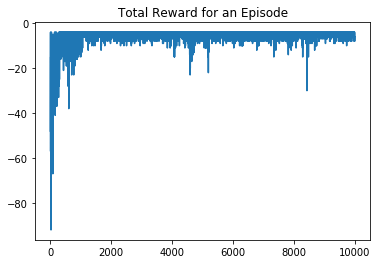

In [4]:
fig, ax = plt.subplots()
ax.plot(log['Reward'])
ax.set_title('Total Reward for an Episode')
plt.show()


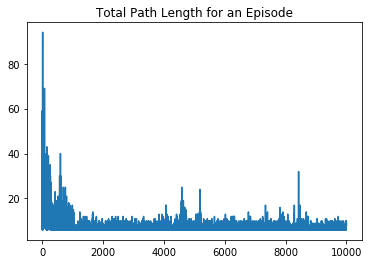

In [5]:
fig, ax = plt.subplots()
ax.plot(log['Length'])
ax.set_title('Total Path Length for an Episode')
plt.show()

In [6]:
rl.levels[0].q_table

,4
"(0, 0)",-2.926673


In [7]:
rl.levels[1].q_table

,0,1,2,3,4
"(0, 0)",-3.682101,-3.607456,-3.709254,-3.695562,-3.688625
"(1, 0)",-2.800081,-1.468540,-2.743898,-2.741226,-2.748339
"(1, 1)",-0.346279,-0.363047,-0.408609,-0.380870,-0.147613
"(0, 1)",-2.154427,-2.201023,-2.093911,-2.150781,-2.156000


In [8]:
rl.levels[2].q_table

,0,1,2,3
"(0, 0)",-1.927572,-0.762448,-2.181592,-1.999700
"(0, 1)",-1.744421,-0.485700,-1.794796,-1.759070
"(1, 0)",-1.621048,-1.231437,-1.638140,-1.639271
"(1, 1)",-1.366579,-0.687794,-1.325370,-1.329708
"(2, 0)",-1.324807,-1.229886,-1.314151,-1.336765
"(2, 1)",-1.112864,-0.726998,-1.078149,-1.130267
"(3, 1)",-0.656891,-0.274260,-0.647945,-0.646935
"(2, 2)",-1.553601,-0.137212,-1.380289,-1.483367
"(1, 2)",-1.698948,-1.315118,-0.268615,-1.488392
"(0, 2)",-1.668357,-1.473856,-0.303166,-1.584614
